### Problem statement
The aim is to build a model to predict the selling price of the house for the real estate customers with respect to their budget and priorities. The house price is determined by using various factors such as geographical location, number of floors in the house, quality and current condition of the house, total area, furnished or non-furnished, number of bedrooms and bathrooms and so on. Here we make use of Machine Learning algorithms to build the price prediction model for the houses. We have around 21k records spread around 100 years of time span; this will fecilitate us to build an effective model.

### Importing Libraries

In [952]:
# Numerical libraries
import numpy as np

# to handle data in form of rows and columns 
import pandas as pd

# importing ploting libraries
import matplotlib.pyplot as plt

# To enable plotting graphs in Jupyter notebook
%matplotlib inline

#importing seaborn for statistical plots
import seaborn as sns

In [953]:
# reading the CSV file into pandas dataframe
house = pd.read_excel("innercity1.xlsx")

In [954]:
# Check top few records to get a feel of the data structure
house.head()

cid         dayhours   price  room_bed  room_bath  living_measure  \
0  3876100940  20150427T000000  600000  4.000000   1.750000     3050.000000   
1  3145600250  20150317T000000  190000  2.000000   1.000000      670.000000   
2  7129303070  20140820T000000  735000  4.000000   2.750000     3040.000000   
3  7338220280  20141010T000000  257000  3.000000   2.500000     1740.000000   
4  7950300670  20150218T000000  450000  2.000000   1.000000     1120.000000   

   lot_measure ceil coast    sight condition  quality  ceil_measure  \
0  9440.000000    1     0 0.000000         3 8.000000   1800.000000   
1  3101.000000    1     0 0.000000         4 6.000000    670.000000   
2  2415.000000    2     1 4.000000         3 8.000000   3040.000000   
3  3721.000000    2     0 0.000000         3 8.000000   1740.000000   
4  4590.000000    1     0 0.000000         3 7.000000   1120.000000   

     basement yr_built  yr_renovated  zipcode       lat        long  \
0 1250.000000     1966             0    98034 47.722800 -122.183000   
1    0.000000     1948             0    98118 47.554600 -122.274000   
2    0.000000     1966             0    98118 47.518800 -122.256000   
3    0.000000     2009             0    98002 47.336300 -122.213000   
4    0.000000     1924             0    98118 47.566300 -122.285000   

   living_measure15  lot_measure15  furnished total_area  
0       2020.000000    8660.000000   0.000000      12490  
1       1660.000000    4100.000000   0.000000       3771  
2       2620.000000    2433.000000   0.000000       5455  
3       2030.000000    3794.000000   0.000000       5461  
4       1120.000000    5100.000000   0.000000       5710

In [955]:
pd.options.display.max_columns = None
house.head()

cid         dayhours   price  room_bed  room_bath  living_measure  \
0  3876100940  20150427T000000  600000  4.000000   1.750000     3050.000000   
1  3145600250  20150317T000000  190000  2.000000   1.000000      670.000000   
2  7129303070  20140820T000000  735000  4.000000   2.750000     3040.000000   
3  7338220280  20141010T000000  257000  3.000000   2.500000     1740.000000   
4  7950300670  20150218T000000  450000  2.000000   1.000000     1120.000000   

   lot_measure ceil coast    sight condition  quality  ceil_measure  \
0  9440.000000    1     0 0.000000         3 8.000000   1800.000000   
1  3101.000000    1     0 0.000000         4 6.000000    670.000000   
2  2415.000000    2     1 4.000000         3 8.000000   3040.000000   
3  3721.000000    2     0 0.000000         3 8.000000   1740.000000   
4  4590.000000    1     0 0.000000         3 7.000000   1120.000000   

     basement yr_built  yr_renovated  zipcode       lat        long  \
0 1250.000000     1966             0    98034 47.722800 -122.183000   
1    0.000000     1948             0    98118 47.554600 -122.274000   
2    0.000000     1966             0    98118 47.518800 -122.256000   
3    0.000000     2009             0    98002 47.336300 -122.213000   
4    0.000000     1924             0    98118 47.566300 -122.285000   

   living_measure15  lot_measure15  furnished total_area  
0       2020.000000    8660.000000   0.000000      12490  
1       1660.000000    4100.000000   0.000000       3771  
2       2620.000000    2433.000000   0.000000       5455  
3       2030.000000    3794.000000   0.000000       5461  
4       1120.000000    5100.000000   0.000000       5710

In [956]:
#Shape of the data
house.shape

(21613, 23)

In [957]:
#5 point summary
house.describe().T

count              mean               std  \
cid              21613.000000 4580301520.864988 2876565571.312048   
price            21613.000000     540182.158793     367362.231718   
room_bed         21505.000000          3.371355          0.930289   
room_bath        21505.000000          2.115171          0.770248   
living_measure   21596.000000       2079.860761        918.496121   
lot_measure      21571.000000      15104.583283      41423.619385   
sight            21556.000000          0.234366          0.766438   
quality          21612.000000          7.656857          1.175484   
ceil_measure     21612.000000       1788.366556        828.102535   
basement         21612.000000        291.522534        442.580840   
yr_renovated     21613.000000         84.402258        401.679240   
zipcode          21613.000000      98077.939805         53.505026   
lat              21613.000000         47.560053          0.138564   
living_measure15 21447.000000       1987.065557        685.519629   
lot_measure15    21584.000000      12766.543180      27286.987107   
furnished        21584.000000          0.196720          0.397528   

                            min               25%               50%  \
cid              1000102.000000 2123049194.000000 3904930410.000000   
price              75000.000000     321950.000000     450000.000000   
room_bed               0.000000          3.000000          3.000000   
room_bath              0.000000          1.750000          2.250000   
living_measure       290.000000       1429.250000       1910.000000   
lot_measure          520.000000       5040.000000       7618.000000   
sight                  0.000000          0.000000          0.000000   
quality                1.000000          7.000000          7.000000   
ceil_measure         290.000000       1190.000000       1560.000000   
basement               0.000000          0.000000          0.000000   
yr_renovated           0.000000          0.000000          0.000000   
zipcode            98001.000000      98033.000000      98065.000000   
lat                   47.155900         47.471000         47.571800   
living_measure15     399.000000       1490.000000       1840.000000   
lot_measure15        651.000000       5100.000000       7620.000000   
furnished              0.000000          0.000000          0.000000   

                               75%               max  
cid              7308900445.000000 9900000190.000000  
price                645000.000000    7700000.000000  
room_bed                  4.000000         33.000000  
room_bath                 2.500000          8.000000  
living_measure         2550.000000      13540.000000  
lot_measure           10684.500000    1651359.000000  
sight                     0.000000          4.000000  
quality                   8.000000         13.000000  
ceil_measure           2210.000000       9410.000000  
basement                560.000000       4820.000000  
yr_renovated              0.000000       2015.000000  
zipcode               98118.000000      98199.000000  
lat                      47.678000         47.777600  
living_measure15       2360.000000       6210.000000  
lot_measure15         10087.000000     871200.000000  
furnished                 0.000000          1.000000

In [958]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21571 non-null  object 
 8   coast             21612 non-null  object 
 9   sight             21556 non-null  float64
 10  condition         21556 non-null  object 
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21612 non-null  object 
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [959]:
house.isnull().sum().sum()

689

In [960]:
house_na = house.isnull().sum()
house_na

cid                   0
dayhours              0
price                 0
room_bed            108
room_bath           108
living_measure       17
lot_measure          42
ceil                 42
coast                 1
sight                57
condition            57
quality               1
ceil_measure          1
basement              1
yr_built              1
yr_renovated          0
zipcode               0
lat                   0
long                  0
living_measure15    166
lot_measure15        29
furnished            29
total_area           29
dtype: int64

In [961]:
house_na = house.isnull().sum()
house_na[house_na.values > 0].sort_values(ascending=False) #Find out all variables that contain null values

living_measure15    166
room_bath           108
room_bed            108
condition            57
sight                57
ceil                 42
lot_measure          42
total_area           29
furnished            29
lot_measure15        29
living_measure       17
yr_built              1
basement              1
ceil_measure          1
quality               1
coast                 1
dtype: int64

In [962]:
pd.set_option('float_format', '{:f}'.format)
house.describe()['price']

count     21613.000000
mean     540182.158793
std      367362.231718
min       75000.000000
25%      321950.000000
50%      450000.000000
75%      645000.000000
max     7700000.000000
Name: price, dtype: float64

Mean value is higher than median because the data has extreme values on the higher side

In [963]:
house.price.unique()

array([600000, 190000, 735000, ..., 725126, 332100, 685530], dtype=int64)

In [964]:
house["price"].value_counts().sort_index()

75000      1
78000      1
80000      1
81000      1
82000      1
          ..
5350000    1
5570000    1
6890000    1
7060000    1
7700000    1
Name: price, Length: 3625, dtype: int64

In [965]:
#Let's look at the distribution of price at different percentiles
print("0.5% properties have a price lower than {0: .2f}".format(np.percentile(house["price"], 0.5)))
print("  1% properties have a price lower than {0: .2f}".format(np.percentile(house["price"], 1)))
print("  5% properties have a price lower than {0: .2f}".format(np.percentile(house["price"], 5)))
print(" 10% properties have a price lower than {0: .2f}".format(np.percentile(house["price"], 10)))
print(" 90% properties have a price lower than {0: .2f}".format(np.percentile(house["price"], 90)))
print(" 95% properties have a price lower than {0: .2f}".format(np.percentile(house["price"], 95)))
print(" 99% properties have a price lower than {0: .2f}".format(np.percentile(house["price"], 99)))
print("99.5% properties have a price lower than {0: .2f}".format(np.percentile(house["price"], 99.5)))

0.5% properties have a price lower than  133436.00
  1% properties have a price lower than  153500.36
  5% properties have a price lower than  210000.00
 10% properties have a price lower than  245000.00
 90% properties have a price lower than  887000.00
 95% properties have a price lower than  1160000.00
 99% properties have a price lower than  1968800.00
99.5% properties have a price lower than  2450000.00


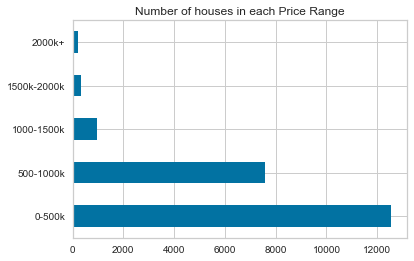

In [966]:
## Let's create a range variable to understand how many records we have in different slabs

price_range = pd.cut(house["price"], 
                     bins=[0, 500000, 1000000, 1500000, 2000000, house["price"].max()], 
                     labels=["0-500k", "500-1000k", "1000-1500k", "1500k-2000k", "2000k+"])
house["price_range"] = price_range 
house["price_range"].value_counts().sort_index().plot(kind="barh")
plt.title("Number of houses in each Price Range")
plt.show()

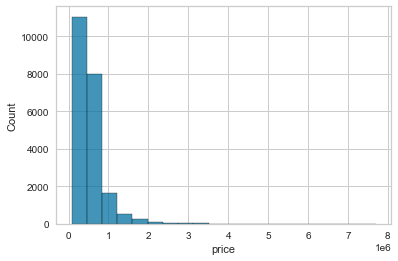

In [967]:
sns.histplot(house['price'], bins=20);

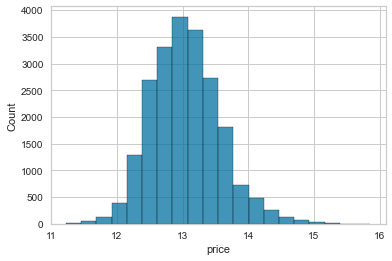

In [968]:
sns.histplot(np.log(house['price']), bins=20);

In [969]:
## This is a custom column that we created to visualize the Price variable in discrete format.

house.drop(['price_range'], axis='columns', inplace=True)

In [970]:
house.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area'],
      dtype='object')

# Changing data types and treating missing values

### Total area

In [971]:
pd.options.display.max_columns = None
house['total_area']=np.where(house['total_area']=='$',np.nan, house['total_area'])

In [972]:
house['total_area'] = house['total_area'].astype("float")

In [973]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21571 non-null  object 
 8   coast             21612 non-null  object 
 9   sight             21556 non-null  float64
 10  condition         21556 non-null  object 
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21612 non-null  object 
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [974]:
house.total_area.fillna(house['living_measure']+house['lot_measure'], inplace=True)

### Living measure and lot measure

In [975]:
house.living_measure.fillna(house['total_area']-house['lot_measure'], inplace=True)
house.lot_measure.fillna(house['total_area']-house['living_measure'], inplace=True)

In [976]:
house_na = house.isnull().sum()
house_na[house_na.values > 0].sort_values(ascending=False)

living_measure15    166
room_bath           108
room_bed            108
condition            57
sight                57
ceil                 42
furnished            29
lot_measure15        29
yr_built              1
basement              1
ceil_measure          1
quality               1
coast                 1
dtype: int64

### Living measure15 and lot measure15

In [977]:
house.living_measure15.fillna(house['living_measure'], inplace=True)
house.lot_measure15.fillna(house['lot_measure'], inplace=True)

In [978]:
house_na = house.isnull().sum()
house_na[house_na.values > 0].sort_values(ascending=False)

room_bath       108
room_bed        108
condition        57
sight            57
ceil             42
furnished        29
yr_built          1
basement          1
ceil_measure      1
quality           1
coast             1
dtype: int64

### House condition

In [979]:
house["condition"].value_counts()

3    13978
4     5655
5     1694
2      171
1       30
$       28
Name: condition, dtype: int64

In [980]:
# This feature takes values from only 1 to 5, so changing $ to modal value 3.
# Its instances are only 28, so adding it to 3 won't make a big difference 
house['condition']=np.where(house['condition']=='$',3, house['condition'])

In [981]:
house["condition"].value_counts()

3    14006
4     5655
5     1694
2      171
1       30
Name: condition, dtype: int64

In [982]:
house.condition.fillna(3, inplace=True)

In [983]:
house["condition"].value_counts()

3    14063
4     5655
5     1694
2      171
1       30
Name: condition, dtype: int64

### Ceil measure and basement

In [984]:
house.ceil_measure.fillna(house['total_area']-house['basement'], inplace=True)
house.basement.fillna(house['total_area']-house['ceil_measure'], inplace=True)

In [985]:
house_na = house.isnull().sum()
house_na[house_na.values > 0].sort_values(ascending=False)

room_bath       108
room_bed        108
sight            57
ceil             42
furnished        29
yr_built          1
basement          1
ceil_measure      1
quality           1
coast             1
dtype: int64

#### Description of ceil meaure

In [986]:
house.ceil_measure.describe()

count   21612.000000
mean     1788.366556
std       828.102535
min       290.000000
25%      1190.000000
50%      1560.000000
75%      2210.000000
max      9410.000000
Name: ceil_measure, dtype: float64

* We impute ceil_measure with output of this formula:-
__total_area - median of basement___
* Then we impute basement with output of this formula:-
__total_area - ceil_measure__

* This is because we have one of the two values already.
* Median is also robust to outliers.
* Rechecking for missing values, we find the problem solved.

In [987]:
house.ceil_measure.fillna(house['total_area']-house['basement'].median(), inplace=True)
house.basement.fillna(house['total_area']-house['ceil_measure'], inplace=True)

In [988]:
house_na = house.isnull().sum()
house_na[house_na.values > 0].sort_values(ascending=False)

room_bath    108
room_bed     108
sight         57
ceil          42
furnished     29
yr_built       1
quality        1
coast          1
dtype: int64

### Dayhours

In [989]:
house.dayhours = house.dayhours.str.replace('T000000',"")
house.dayhours = pd.to_datetime(house.dayhours)
house.dayhours = house.dayhours.apply(lambda x: x.strftime('%m-%d-%Y'))
# house['dayhours'] = pd.to_datetime(house['dayhours'])

In [990]:
house.rename(columns={'dayhours':'sell_date'}, inplace=True)
house.head(2)

cid   sell_date   price  room_bed  room_bath  living_measure  \
0  3876100940  04-27-2015  600000  4.000000   1.750000     3050.000000   
1  3145600250  03-17-2015  190000  2.000000   1.000000      670.000000   

   lot_measure ceil coast    sight  condition  quality  ceil_measure  \
0  9440.000000    1     0 0.000000          3 8.000000   1800.000000   
1  3101.000000    1     0 0.000000          4 6.000000    670.000000   

     basement yr_built  yr_renovated  zipcode       lat        long  \
0 1250.000000     1966             0    98034 47.722800 -122.183000   
1    0.000000     1948             0    98118 47.554600 -122.274000   

   living_measure15  lot_measure15  furnished   total_area  
0       2020.000000    8660.000000   0.000000 12490.000000  
1       1660.000000    4100.000000   0.000000  3771.000000

### Ceil

In [991]:
house["ceil"].value_counts()

1      10647
2       8210
1.5     1905
3        610
2.5      161
$         30
3.5        8
Name: ceil, dtype: int64

In [992]:
# Changing $ to modal value 1 
house['ceil']=np.where(house['ceil']=='$',1, house['ceil'])

In [993]:
house["ceil"].value_counts()

1.000000    10677
2.000000     8210
1.500000     1905
3.000000      610
2.500000      161
3.500000        8
Name: ceil, dtype: int64

In [994]:
house.ceil.fillna(house['ceil'].median(), inplace=True)

We imputed ceil with median value and rechecked for the missing values. The variable is treated  for missing values successfully. The datatype was changed to float.

In [995]:
house_na = house.isnull().sum()
house_na[house_na.values > 0].sort_values(ascending=False)

room_bath    108
room_bed     108
sight         57
furnished     29
yr_built       1
quality        1
coast          1
dtype: int64

In [996]:
house['ceil'] = house['ceil'].astype("float")

### House quality

In [45]:
house['quality'].value_counts()

7.000000     8981
8.000000     6067
9.000000     2615
6.000000     2038
10.000000    1134
11.000000     399
5.000000      242
12.000000      90
4.000000       29
13.000000      13
3.000000        3
1.000000        1
Name: quality, dtype: int64

In [46]:
print(house.loc[house['cid'] == 2474400250])

              cid   sell_date   price  room_bed  room_bath  living_measure  \
21226  2474400250  06-30-2014  327500  3.000000   2.250000     2310.000000   

       lot_measure     ceil coast  sight  condition  quality  ceil_measure  \
21226  7200.000000 1.500000   NaN    nan          3      nan   9510.000000   

       basement yr_built  yr_renovated  zipcode       lat        long  \
21226  0.000000      NaN             0    98031 47.405100 -122.193000   

       living_measure15  lot_measure15  furnished  total_area  
21226       1960.000000    7201.000000   0.000000 9510.000000  


In [47]:
print(house.loc[house['zipcode'] == 98031])

              cid   sell_date   price  room_bed  room_bath  living_measure  \
9      2787460430  10-28-2014  299950  2.000000   1.750000     1460.000000   
40      739800250  02-22-2015  269000  3.000000   2.250000     1420.000000   
76     1862900360  09-22-2014  315000  3.000000   2.500000     1950.000000   
116    2893000280  05-01-2015  216600  3.000000   1.750000     2200.000000   
209    2787320140  03-24-2015  255000  3.000000   2.250000     1890.000000   
...           ...         ...     ...       ...        ...             ...   
21010  2212210360  07-02-2014  253000  2.000000   1.000000     1310.000000   
21226  2474400250  06-30-2014  327500  3.000000   2.250000     2310.000000   
21294  6752600320  05-14-2015  360000  4.000000   2.500000     2020.000000   
21394   522059158  06-16-2014  230000  3.000000   1.750000     1400.000000   
21607  2212200270  02-20-2015  300000  3.000000   1.750000     1730.000000   

       lot_measure     ceil coast    sight  condition  quality 

In [48]:
house.quality.fillna(7, inplace=True)

In [379]:
# house[house.iloc[:, 12]=='NaN']

In [380]:
# house.loc[np.where(house.quality == np.nan)]

In [49]:
house_na = house.isnull().sum()
house_na[house_na.values > 0].sort_values(ascending=False)

room_bath    108
room_bed     108
sight         57
furnished     29
yr_built       1
coast          1
dtype: int64

In [50]:
house['quality'] = house['quality'].astype("int64")

### Year built

In [51]:
house['yr_built'].unique()

array([1966, 1948, 2009, 1924, 1994, 2005, 1978, 1983, 2012, 1912, 1990,
       1967, 1919, 1908, 1950, 2000, 2013, 1943, 1922, 1977, 2004, 1935,
       1964, 1945, 1987, 2008, 1940, 2003, 1988, 1985, 1998, 1995, 1946,
       1984, 1958, 1963, 1942, 2014, 1971, 1936, 1954, 1923, 2002, 1972,
       2007, 1930, 1962, 1999, 1953, 1965, 2010, 1997, 2006, 1979, 1996,
       1992, 1968, 1980, 1981, 1969, 2001, 1929, 1952, 1916, 1976, 1974,
       1920, 1931, 1975, 1960, 1900, '$', 1986, 1989, 1906, 1955, 1956,
       1915, 1941, 1993, 2011, 1925, 1947, 1991, 1926, 1927, 1951, 1961,
       1932, 1917, 1928, 1959, 1921, 1911, 1949, 1982, 1913, 1957, 1914,
       1938, 1973, 1937, 1944, 1970, 1901, 1907, 1939, 1918, 1934, 1904,
       2015, 1909, 1910, 1905, 1902, 1933, 1903, nan], dtype=object)

In [52]:
# Removing $s and changing data type
house['yr_built']=np.where(house['yr_built']=='$',np.nan, house['yr_built'])

In [998]:
nan_in_col  = house[house['yr_built'].isnull()]
nan_in_col

cid   sell_date   price  room_bed  room_bath  living_measure  \
21226  2474400250  06-30-2014  327500  3.000000   2.250000     2310.000000   

       lot_measure     ceil coast  sight  condition  quality  ceil_measure  \
21226  7200.000000 1.500000   NaN    nan          3      nan   9510.000000   

       basement yr_built  yr_renovated  zipcode       lat        long  \
21226  0.000000      NaN             0    98031 47.405100 -122.193000   

       living_measure15  lot_measure15  furnished  total_area  
21226       1960.000000    7201.000000   0.000000 9510.000000

In [53]:
print(house.loc[house['cid'] == 7905200205])

             cid   sell_date   price  room_bed  room_bath  living_measure  \
1906  7905200205  10-21-2014  410000       nan        nan     1230.000000   

      lot_measure     ceil coast    sight  condition  quality  ceil_measure  \
1906  7020.000000 1.000000     0 0.000000          3        7   1090.000000   

       basement yr_built  yr_renovated  zipcode       lat        long  \
1906 140.000000      NaN             0    98116 47.571900 -122.390000   

      living_measure15  lot_measure15  furnished  total_area  
1906       1230.000000    5850.000000   0.000000 8250.000000  


In [54]:
print(house.loc[house['zipcode'] == 98116])

              cid   sell_date    price  room_bed  room_bath  living_measure  \
38     3009800015  04-22-2015   502501  2.000000   1.000000     1100.000000   
47     8010100220  10-14-2014   999950  4.000000   3.500000     3310.000000   
160    1024000109  07-10-2014   295000  2.000000   1.000000      740.000000   
183    5135000170  08-06-2014   655000  4.000000   1.750000     2540.000000   
269    9161100730  07-01-2014   620000  4.000000   3.000000     2130.000000   
...           ...         ...      ...       ...        ...             ...   
21471  9276202160  11-26-2014   660000  3.000000   2.000000     2080.000000   
21491  9279200280  06-23-2014   750000  3.000000   2.000000     1820.000000   
21504   148000475  05-28-2014  1400000  4.000000   3.250000     4700.000000   
21534  9319800050  04-21-2015   790000  4.000000   2.500000     2650.000000   
21551  1493300115  09-10-2014   415000  4.000000   1.000000     1620.000000   

       lot_measure     ceil coast    sight  conditi

In [55]:
house.yr_built.fillna(house['yr_built'].median(), inplace=True)

In [56]:
house_na = house.isnull().sum()
house_na[house_na.values > 0].sort_values(ascending=False)

room_bath    108
room_bed     108
sight         57
furnished     29
coast          1
dtype: int64

In [57]:
house['yr_built'] = house['yr_built'].astype('int')

### Year renovated

In [58]:
house['yr_renovated'].unique()

array([   0, 1993, 2014, 1983, 1992, 2000, 2011, 1994, 2009, 1944, 1971,
       2003, 1955, 1985, 2008, 2015, 2005, 1979, 1998, 1968, 2010, 1989,
       2002, 1987, 1999, 1996, 1940, 1986, 1988, 1969, 1995, 2004, 2007,
       2013, 2001, 1990, 1958, 2012, 1967, 1991, 1970, 1984, 2006, 1982,
       1951, 1960, 1956, 1997, 1980, 1959, 1974, 1973, 1975, 1981, 1963,
       1957, 1976, 1948, 1945, 1977, 1978, 1972, 1965, 1964, 1953, 1950,
       1962, 1946, 1934, 1954], dtype=int64)

0 values are fro the non-renovated houses. The entries look clean.

In [857]:
# house['yr_renovated'] = house['yr_renovated'].astype('float')

### Zipcode

In [59]:
house['zipcode'].unique()

array([98034, 98118, 98002, 98030, 98103, 98006, 98042, 98031, 98065,
       98109, 98058, 98001, 98105, 98115, 98032, 98033, 98199, 98053,
       98056, 98102, 98038, 98092, 98003, 98075, 98059, 98008, 98011,
       98014, 98023, 98116, 98198, 98126, 98052, 98108, 98133, 98074,
       98077, 98106, 98045, 98146, 98155, 98117, 98027, 98040, 98072,
       98005, 98055, 98070, 98028, 98166, 98019, 98136, 98107, 98004,
       98125, 98112, 98024, 98177, 98122, 98168, 98029, 98007, 98178,
       98010, 98188, 98039, 98144, 98022, 98148, 98119], dtype=int64)

In [60]:
house['zipcode'] = house['zipcode'].astype("object")

### Longitude

In [61]:
house['long'].unique()

array([-122.183, -122.274, -122.256, -122.213, -122.285, '$', -122.333,
       -122.165, -122.15, -122.178, -121.87, -122.352, -122.122, -122.275,
       -122.234, -122.324, -122.321, -122.277, -122.196, -122.398,
       -122.019, -122.181, -122.325, -122.191, -122.026, -122.084, -122.3,
       -122.287, -122.011, -122.127, -122.281, -122.221, -121.859,
       -121.913, -122.39, -121.871, -122.013, -122.381, -122.279,
       -122.194, -122.201, -122.125, -122.379, -122.121, -122.024,
       -122.389, -122.305, -122.346, -122.375, -122.344, -122.028,
       -122.193, -122.209, -122.365, -122.28, -122.334, -122.149,
       -122.388, -122.016, -122.298, -122.153, -121.802, -121.878,
       -122.218, -122.359, -122.296, -122.361, -122.357, -122.309,
       -122.056, -121.974, -122.18, -122.331, -122.374, -121.976,
       -121.975, -122.216, -122.188, -122.391, -122.31, -122.302,
       -121.972, -122.22, -122.17, -122.101, -121.888, -122.046, -122.154,
       -122.145, -122.236, -122.168, 

In [62]:
# Replacing $s and changing data type
house['long']=np.where(house['long']=='$',np.nan, house['long'])

In [63]:
house['long'].unique()

array([-122.183, -122.274, -122.256, -122.213, -122.285, nan, -122.333,
       -122.165, -122.15, -122.178, -121.87, -122.352, -122.122, -122.275,
       -122.234, -122.324, -122.321, -122.277, -122.196, -122.398,
       -122.019, -122.181, -122.325, -122.191, -122.026, -122.084, -122.3,
       -122.287, -122.011, -122.127, -122.281, -122.221, -121.859,
       -121.913, -122.39, -121.871, -122.013, -122.381, -122.279,
       -122.194, -122.201, -122.125, -122.379, -122.121, -122.024,
       -122.389, -122.305, -122.346, -122.375, -122.344, -122.028,
       -122.193, -122.209, -122.365, -122.28, -122.334, -122.149,
       -122.388, -122.016, -122.298, -122.153, -121.802, -121.878,
       -122.218, -122.359, -122.296, -122.361, -122.357, -122.309,
       -122.056, -121.974, -122.18, -122.331, -122.374, -121.976,
       -121.975, -122.216, -122.188, -122.391, -122.31, -122.302,
       -121.972, -122.22, -122.17, -122.101, -121.888, -122.046, -122.154,
       -122.145, -122.236, -122.168, 

In [64]:
house.long.fillna(house['long'].median(), inplace=True)

In [65]:
house_na = house.isnull().sum()
house_na[house_na.values > 0].sort_values(ascending=False)

room_bath    108
room_bed     108
sight         57
furnished     29
coast          1
dtype: int64

In [66]:
house['long'] = house['long'].astype("float")

### Furnished

In [67]:
house['furnished'].unique()

array([ 0.,  1., nan])

In [68]:
house.furnished.fillna(0, inplace=True)

In [69]:
house_na = house.isnull().sum()
house_na[house_na.values > 0].sort_values(ascending=False)

room_bath    108
room_bed     108
sight         57
coast          1
dtype: int64

### Sight

In [70]:
house['sight'].unique()

array([ 0.,  4.,  2.,  3.,  1., nan])

In [71]:
house.sight.fillna(0, inplace=True)

In [72]:
house_na = house.isnull().sum()
house_na[house_na.values > 0].sort_values(ascending=False)

room_bath    108
room_bed     108
coast          1
dtype: int64

### Coast

In [73]:
house['coast'].unique()

array([0, 1, '$', nan], dtype=object)

In [74]:
# Replacing $s
house['coast']=np.where(house['coast']=='$',np.nan, house['coast'])

In [75]:
house.coast.fillna(0, inplace=True)

In [76]:
house_na = house.isnull().sum()
house_na[house_na.values > 0].sort_values(ascending=False)

room_bath    108
room_bed     108
dtype: int64

### Bathrooms per bedroom

In [77]:
house['room_bath'].unique()

array([1.75, 1.  , 2.75, 2.5 , 1.5 , 3.5 , 2.  , 2.25, 3.  , 4.  , 3.25,
       3.75,  nan, 5.  , 0.75, 5.5 , 4.25, 4.5 , 4.75, 8.  , 6.75, 5.25,
       6.  , 0.  , 1.25, 5.75, 7.5 , 6.5 , 0.5 , 7.75, 6.25])

In [78]:
house['room_bath'].value_counts()

2.500000    5358
1.000000    3829
1.750000    3031
2.250000    2039
2.000000    1917
1.500000    1439
2.750000    1178
3.000000     750
3.500000     726
3.250000     588
3.750000     155
4.000000     135
4.500000     100
4.250000      78
0.750000      72
4.750000      23
5.000000      21
5.250000      13
0.000000      10
5.500000      10
1.250000       9
6.000000       6
0.500000       4
5.750000       4
8.000000       2
6.250000       2
6.750000       2
6.500000       2
7.500000       1
7.750000       1
Name: room_bath, dtype: int64

In [79]:
house.room_bath.fillna(2.5, inplace=True)
# house['room_bath']=np.where(house['room_bath']==np.nan, house['room_bath'].mode(), house['room_bath'])

In [221]:
# house['room_bath'].replace(np.nan,house['room_bath'].mode(),inplace=True)

In [222]:
#mode=house['room_bath'].mode()
#house['room_bath'].replace(np.nan,mode, inplace=True)

In [204]:
# house.room_bath.fillna(house['room_bath'].mode(), inplace=True)

In [80]:
# house['room_bath']=np.where(house['yr_built']==0,np.nan, house['yr_built'])
house_na = house.isnull().sum()
house_na[house_na.values > 0].sort_values(ascending=False)

room_bed    108
dtype: int64

### Bedrooms per house

In [81]:
house['room_bed'].unique()

array([ 4.,  2.,  3.,  1.,  5.,  6., nan,  7., 10.,  8.,  0.,  9., 33.,
       11.])

In [82]:
house['room_bed'].value_counts()

3.000000     9767
4.000000     6854
2.000000     2747
5.000000     1595
6.000000      270
1.000000      197
7.000000       38
0.000000       13
8.000000       13
9.000000        6
10.000000       3
11.000000       1
33.000000       1
Name: room_bed, dtype: int64

In [83]:
np.where(house['room_bed']==33)

(array([16913], dtype=int64),)

In [84]:
house.loc[house.room_bed == 33]

cid   sell_date   price  room_bed  room_bath  living_measure  \
16913  2402100895  06-25-2014  640000 33.000000   1.750000     1620.000000   

       lot_measure     ceil  coast    sight  condition  quality  ceil_measure  \
16913  6000.000000 1.000000      0 0.000000          5        7   1040.000000   

        basement  yr_built  yr_renovated zipcode       lat        long  \
16913 580.000000      1947             0   98103 47.687800 -122.331000   

       living_measure15  lot_measure15  furnished  total_area  
16913       1330.000000    4700.000000   0.000000 7620.000000

In [85]:
house.loc[16913, 'room_bed'] = 3
house.loc[16913, 'room_bed']

3.0

In [86]:
house['room_bed'].value_counts()

3.000000     9768
4.000000     6854
2.000000     2747
5.000000     1595
6.000000      270
1.000000      197
7.000000       38
0.000000       13
8.000000       13
9.000000        6
10.000000       3
11.000000       1
Name: room_bed, dtype: int64

In [87]:
house.room_bed.fillna(3, inplace=True)

In [ ]:
# house.drop(house[house['room_bed'] == 0].index, inplace=True)

In [214]:
# house.room_bed.fillna(house['room_bed'].mode(), inplace=True)

In [88]:
house_na = house.isnull().sum()
house_na[house_na.values > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [89]:
print('Missing values in the house pricing dataset:', house.isnull().sum().sum());

Missing values in the house pricing dataset: 0


In [90]:
house['basement'].unique()

array([1250.,    0., 1320., 1000.,  480.,  610., 1050.,  700.,  430.,
        560.,  250.,  670.,  570.,  290.,  600.,  680.,  380.,   50.,
       1020.,  690., 1010.,  530., 1370., 1040.,  790.,  910.,  820.,
       1850.,  500.,  760.,  960.,  340.,  800.,  580., 1600., 1680.,
        900.,  420.,  450.,  200.,  240.,  950., 1590., 1220., 1500.,
        710.,   80.,  140., 1260.,  860.,  890.,  280.,  440.,  880.,
        220., 1650.,  630.,  780.,  810.,  300.,  720.,  470.,  150.,
       1180., 1060.,  120.,  660.,  400., 1100., 1780.,  640., 1170.,
       1890.,  130.,  550.,  360.,  940.,  650., 2730.,  870.,  730.,
       1350., 1530., 1540.,  620., 1080., 1900.,  770.,  520.,  920.,
       1110.,  830., 1420.,  980.,  190.,  330.,  350.,  740., 1570.,
        990., 1390.,  260.,  540., 1300.,  265., 1120.,  460.,  370.,
       1830., 1140.,  270.,  145.,  510.,  750., 1710.,  930., 1870.,
       1200.,  310.,  850.,  506.,  970., 1070., 1450.,  840.,   90.,
       3500., 1380.,

In [91]:
house['long'].unique()

array([-122.183, -122.274, -122.256, -122.213, -122.285, -122.23 ,
       -122.333, -122.165, -122.15 , -122.178, -121.87 , -122.352,
       -122.122, -122.275, -122.234, -122.324, -122.321, -122.277,
       -122.196, -122.398, -122.019, -122.181, -122.325, -122.191,
       -122.026, -122.084, -122.3  , -122.287, -122.011, -122.127,
       -122.281, -122.221, -121.859, -121.913, -122.39 , -121.871,
       -122.013, -122.381, -122.279, -122.194, -122.201, -122.125,
       -122.379, -122.121, -122.024, -122.389, -122.305, -122.346,
       -122.375, -122.344, -122.028, -122.193, -122.209, -122.365,
       -122.28 , -122.334, -122.149, -122.388, -122.016, -122.298,
       -122.153, -121.802, -121.878, -122.218, -122.359, -122.296,
       -122.361, -122.357, -122.309, -122.056, -121.974, -122.18 ,
       -122.331, -122.374, -121.976, -121.975, -122.216, -122.188,
       -122.391, -122.31 , -122.302, -121.972, -122.22 , -122.17 ,
       -122.101, -121.888, -122.046, -122.154, -122.145, -122.

In [92]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   sell_date         21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21613 non-null  float64
 4   room_bath         21613 non-null  float64
 5   living_measure    21613 non-null  float64
 6   lot_measure       21613 non-null  float64
 7   ceil              21613 non-null  float64
 8   coast             21613 non-null  int64  
 9   sight             21613 non-null  float64
 10  condition         21613 non-null  int64  
 11  quality           21613 non-null  int64  
 12  ceil_measure      21613 non-null  float64
 13  basement          21613 non-null  float64
 14  yr_built          21613 non-null  int32  
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  object

In [93]:
house.isnull().sum()

cid                 0
sell_date           0
price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
dtype: int64

In [94]:
house.duplicated().sum()

0

In [111]:
house1=house.copy()
house7=house.copy()

In [96]:
print('Duplicate values in housing dataset:', house.duplicated().sum())

Duplicate values in housing dataset: 0


In [97]:
house.rename(columns={'room_bed':'bedrooms',
                      'room_bath':'bathrooms', 
                      'living_measure':'house_in_sqft', 
                      'lot_measure':'lot_in_sqft', 
                      'ceil':'floors', 
                      'sight':'viewed', 
                      'ceil_measure':'size_sans_basement', 
                      'basement':'basement_size',
                      'living_measure15':'house_size_2015', 
                      'lot_measure15':'lot_size_2015'}, inplace=True)
house.head(2)

cid   sell_date   price  bedrooms  bathrooms  house_in_sqft  \
0  3876100940  04-27-2015  600000  4.000000   1.750000    3050.000000   
1  3145600250  03-17-2015  190000  2.000000   1.000000     670.000000   

   lot_in_sqft   floors  coast   viewed  condition  quality  \
0  9440.000000 1.000000      0 0.000000          3        8   
1  3101.000000 1.000000      0 0.000000          4        6   

   size_sans_basement  basement_size  yr_built  yr_renovated zipcode  \
0         1800.000000    1250.000000      1966             0   98034   
1          670.000000       0.000000      1948             0   98118   

        lat        long  house_size_2015  lot_size_2015  furnished  \
0 47.722800 -122.183000      2020.000000    8660.000000   0.000000   
1 47.554600 -122.274000      1660.000000    4100.000000   0.000000   

    total_area  
0 12490.000000  
1  3771.000000

In [98]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cid                 21613 non-null  int64  
 1   sell_date           21613 non-null  object 
 2   price               21613 non-null  int64  
 3   bedrooms            21613 non-null  float64
 4   bathrooms           21613 non-null  float64
 5   house_in_sqft       21613 non-null  float64
 6   lot_in_sqft         21613 non-null  float64
 7   floors              21613 non-null  float64
 8   coast               21613 non-null  int64  
 9   viewed              21613 non-null  float64
 10  condition           21613 non-null  int64  
 11  quality             21613 non-null  int64  
 12  size_sans_basement  21613 non-null  float64
 13  basement_size       21613 non-null  float64
 14  yr_built            21613 non-null  int32  
 15  yr_renovated        21613 non-null  int64  
 16  zipc

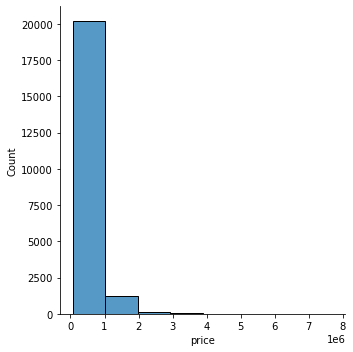

In [99]:
sns.displot(house['price'], kde=False, bins=8);

You can see that most of the houses are priced between 0 and 1 million. Next, let’ see if there is any relationship between the area of the house in square feet and the price. We will use the “lineplot” from the “Seaborn” library to view this relationship

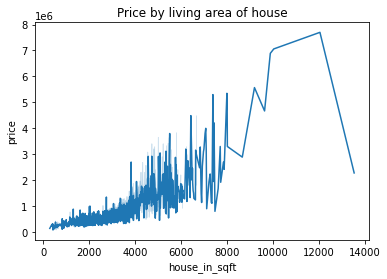

In [100]:
sns.lineplot(x='house_in_sqft', y='price', data=house);
plt.title("Price by living area of house");

From the output, it can be seen that there is a positive correlation between the area of the house and the price. However, if the area is too big, the price starts to decrease. One of the reasons can be the fact that there are very few buyers of the very big houses since huge houses are too expensive to maintain.

Next, let’s find the relationship between the number of bedrooms and the price. Since the unique values for the bedroom columns are not too many, we can use a bar plot to draw this relationship.

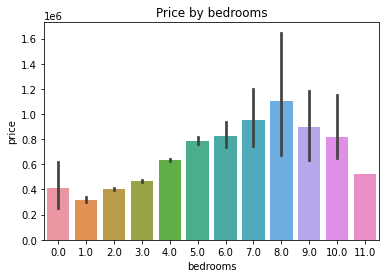

In [101]:
sns.barplot(x='bedrooms', y='price', data=house);
plt.title("Price by bedrooms");

Again the price of the house increased with the increase in the number of bedhrooms and decreases in case of too many bedrooms. The reason can be the same, the houses with too many bedrooms are big and not so easy to maintain.

Next, let’s see if we can find any difference between the prices of the houses with a waterfront view and the houses without a waterfront view.

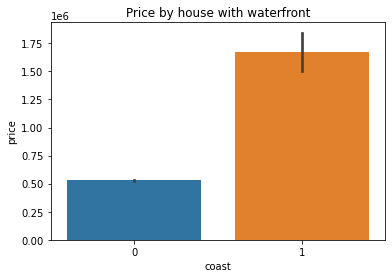

In [102]:
sns.barplot(x='coast', y='price', data=house);
plt.title("Price by house with waterfront");

The houses with waterfront (orange bar) are far more expensive than those without the waterfront (blue bar). This shows that coast can really be a useful feature to predict the house price

Let’s now plot the relationship between the built year and the price of the house

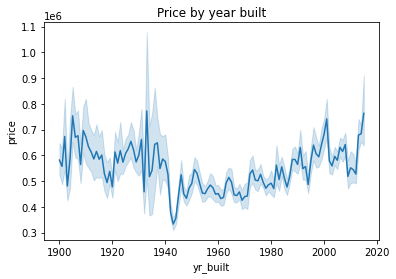

In [103]:
sns.lineplot(x='yr_built', y='price', data=house);
plt.title("Price by year built");

The houses that are too old are expensive may be due to historical value. Similarly, the houses that are relatively newer are expensive too, which is self-explanatory. However the houses that are neither too old nor new have a lower price value since they have neither any historical value associated with them, nor they are new.

Next, let’s find the relationship between quality and the price of the house. The grade is the value assigned by the King County Administration based on various factors. Let’s plot a line plot between grade and house price.

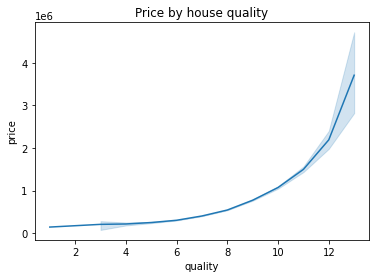

In [104]:
sns.lineplot(x='quality', y='price', data=house);
plt.title("Price by house quality");

The qulity and the price of the house have a clear positive correlation as evident from the output.

In [105]:
house['cid'].nunique()

21436

There are 21613 samples, while 'cid' has only 21436 counts, which means there are duplicates in the 'cid' column or, in other words, these houses were perhaps sold more than once. .

In [106]:
#get sum of duplicates
house['cid'].duplicated().sum()

177

### Feature engineering

In [107]:
# generating new feature 1
house['house_age']=2022-house['yr_built']
house.head()

cid   sell_date   price  bedrooms  bathrooms  house_in_sqft  \
0  3876100940  04-27-2015  600000  4.000000   1.750000    3050.000000   
1  3145600250  03-17-2015  190000  2.000000   1.000000     670.000000   
2  7129303070  08-20-2014  735000  4.000000   2.750000    3040.000000   
3  7338220280  10-10-2014  257000  3.000000   2.500000    1740.000000   
4  7950300670  02-18-2015  450000  2.000000   1.000000    1120.000000   

   lot_in_sqft   floors  coast   viewed  condition  quality  \
0  9440.000000 1.000000      0 0.000000          3        8   
1  3101.000000 1.000000      0 0.000000          4        6   
2  2415.000000 2.000000      1 4.000000          3        8   
3  3721.000000 2.000000      0 0.000000          3        8   
4  4590.000000 1.000000      0 0.000000          3        7   

   size_sans_basement  basement_size  yr_built  yr_renovated zipcode  \
0         1800.000000    1250.000000      1966             0   98034   
1          670.000000       0.000000      1948             0   98118   
2         3040.000000       0.000000      1966             0   98118   
3         1740.000000       0.000000      2009             0   98002   
4         1120.000000       0.000000      1924             0   98118   

        lat        long  house_size_2015  lot_size_2015  furnished  \
0 47.722800 -122.183000      2020.000000    8660.000000   0.000000   
1 47.554600 -122.274000      1660.000000    4100.000000   0.000000   
2 47.518800 -122.256000      2620.000000    2433.000000   0.000000   
3 47.336300 -122.213000      2030.000000    3794.000000   0.000000   
4 47.566300 -122.285000      1120.000000    5100.000000   0.000000   

    total_area  house_age  
0 12490.000000         56  
1  3771.000000         74  
2  5455.000000         56  
3  5461.000000         13  
4  5710.000000         98

In [108]:
print('Variable house_age has', house.loc[house.house_age < 0].sum().sum(), 'negative values')

Variable house_age has 0.0 negative values


In [109]:
# generating new feature 2
house['2015_area']= house['house_size_2015'] + house['lot_size_2015']
house.head()

cid   sell_date   price  bedrooms  bathrooms  house_in_sqft  \
0  3876100940  04-27-2015  600000  4.000000   1.750000    3050.000000   
1  3145600250  03-17-2015  190000  2.000000   1.000000     670.000000   
2  7129303070  08-20-2014  735000  4.000000   2.750000    3040.000000   
3  7338220280  10-10-2014  257000  3.000000   2.500000    1740.000000   
4  7950300670  02-18-2015  450000  2.000000   1.000000    1120.000000   

   lot_in_sqft   floors  coast   viewed  condition  quality  \
0  9440.000000 1.000000      0 0.000000          3        8   
1  3101.000000 1.000000      0 0.000000          4        6   
2  2415.000000 2.000000      1 4.000000          3        8   
3  3721.000000 2.000000      0 0.000000          3        8   
4  4590.000000 1.000000      0 0.000000          3        7   

   size_sans_basement  basement_size  yr_built  yr_renovated zipcode  \
0         1800.000000    1250.000000      1966             0   98034   
1          670.000000       0.000000      1948             0   98118   
2         3040.000000       0.000000      1966             0   98118   
3         1740.000000       0.000000      2009             0   98002   
4         1120.000000       0.000000      1924             0   98118   

        lat        long  house_size_2015  lot_size_2015  furnished  \
0 47.722800 -122.183000      2020.000000    8660.000000   0.000000   
1 47.554600 -122.274000      1660.000000    4100.000000   0.000000   
2 47.518800 -122.256000      2620.000000    2433.000000   0.000000   
3 47.336300 -122.213000      2030.000000    3794.000000   0.000000   
4 47.566300 -122.285000      1120.000000    5100.000000   0.000000   

    total_area  house_age    2015_area  
0 12490.000000         56 10680.000000  
1  3771.000000         74  5760.000000  
2  5455.000000         56  5053.000000  
3  5461.000000         13  5824.000000  
4  5710.000000         98  6220.000000

In [110]:
# generating features 3, 4, 5
house['has_basement']=np.where(house['basement_size']>0,1,0)
house['renovated']=np.where(house['yr_renovated']>0,1,0)
house['diff_living']=house['house_in_sqft']-house['house_size_2015']

In [112]:
house.head()

cid   sell_date   price  bedrooms  bathrooms  house_in_sqft  \
0  3876100940  04-27-2015  600000  4.000000   1.750000    3050.000000   
1  3145600250  03-17-2015  190000  2.000000   1.000000     670.000000   
2  7129303070  08-20-2014  735000  4.000000   2.750000    3040.000000   
3  7338220280  10-10-2014  257000  3.000000   2.500000    1740.000000   
4  7950300670  02-18-2015  450000  2.000000   1.000000    1120.000000   

   lot_in_sqft   floors  coast   viewed  condition  quality  \
0  9440.000000 1.000000      0 0.000000          3        8   
1  3101.000000 1.000000      0 0.000000          4        6   
2  2415.000000 2.000000      1 4.000000          3        8   
3  3721.000000 2.000000      0 0.000000          3        8   
4  4590.000000 1.000000      0 0.000000          3        7   

   size_sans_basement  basement_size  yr_built  yr_renovated zipcode  \
0         1800.000000    1250.000000      1966             0   98034   
1          670.000000       0.000000      1948             0   98118   
2         3040.000000       0.000000      1966             0   98118   
3         1740.000000       0.000000      2009             0   98002   
4         1120.000000       0.000000      1924             0   98118   

        lat        long  house_size_2015  lot_size_2015  furnished  \
0 47.722800 -122.183000      2020.000000    8660.000000   0.000000   
1 47.554600 -122.274000      1660.000000    4100.000000   0.000000   
2 47.518800 -122.256000      2620.000000    2433.000000   0.000000   
3 47.336300 -122.213000      2030.000000    3794.000000   0.000000   
4 47.566300 -122.285000      1120.000000    5100.000000   0.000000   

    total_area  house_age    2015_area  has_basement  renovated  diff_living  
0 12490.000000         56 10680.000000             1          0  1030.000000  
1  3771.000000         74  5760.000000             0          0  -990.000000  
2  5455.000000         56  5053.000000             0          0   420.000000  
3  5461.000000         13  5824.000000             0          0  -290.000000  
4  5710.000000         98  6220.000000             0          0     0.000000

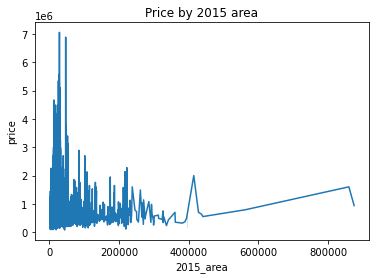

In [113]:
sns.lineplot(x='2015_area', y='price', data=house);
plt.title("Price by 2015 area");

The 2015 area doesn't have much impact on the house price. 

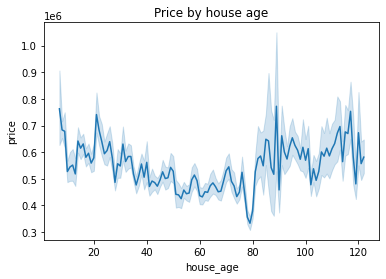

In [114]:
sns.lineplot(x='house_age', y='price', data=house);
plt.title("Price by house age");

The houses that are too old are expensive may be due to historical value. Similarly, the houses that are relatively newer are expensive too, which is self-explanatory. However the houses that are neither too old nor new have a lower price value since they have neither any historical value associated with them, nor they are new. The feature is quite similar to year built.

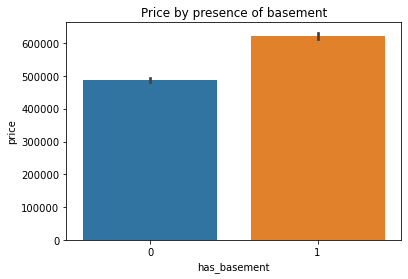

In [115]:
sns.barplot(x='has_basement', y='price', data=house);
plt.title("Price by presence of basement");

Presence of basement does increase house value.

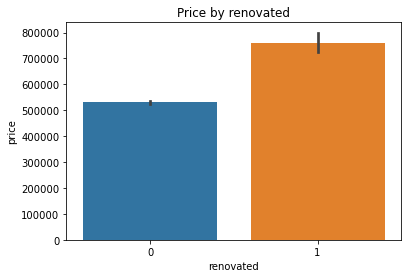

In [116]:
sns.barplot(x='renovated', y='price', data=house);
plt.title("Price by renovated");

Renovated property does get a higher price.

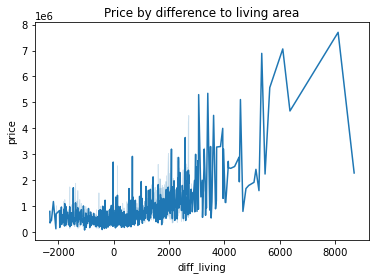

In [117]:
sns.lineplot(x='diff_living', y='price', data=house);
plt.title("Price by difference to living area");

The difference made to the living area after renovation has a clear impact on price.

In [118]:
# generating new feature 6
house['sqft_per_flr'] = (house['size_sans_basement'] + house['basement_size'])/house['floors']
house['sqft_per_flr'].corr(house['price'])

# generating new feature 7
house['outside_space'] = house['lot_in_sqft'] - house['sqft_per_flr']
house['outside_space'].corr(house['price'])

0.08298919034775815

In [119]:
house.head()

cid   sell_date   price  bedrooms  bathrooms  house_in_sqft  \
0  3876100940  04-27-2015  600000  4.000000   1.750000    3050.000000   
1  3145600250  03-17-2015  190000  2.000000   1.000000     670.000000   
2  7129303070  08-20-2014  735000  4.000000   2.750000    3040.000000   
3  7338220280  10-10-2014  257000  3.000000   2.500000    1740.000000   
4  7950300670  02-18-2015  450000  2.000000   1.000000    1120.000000   

   lot_in_sqft   floors  coast   viewed  condition  quality  \
0  9440.000000 1.000000      0 0.000000          3        8   
1  3101.000000 1.000000      0 0.000000          4        6   
2  2415.000000 2.000000      1 4.000000          3        8   
3  3721.000000 2.000000      0 0.000000          3        8   
4  4590.000000 1.000000      0 0.000000          3        7   

   size_sans_basement  basement_size  yr_built  yr_renovated zipcode  \
0         1800.000000    1250.000000      1966             0   98034   
1          670.000000       0.000000      1948             0   98118   
2         3040.000000       0.000000      1966             0   98118   
3         1740.000000       0.000000      2009             0   98002   
4         1120.000000       0.000000      1924             0   98118   

        lat        long  house_size_2015  lot_size_2015  furnished  \
0 47.722800 -122.183000      2020.000000    8660.000000   0.000000   
1 47.554600 -122.274000      1660.000000    4100.000000   0.000000   
2 47.518800 -122.256000      2620.000000    2433.000000   0.000000   
3 47.336300 -122.213000      2030.000000    3794.000000   0.000000   
4 47.566300 -122.285000      1120.000000    5100.000000   0.000000   

    total_area  house_age    2015_area  has_basement  renovated  diff_living  \
0 12490.000000         56 10680.000000             1          0  1030.000000   
1  3771.000000         74  5760.000000             0          0  -990.000000   
2  5455.000000         56  5053.000000             0          0   420.000000   
3  5461.000000         13  5824.000000             0          0  -290.000000   
4  5710.000000         98  6220.000000             0          0     0.000000   

   sqft_per_flr  outside_space  
0   3050.000000    6390.000000  
1    670.000000    2431.000000  
2   1520.000000     895.000000  
3    870.000000    2851.000000  
4   1120.000000    3470.000000

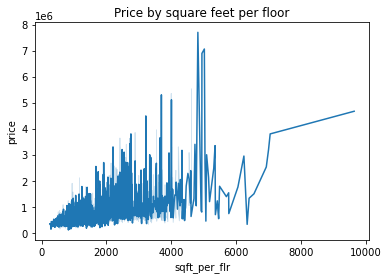

In [120]:
sns.lineplot(x='sqft_per_flr', y='price', data=house);
plt.title("Price by square feet per floor");

Price increases with square feet per floor, generally, so it's a good feature to look at

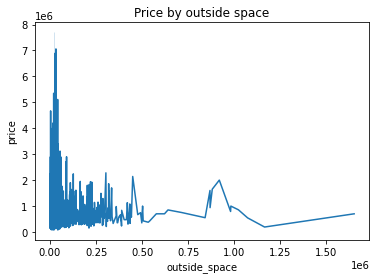

In [121]:
sns.lineplot(x='outside_space', y='price', data=house);
plt.title("Price by outside space");

Outside space hasn't mattered to the customers and has litte impact on price

### Handling outliers

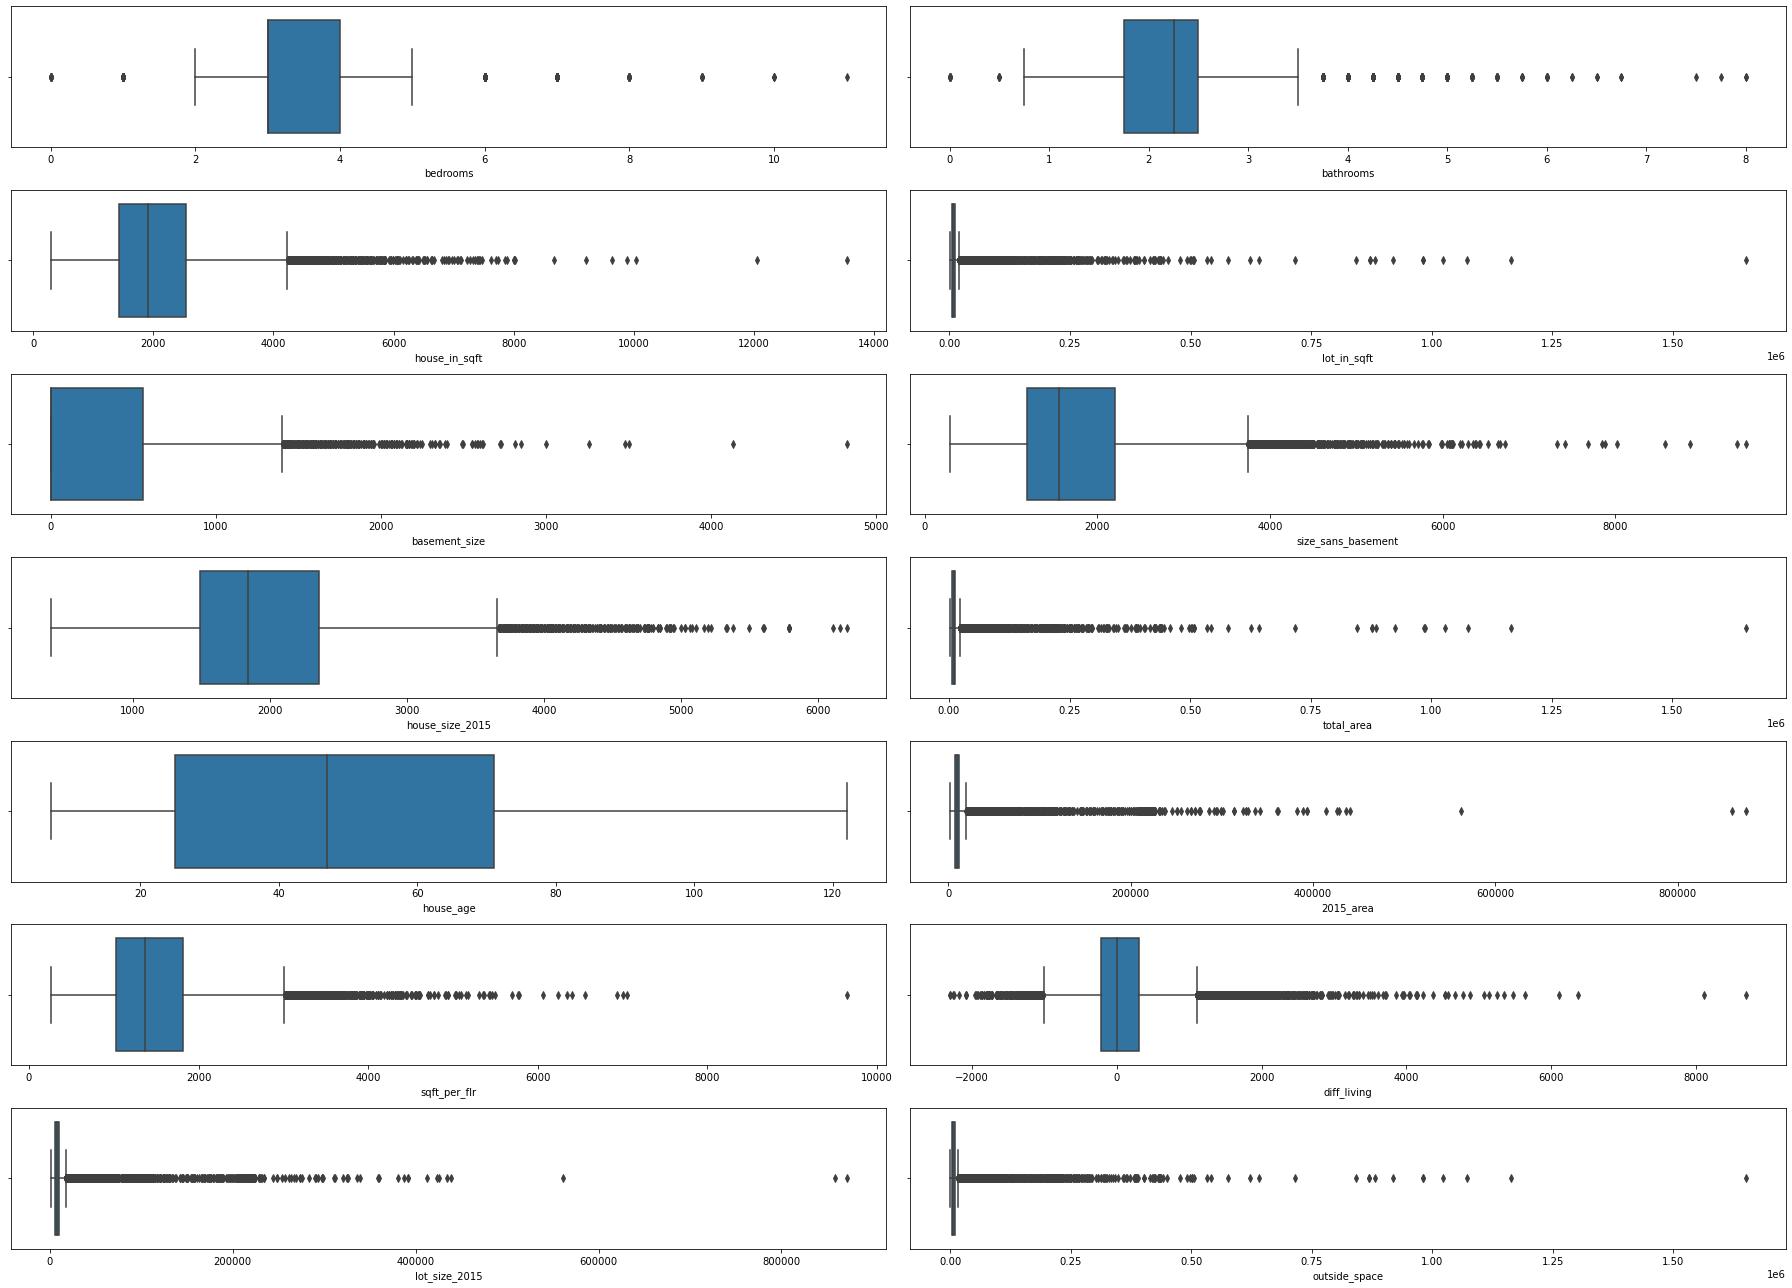

In [122]:
plt.figure(figsize=(25,18))

plt.subplot(7,2,1)
sns.boxplot(x=house['bedrooms'], data=house)

plt.subplot(7,2,2)
sns.boxplot(x=house['bathrooms'], data=house)

plt.subplot(7,2,3)
sns.boxplot(x=house['house_in_sqft'], data=house)

plt.subplot(7,2,4)
sns.boxplot(x=house['lot_in_sqft'], data=house)

plt.subplot(7,2,5)
sns.boxplot(x=house['basement_size'], data=house)

plt.subplot(7,2,6)
sns.boxplot(x=house['size_sans_basement'], data=house)

plt.subplot(7,2,7)
sns.boxplot(x=house['house_size_2015'], data=house)

plt.subplot(7,2,8)
sns.boxplot(x=house['total_area'], data=house)

plt.subplot(7,2,9)
sns.boxplot(x=house['house_age'], data=house)

plt.subplot(7,2,10)
sns.boxplot(x=house['2015_area'], data=house)

plt.subplot(7,2,11)
sns.boxplot(x=house['sqft_per_flr'], data=house)

plt.subplot(7,2,12)
sns.boxplot(x=house['diff_living'], data=house)

plt.subplot(7,2,13)
sns.boxplot(x=house['lot_size_2015'], data=house)

plt.subplot(7,2,14)
sns.boxplot(x=house['outside_space'], data=house)


plt.tight_layout()

All attributes have outliers but variation in the values is expected, since not all houses will be similar. 

### Let's check the number of outliers per column

In [123]:
Q1 = house.quantile(0.25)
Q3 = house.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [124]:
((house > UL) | (house < LL)).sum()

2015_area             2199
basement_size          496
bathrooms              569
bedrooms               541
cid                      0
coast                  161
condition               30
diff_living           1545
floors                   0
furnished             4246
has_basement             0
house_age                0
house_in_sqft          572
house_size_2015        546
lat                      2
long                   256
lot_in_sqft           2425
lot_size_2015         2196
outside_space         2455
price                 1159
quality               1911
renovated              914
sell_date                0
size_sans_basement     612
sqft_per_flr           577
total_area            2419
viewed                2119
yr_built                 0
yr_renovated           914
zipcode                  0
dtype: int64

### Total outliers in the dataset

In [125]:
print('Total outliers in the dataset are', ((house > UL) | (house < LL)).sum().sum())

Total outliers in the dataset are 28864


### Size of the dataset

In [126]:
print('The size of the housing dataset is', house.size)

The size of the housing dataset is 648390


### Percentage of outliers in the dataset

In [127]:
print('Percentage of outliers in the dataset is',(28864/670003)*100)

Percentage of outliers in the dataset is 4.30804041175935


4% is a small number, but for the sake of keeping all information, we'll convert those outliers to median

In [128]:
def fixOutlier (col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    UL = Q3+(1.5*IQR)
    LL = Q1-(1.5*IQR) 
    house.loc[(col < LL) | (col > UL), col.name] = col.median()
    

fixOutlier (house['bedrooms'])
fixOutlier (house['bathrooms'])
fixOutlier (house['house_in_sqft'])
fixOutlier (house['lot_in_sqft'])
fixOutlier (house['basement_size'])
fixOutlier (house['size_sans_basement'])
fixOutlier (house['house_size_2015'])
fixOutlier (house['total_area'])
fixOutlier (house['house_age'])
fixOutlier (house['2015_area'])
fixOutlier (house['sqft_per_flr'])
fixOutlier (house['diff_living'])
fixOutlier (house['lot_size_2015'])
fixOutlier (house['outside_space'])

### Boxplots after treating outliers

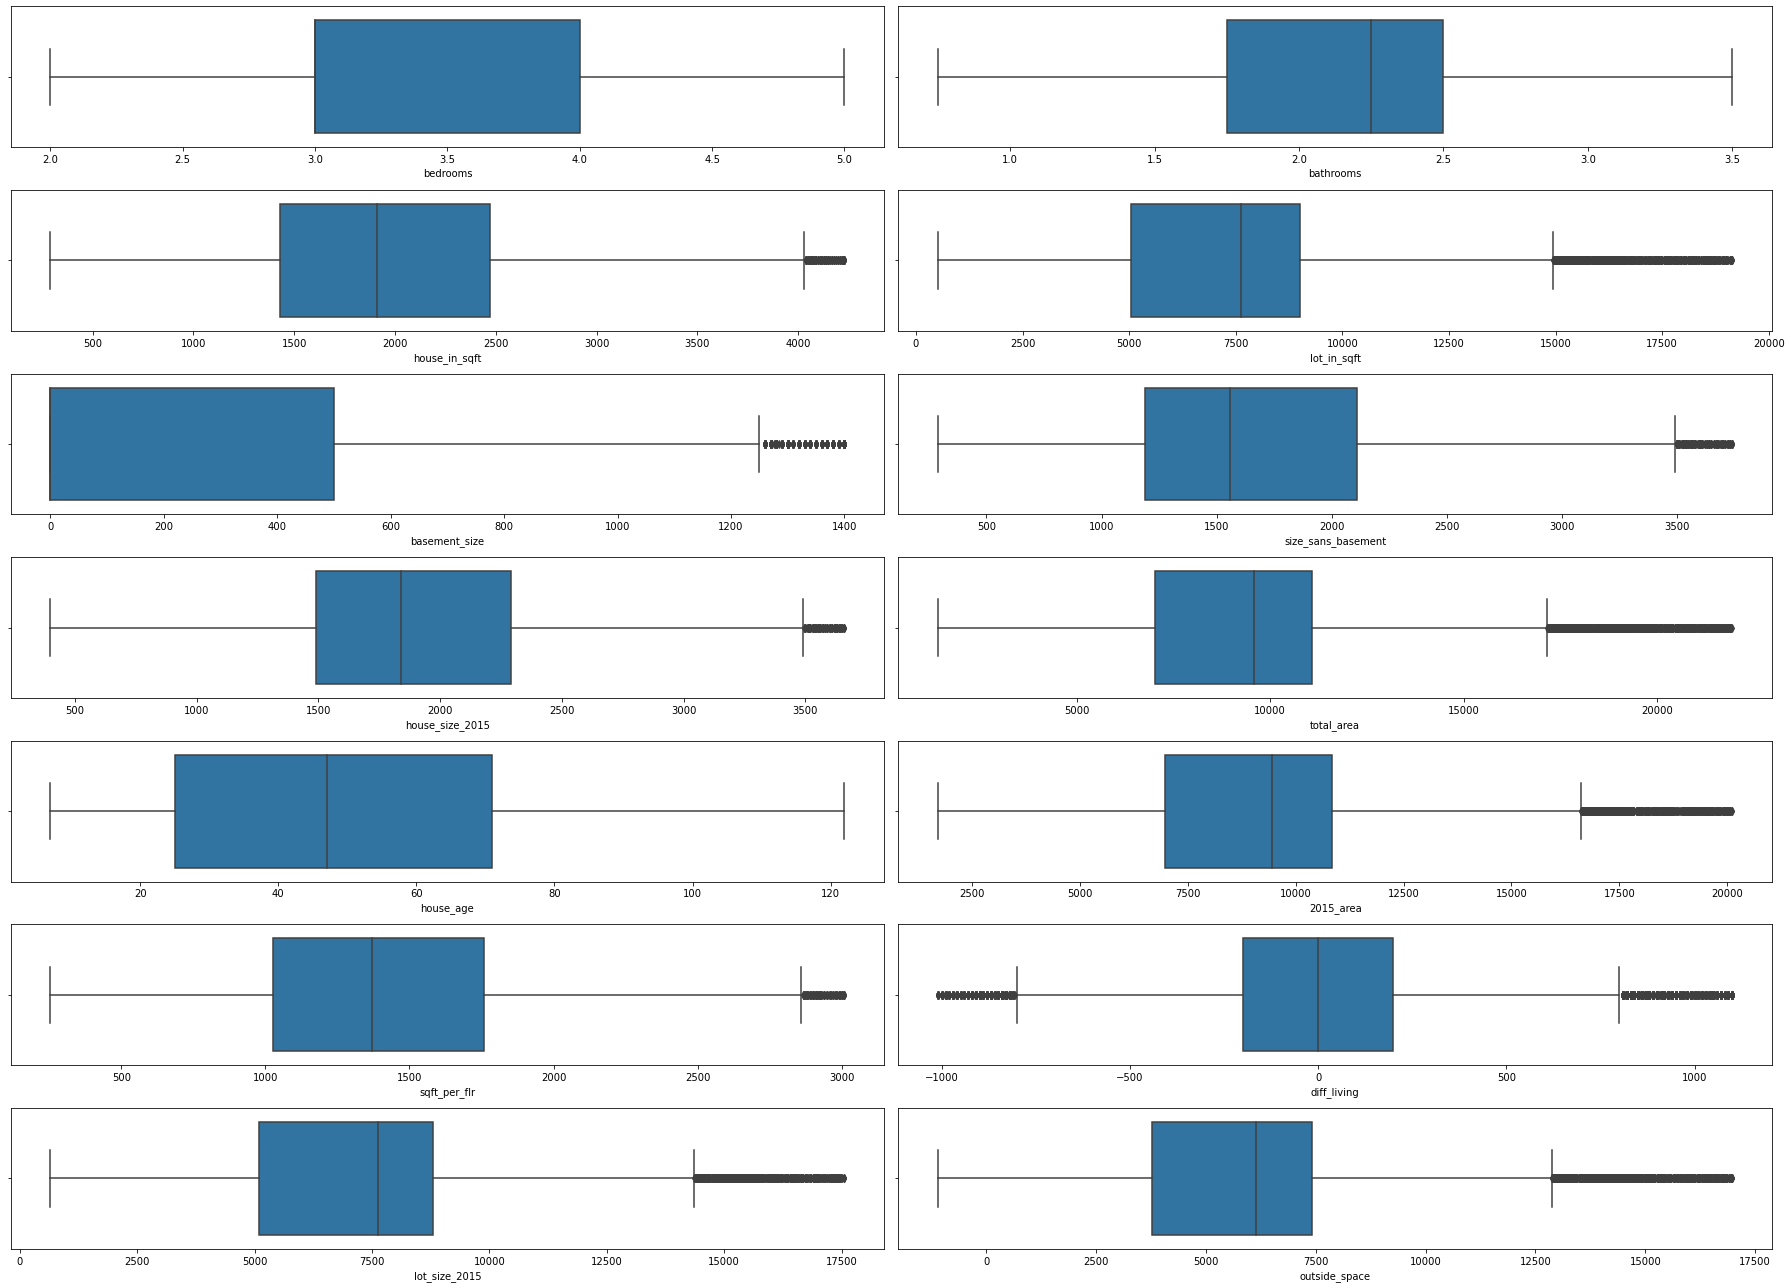

In [129]:
plt.figure(figsize=(25,18))

plt.subplot(7,2,1)
sns.boxplot(x=house['bedrooms'], data=house)

plt.subplot(7,2,2)
sns.boxplot(x=house['bathrooms'], data=house)

plt.subplot(7,2,3)
sns.boxplot(x=house['house_in_sqft'], data=house)

plt.subplot(7,2,4)
sns.boxplot(x=house['lot_in_sqft'], data=house)

plt.subplot(7,2,5)
sns.boxplot(x=house['basement_size'], data=house)

plt.subplot(7,2,6)
sns.boxplot(x=house['size_sans_basement'], data=house)

plt.subplot(7,2,7)
sns.boxplot(x=house['house_size_2015'], data=house)

plt.subplot(7,2,8)
sns.boxplot(x=house['total_area'], data=house)

plt.subplot(7,2,9)
sns.boxplot(x=house['house_age'], data=house)

plt.subplot(7,2,10)
sns.boxplot(x=house['2015_area'], data=house)

plt.subplot(7,2,11)
sns.boxplot(x=house['sqft_per_flr'], data=house)

plt.subplot(7,2,12)
sns.boxplot(x=house['diff_living'], data=house)

plt.subplot(7,2,13)
sns.boxplot(x=house['lot_size_2015'], data=house)

plt.subplot(7,2,14)
sns.boxplot(x=house['outside_space'], data=house)


plt.tight_layout()

### Checking for distribution plots

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

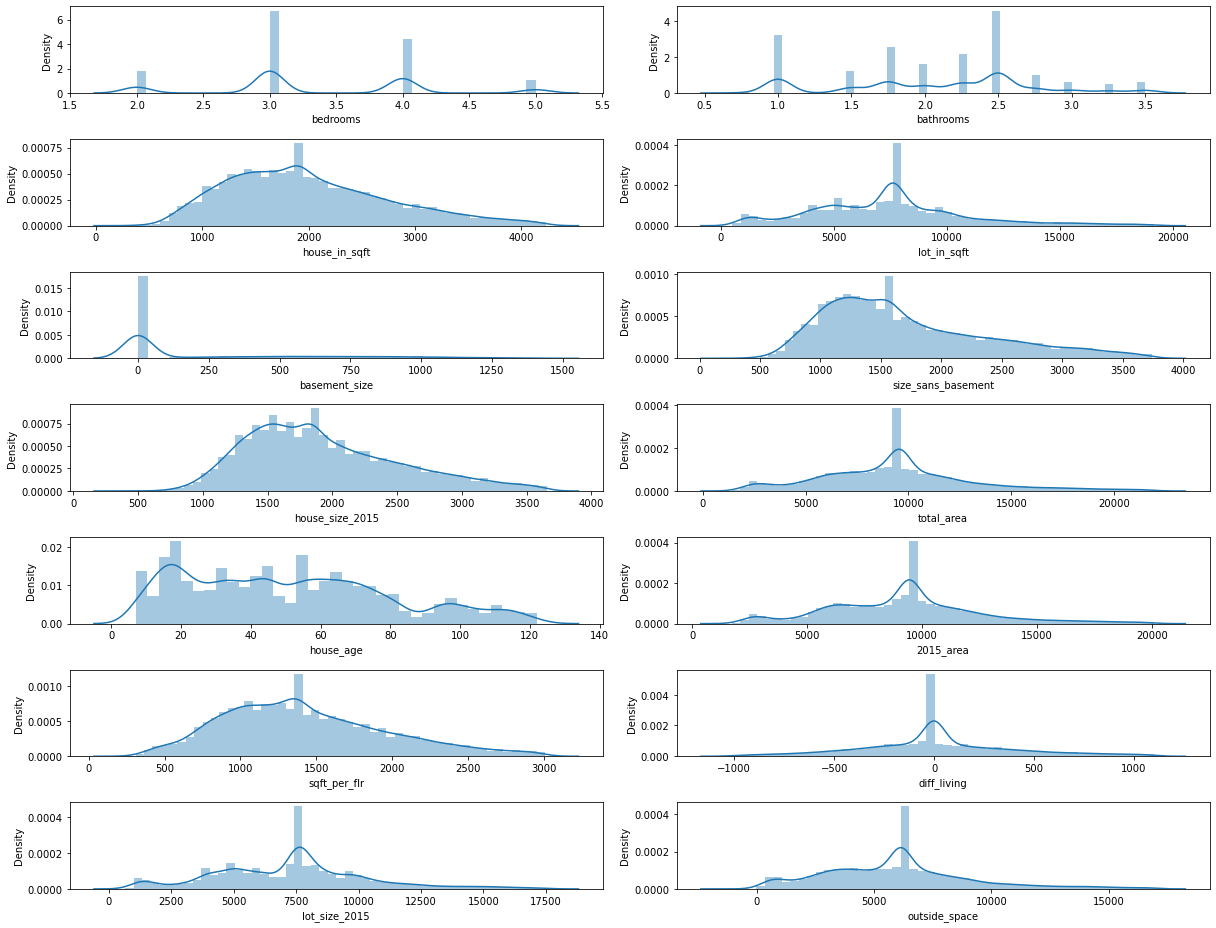

In [130]:
plt.figure(figsize=(17,13))

plt.subplot(7,2,1)
sns.distplot(house['bedrooms'])

plt.subplot(7,2,2)
sns.distplot(house['bathrooms'])

plt.subplot(7,2,3)
sns.distplot(house['house_in_sqft'])

plt.subplot(7,2,4)
sns.distplot(house['lot_in_sqft'])

plt.subplot(7,2,5)
sns.distplot(house['basement_size'])

plt.subplot(7,2,6)
sns.distplot(house['size_sans_basement'])

plt.subplot(7,2,7)
sns.distplot(house['house_size_2015'])

plt.subplot(7,2,8)
sns.distplot(house['total_area'])

plt.subplot(7,2,9)
sns.distplot(house['house_age'])

plt.subplot(7,2,10)
sns.distplot(house['2015_area'])

plt.subplot(7,2,11)
sns.distplot(house['sqft_per_flr'])

plt.subplot(7,2,12)
sns.distplot(house['diff_living'])

plt.subplot(7,2,13)
sns.distplot(house['lot_size_2015'])

plt.subplot(7,2,14)
sns.distplot(house['outside_space'])


plt.tight_layout()

* Bedrooms and bathrooms have clusters. 
* house_in_sqft, lot_in_sqft and house_size_2015 are normally distibuted but right skewed, slighltly.
* Basement size and total_area are not normally distributed and are heavily skewed.
* house_size_2015 and sqft per floor are almost normally distibuted but right skewed, slighltly.
* house_size without basement, difference to living area, 2015 area, lot size in 2015, and outside space are not normally distibuted

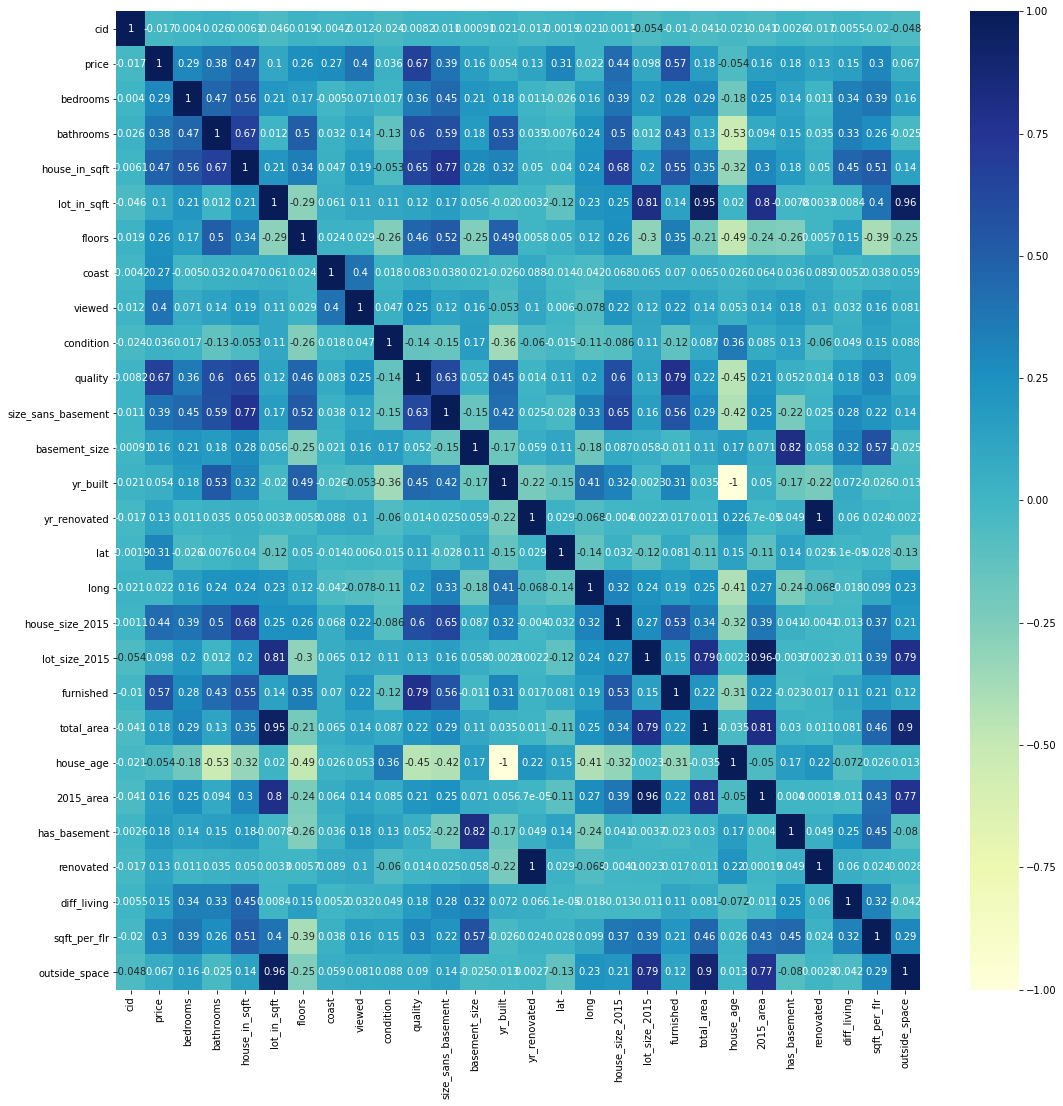

In [131]:
#HEATMAP FOR CORRELATION ANALYSIS
plt.figure(figsize=(18,18))
sns.heatmap(house.corr(),annot=True,cmap="YlGnBu")
plt.savefig('heatmap.png')

* Price' is moderately correlated with 'furninshed','house_in-sqft', 'size_sans_basement','quality','house_size_2015', and 'bathrooms'. 
* Also, 'lot_in_sqft' and 'total_area' are completely correlated. 
* Even 'size_sans_basement' and 'house_in-sqft' are highly correlated.

### Checking relation between target variable price and other features

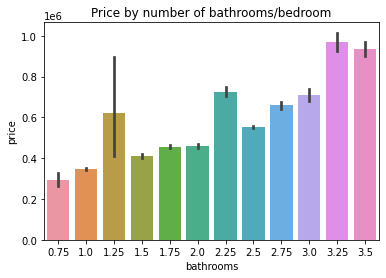

In [132]:
# Checking for relation between price and bathrooms
# plt.figure(figsize=(12,5))
sns.barplot(x='bathrooms',y='price',data=house)
# plt.xticks(rotation = 90)
plt.title("Price by number of bathrooms/bedroom");

Price increases as the number of bathrooms goes up.

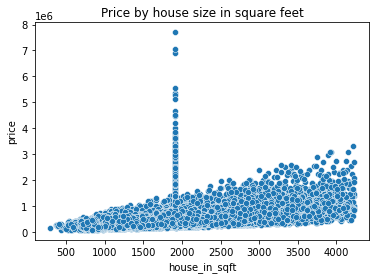

In [133]:
# Checking for relation between price and house size in square feet
sns.scatterplot(x='house_in_sqft', y='price',data=house)
plt.title("Price by house size in square feet");

Price increases linearly with the living area but for a certain space in the range of 1800 sqft, the price can go very high. Is it the area? We have to check.

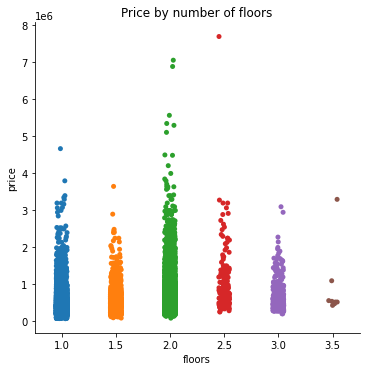

In [134]:
# Checking for relation between number of floors and price
sns.catplot(x="floors", y="price", data=house)
plt.title("Price by number of floors");

Two-floor houses have a higher price.

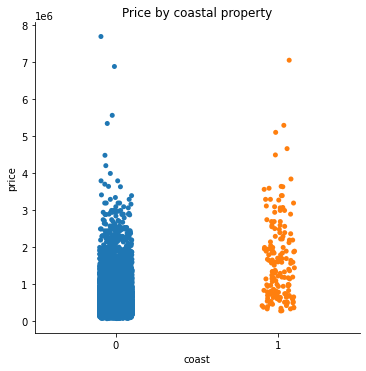

In [135]:
# Checking for relation between coastal property and price
sns.catplot(x="coast", y="price", data=house)
plt.title("Price by coastal property");

The number of houses with no coast or waterfront view is much higher than of houses with coast, but waterfront property is pricier, generally.

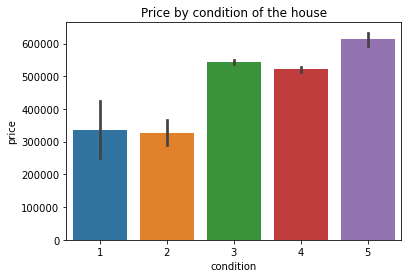

In [136]:
# Checking for relation between condition and price
sns.barplot(x='condition',y='price',data=house)
plt.title("Price by condition of the house");

Houses in better condition fetch a better price.

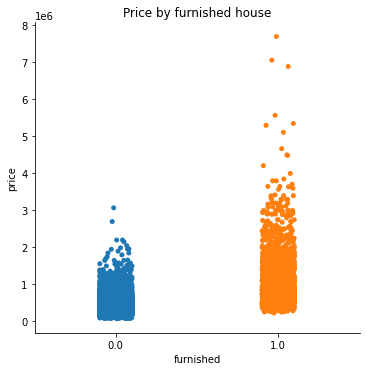

In [137]:
# Checking for relation between furnished house and price
sns.catplot(x="furnished", y="price", data=house)
plt.title("Price by furnished house");

Price for a furnished property is way better.

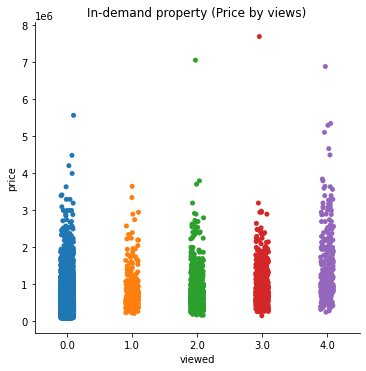

In [138]:
# Checking for relation between number of views and price
sns.catplot(x="viewed", y="price", data=house)
plt.title("In-demand property (Price by views)");

The houses that are viewed more fetch a better price for being more in demand. 

### Binning the attributes

In [139]:
# First check the unique values of the features to see how to group those

print('Condition :-')
print (house['condition'].sort_values().unique())

print ('')

print('Quality :-')
print (house['quality'].sort_values().unique())

print ('')


print('Bedrooms :-')
print (house['bedrooms'].sort_values().unique())

print ('')


print('Bathrooms :-')
print (house['bathrooms'].sort_values().unique())

print ('')


print('Floors :-')
print (house['floors'].sort_values().unique())

print ('')


print('Viewed :-')
print (house['viewed'].sort_values().unique())

print ('')


print('Year Built:-')
print (house['yr_built'].sort_values().unique())

print ('')


print('Year Renovated :-')
print (house['yr_renovated'].sort_values().unique())

print ('')


print('House Age :-')
print (house['house_age'].sort_values().unique())

Condition :-
[1 2 3 4 5]

Quality :-
[ 1  3  4  5  6  7  8  9 10 11 12 13]

Bedrooms :-
[2. 3. 4. 5.]

Bathrooms :-
[0.75 1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.   3.25 3.5 ]

Floors :-
[1.  1.5 2.  2.5 3.  3.5]

Viewed :-
[0. 1. 2. 3. 4.]

Year Built:-
[1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913
 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927
 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941
 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955
 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969
 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983
 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997
 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015]

Year Renovated :-
[   0 1934 1940 1944 1945 1946 1948 1950 1951 1953 1954 1955 1956 1957
 1958 1959 1960 1962 1963 1964 1965 1967 1968 1969 1970 1971 19

### Binning the variable 'condition'

In [140]:
house['condition_bin']=pd.cut(house.condition,bins=(1,3,5,6),labels=['Bad','Medium','Good'],right=False)
house[['condition','condition_bin']].head()

condition condition_bin
0          3        Medium
1          4        Medium
2          3        Medium
3          3        Medium
4          3        Medium

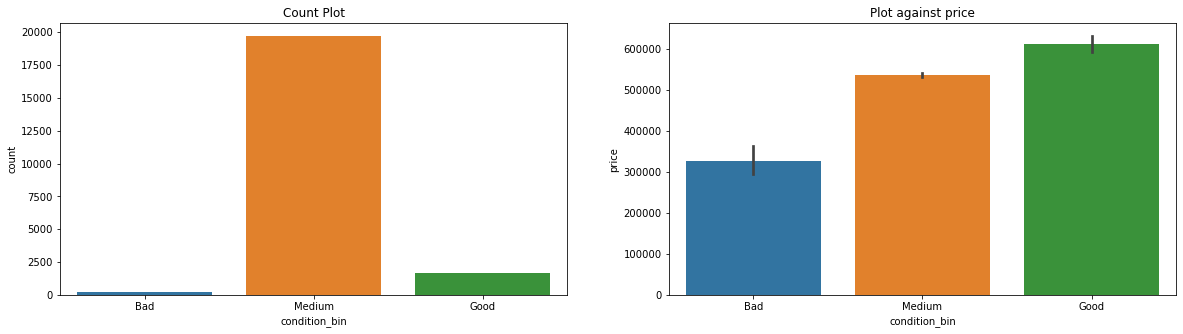

In [141]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2, figsize=(20,5))
sns.countplot(x='condition_bin',data=house,ax=ax1)
ax1.set_title("Count Plot")
sns.barplot(x='condition_bin',y='price',data=house,ax=ax2)
ax2.set_title("Plot against price");

    * Data was grouped on 'condition' like this: (1 & 2)=Good, (3 & 4)=Medium, (5)=Good.
    * Number of houses in 'medium' condition are in majority.
    * Price of the house  in 'good' condition is higher.

### Binning the variable 'quality'

In [142]:
house['quality_bin']=pd.cut(house.quality,bins=(1,7,10,13),labels=['Bad','Medium','Good'],right=False)
house[['quality','quality_bin']].head()

quality quality_bin
0        8      Medium
1        6         Bad
2        8      Medium
3        8      Medium
4        7      Medium

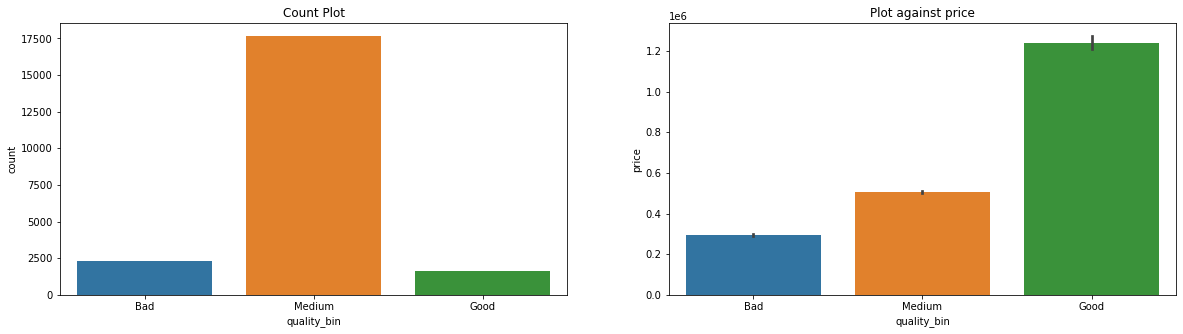

In [143]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2, figsize=(20,5))
sns.countplot(x='quality_bin',data=house,ax=ax1)
ax1.set_title("Count Plot")
sns.barplot(x='quality_bin',y='price',data=house,ax=ax2)
ax2.set_title("Plot against price");

* The data was grouped on 'quality' in this manner: (1 to 6)=Good, (7 to 9)=Medium, (10 to 12)=Good.
* 'Medium' quailty houses are in majority.
* Price of houses of 'good' quality is higher.

### Binning 'bedrooms'

In [144]:
house['bedrooms_bin']=pd.cut(house.bedrooms,bins=(1,3,5,7),labels=['Samll','Medium','Large'],right=False)
house[['bedrooms','bedrooms_bin']].head();

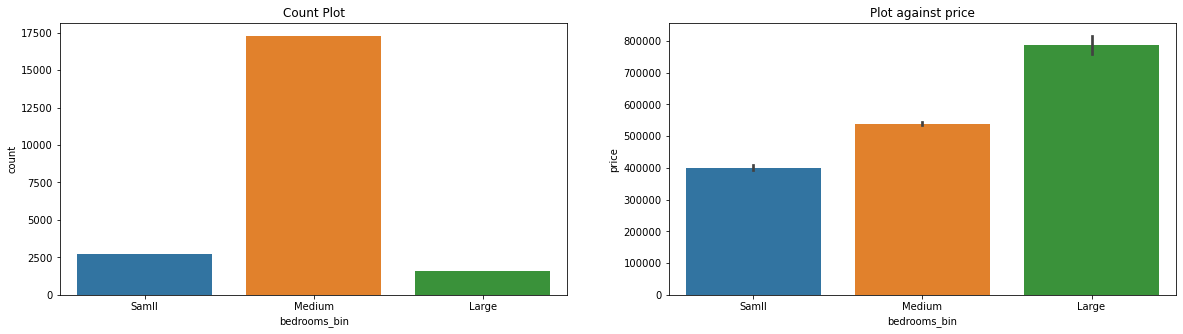

In [145]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2, figsize=(20,5))
sns.countplot(x='bedrooms_bin',data=house,ax=ax1)
ax1.set_title("Count Plot")
sns.barplot(x='bedrooms_bin',y='price',data=house,ax=ax2)
ax2.set_title("Plot against price");

* The data was grouped on 'bedrooms' as: (1 to 2)=small, (3 & 4)=Medium, (5 =<)= Large.
* Houses with 'medium' number of bedrooms (3 to 4) are in majority.
* Houses with a large number of rooms are in the highest price bracket.

### Binning 'bathrooms' :

In [146]:
house['bathrooms_bin']=pd.cut(house.bathrooms,bins=(0,2,3,5),labels=['Bath_1','Bath_2','Bath_3'],right=False)
house[['bathrooms','bathrooms_bin']].head()

bathrooms bathrooms_bin
0   1.750000        Bath_1
1   1.000000        Bath_1
2   2.750000        Bath_2
3   2.500000        Bath_2
4   1.000000        Bath_1

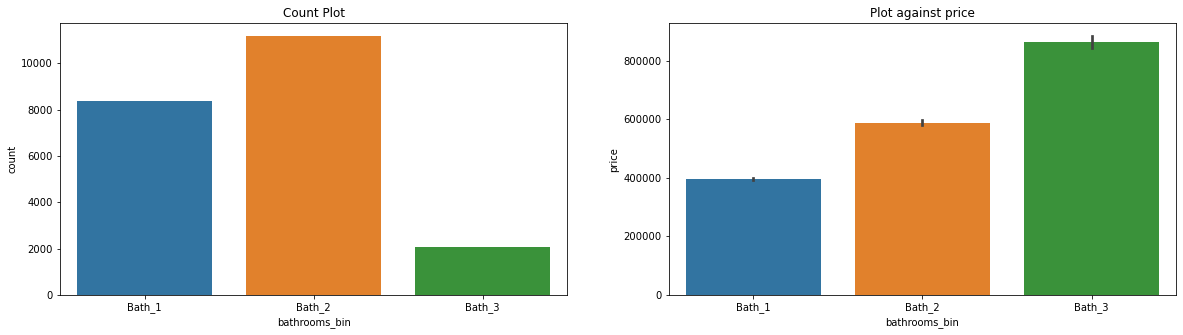

In [147]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2, figsize=(20,5))
sns.countplot(x='bathrooms_bin',data=house,ax=ax1)
ax1.set_title("Count Plot")
sns.barplot(x='bathrooms_bin',y='price',data=house,ax=ax2)
ax2.set_title("Plot against price");

* Data was grouped on bathrooms as: (0 to 1)=Bath_1, (2 to 3)=Bath_2, (4 to 5)= Bath_grp3.
* Houses with 2 to 3 bathrooms in majority.
* Price of houses with 4 to 5 bathrooms is highest.

### Binning floors

In [148]:
house['floors_bin']=pd.cut(house.floors,bins=(0,2,3,4),labels=['Floor_cat1','Floor_cat2','Floor_cat3'],right=False)
house[['floors','floors_bin']].head()

floors  floors_bin
0 1.000000  Floor_cat1
1 1.000000  Floor_cat1
2 2.000000  Floor_cat2
3 2.000000  Floor_cat2
4 1.000000  Floor_cat1

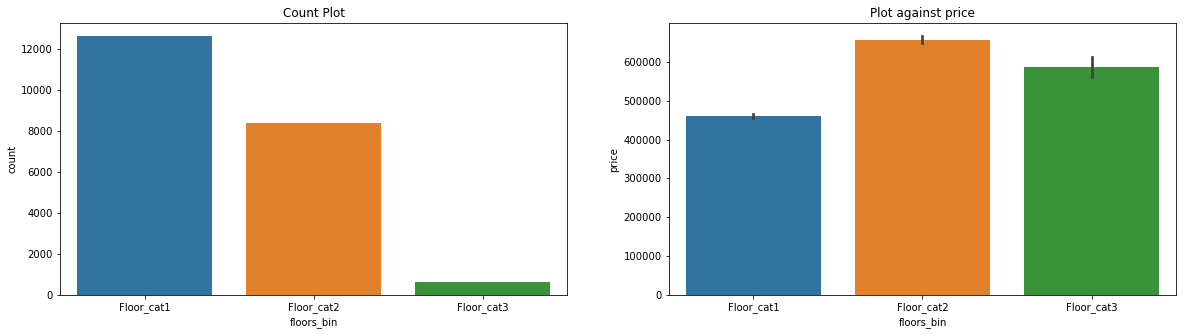

In [149]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2, figsize=(20,5))
sns.countplot(x='floors_bin',data=house,ax=ax1)
ax1.set_title("Count Plot")
sns.barplot(x='floors_bin',y='price',data=house,ax=ax2)
ax2.set_title("Plot against price");

* The data was grouped on floors as: (0 to 1)=Floor_cat1, (2 to 3)=Floor_cat2, (3 to 4)= Floor_cat3.
* Houses with 0 to 1 floor are in majority. 0 floors are cabins, perhaps.
* Price of houses with 2 to 3 floors is highest.

### Binning viewed

In [150]:
house['viewed_bin']=pd.cut(house.viewed,bins=(0,2,4,5),labels=['Not Visited','Some Visited','Many Visited'],right=False)
house[['viewed','viewed_bin']].head()

viewed    viewed_bin
0 0.000000   Not Visited
1 0.000000   Not Visited
2 4.000000  Many Visited
3 0.000000   Not Visited
4 0.000000   Not Visited

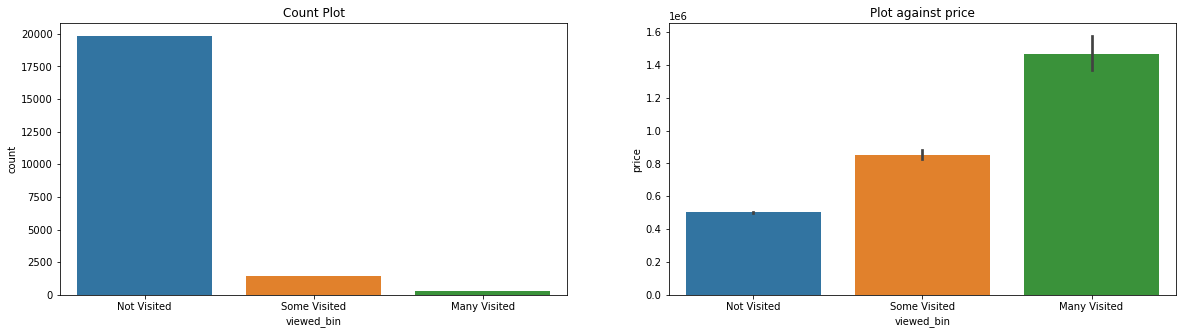

In [151]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2, figsize=(20,5))
sns.countplot(x='viewed_bin',data=house,ax=ax1)
ax1.set_title("Count Plot")
sns.barplot(x='viewed_bin',y='price',data=house,ax=ax2)
ax2.set_title("Plot against price");

* Data was group on viewed as: (0 to 1)=Not Visited, (2 to 3)=Some Visited, (4 to 5)= Many visited.
* Unvisited houses are in majority.
* Price of houses with many visitors is the higheset.

### Binning year_built

In [152]:
house['yr_built_bin']=pd.cut(house.yr_built,bins=(1900,1925,1950,1975,2000,2020),labels=['1900s','1925s','1950s','1975s','2000s'],right=False)
house[['yr_built','yr_built_bin']].head()

yr_built yr_built_bin
0      1966        1950s
1      1948        1925s
2      1966        1950s
3      2009        2000s
4      1924        1900s

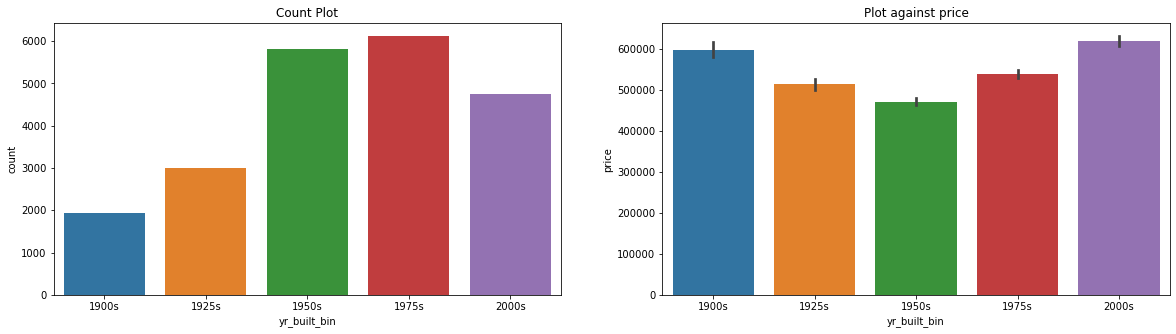

In [153]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2, figsize=(20,5))
sns.countplot(x='yr_built_bin',data=house,ax=ax1)
ax1.set_title("Count Plot")
sns.barplot(x='yr_built_bin',y='price',data=house,ax=ax2)
ax2.set_title("Plot against price");

* The variable yr_built' is divided into 5 groups.
* Most of the houses in the county were built in the 1950s.
* The price of houses built in the 1900s is the highest because of antique value.

### Lat,Long binning

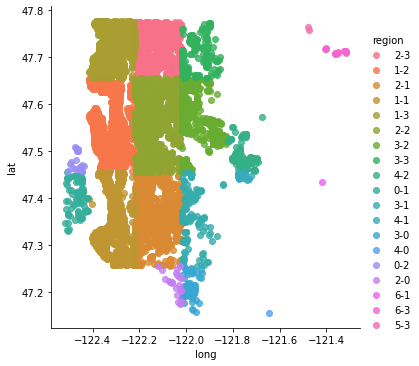

In [154]:
longmin = house['long'].min()
latmin = house['lat'].min()

data_ = {'key':['longmin', 'latmin', ], 'val':[longmin, latmin]} 

lat_long_df = pd.DataFrame(data_) 
lat_long_df.set_index("key", inplace = True) 

house['long_bin'] = house['long'].apply(lambda val: round(( abs(longmin) - abs(val)) /.2))
house['lat_bin'] = house['lat'].apply(lambda val: round(( abs(val) - abs(latmin) )/.2))
house['region'] = house.apply (lambda row: str(row['long_bin'])+'-'+str(row['lat_bin']), axis=1)

house['Region_name']= house.apply (lambda row: "Region"+'-'+str(row['region']), axis=1)

sns.lmplot(y='lat',x='long', data=house, hue='region', fit_reg=False)

### Binning 'house_age'

In [155]:
age_labels=[0,10,20,30,40,50,60,70,80,90]
house['house_age_bin']=pd.qcut(house['house_age'],q=10,labels=age_labels)
house[['house_age','house_age_bin']].head()

house_age house_age_bin
0         56            50
1         74            70
2         56            50
3         13             0
4         98            90

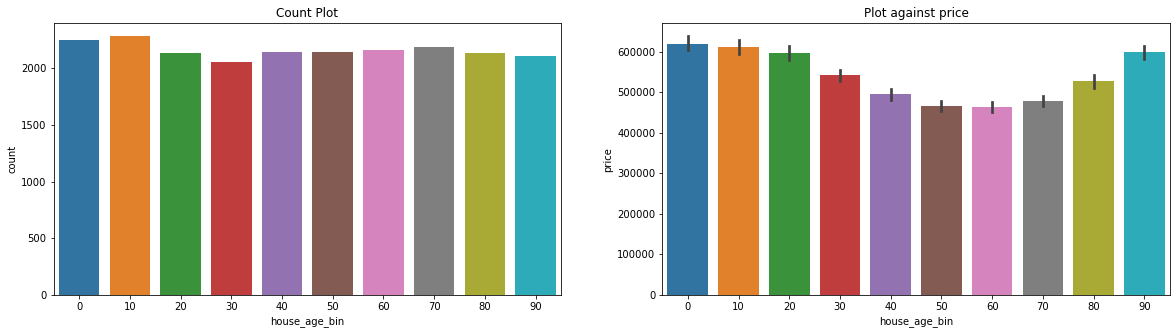

In [156]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2, figsize=(20,5))
sns.countplot(x='house_age_bin',data=house,ax=ax1)
ax1.set_title("Count Plot")
sns.barplot(x='house_age_bin',y='price',data=house,ax=ax2)
ax2.set_title("Plot against price");

House_age is distributed equally across the 10 groups.

### Binning 'year_renovated'

In [157]:
house['yr_renovated_bin']=pd.cut(house.yr_renovated,bins=(0,1925,1950,1975,2000,2020),labels=['not renovated','1925s','1950s','1975s','2000s'],right=False)
house[['yr_renovated','yr_renovated_bin']].head()

yr_renovated yr_renovated_bin
0             0    not renovated
1             0    not renovated
2             0    not renovated
3             0    not renovated
4             0    not renovated

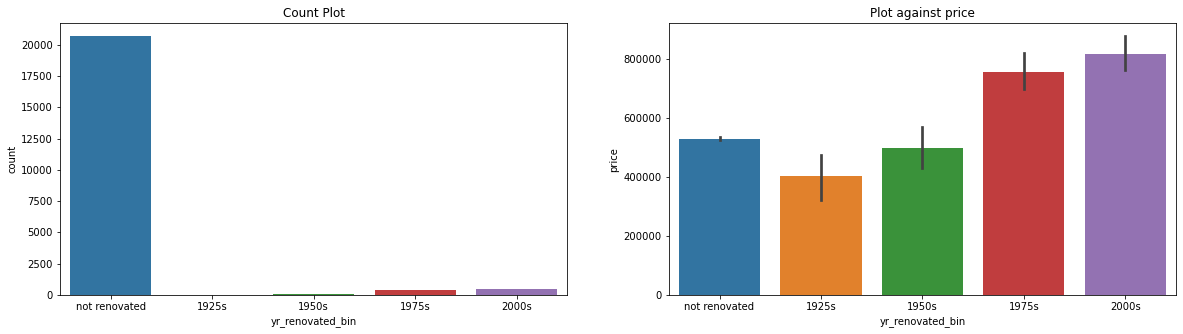

In [158]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2, figsize=(20,5))
sns.countplot(x='yr_renovated_bin',data=house,ax=ax1)
ax1.set_title("Count Plot")
sns.barplot(x='yr_renovated_bin',y='price',data=house,ax=ax2)
ax2.set_title("Plot against price");

* The 'yr_renovated' data was divided into 5 groups.
* Maximum number of houses in the county are not renavated.
* Price of  renovated houses is better.
* Houses renovated in the 2000's fetch the best price, followed by houses renovated in the 1975s.

### Binning Zipcodes

In [159]:
replaceStruct = {
                "zipcode": {98001 : "Auburn", 98002 : "Auburn", 98003 : "Federal Way" , 98004 : "Bellevue" ,98005 : "Bellevue",
                            98006 : "Bellevue", 98007 : "Bellevue", 98008 : "Bellevue", 98010 : "Black Diamond", 98011 : "Bothell",
                            98014 : "Carnation", 98019 : "Duvall", 98022 : "Enumclaw", 98023 : "Federal Way", 98024 : "Fall City",
                            98027 : "Issaquah", 98028 : "Kenmore", 98029 : "Issaquah" , 98030 : "Kent", 98031 : "Kent",
                            98032 : "kent", 98033 : "Kirkland", 98034 : "Kirkland", 98038 : "Maple Valley", 98039 : "Medina",
                            98040 : "Mercer Island", 98042 : "Kent", 98045 : "North Bend", 98052 : "Redmond", 98053 : "Redmond",
                            98055 : "Renton", 98056 : "Renton", 98058 : "Renton", 98059 : "Renton", 98065 : "Snoqualmie", 98072 : "Woodinville",
                            98070 : "Vashon", 98074 : "Sammamish", 98075 : "Sammamish", 98077 : "Woodinville", 98092 : "Auburn",
                            98102 : "Seattle", 98103 : "Seattle" ,98105 : "Seattle" , 98106 : "Seattle",
                            98107 :"Seattle" ,98108 : "Seattle", 98109 : "Seattle", 98112 : "Seattle", 98115:"Seattle", 98116:"Seattle", 98117:"Seattle", 98118:"Seattle", 98119:"Seattle",
                            98122 :"Seattle", 98125:"Seattle", 98126:"Seattle", 98133 :"Seattle", 98136:"Seattle", 98144:"Seattle", 98146:"Seattle", 98148:"Seattle", 98155:"Seattle",
                            98166 : "Seattle", 98168:"Seattle", 98177:"Seattle", 98178:"Seattle", 98188:"Seattle", 98198:"Seattle", 98199:"Seattle"
                            }
                }
house = house.replace(replaceStruct)

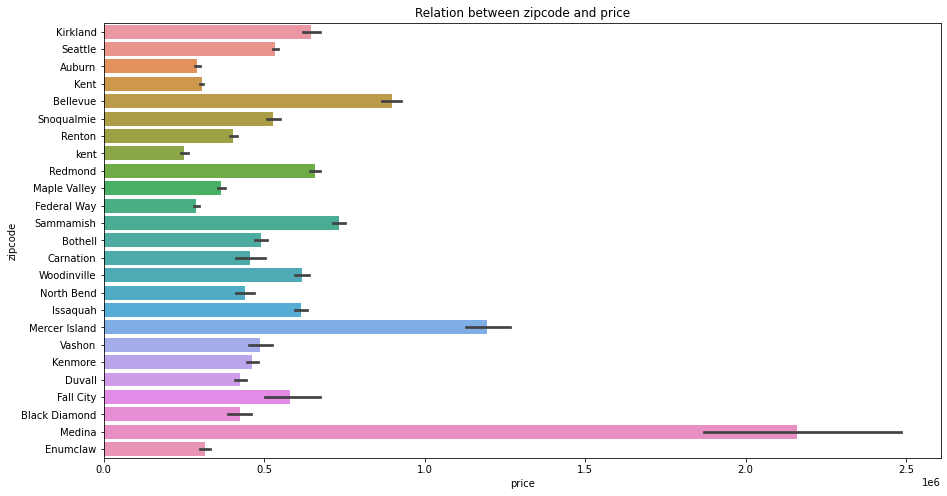

In [160]:
plt.figure(figsize=(15,8))
sns.barplot(x='price',y='zipcode',data=house)
# plt.xticks(rotation = 90)
plt.title ("Relation between zipcode and price");

Medina seems to have the most expensive houses in the county, pricier than even Seattle. Google tells us that billionaire Bill Gates, along with a number of Microsoft executives, or other associates of Gates, have homes in Medina.

In [161]:
house.zipcode.unique()

array(['Kirkland', 'Seattle', 'Auburn', 'Kent', 'Bellevue', 'Snoqualmie',
       'Renton', 'kent', 'Redmond', 'Maple Valley', 'Federal Way',
       'Sammamish', 'Bothell', 'Carnation', 'Woodinville', 'North Bend',
       'Issaquah', 'Mercer Island', 'Vashon', 'Kenmore', 'Duvall',
       'Fall City', 'Black Diamond', 'Medina', 'Enumclaw'], dtype=object)

In [162]:
house.zipcode.describe()

count       21613
unique         25
top       Seattle
freq         8977
Name: zipcode, dtype: object

In [163]:
house.head()

cid   sell_date   price  bedrooms  bathrooms  house_in_sqft  \
0  3876100940  04-27-2015  600000  4.000000   1.750000    3050.000000   
1  3145600250  03-17-2015  190000  2.000000   1.000000     670.000000   
2  7129303070  08-20-2014  735000  4.000000   2.750000    3040.000000   
3  7338220280  10-10-2014  257000  3.000000   2.500000    1740.000000   
4  7950300670  02-18-2015  450000  2.000000   1.000000    1120.000000   

   lot_in_sqft   floors  coast   viewed  condition  quality  \
0  9440.000000 1.000000      0 0.000000          3        8   
1  3101.000000 1.000000      0 0.000000          4        6   
2  2415.000000 2.000000      1 4.000000          3        8   
3  3721.000000 2.000000      0 0.000000          3        8   
4  4590.000000 1.000000      0 0.000000          3        7   

   size_sans_basement  basement_size  yr_built  yr_renovated   zipcode  \
0         1800.000000    1250.000000      1966             0  Kirkland   
1          670.000000       0.000000      1948             0   Seattle   
2         3040.000000       0.000000      1966             0   Seattle   
3         1740.000000       0.000000      2009             0    Auburn   
4         1120.000000       0.000000      1924             0   Seattle   

        lat        long  house_size_2015  lot_size_2015  furnished  \
0 47.722800 -122.183000      2020.000000    8660.000000   0.000000   
1 47.554600 -122.274000      1660.000000    4100.000000   0.000000   
2 47.518800 -122.256000      2620.000000    2433.000000   0.000000   
3 47.336300 -122.213000      2030.000000    3794.000000   0.000000   
4 47.566300 -122.285000      1120.000000    5100.000000   0.000000   

    total_area  house_age    2015_area  has_basement  renovated  diff_living  \
0 12490.000000         56 10680.000000             1          0  1030.000000   
1  3771.000000         74  5760.000000             0          0  -990.000000   
2  5455.000000         56  5053.000000             0          0   420.000000   
3  5461.000000         13  5824.000000             0          0  -290.000000   
4  5710.000000         98  6220.000000             0          0     0.000000   

   sqft_per_flr  outside_space condition_bin quality_bin bedrooms_bin  \
0   1370.000000    6390.000000        Medium      Medium       Medium   
1    670.000000    2431.000000        Medium         Bad        Samll   
2   1520.000000     895.000000        Medium      Medium       Medium   
3    870.000000    2851.000000        Medium      Medium       Medium   
4   1120.000000    3470.000000        Medium      Medium        Samll   

  bathrooms_bin  floors_bin    viewed_bin yr_built_bin  long_bin  lat_bin  \
0        Bath_1  Floor_cat1   Not Visited        1950s         2        3   
1        Bath_1  Floor_cat1   Not Visited        1925s         1        2   
2        Bath_2  Floor_cat2  Many Visited        1950s         1        2   
3        Bath_2  Floor_cat2   Not Visited        2000s         2        1   
4        Bath_1  Floor_cat1   Not Visited        1900s         1        2   

  region Region_name house_age_bin yr_renovated_bin  
0    2-3  Region-2-3            50    not renovated  
1    1-2  Region-1-2            70    not renovated  
2    1-2  Region-1-2            50    not renovated  
3    2-1  Region-2-1             0    not renovated  
4    1-2  Region-1-2            90    not renovated

In [164]:
print('Correlation between house_in_sqft and price:')
print(house['house_in_sqft'].corr(house['price']))

print('\nCorrelation between house_size_2015 and price:')
print(house['house_size_2015'].corr(house['price']))

print('\nCorrelation between lot_in_sqft and price:')
print(house['lot_in_sqft'].corr(house['price']))

print('\nCorrelation between lot_size_2015 and price:')
print(house['lot_size_2015'].corr(house['price']))

print('\nCorrelation between basement size and price:')
print(house['basement_size'].corr(house['price']))

Correlation between house_in_sqft and price:
0.4698618477335935

Correlation between house_size_2015 and price:
0.4363436591322249

Correlation between lot_in_sqft and price:
0.10370394435639411

Correlation between lot_size_2015 and price:
0.09798229078122614

Correlation between basement size and price:
0.16086228217888976


Looking at the above correlation values, we decide to retain house_in_sqft since its correlation with 'price' is higher and drop the other house size.
And between lot_in_sqft and lot_size_2015; we can retain lot_in_sqft since its correlation with 'price' is little higher and drop the other one.

In [165]:
# A function to add Mean Encoded feature by considering the mean target value.
def meanEnc (dataSet,indFeatureName):
    
    # Calculate global mean
    tar_mean = dataSet.price.mean()
    
    # Calculate the number of values and mean of each group
    agg = dataSet.groupby(indFeatureName)['price'].agg(['count','mean'])
    counts = agg['count']
    means = agg['mean']
    weight = 100
    
    #Calculate smoothed means
    smooth = (counts * means + weight * tar_mean)/(counts + weight)
    print (smooth)
    smooth1 = smooth.copy()
    smooth = smooth.reset_index()
    grpDF = pd.DataFrame(smooth, columns=smooth.columns)
    grpDF.rename(columns = {indFeatureName:'key', 0:"val"}, inplace = True) 
    grpDF.set_index("key", inplace = True) 
    dataSet.loc[:,indFeatureName+'_enc'] = dataSet[indFeatureName].map(smooth1)

In [166]:
#lets remove unwanted columns
#lets create a function to drop columns
def dropcols (col_list):
    for col in col_list:
        if col in house.columns:
            house.drop(col,axis=1,inplace=True)
            print("dropped column: " + col)

In [167]:
meanEnc(house, house.bedrooms_bin.name)
meanEnc(house, house.bathrooms_bin.name)
meanEnc(house, house.condition_bin.name)
meanEnc(house, house.quality_bin.name)
meanEnc(house, house.floors_bin.name)
meanEnc(house, house.viewed_bin.name)
meanEnc(house, house.yr_built_bin.name)
meanEnc(house, house.house_age_bin.name)
meanEnc(house, house.yr_renovated_bin.name)
meanEnc(house, house.zipcode.name)
meanEnc(house, house.Region_name.name)
meanEnc(house, house.furnished.name)
meanEnc(house, house.coast.name)

bedrooms_bin
Samll    406233.367713
Medium   539497.326342
Large    772187.133852
dtype: float64
bathrooms_bin
Bath_1   398297.614373
Bath_2   587948.493201
Bath_3   847438.218983
dtype: float64
condition_bin
Bad      398237.723852
Medium   536155.143550
Good     608483.531705
dtype: float64
quality_bin
Bad       305198.109357
Medium    505929.081563
Good     1198493.559419
dtype: float64
floors_bin
Floor_cat1   460994.144128
Floor_cat2   655663.596728
Floor_cat3   581052.685069
dtype: float64
viewed_bin
Not Visited     502221.096250
Some Visited    834526.246577
Many Visited   1244933.973396
dtype: float64
yr_built_bin
1900s   595050.010725
1925s   514564.009337
1950s   472679.050462
1975s   539075.553678
2000s   616908.625876
dtype: float64
house_age_bin
0    616675.901818
10   607971.299740
20   593758.022755
30   541198.089545
40   496610.116050
50   469222.879572
60   467455.158887
70   480564.783164
80   527434.017843
90   595967.919220
dtype: float64
yr_renovated_bin
not renovat

In [168]:
house.columns

Index(['cid', 'sell_date', 'price', 'bedrooms', 'bathrooms', 'house_in_sqft',
       'lot_in_sqft', 'floors', 'coast', 'viewed', 'condition', 'quality',
       'size_sans_basement', 'basement_size', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'house_size_2015', 'lot_size_2015',
       'furnished', 'total_area', 'house_age', '2015_area', 'has_basement',
       'renovated', 'diff_living', 'sqft_per_flr', 'outside_space',
       'condition_bin', 'quality_bin', 'bedrooms_bin', 'bathrooms_bin',
       'floors_bin', 'viewed_bin', 'yr_built_bin', 'long_bin', 'lat_bin',
       'region', 'Region_name', 'house_age_bin', 'yr_renovated_bin',
       'bedrooms_bin_enc', 'bathrooms_bin_enc', 'condition_bin_enc',
       'quality_bin_enc', 'floors_bin_enc', 'viewed_bin_enc',
       'yr_built_bin_enc', 'house_age_bin_enc', 'yr_renovated_bin_enc',
       'zipcode_enc', 'Region_name_enc', 'furnished_enc', 'coast_enc'],
      dtype='object')

In [169]:
col=['cid','lat', 'long','sell_date','bedrooms', 'bathrooms','floors','sight', 'condition','zipcode', 'quality','yr_built','house_size_2015', 
     'lot_size_2015', 'price_bin','condition_bin', 'quality_bin', 'bedrooms_bin', 'bathrooms_bin','floors_bin',
     'viewed_bin', 'yr_built_bin', 'house_age_bin','yr_renovated_bin','Region_name','region','furnished','coast','lat_bin','long_bin']
dropcols(col)

dropped column: cid
dropped column: lat
dropped column: long
dropped column: sell_date
dropped column: bedrooms
dropped column: bathrooms
dropped column: floors
dropped column: condition
dropped column: zipcode
dropped column: quality
dropped column: yr_built
dropped column: house_size_2015
dropped column: lot_size_2015
dropped column: condition_bin
dropped column: quality_bin
dropped column: bedrooms_bin
dropped column: bathrooms_bin
dropped column: floors_bin
dropped column: viewed_bin
dropped column: yr_built_bin
dropped column: house_age_bin
dropped column: yr_renovated_bin
dropped column: Region_name
dropped column: region
dropped column: furnished
dropped column: coast
dropped column: lat_bin
dropped column: long_bin


In [170]:
house.columns

Index(['price', 'house_in_sqft', 'lot_in_sqft', 'viewed', 'size_sans_basement',
       'basement_size', 'yr_renovated', 'total_area', 'house_age', '2015_area',
       'has_basement', 'renovated', 'diff_living', 'sqft_per_flr',
       'outside_space', 'bedrooms_bin_enc', 'bathrooms_bin_enc',
       'condition_bin_enc', 'quality_bin_enc', 'floors_bin_enc',
       'viewed_bin_enc', 'yr_built_bin_enc', 'house_age_bin_enc',
       'yr_renovated_bin_enc', 'zipcode_enc', 'Region_name_enc',
       'furnished_enc', 'coast_enc'],
      dtype='object')

In [171]:
col=['size_sans_basement', 'sqft_per_flr', 'outside_space', 'renovated']
dropcols(col)

dropped column: size_sans_basement
dropped column: sqft_per_flr
dropped column: outside_space
dropped column: renovated


In [172]:
house.head()

price  house_in_sqft  lot_in_sqft   viewed  basement_size  yr_renovated  \
0  600000    3050.000000  9440.000000 0.000000    1250.000000             0   
1  190000     670.000000  3101.000000 0.000000       0.000000             0   
2  735000    3040.000000  2415.000000 4.000000       0.000000             0   
3  257000    1740.000000  3721.000000 0.000000       0.000000             0   
4  450000    1120.000000  4590.000000 0.000000       0.000000             0   

    total_area  house_age    2015_area  has_basement  diff_living  \
0 12490.000000         56 10680.000000             1  1030.000000   
1  3771.000000         74  5760.000000             0  -990.000000   
2  5455.000000         56  5053.000000             0   420.000000   
3  5461.000000         13  5824.000000             0  -290.000000   
4  5710.000000         98  6220.000000             0     0.000000   

  bedrooms_bin_enc bathrooms_bin_enc condition_bin_enc quality_bin_enc  \
0    539497.326342     398297.614373     536155.143550   505929.081563   
1    406233.367713     398297.614373     536155.143550   305198.109357   
2    539497.326342     587948.493201     536155.143550   505929.081563   
3    539497.326342     587948.493201     536155.143550   505929.081563   
4    406233.367713     398297.614373     536155.143550   505929.081563   

  floors_bin_enc viewed_bin_enc yr_built_bin_enc house_age_bin_enc  \
0  460994.144128  502221.096250    472679.050462     469222.879572   
1  460994.144128  502221.096250    514564.009337     480564.783164   
2  655663.596728 1244933.973396    472679.050462     469222.879572   
3  655663.596728  502221.096250    616908.625876     616675.901818   
4  460994.144128  502221.096250    595050.010725     595967.919220   

  yr_renovated_bin_enc   zipcode_enc  Region_name_enc  furnished_enc  \
0        530494.759887 636667.184660    618337.728882  437992.387123   
1        530494.759887 535125.845971    586292.650521  437992.387123   
2        530494.759887 535125.845971    586292.650521  437992.387123   
3        530494.759887 316056.650078    331809.121868  437992.387123   
4        530494.759887 535125.845971    586292.650521  437992.387123   

       coast_enc  
0  531754.768554  
1  531754.768554  
2 1236071.486128  
3  531754.768554  
4  531754.768554

In [173]:
house.columns

Index(['price', 'house_in_sqft', 'lot_in_sqft', 'viewed', 'basement_size',
       'yr_renovated', 'total_area', 'house_age', '2015_area', 'has_basement',
       'diff_living', 'bedrooms_bin_enc', 'bathrooms_bin_enc',
       'condition_bin_enc', 'quality_bin_enc', 'floors_bin_enc',
       'viewed_bin_enc', 'yr_built_bin_enc', 'house_age_bin_enc',
       'yr_renovated_bin_enc', 'zipcode_enc', 'Region_name_enc',
       'furnished_enc', 'coast_enc'],
      dtype='object')

In [174]:
house=house.fillna(house.mean())

In [175]:
house.shape

(21613, 24)

In [176]:
col=['viewed', '2015_area']
dropcols(col)

dropped column: viewed
dropped column: 2015_area


In [177]:
house.shape

(21613, 22)

In [178]:
house.isnull().sum()

price                    0
house_in_sqft            0
lot_in_sqft              0
basement_size            0
yr_renovated             0
total_area               0
house_age                0
has_basement             0
diff_living              0
bedrooms_bin_enc         0
bathrooms_bin_enc        0
condition_bin_enc        0
quality_bin_enc         13
floors_bin_enc           0
viewed_bin_enc           0
yr_built_bin_enc         0
house_age_bin_enc        0
yr_renovated_bin_enc     0
zipcode_enc              0
Region_name_enc          0
furnished_enc            0
coast_enc                0
dtype: int64

In [179]:
house.quality_bin_enc=house['quality_bin_enc'].astype('float')
house.quality_bin_enc=house['quality_bin_enc'].fillna(house['quality_bin_enc'].mean())

In [180]:
house.isnull().sum()

price                   0
house_in_sqft           0
lot_in_sqft             0
basement_size           0
yr_renovated            0
total_area              0
house_age               0
has_basement            0
diff_living             0
bedrooms_bin_enc        0
bathrooms_bin_enc       0
condition_bin_enc       0
quality_bin_enc         0
floors_bin_enc          0
viewed_bin_enc          0
yr_built_bin_enc        0
house_age_bin_enc       0
yr_renovated_bin_enc    0
zipcode_enc             0
Region_name_enc         0
furnished_enc           0
coast_enc               0
dtype: int64

### Finding feature importance

In [181]:
#Import Libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function

In [182]:
#Split Data 
ytemp = house[['price']]  # dependent variable
Xtemp = house.drop(['price'], axis=1) # independant variables

Text(0, 0.5, 'Feature Importance Score')

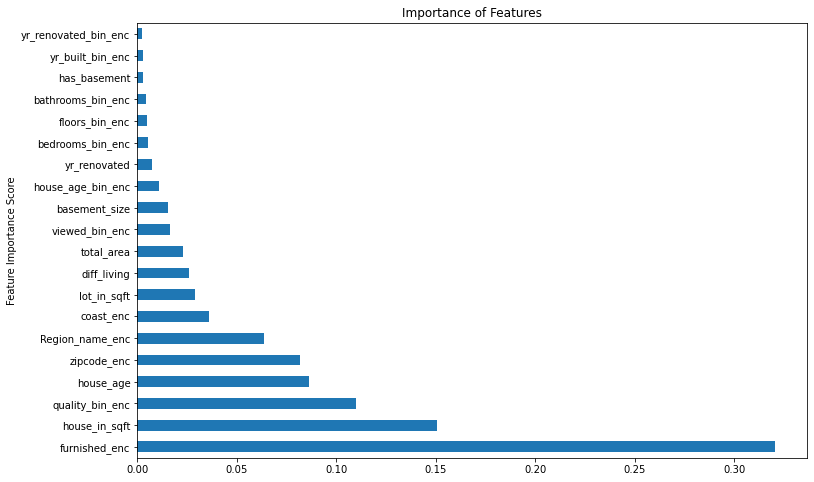

In [183]:
predictors=list(Xtemp)
model = DecisionTreeRegressor()
model.fit(Xtemp, ytemp)
plt.rcParams['figure.figsize']=[12,8]
feature_importance = pd.Series(model.feature_importances_, predictors).sort_values(ascending=False)
df=feature_importance.nlargest(20).plot(kind='barh', title='Importance of Features')
plt.ylabel('Feature Importance Score')

#plot Graph of feature importances for better visualisation
#feat_importances=pd.Series(model.feature_importances_,index=Xtemp.columns)
#feat_importances.nlargest(12).plot(kind='barh') # extracting top 12 features that contribute to predicting our target variable.

In [184]:
feature_importance

furnished_enc          0.320494
house_in_sqft          0.150699
quality_bin_enc        0.109925
house_age              0.086228
zipcode_enc            0.081477
Region_name_enc        0.063468
coast_enc              0.035910
lot_in_sqft            0.028905
diff_living            0.025712
total_area             0.022859
viewed_bin_enc         0.016406
basement_size          0.015222
house_age_bin_enc      0.010697
yr_renovated           0.007130
bedrooms_bin_enc       0.005549
floors_bin_enc         0.004847
bathrooms_bin_enc      0.004151
has_basement           0.002879
yr_built_bin_enc       0.002598
yr_renovated_bin_enc   0.002529
condition_bin_enc      0.002314
dtype: float64

We drop the last 3 columns, since those variable have the least feature_importance. We select the remaining variables for modeling.

In [185]:
col=['yr_renovated_bin_enc','yr_built_bin_enc','condition_bin_enc']
dropcols(col)

dropped column: yr_renovated_bin_enc
dropped column: yr_built_bin_enc
dropped column: condition_bin_enc


In [186]:
house.shape

(21613, 19)

In [187]:
house.columns

Index(['price', 'house_in_sqft', 'lot_in_sqft', 'basement_size',
       'yr_renovated', 'total_area', 'house_age', 'has_basement',
       'diff_living', 'bedrooms_bin_enc', 'bathrooms_bin_enc',
       'quality_bin_enc', 'floors_bin_enc', 'viewed_bin_enc',
       'house_age_bin_enc', 'zipcode_enc', 'Region_name_enc', 'furnished_enc',
       'coast_enc'],
      dtype='object')

At this point, we have completed our feature engineering. Now we can start building our models.

### Full sample target variable and independent variables

In [188]:
X= house.drop(['price'], axis=1)
y= house['price']

### Splitting into train and test data

In [189]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)

### Checking if the train-test split happened right

In [190]:
print ('SPLIT FOR INDEPENDENT VARIABLES')
print ('Shape of train data for independent variables:', X_train.shape)
print ('Shape of test data for independent variables:', X_test.shape)
print ('Percentage of data in train set for independent variables:', round((X_train.shape[0]/house.shape[0])*100),'%')
print ('Percentage of data in test set for independent variables:', round((X_test.shape[0]/house.shape[0])*100), '%')
print ('')  
print ('SPLIT FOR TARGET VARIABLE')
print ('Shape of train data for target variable price:', y_train.shape)
print ('Shape of test data for target variable price:', y_test.shape)
print ('Percentage of data in train set for target variable price:', round((y_train.shape[0]/house.shape[0])*100), '%')
print ('Percentage of data in test set for target variable price:', round((y_test.shape[0]/house.shape[0])*100), '%')

SPLIT FOR INDEPENDENT VARIABLES
Shape of train data for independent variables: (15129, 18)
Shape of test data for independent variables: (6484, 18)
Percentage of data in train set for independent variables: 70 %
Percentage of data in test set for independent variables: 30 %

SPLIT FOR TARGET VARIABLE
Shape of train data for target variable price: (15129,)
Shape of test data for target variable price: (6484,)
Percentage of data in train set for target variable price: 70 %
Percentage of data in test set for target variable price: 30 %


In [196]:
from pycaret.regression import *

### Model selection

In [201]:
# s = setup(X_train, target='price')

### Linear regression: Importing key libraries

In [202]:
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# Create a linear regressor

lr = LinearRegression()

# Train the model using train sets
lr.fit(X_train, y_train)

LinearRegression()

### Linear Regression: Model Prediction on train data

In [203]:
y_pred = lr.predict(X_train)

In [204]:
y_pred

array([407267.26406208, 451404.83186217, 481887.81219973, ...,
       372977.23729567, 367351.8061875 , 633386.51297598])

In [205]:
y_train

17639    310000
11482    297000
14834    340000
17221    269000
7112     565000
          ...  
5520     825000
3046     838000
20463    415250
18638    349950
2915     430000
Name: price, Length: 15129, dtype: int64

### Linear Regression: Model evaluation

In [206]:
print('r^2:', metrics.r2_score(y_train, y_pred))
print('Adjusted r^2:', 1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('Root mean squared error or RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('Mean absolute percentage error or MAPE:', metrics.mean_absolute_percentage_error(y_train, y_pred))

r^2: 0.6273528776391732
Adjusted r^2: 0.6269089565139254
Root mean squared error or RMSE: 220610.4038793652
Mean absolute percentage error or MAPE: 0.24434118200216937


In [207]:
r1    = metrics.r2_score(y_train, y_pred)
ar1   = 1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
RMSE1 = np.sqrt(metrics.mean_squared_error(y_train, y_pred))
MAPE1 = metrics.mean_absolute_percentage_error(y_train, y_pred)

### Linear regression: Visualising the differencce between actual and predicted prices

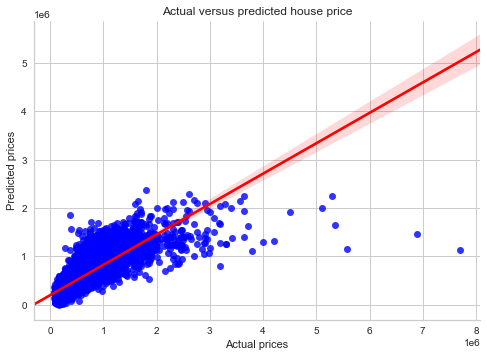

In [208]:
sns.regplot(x=y_train, y=y_pred, data=house, truncate=False, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.despine(left = False, bottom = False)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual versus predicted house price');

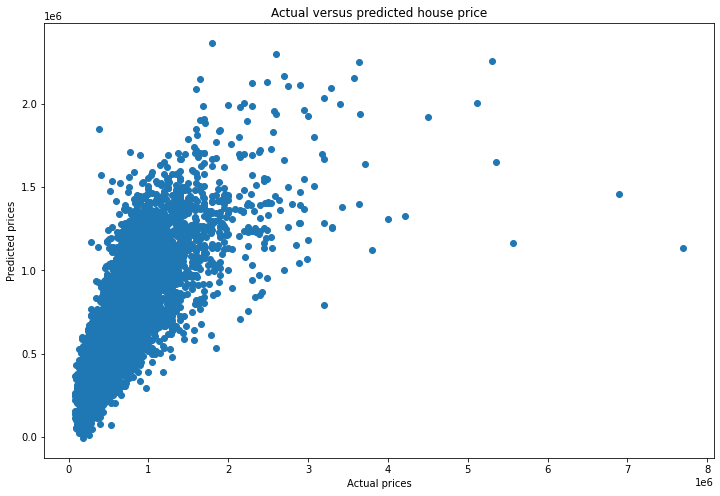

In [1163]:
plt.scatter(y_train, y_pred)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual versus predicted house price')
plt.show()

### Linear regression: Inspecting residuals

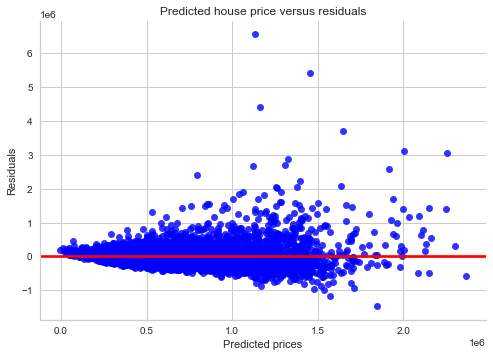

In [209]:
sns.regplot(x=y_pred, y=y_train-y_pred, data=house, truncate=False, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.despine(left = False, bottom = False)
plt.xlabel('Predicted prices')
plt.ylabel('Residuals')
plt.title('Predicted house price versus residuals')
plt.show();

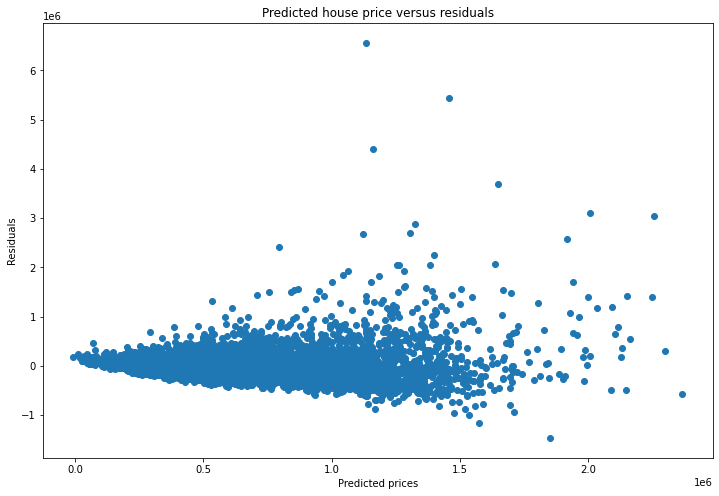

In [1165]:
plt.scatter(y_pred, y_train-y_pred)
plt.xlabel('Predicted prices')
plt.ylabel('Residuals')
plt.title('Predicted house price versus residuals')
plt.show()

### Linear regression: Checking normality of errors

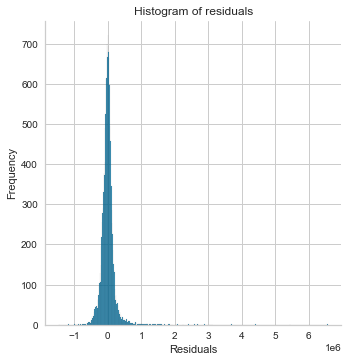

In [210]:
sns.displot(y_train-y_pred)
plt.title('Histogram of residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show();

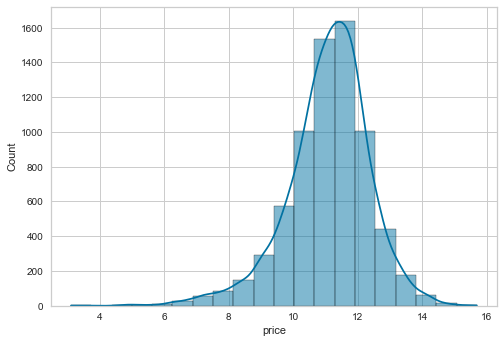

In [211]:
sns.histplot(np.log(y_train-y_pred), bins=20, kde=True);

### Linear regression: Model evaluation for OLS

In [212]:
# Predicting test data with the model
y_test_pred = lr.predict(X_test)

In [213]:
# Model evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('r^2:', acc_linreg)
print('Adjusted r^2:', 1 - (1-acc_linreg)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('Root mean squared error or RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('Mean absolute percentage error or MAPE:', metrics.mean_absolute_percentage_error(y_test, y_test_pred))

r^2: 0.6398587545623272
Adjusted r^2: 0.6388560411179531
Root mean squared error or RMSE: 228587.232399803
Mean absolute percentage error or MAPE: 0.24803115635728687


In [214]:
ar1t   = 1 - (1-acc_linreg)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
RMSE1t = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
MAPE1t = metrics.mean_absolute_percentage_error(y_test, y_test_pred)

In [215]:
### Models compared
models = pd.DataFrame({
    'Model': ['Linear regression'],
    'R-squared train': [r1*100],
    'R-squared test': [acc_linreg*100],
    'Adjusted r^2 train': [ar1*100],
    'Adjusted r^2 test': [ar1t*100],
    'RMSE train': [RMSE1],
    'RMSE test': [RMSE1t],
    'MAPE train': [MAPE1*100],
    'MAPE test': [MAPE1t*100]})
models.sort_values(by='R-squared test', ascending=False)

Model  R-squared train  R-squared test  Adjusted r^2 train  \
0  Linear regression        62.735288       63.985875           62.690896   

   Adjusted r^2 test    RMSE train     RMSE test  MAPE train  MAPE test  
0          63.885604 220610.403879 228587.232400   24.434118  24.803116

### Random Forest: Import Random Forest Regressor

In [216]:
# Import random forest regressor
from sklearn.ensemble import RandomForestRegressor

# Create a random forest regressor
rf = RandomForestRegressor()

# Train the model using train sets
rf.fit(X_train, y_train)

RandomForestRegressor()

### Random Forest: Model evaluation

In [217]:
# Model prediction on train set
y_pred = rf.predict(X_train)

In [218]:
# Model evaluation

print('r^2:', metrics.r2_score(y_train, y_pred))
print('Adjusted r^2:', 1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('Root mean squared error or RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('Mean absolute percentage error or MAPE:', metrics.mean_absolute_percentage_error(y_train, y_pred))

r^2: 0.9679937821144579
Adjusted r^2: 0.9679556542572811
Root mean squared error or RMSE: 64653.833797262436
Mean absolute percentage error or MAPE: 0.0663433410978171


In [219]:
r2    = metrics.r2_score(y_train, y_pred)
ar2   = 1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
RMSE2 = np.sqrt(metrics.mean_squared_error(y_train, y_pred))
MAPE2 = metrics.mean_absolute_percentage_error(y_train, y_pred)

### Random Forest: Visualising the difference between actual and predicted house prices

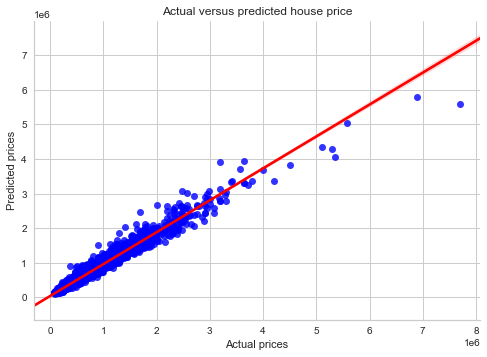

In [220]:
sns.regplot(x=y_train, y=y_pred, data=house, truncate=False, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.despine(left = False, bottom = False)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual versus predicted house price');

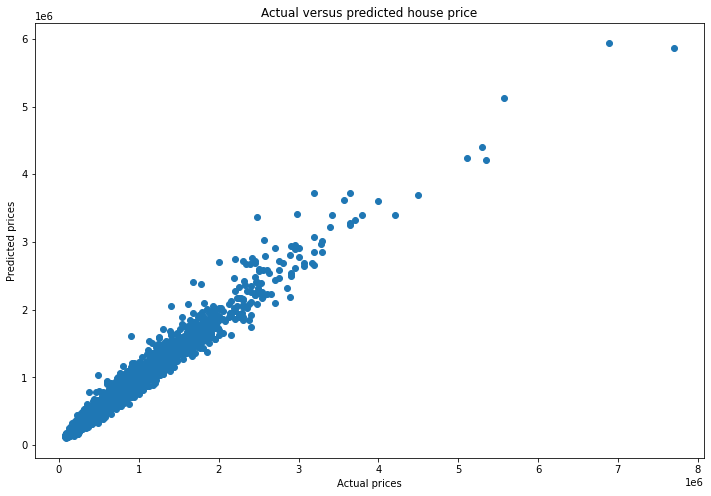

In [1178]:
plt.scatter(y_train, y_pred)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual versus predicted house price')
plt.show()

### Random Forest: Checking residuals

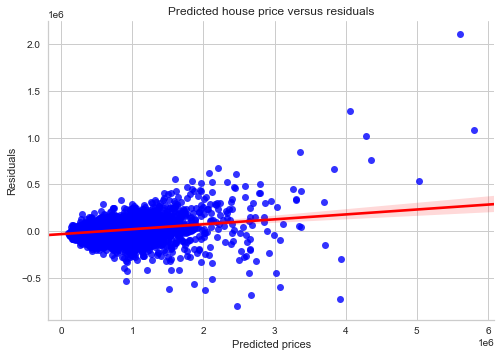

In [221]:
sns.regplot(x=y_pred, y=y_train-y_pred, data=house, truncate=False, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.despine(left = False, bottom = False)
plt.xlabel('Predicted prices')
plt.ylabel('Residuals')
plt.title('Predicted house price versus residuals')
plt.show();

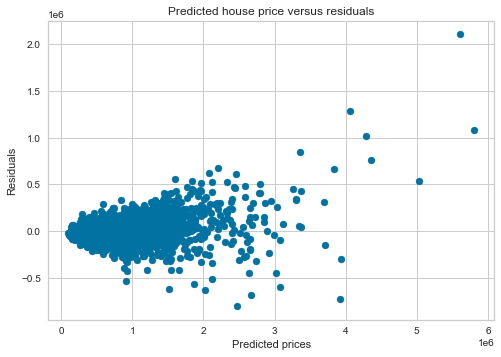

In [222]:
plt.scatter(y_pred, y_train-y_pred)
plt.xlabel('Predicted prices')
plt.ylabel('Residuals')
plt.title('Predicted house price versus residuals')
plt.show()

### Random forest: Checking normality of errors

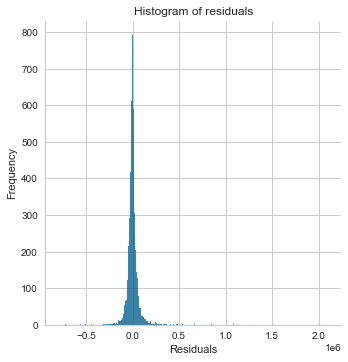

In [223]:
sns.displot(y_train-y_pred)
plt.title('Histogram of residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show();

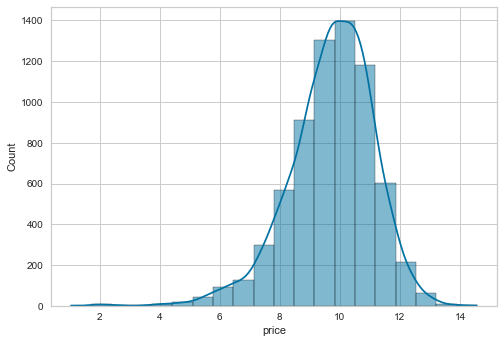

In [224]:
sns.histplot(np.log(y_train-y_pred), bins=20, kde=True);

### Random Forest: Predicting Test data with the model

In [225]:
y_test_pred = rf.predict(X_test)

In [226]:
y_test_pred

array([222184.26, 797327.8 , 492542.  , ..., 589085.  , 593699.34,
       530853.77])

### Random Forest: Model evaluation

In [227]:
acc_rf = metrics.r2_score(y_test, y_test_pred)

print('r^2:', acc_rf)
print('Adjusted r^2:', 1 - (1-acc_rf)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('Root mean squared error or RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('Mean absolute percentage error or MAPE:', metrics.mean_absolute_percentage_error(y_test, y_test_pred))

r^2: 0.7984933084335433
Adjusted r^2: 0.7979322689210613
Root mean squared error or RMSE: 170985.89057868265
Mean absolute percentage error or MAPE: 0.1728855612438296


In [228]:
ar2t   = 1 - (1-acc_rf)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
RMSE2t = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
MAPE2t = metrics.mean_absolute_percentage_error(y_test, y_test_pred)

In [229]:
### Models compared
models = pd.DataFrame({
    'Model': ['Linear regression', 'Random forest'],
    'R-squared train': [r1*100, r2*100],
    'R-squared test': [acc_linreg*100, acc_rf*100],
    'Adjusted r^2 train': [ar1*100, ar2*100],
    'Adjusted r^2 test': [ar1t*100, ar2t*100],
    'RMSE train': [RMSE1, RMSE2],
    'RMSE test': [RMSE1t, RMSE2t],
    'MAPE train': [MAPE1*100, MAPE2*100],
    'MAPE test': [MAPE1t*100, MAPE2t*100]})
models.sort_values(by='R-squared test', ascending=False)

Model  R-squared train  R-squared test  Adjusted r^2 train  \
1      Random forest        96.799378       79.849331           96.795565   
0  Linear regression        62.735288       63.985875           62.690896   

   Adjusted r^2 test    RMSE train     RMSE test  MAPE train  MAPE test  
1          79.793227  64653.833797 170985.890579    6.634334  17.288556  
0          63.885604 220610.403879 228587.232400   24.434118  24.803116

In [230]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   price              21613 non-null  int64   
 1   house_in_sqft      21613 non-null  float64 
 2   lot_in_sqft        21613 non-null  float64 
 3   basement_size      21613 non-null  float64 
 4   yr_renovated       21613 non-null  int64   
 5   total_area         21613 non-null  float64 
 6   house_age          21613 non-null  int32   
 7   has_basement       21613 non-null  int32   
 8   diff_living        21613 non-null  float64 
 9   bedrooms_bin_enc   21613 non-null  category
 10  bathrooms_bin_enc  21613 non-null  category
 11  quality_bin_enc    21613 non-null  float64 
 12  floors_bin_enc     21613 non-null  category
 13  viewed_bin_enc     21613 non-null  category
 14  house_age_bin_enc  21613 non-null  category
 15  zipcode_enc        21613 non-null  float64 
 16  Regi

### XGBoost: Import XGBoost regressor

In [231]:
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# We'll make this on a copy

# Make copy of dataset
house3 = house.copy()

# Splitting data
X1= house3.drop(['price'], axis=1)
y1= house3['price']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=5)

# one-hot encode the categorical features
cat_attribs = ['bedrooms_bin_enc', 'bathrooms_bin_enc', 'floors_bin_enc', 'viewed_bin_enc', 'house_age_bin_enc']
full_pipeline = ColumnTransformer([('cat', OneHotEncoder(handle_unknown='ignore'), cat_attribs)], remainder='passthrough')

encoder = full_pipeline.fit(X1_train)
X1_train = encoder.transform(X1_train)
X1_test = encoder.transform(X1_test)

# Create an XGBoost regressor
xreg = XGBRegressor()

# Train the model using train sets
xreg.fit(X1_train, y1_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

### XGBoost Model evaluation

In [232]:
# Model prediction on train data
y_pred = xreg.predict(X1_train)

In [233]:
#Model evaluation
print('r^2:', metrics.r2_score(y1_train, y_pred))
print('Adjusted r^2:', 1 - (1-metrics.r2_score(y1_train, y_pred))*(len(y1_train)-1)/(len(y1_train)-X1_train.shape[1]-1))
print('Root mean squared error or RMSE:', np.sqrt(metrics.mean_squared_error(y1_train, y_pred)))
print('Mean absolute percentage error or MAPE:', metrics.mean_absolute_percentage_error(y1_train, y_pred))

r^2: 0.9404692782499442
Adjusted r^2: 0.9403312291370275
Root mean squared error or RMSE: 88175.44857718151
Mean absolute percentage error or MAPE: 0.1293323960730077


In [234]:
r3    = metrics.r2_score(y1_train, y_pred)
ar3   = 1 - (1-metrics.r2_score(y1_train, y_pred))*(len(y1_train)-1)/(len(y1_train)-X_train.shape[1]-1)
RMSE3 = np.sqrt(metrics.mean_squared_error(y1_train, y_pred))
MAPE3 = metrics.mean_absolute_percentage_error(y1_train, y_pred)

### XG Boost: Visualising the difference between actual and predicted prices

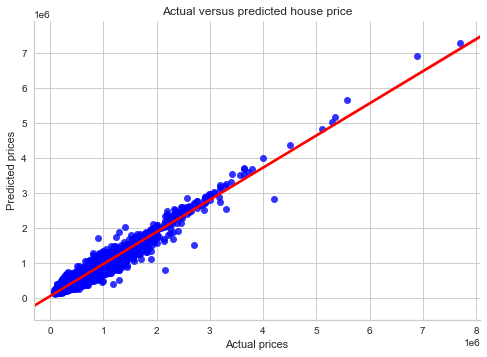

In [235]:
sns.regplot(x=y1_train, y=y_pred, data=house, truncate=False, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.despine(left = False, bottom = False)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual versus predicted house price');

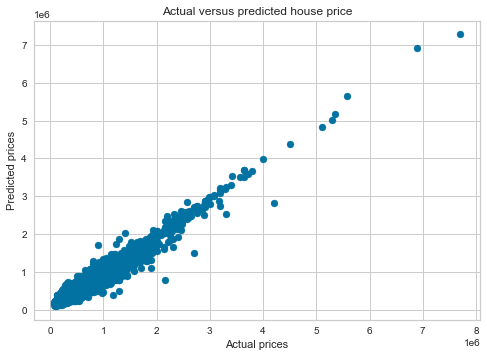

In [236]:
plt.scatter(y1_train, y_pred)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual versus predicted house price')
plt.show()

### XGBoost: Checking residuals

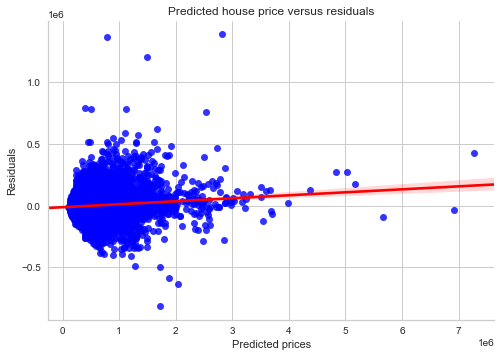

In [237]:
sns.regplot(x=y_pred, y=y1_train-y_pred, data=house, truncate=False, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.despine(left = False, bottom = False)
plt.xlabel('Predicted prices')
plt.ylabel('Residuals')
plt.title('Predicted house price versus residuals')
plt.show();

### XGBoost: Checking normality of errors

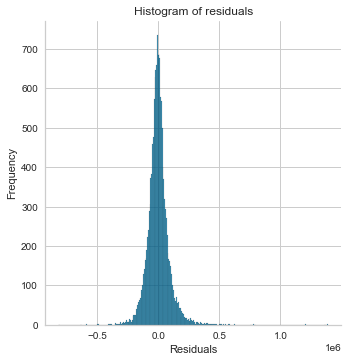

In [238]:
sns.displot(y1_train-y_pred)
plt.title('Histogram of residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show();

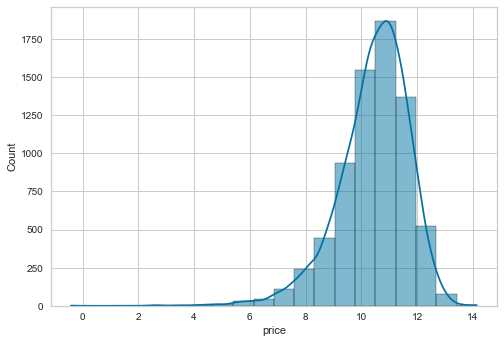

In [239]:
sns.histplot(np.log(y1_train-y_pred), bins=20, kde=True);

### XGBoost: Predicting test data with the model

In [240]:
y_test_pred = xreg.predict(X1_test)

In [241]:
y_test_pred

array([220115.25, 675279.9 , 532188.56, ..., 549291.44, 612289.1 ,
       495391.94], dtype=float32)

In [242]:
# Model evaluation
acc_xgb = metrics.r2_score(y1_test, y_test_pred)

print('r^2:', acc_xgb)
print('Adjusted r^2:', 1 - (1-acc_xgb)*(len(y1_test)-1)/(len(y1_test)-X1_test.shape[1]-1))
print('Root mean squared error or RMSE:', np.sqrt(metrics.mean_squared_error(y1_test, y_test_pred)))
print('Mean absolute percentage error or MAPE:', metrics.mean_absolute_percentage_error(y1_test, y_test_pred))

r^2: 0.8081558686340758
Adjusted r^2: 0.8071145310723812
Root mean squared error or RMSE: 166836.01106931968
Mean absolute percentage error or MAPE: 0.17678435645333032


In [243]:
ar3t   = 1 - (1-acc_xgb)*(len(y1_test)-1)/(len(y1_test)-X1_test.shape[1]-1)
RMSE3t = np.sqrt(metrics.mean_squared_error(y1_test, y_test_pred))
MAPE3t = metrics.mean_absolute_percentage_error(y1_test, y_test_pred)

In [244]:
### Models compared
models = pd.DataFrame({
    'Model': ['Linear regression', 'Random forest', 'XGBoost'],
    'R-squared train': [r1*100, r2*100, r3*100],
    'R-squared test': [acc_linreg*100, acc_rf*100, acc_xgb*100],
    'Adjusted r^2 train': [ar1*100, ar2*100, ar3*100],
    'Adjusted r^2 test': [ar1t*100, ar2t*100, ar3t*100],
    'RMSE train': [RMSE1, RMSE2, RMSE3],
    'RMSE test': [RMSE1t, RMSE2t, RMSE3t],
    'MAPE train': [MAPE1*100, MAPE2*100, MAPE3*100],
    'MAPE test': [MAPE1t*100, MAPE2t*100, MAPE3t*100]})
models.sort_values(by='R-squared test', ascending=False)

Model  R-squared train  R-squared test  Adjusted r^2 train  \
2            XGBoost        94.046928       80.815587           94.039836   
1      Random forest        96.799378       79.849331           96.795565   
0  Linear regression        62.735288       63.985875           62.690896   

   Adjusted r^2 test    RMSE train     RMSE test  MAPE train  MAPE test  
2          80.711453  88175.448577 166836.011069   12.933240  17.678436  
1          79.793227  64653.833797 170985.890579    6.634334  17.288556  
0          63.885604 220610.403879 228587.232400   24.434118  24.803116

In [245]:
### Models compared
models = pd.DataFrame({
    'Model': ['Linear regression', 'Random forest', 'XGBoost'],
    'R-squared test': [acc_linreg*100, acc_rf*100, acc_xgb*100]})
models.sort_values(by='R-squared test', ascending=False)

Model  R-squared test
2            XGBoost       80.815587
1      Random forest       79.849331
0  Linear regression       63.985875

### Decision tree: Import decision tree regressor

In [246]:
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regressor
dt = DecisionTreeRegressor()

# Train the model using train sets
dt.fit(X_train, y_train)

DecisionTreeRegressor()

### Decision tree: Model evaluation

In [247]:
# Model prediction on train set
y_pred = dt.predict(X_train)

In [248]:
# Model evaluation

print('r^2:', metrics.r2_score(y_train, y_pred))
print('Adjusted r^2:', 1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('Root mean squared error or RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('Mean absolute percentage error or MAPE:', metrics.mean_absolute_percentage_error(y_train, y_pred))

r^2: 0.999014565353217
Adjusted r^2: 0.9990133914403353
Root mean squared error or RMSE: 11344.647799122395
Mean absolute percentage error or MAPE: 0.002850832910236522


In [249]:
r4    = metrics.r2_score(y_train, y_pred)
ar4   = 1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
RMSE4 = np.sqrt(metrics.mean_squared_error(y_train, y_pred))
MAPE4 = metrics.mean_absolute_percentage_error(y_train, y_pred)

### Decision tree: Visualising the difference between actual and predicted house prices

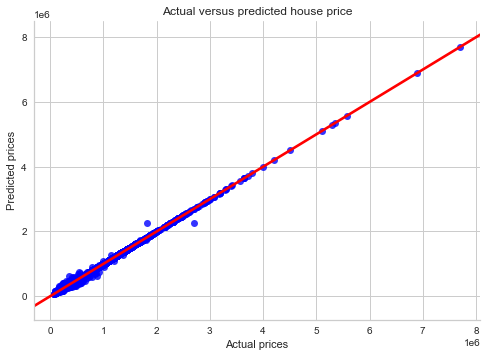

In [250]:
sns.regplot(x=y_train, y=y_pred, data=house, truncate=False, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.despine(left = False, bottom = False)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual versus predicted house price');

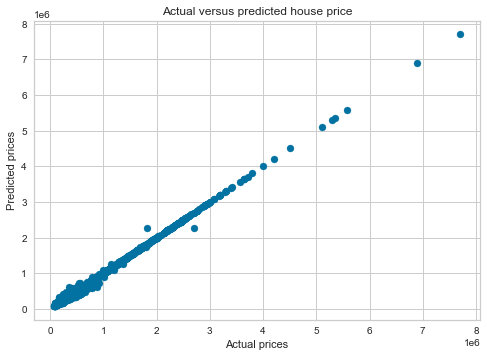

In [251]:
plt.scatter(y_train, y_pred)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual versus predicted house price')
plt.show()

### Decision tree: Checking residuals

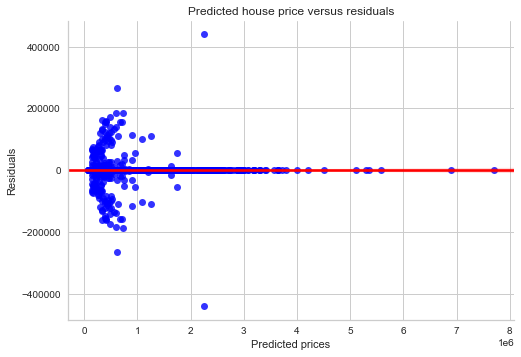

In [252]:
sns.regplot(x=y_pred, y=y_train-y_pred, data=house, truncate=False, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.despine(left = False, bottom = False)
plt.xlabel('Predicted prices')
plt.ylabel('Residuals')
plt.title('Predicted house price versus residuals')
plt.show();

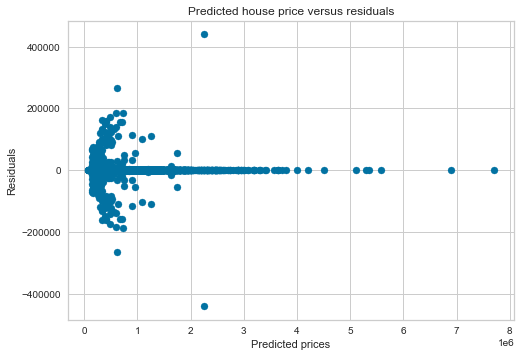

In [253]:
plt.scatter(y_pred, y_train-y_pred)
plt.xlabel('Predicted prices')
plt.ylabel('Residuals')
plt.title('Predicted house price versus residuals')
plt.show()

### Decision tree: Checking normality of errors

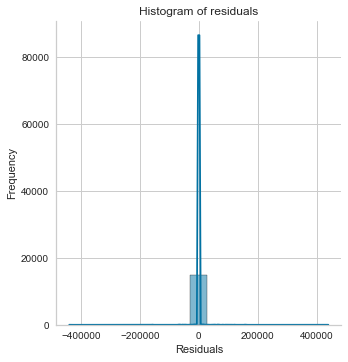

In [262]:
sns.displot(y_train-y_pred, kde=True)
plt.title('Histogram of residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show();

### Decision tree: Predicting test data with the model

In [267]:
y_test_pred = dt.predict(X_test)

In [271]:
y_test_pred

array([222000., 951000., 472000., ..., 681000., 607000., 482500.])

In [268]:
#Model evaluation
acc_dt = metrics.r2_score(y_test, y_test_pred)

print('r^2:', acc_dt)
print('Adjusted r^2:', 1 - (1-acc_dt)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('Root mean squared error or RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('Mean absolute percentage error or MAPE:', metrics.mean_absolute_percentage_error(y_test, y_test_pred))

r^2: 0.6619414073344729
Adjusted r^2: 0.6610001769140584
Root mean squared error or RMSE: 221468.2775681566
Mean absolute percentage error or MAPE: 0.23775298937362913


In [269]:
ar4t   = 1 - (1-acc_dt)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
RMSE4t = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
MAPE4t = metrics.mean_absolute_percentage_error(y_test, y_test_pred)

In [270]:
### Models compared
models = pd.DataFrame({
    'Model': ['Linear regression', 'Random forest', 'XGBoost', 'Decision tree'],
    'R-squared train': [r1*100, r2*100, r3*100, r4*100],
    'R-squared test': [acc_linreg*100, acc_rf*100, acc_xgb*100, acc_dt*100],
    'Adjusted r^2 train': [ar1*100, ar2*100, ar3*100, ar4*100],
    'Adjusted r^2 test': [ar1t*100, ar2t*100, ar3t*100, ar4t*100],
    'RMSE train': [RMSE1, RMSE2, RMSE3, RMSE4],
    'RMSE test': [RMSE1t, RMSE2t, RMSE3t, RMSE4t],
    'MAPE train': [MAPE1*100, MAPE2*100, MAPE3*100, MAPE4*100],
    'MAPE test': [MAPE1t*100, MAPE2t*100, MAPE3t*100, MAPE4t*100]})
models.sort_values(by='R-squared test', ascending=False)

Model  R-squared train  R-squared test  Adjusted r^2 train  \
2            XGBoost        94.046928       80.815587           94.039836   
1      Random forest        96.799378       79.849331           96.795565   
3      Decision tree        99.901457       66.194141           99.901339   
0  Linear regression        62.735288       63.985875           62.690896   

   Adjusted r^2 test    RMSE train     RMSE test  MAPE train  MAPE test  
2          80.711453  88175.448577 166836.011069   12.933240  17.678436  
1          79.793227  64653.833797 170985.890579    6.634334  17.288556  
3          66.100018  11344.647799 221468.277568    0.285083  23.775299  
0          63.885604 220610.403879 228587.232400   24.434118  24.803116

### Bagging: Import bagging regressor

In [272]:
from sklearn.ensemble import BaggingRegressor

In [273]:
# Create a bagging regressor
bgr = BaggingRegressor()

# Train the model using train sets
bgr.fit(X_train, y_train)

BaggingRegressor()

In [274]:
y_pred = bgr.predict(X_train)

# Model evaluation

print('r^2:', metrics.r2_score(y_train, y_pred))
print('Adjusted r^2:', 1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('Root mean squared error or RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('Mean absolute percentage error or MAPE:', metrics.mean_absolute_percentage_error(y_train, y_pred))

r^2: 0.9556919761529429
Adjusted r^2: 0.9556391935964077
Root mean squared error or RMSE: 76070.85440538604
Mean absolute percentage error or MAPE: 0.07456069887533028


In [275]:
r5    = metrics.r2_score(y_train, y_pred)
ar5   = 1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
RMSE5 = np.sqrt(metrics.mean_squared_error(y_train, y_pred))
MAPE5 = metrics.mean_absolute_percentage_error(y_train, y_pred)

### Bagging: Visualising the difference between actual and predicted house prices

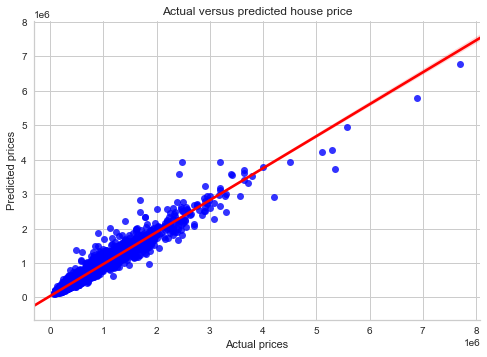

In [276]:
sns.regplot(x=y_train, y=y_pred, data=house, truncate=False, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.despine(left = False, bottom = False)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual versus predicted house price');

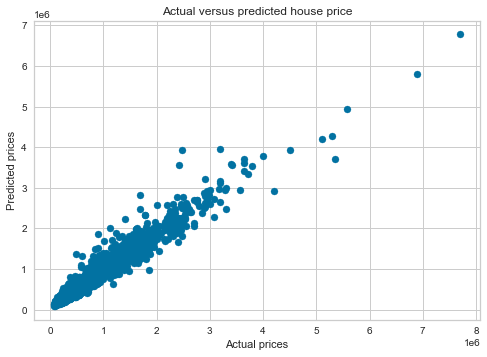

In [277]:
plt.scatter(y_train, y_pred)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual versus predicted house price')
plt.show()

### Bagging: Checking residuals

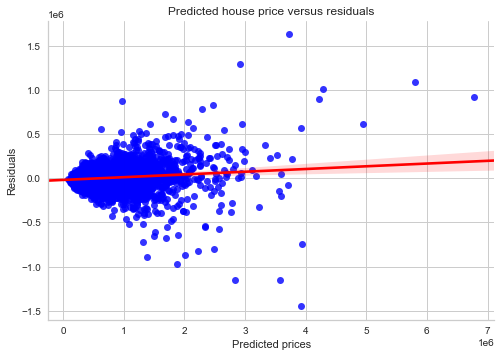

In [278]:
sns.regplot(x=y_pred, y=y_train-y_pred, data=house, truncate=False, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.despine(left = False, bottom = False)
plt.xlabel('Predicted prices')
plt.ylabel('Residuals')
plt.title('Predicted house price versus residuals')
plt.show();

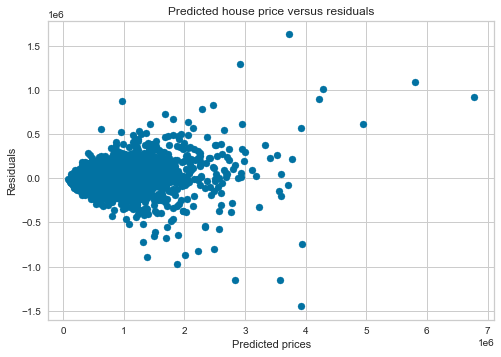

In [279]:
plt.scatter(y_pred, y_train-y_pred)
plt.xlabel('Predicted prices')
plt.ylabel('Residuals')
plt.title('Predicted house price versus residuals')
plt.show()

### Bagging: Checking for normality of errors

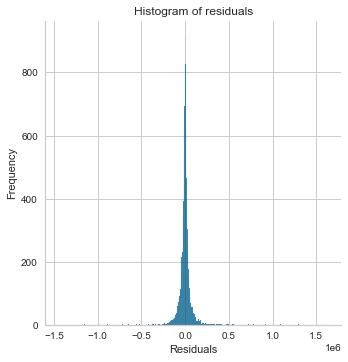

In [281]:
sns.displot(y_train-y_pred)
plt.title('Histogram of residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show();

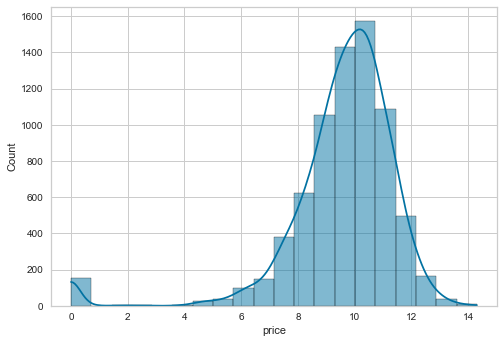

In [284]:
sns.histplot(np.log1p(y_train-y_pred), bins=20, kde=True);

### Bagging: Predicting test data with the model

In [286]:
y_test_pred = bgr.predict(X_test)

In [287]:
y_test_pred

array([238614.6, 724250. , 470750. , ..., 560190. , 623630. , 528470. ])

In [288]:
#Model evaluation
acc_bgr = metrics.r2_score(y_test, y_test_pred)

print('r^2:', acc_bgr)
print('Adjusted r^2:', 1 - (1-acc_bgr)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('Root mean squared error or RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('Mean absolute percentage error or MAPE:', metrics.mean_absolute_percentage_error(y_test, y_test_pred))

r^2: 0.7873225089918179
Adjusted r^2: 0.7867303674855306
Root mean squared error or RMSE: 175661.38496901823
Mean absolute percentage error or MAPE: 0.18082261094237834


In [289]:
ar5t   = 1 - (1-acc_bgr)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
RMSE5t = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
MAPE5t = metrics.mean_absolute_percentage_error(y_test, y_test_pred)

In [290]:
### Models compared
models = pd.DataFrame({
    'Model': ['Linear regression', 'Random forest', 'XGBoost', 'Decision tree', 'Bagging'],
    'R-squared train': [r1*100, r2*100, r3*100, r4*100, r5*100],
    'R-squared test': [acc_linreg*100, acc_rf*100, acc_xgb*100, acc_dt*100, acc_bgr*100],
    'Adjusted r^2 train': [ar1*100, ar2*100, ar3*100, ar4*100, ar5*100],
    'Adjusted r^2 test': [ar1t*100, ar2t*100, ar3t*100, ar4t*100, ar5t*100],
    'RMSE train': [RMSE1, RMSE2, RMSE3, RMSE4, RMSE5],
    'RMSE test': [RMSE1t, RMSE2t, RMSE3t, RMSE4t, RMSE5t],
    'MAPE train': [MAPE1*100, MAPE2*100, MAPE3*100, MAPE4*100, MAPE5*100],
    'MAPE test': [MAPE1t*100, MAPE2t*100, MAPE3t*100, MAPE4t*100, MAPE5t*100]})
models.sort_values(by='R-squared test', ascending=False)

Model  R-squared train  R-squared test  Adjusted r^2 train  \
2            XGBoost        94.046928       80.815587           94.039836   
1      Random forest        96.799378       79.849331           96.795565   
4            Bagging        95.569198       78.732251           95.563919   
3      Decision tree        99.901457       66.194141           99.901339   
0  Linear regression        62.735288       63.985875           62.690896   

   Adjusted r^2 test    RMSE train     RMSE test  MAPE train  MAPE test  
2          80.711453  88175.448577 166836.011069   12.933240  17.678436  
1          79.793227  64653.833797 170985.890579    6.634334  17.288556  
4          78.673037  76070.854405 175661.384969    7.456070  18.082261  
3          66.100018  11344.647799 221468.277568    0.285083  23.775299  
0          63.885604 220610.403879 228587.232400   24.434118  24.803116

### Gradient Boost: Import Gradient Boost Regressor

In [291]:
from sklearn.ensemble import GradientBoostingRegressor

In [292]:
# Create a gradient boost regressor
gbr = GradientBoostingRegressor(n_estimators=50)

# Train the model using train sets
gbr.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=50)

In [293]:
# Model prediction on train set
y_pred = gbr.predict(X_train)

In [294]:
# Model evaluation

print('r^2:', metrics.r2_score(y_train, y_pred))
print('Adjusted r^2:', 1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('Root mean squared error or RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('Mean absolute percentage error or MAPE:', metrics.mean_absolute_percentage_error(y_train, y_pred))

r^2: 0.7874810140823862
Adjusted r^2: 0.7872278478516439
Root mean squared error or RMSE: 166600.37369182028
Mean absolute percentage error or MAPE: 0.20453600225516583


In [295]:
r6    = metrics.r2_score(y_train, y_pred)
ar6   = 1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
RMSE6 = np.sqrt(metrics.mean_squared_error(y_train, y_pred))
MAPE6 = metrics.mean_absolute_percentage_error(y_train, y_pred)

### Gradient Boost: Visualising the difference between actual and predicted house prices

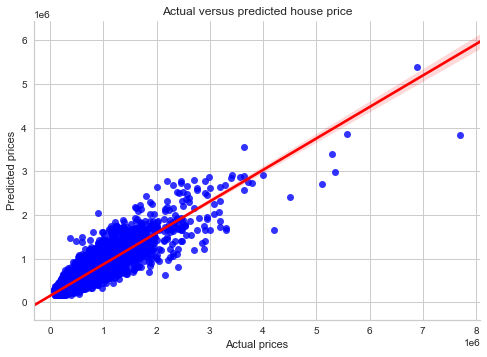

In [296]:
sns.regplot(x=y_train, y=y_pred, data=house, truncate=False, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.despine(left = False, bottom = False)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual versus predicted house price');

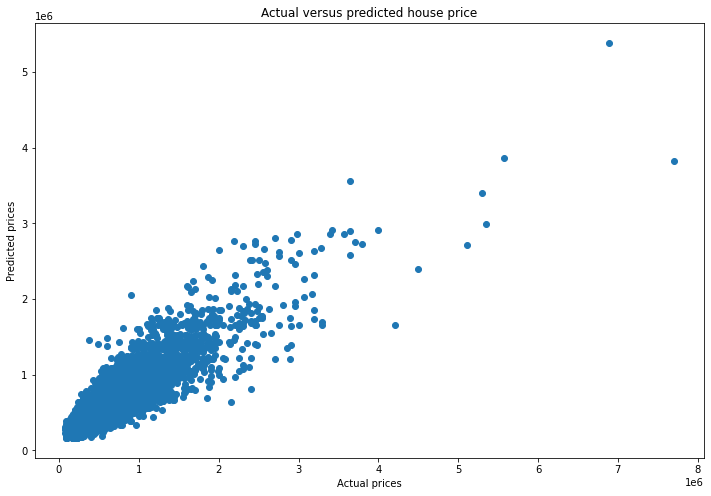

In [258]:
plt.scatter(y_train, y_pred)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual versus predicted house price')
plt.show()

### Gradient Boost: Checking residuals

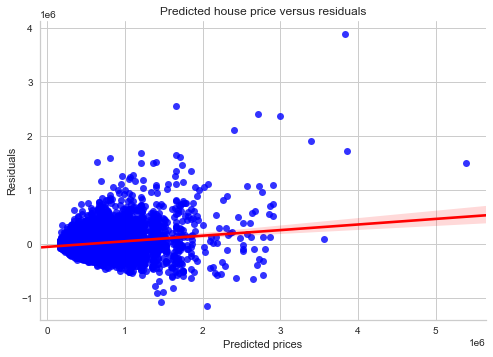

In [297]:
sns.regplot(x=y_pred, y=y_train-y_pred, data=house, truncate=False, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.despine(left = False, bottom = False)
plt.xlabel('Predicted prices')
plt.ylabel('Residuals')
plt.title('Predicted house price versus residuals')
plt.show();

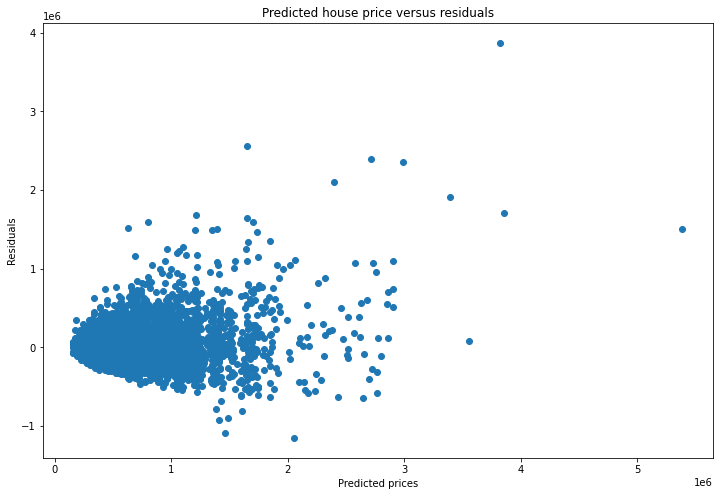

In [259]:
plt.scatter(y_pred, y_train-y_pred)
plt.xlabel('Predicted prices')
plt.ylabel('Residuals')
plt.title('Predicted house price versus residuals')
plt.show()

### Gradient Boost: Checking for normality of errors

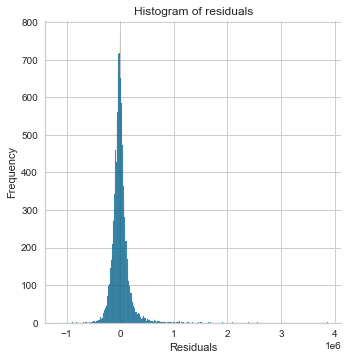

In [298]:
sns.displot(y_train-y_pred)
plt.title('Histogram of residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show();

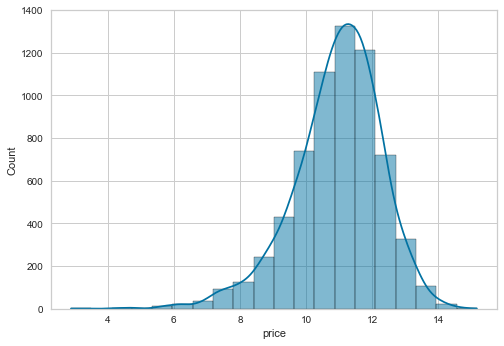

In [299]:
sns.histplot(np.log1p(y_train-y_pred), bins=20, kde=True);

### Gradient Boost: Predicting test data with the model

In [301]:
y_test_pred = gbr.predict(X_test)

In [302]:
y_test_pred

array([247906.40931035, 700787.48633888, 564975.14307358, ...,
       544619.5001364 , 515162.9989759 , 635527.08772533])

In [303]:
#Model evaluation
acc_gbr = metrics.r2_score(y_test, y_test_pred)

print('r^2:', acc_gbr)
print('Adjusted r^2:', 1 - (1-acc_gbr)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('Root mean squared error or RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('Mean absolute percentage error or MAPE:', metrics.mean_absolute_percentage_error(y_test, y_test_pred))

r^2: 0.761253443585104
Adjusted r^2: 0.7605887199941577
Root mean squared error or RMSE: 186116.16559844464
Mean absolute percentage error or MAPE: 0.2070572539931803


In [304]:
ar6t   = 1 - (1-acc_gbr)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
RMSE6t = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
MAPE6t = metrics.mean_absolute_percentage_error(y_test, y_test_pred)

In [305]:
### Models compared
models = pd.DataFrame({
    'Model': ['Linear regression', 'Random forest', 'XGBoost', 'Decision tree', 'Bagging', 'Gradient boost'],
    'R-squared train': [r1*100, r2*100, r3*100, r4*100, r5*100, r6*100],
    'R-squared test': [acc_linreg*100, acc_rf*100, acc_xgb*100, acc_dt*100, acc_bgr*100, acc_gbr*100],
    'Adjusted r^2 train': [ar1*100, ar2*100, ar3*100, ar4*100, ar5*100, ar6*100, ],
    'Adjusted r^2 test': [ar1t*100, ar2t*100, ar3t*100, ar4t*100, ar5t*100, ar6t*100],
    'RMSE train': [RMSE1, RMSE2, RMSE3, RMSE4, RMSE5, RMSE6],
    'RMSE test': [RMSE1t, RMSE2t, RMSE3t, RMSE4t, RMSE5t, RMSE6t],
    'MAPE train': [MAPE1*100, MAPE2*100, MAPE3*100, MAPE4*100, MAPE5*100, MAPE6*100],
    'MAPE test': [MAPE1t*100, MAPE2t*100, MAPE3t*100, MAPE4t*100, MAPE5t*100, MAPE6t*100]})
models.sort_values(by='R-squared test', ascending=False)

Model  R-squared train  R-squared test  Adjusted r^2 train  \
2            XGBoost        94.046928       80.815587           94.039836   
1      Random forest        96.799378       79.849331           96.795565   
4            Bagging        95.569198       78.732251           95.563919   
5     Gradient boost        78.748101       76.125344           78.722785   
3      Decision tree        99.901457       66.194141           99.901339   
0  Linear regression        62.735288       63.985875           62.690896   

   Adjusted r^2 test    RMSE train     RMSE test  MAPE train  MAPE test  
2          80.711453  88175.448577 166836.011069   12.933240  17.678436  
1          79.793227  64653.833797 170985.890579    6.634334  17.288556  
4          78.673037  76070.854405 175661.384969    7.456070  18.082261  
5          76.058872 166600.373692 186116.165598   20.453600  20.705725  
3          66.100018  11344.647799 221468.277568    0.285083  23.775299  
0          63.885604 220610.403879 228587.232400   24.434118  24.803116

### Model comparison

In [306]:
models = pd.DataFrame({
    'Model': ['Linear regression', 'Random forest', 'XGBoost', 'Decision tree', 'Bagging', 'Gradient boost'],
    'R-squared score': [acc_linreg*100, acc_rf*100, acc_xgb*100, acc_dt*100, acc_bgr*100, acc_gbr*100,]})
models.sort_values(by='R-squared score', ascending=False)

Model  R-squared score
2            XGBoost        80.815587
1      Random forest        79.849331
4            Bagging        78.732251
5     Gradient boost        76.125344
3      Decision tree        66.194141
0  Linear regression        63.985875

### XGBoost: Tuned model

In [307]:
# Create an XGBoost regressor
xgbt = XGBRegressor(max_depth=7, n_estimators=1000, learning_rate=0.01, colsample_bytree=0.5, subsample=0.6)

# Train the model using train sets
xgbt.fit(X1_train, y1_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [308]:
# Model prediction on train set
y_pred = xgbt.predict(X1_train)

In [309]:
#Model evaluation
print('r^2:', metrics.r2_score(y1_train, y_pred))
print('Adjusted r^2:', 1 - (1-metrics.r2_score(y1_train, y_pred))*(len(y1_train)-1)/(len(y1_train)-X1_train.shape[1]-1))
print('Root mean squared error or RMSE:', np.sqrt(metrics.mean_squared_error(y1_train, y_pred)))
print('Mean absolute percentage error or MAPE:', metrics.mean_absolute_percentage_error(y1_train, y_pred))

r^2: 0.9137794464147787
Adjusted r^2: 0.9135795047613312
Root mean squared error or RMSE: 106116.39978410782
Mean absolute percentage error or MAPE: 0.1443156095718864


In [310]:
r7    = metrics.r2_score(y1_train, y_pred)
ar7   = 1 - (1-metrics.r2_score(y1_train, y_pred))*(len(y1_train)-1)/(len(y1_train)-X_train.shape[1]-1)
RMSE7 = np.sqrt(metrics.mean_squared_error(y1_train, y_pred))
MAPE7 = metrics.mean_absolute_percentage_error(y1_train, y_pred)

### XGBoost tuned: Visualising the difference between actual and predicted house prices

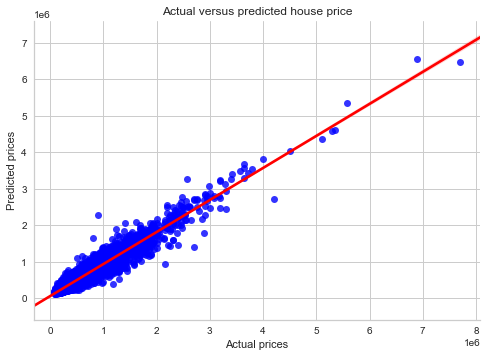

In [311]:
sns.regplot(x=y1_train, y=y_pred, data=house, truncate=False, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.despine(left = False, bottom = False)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual versus predicted house price');

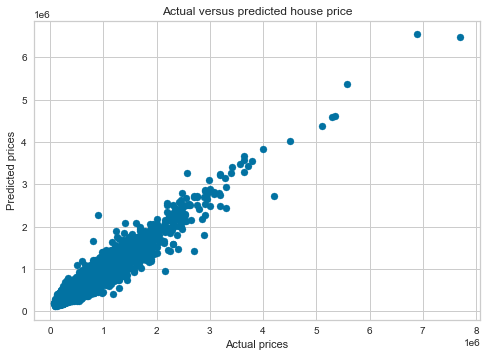

In [312]:
plt.scatter(y1_train, y_pred)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual versus predicted house price')
plt.show()

### XGBoost tuned: Checking residuals

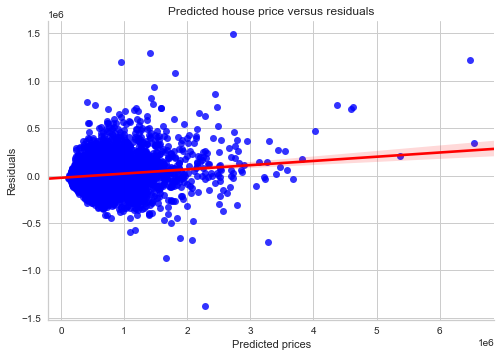

In [313]:
sns.regplot(x=y_pred, y=y1_train-y_pred, data=house, truncate=False, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.despine(left = False, bottom = False)
plt.xlabel('Predicted prices')
plt.ylabel('Residuals')
plt.title('Predicted house price versus residuals')
plt.show();

### XGBoost tuned: checking for normality of errors

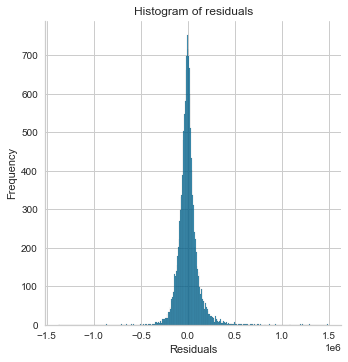

In [314]:
sns.displot(y1_train-y_pred)
plt.title('Histogram of residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show();

### XGBoost tuned: predicting the test data with the model

In [316]:
y_test_pred = xgbt.predict(X1_test)

In [317]:
y_test_pred

array([216000.98, 832719.3 , 515214.97, ..., 541880.06, 576510.3 ,
       539111.  ], dtype=float32)

In [318]:
# Model evaluation
acc_xgbt = metrics.r2_score(y1_test, y_test_pred)

print('r^2:', acc_xgbt)
print('Adjusted r^2:', 1 - (1-acc_xgbt)*(len(y1_test)-1)/(len(y1_test)-X1_test.shape[1]-1))
print('Root mean squared error or RMSE:', np.sqrt(metrics.mean_squared_error(y1_test, y_test_pred)))
print('Mean absolute percentage error or MAPE:', metrics.mean_absolute_percentage_error(y1_test, y_test_pred))

r^2: 0.8159721276027667
Adjusted r^2: 0.814973217005077
Root mean squared error or RMSE: 163401.98988329218
Mean absolute percentage error or MAPE: 0.1703578743816115


In [319]:
ar7t   = 1 - (1-acc_xgbt)*(len(y1_test)-1)/(len(y1_test)-X1_test.shape[1]-1)
RMSE7t = np.sqrt(metrics.mean_squared_error(y1_test, y_test_pred))
MAPE7t = metrics.mean_absolute_percentage_error(y1_test, y_test_pred)

### Model comparison

In [320]:
models = pd.DataFrame({
    'Model': ['Linear regression', 'Random forest', 'XGBoost', 'Decision tree', 'Bagging', 'Gradient boost', 'XGBoost tuned'],
    'R-squared train': [r1*100, r2*100, r3*100, r4*100, r5*100, r6*100, r7*100],
    'R-squared test': [acc_linreg*100, acc_rf*100, acc_xgb*100, acc_dt*100, acc_bgr*100, acc_gbr*100, acc_xgbt*100],
    'Adjusted r^2 train': [ar1*100, ar2*100, ar3*100, ar4*100, ar5*100, ar6*100, ar7*100],
    'Adjusted r^2 test': [ar1t*100, ar2t*100, ar3t*100, ar4t*100, ar5t*100, ar6t*100, ar7t*100],
    'RMSE train': [RMSE1, RMSE2, RMSE3, RMSE4, RMSE5, RMSE6, RMSE7],
    'RMSE test': [RMSE1t, RMSE2t, RMSE3t, RMSE4t, RMSE5t, RMSE6t, RMSE7t],
    'MAPE train': [MAPE1*100, MAPE2*100, MAPE3*100, MAPE4*100, MAPE5*100, MAPE6*100, MAPE7*100],
    'MAPE test': [MAPE1t*100, MAPE2t*100, MAPE3t*100, MAPE4t*100, MAPE5t*100, MAPE6t*100, MAPE7t*100]})
models.sort_values(by='R-squared test', ascending=False)

Model  R-squared train  R-squared test  Adjusted r^2 train  \
6      XGBoost tuned        91.377945       81.597213           91.367673   
2            XGBoost        94.046928       80.815587           94.039836   
1      Random forest        96.799378       79.849331           96.795565   
4            Bagging        95.569198       78.732251           95.563919   
5     Gradient boost        78.748101       76.125344           78.722785   
3      Decision tree        99.901457       66.194141           99.901339   
0  Linear regression        62.735288       63.985875           62.690896   

   Adjusted r^2 test    RMSE train     RMSE test  MAPE train  MAPE test  
6          81.497322 106116.399784 163401.989883   14.431561  17.035787  
2          80.711453  88175.448577 166836.011069   12.933240  17.678436  
1          79.793227  64653.833797 170985.890579    6.634334  17.288556  
4          78.673037  76070.854405 175661.384969    7.456070  18.082261  
5          76.058872 166600.373692 186116.165598   20.453600  20.705725  
3          66.100018  11344.647799 221468.277568    0.285083  23.775299  
0          63.885604 220610.403879 228587.232400   24.434118  24.803116

In [321]:
models = pd.DataFrame({
    'Model': ['Linear regression', 'Random forest', 'XGBoost', 'Decision tree', 'Bagging', 'Gradient boost', 'XGBoost tuned'],
    'R-squared score': [acc_linreg*100, acc_rf*100, acc_xgb*100, acc_dt*100, acc_bgr*100, acc_gbr*100, acc_xgbt*100]})
models.sort_values(by='R-squared score', ascending=False)

Model  R-squared score
6      XGBoost tuned        81.597213
2            XGBoost        80.815587
1      Random forest        79.849331
4            Bagging        78.732251
5     Gradient boost        76.125344
3      Decision tree        66.194141
0  Linear regression        63.985875

### Ridge: Importing Ridge

In [322]:
from sklearn.linear_model import Ridge

# Create a Ridge regressor
ridge = Ridge(alpha=.3)

# Train the model using train sets
ridge.fit(X_train, y_train)

Ridge(alpha=0.3)

In [323]:
# Model prediction on train set
y_pred = ridge.predict(X_train)

In [324]:
# Model evaluation

print('r^2:', metrics.r2_score(y_train, y_pred))
print('Adjusted r^2:', 1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('Root mean squared error or RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('Mean absolute percentage error or MAPE:', metrics.mean_absolute_percentage_error(y_train, y_pred))

r^2: 0.6273528774491531
Adjusted r^2: 0.6269089563236789
Root mean squared error or RMSE: 220610.403935612
Mean absolute percentage error or MAPE: 0.24434026267587278


In [325]:
r8    = metrics.r2_score(y_train, y_pred)
ar8   = 1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
RMSE8 = np.sqrt(metrics.mean_squared_error(y_train, y_pred))
MAPE8 = metrics.mean_absolute_percentage_error(y_train, y_pred)

### Ridge: Visualising the difference between actual and predicted prices

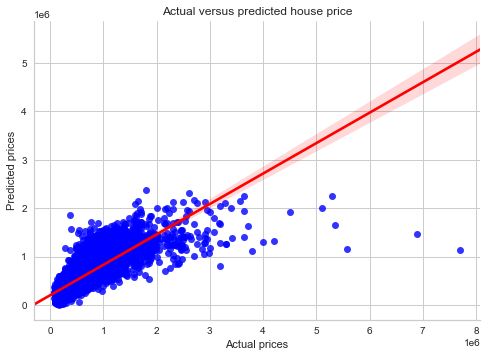

In [326]:
sns.regplot(x=y_train, y=y_pred, data=house, truncate=False, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.despine(left = False, bottom = False)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual versus predicted house price');

### Ridge: Checking residuals

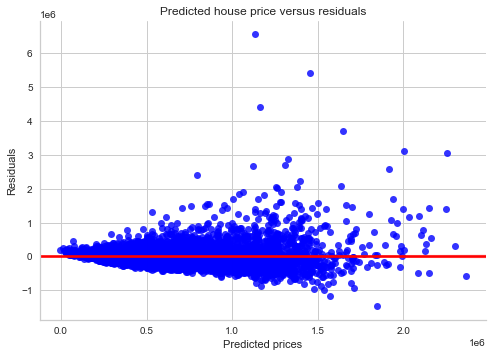

In [327]:
sns.regplot(x=y_pred, y=y_train-y_pred, data=house, truncate=False, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.despine(left = False, bottom = False)
plt.xlabel('Predicted prices')
plt.ylabel('Residuals')
plt.title('Predicted house price versus residuals')
plt.show();

### Ridge: Checking for normality of residuals

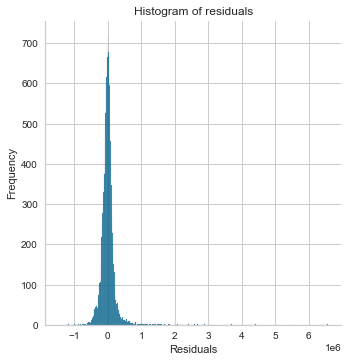

In [328]:
sns.displot(y_train-y_pred)
plt.title('Histogram of residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show();

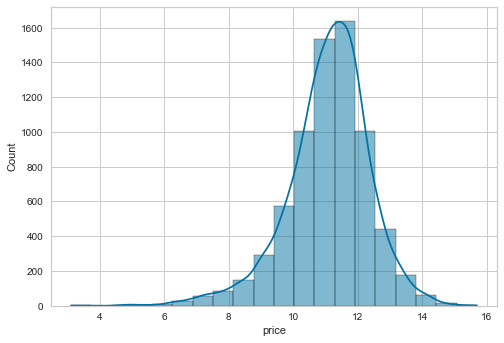

In [329]:
sns.histplot(np.log1p(y_train-y_pred), bins=20, kde=True);

### Predicting test data with the model

In [330]:
y_test_pred = ridge.predict(X_test)

In [331]:
y_test_pred

array([158676.50159505, 899494.5342832 , 624156.88719628, ...,
       582941.65528342, 487503.59980728, 527479.17679554])

In [334]:
# Model evaluation
acc_rid = metrics.r2_score(y_test, y_test_pred)

print('r^2:', acc_rid)
print('Adjusted r^2:', 1 - (1-acc_rid)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('Root mean squared error or RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('Mean absolute percentage error or MAPE:', metrics.mean_absolute_percentage_error(y_test, y_test_pred))

r^2: 0.6398583343857234
Adjusted r^2: 0.6388556197714841
Root mean squared error or RMSE: 228587.3657460667
Mean absolute percentage error or MAPE: 0.24803032230313385


In [335]:
ar8t   = 1 - (1-acc_rid)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
RMSE8t = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
MAPE8t = metrics.mean_absolute_percentage_error(y_test, y_test_pred)

In [336]:
#Comparing models

models = pd.DataFrame({
    'Model': ['Linear regression', 'Random forest', 'XGBoost', 'Decision tree', 'Bagging', 'Gradient boost', 'XGBoost tuned',
             'Ridge'],
    'R-squared train': [r1*100, r2*100, r3*100, r4*100, r5*100, r6*100, r7*100,
                       r8*100],
    'R-squared test': [acc_linreg*100, acc_rf*100, acc_xgb*100, acc_dt*100, acc_bgr*100, acc_gbr*100, acc_xgbt*100,
                      acc_rid*100],
    'Adjusted r^2 train': [ar1*100, ar2*100, ar3*100, ar4*100, ar5*100, ar6*100, ar7*100,
                          ar8*100],
    'Adjusted r^2 test': [ar1t*100, ar2t*100, ar3t*100, ar4t*100, ar5t*100, ar6t*100, ar7t*100,
                         ar8t*100],
    'RMSE train': [RMSE1, RMSE2, RMSE3, RMSE4, RMSE5, RMSE6, RMSE7,
                  RMSE8],
    'RMSE test': [RMSE1t, RMSE2t, RMSE3t, RMSE4t, RMSE5t, RMSE6t, RMSE7t,
                 RMSE8t],
    'MAPE train': [MAPE1*100, MAPE2*100, MAPE3*100, MAPE4*100, MAPE5*100, MAPE6*100, MAPE7*100,
                  MAPE8*100],
    'MAPE test': [MAPE1t*100, MAPE2t*100, MAPE3t*100, MAPE4t*100, MAPE5t*100, MAPE6t*100, MAPE7t*100,
                 MAPE8t*100]})
models.sort_values(by='R-squared test', ascending=False)

Model  R-squared train  R-squared test  Adjusted r^2 train  \
6      XGBoost tuned        91.377945       81.597213           91.367673   
2            XGBoost        94.046928       80.815587           94.039836   
1      Random forest        96.799378       79.849331           96.795565   
4            Bagging        95.569198       78.732251           95.563919   
5     Gradient boost        78.748101       76.125344           78.722785   
3      Decision tree        99.901457       66.194141           99.901339   
0  Linear regression        62.735288       63.985875           62.690896   
7              Ridge        62.735288       63.985833           62.690896   

   Adjusted r^2 test    RMSE train     RMSE test  MAPE train  MAPE test  
6          81.497322 106116.399784 163401.989883   14.431561  17.035787  
2          80.711453  88175.448577 166836.011069   12.933240  17.678436  
1          79.793227  64653.833797 170985.890579    6.634334  17.288556  
4          78.673037  76070.854405 175661.384969    7.456070  18.082261  
5          76.058872 166600.373692 186116.165598   20.453600  20.705725  
3          66.100018  11344.647799 221468.277568    0.285083  23.775299  
0          63.885604 220610.403879 228587.232400   24.434118  24.803116  
7          63.885562 220610.403936 228587.365746   24.434026  24.803032

### Lasso: Importing lasso

In [337]:
from sklearn.linear_model import Lasso

In [338]:
# Create a Lasso regressor
lasso = Lasso(alpha=.1)

# Train the model using train sets
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [339]:
# Model prediction on train set
y_pred = lasso.predict(X_train)

In [340]:
# Model evaluation

print('r^2:', metrics.r2_score(y_train, y_pred))
print('Adjusted r^2:', 1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('Root mean squared error or RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('Mean absolute percentage error or MAPE:', metrics.mean_absolute_percentage_error(y_train, y_pred))

r^2: 0.6273528776381445
Adjusted r^2: 0.6269089565128954
Root mean squared error or RMSE: 220610.4038796697
Mean absolute percentage error or MAPE: 0.24434111325199256


In [341]:
r9    = metrics.r2_score(y_train, y_pred)
ar9   = 1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
RMSE9 = np.sqrt(metrics.mean_squared_error(y_train, y_pred))
MAPE9 = metrics.mean_absolute_percentage_error(y_train, y_pred)

### Lasso: Visualising the difference between actual and predicted prices

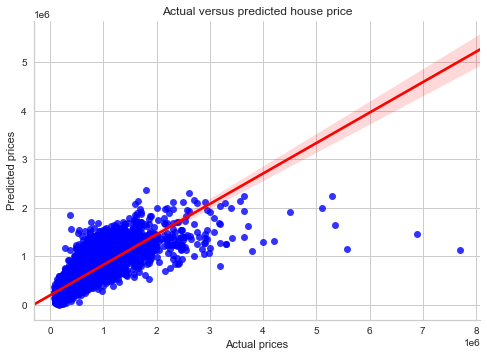

In [342]:
sns.regplot(x=y_train, y=y_pred, data=house, truncate=False, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.despine(left = False, bottom = False)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual versus predicted house price');

### Lasso: Checking residuals

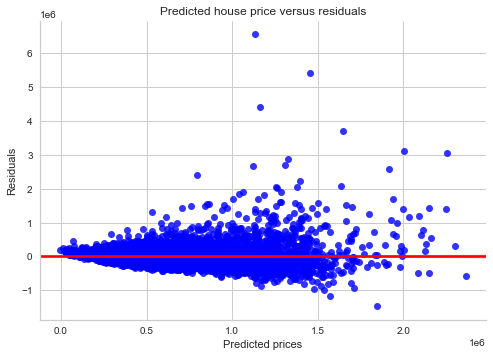

In [343]:
sns.regplot(x=y_pred, y=y_train-y_pred, data=house, truncate=False, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.despine(left = False, bottom = False)
plt.xlabel('Predicted prices')
plt.ylabel('Residuals')
plt.title('Predicted house price versus residuals')
plt.show();

### Lasso: Checking for normality of errors

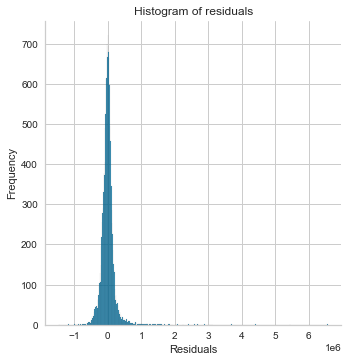

In [344]:
sns.displot(y_train-y_pred)
plt.title('Histogram of residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show();

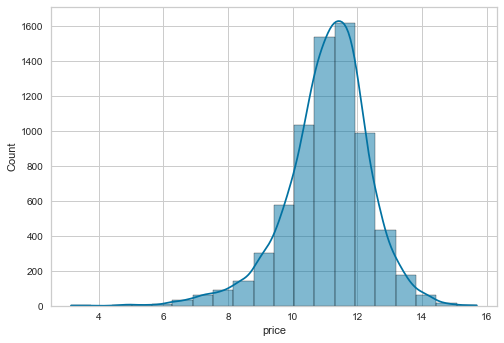

In [345]:
sns.histplot(np.log1p(y_train-y_pred), bins=20, kde=True);

### Lasso: Predicting test data with the model

In [346]:
y_test_pred =lasso.predict(X_test)

In [347]:
y_test_pred

array([158674.19103529, 899508.95743257, 624154.14226113, ...,
       582939.18304715, 487500.008163  , 527472.90340319])

In [348]:
#Model evaluation
acc_las = metrics.r2_score(y_test, y_test_pred)

print('r^2:', acc_las)
print('Adjusted r^2:', 1 - (1-acc_las)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('Root mean squared error or RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('Mean absolute percentage error or MAPE:', metrics.mean_absolute_percentage_error(y_test, y_test_pred))

r^2: 0.639858724122464
Adjusted r^2: 0.6388560105933386
Root mean squared error or RMSE: 228587.24206012936
Mean absolute percentage error or MAPE: 0.24803109365612538


In [349]:
ar9t   = 1 - (1-acc_las)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
RMSE9t = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
MAPE9t = metrics.mean_absolute_percentage_error(y_test, y_test_pred)

In [351]:
# Models compared

models = pd.DataFrame({
    'Model': ['Linear regression', 'Random forest', 'XGBoost', 'Decision tree', 'Bagging', 'Gradient boost', 'XGBoost tuned',
             'Ridge', 'Lasso'],
    'R-squared train': [r1*100, r2*100, r3*100, r4*100, r5*100, r6*100, r7*100,
                       r8*100, r9*100],
    'R-squared test': [acc_linreg*100, acc_rf*100, acc_xgb*100, acc_dt*100, acc_bgr*100, acc_gbr*100, acc_xgbt*100,
                      acc_rid*100, acc_las*100],
    'Adjusted r^2 train': [ar1*100, ar2*100, ar3*100, ar4*100, ar5*100, ar6*100, ar7*100,
                          ar8*100, ar9*100],
    'Adjusted r^2 test': [ar1t*100, ar2t*100, ar3t*100, ar4t*100, ar5t*100, ar6t*100, ar7t*100,
                         ar8t*100, ar9t*100],
    'RMSE train': [RMSE1, RMSE2, RMSE3, RMSE4, RMSE5, RMSE6, RMSE7,
                  RMSE8, RMSE9],
    'RMSE test': [RMSE1t, RMSE2t, RMSE3t, RMSE4t, RMSE5t, RMSE6t, RMSE7t,
                 RMSE8t, RMSE9t],
    'MAPE train': [MAPE1*100, MAPE2*100, MAPE3*100, MAPE4*100, MAPE5*100, MAPE6*100, MAPE7*100,
                  MAPE8*100, MAPE9*100],
    'MAPE test': [MAPE1t*100, MAPE2t*100, MAPE3t*100, MAPE4t*100, MAPE5t*100, MAPE6t*100, MAPE7t*100,
                 MAPE8t*100, MAPE9t*100]})
models.sort_values(by='R-squared test', ascending=False)

Model  R-squared train  R-squared test  Adjusted r^2 train  \
6      XGBoost tuned        91.377945       81.597213           91.367673   
2            XGBoost        94.046928       80.815587           94.039836   
1      Random forest        96.799378       79.849331           96.795565   
4            Bagging        95.569198       78.732251           95.563919   
5     Gradient boost        78.748101       76.125344           78.722785   
3      Decision tree        99.901457       66.194141           99.901339   
0  Linear regression        62.735288       63.985875           62.690896   
8              Lasso        62.735288       63.985872           62.690896   
7              Ridge        62.735288       63.985833           62.690896   

   Adjusted r^2 test    RMSE train     RMSE test  MAPE train  MAPE test  
6          81.497322 106116.399784 163401.989883   14.431561  17.035787  
2          80.711453  88175.448577 166836.011069   12.933240  17.678436  
1          79.793227  64653.833797 170985.890579    6.634334  17.288556  
4          78.673037  76070.854405 175661.384969    7.456070  18.082261  
5          76.058872 166600.373692 186116.165598   20.453600  20.705725  
3          66.100018  11344.647799 221468.277568    0.285083  23.775299  
0          63.885604 220610.403879 228587.232400   24.434118  24.803116  
8          63.885601 220610.403880 228587.242060   24.434111  24.803109  
7          63.885562 220610.403936 228587.365746   24.434026  24.803032

### Support vector regressor: Importing SVR

In [352]:
from sklearn.svm import SVR

In [353]:
# Create an SVR regressor
svr = SVR()

# Train the model using train sets
svr.fit(X_train, y_train)

SVR()

In [354]:
# Model prediction on train set
y_pred = svr.predict(X_train)

In [355]:
# Model evaluation

print('r^2:', metrics.r2_score(y_train, y_pred))
print('Adjusted r^2:', 1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('Root mean squared error or RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('Mean absolute percentage error or MAPE:', metrics.mean_absolute_percentage_error(y_train, y_pred))

r^2: -0.05585952235188274
Adjusted r^2: -0.05711732985700069
Root mean squared error or RMSE: 371347.2176333003
Mean absolute percentage error or MAPE: 0.42459050529749787


In [356]:
r10    = metrics.r2_score(y_train, y_pred)
ar10   = 1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
RMSE10 = np.sqrt(metrics.mean_squared_error(y_train, y_pred))
MAPE10 = metrics.mean_absolute_percentage_error(y_train, y_pred)

### SVR: Visualising the difference between actual and predicted house prices

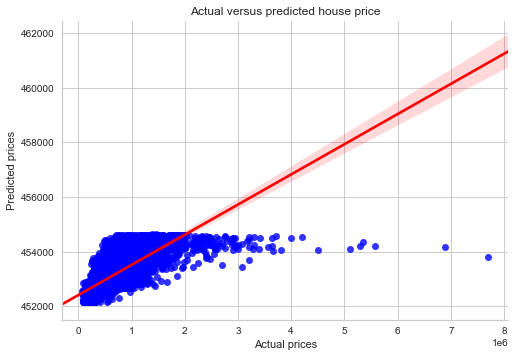

In [357]:
sns.regplot(x=y_train, y=y_pred, data=house, truncate=False, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.despine(left = False, bottom = False)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual versus predicted house price');

### SVR: Checking residuals

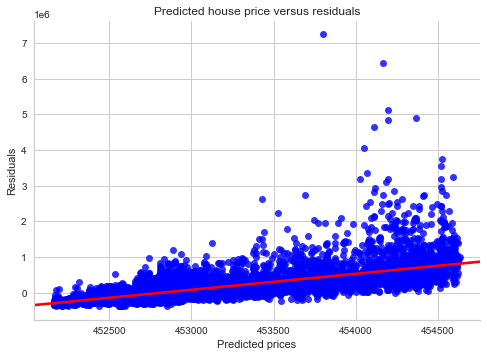

In [358]:
sns.regplot(x=y_pred, y=y_train-y_pred, data=house, truncate=False, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.despine(left = False, bottom = False)
plt.xlabel('Predicted prices')
plt.ylabel('Residuals')
plt.title('Predicted house price versus residuals')
plt.show();

### SVR: Checking for normality or errors

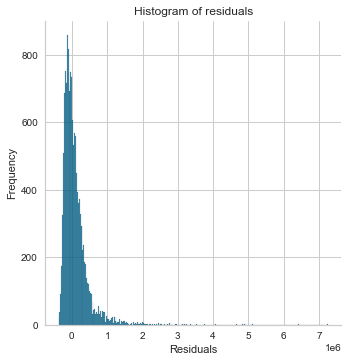

In [359]:
sns.displot(y_train-y_pred)
plt.title('Histogram of residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show();

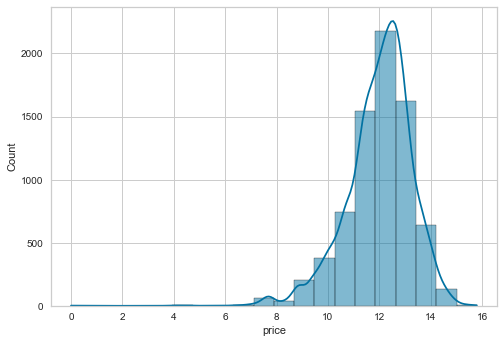

In [360]:
sns.histplot(np.log1p(y_train-y_pred), bins=20, kde=True);

### SVR: Predicting the test data with the model

In [361]:
y_test_pred =svr.predict(X_test)

In [362]:
y_test_pred

array([452290.69373078, 453651.1299663 , 453254.36874641, ...,
       452822.0733318 , 452818.16580113, 452876.36624591])

In [363]:
#Model evaluation
acc_svr = metrics.r2_score(y_test, y_test_pred)

print('r^2:', acc_svr)
print('Adjusted r^2:', 1 - (1-acc_svr)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('Root mean squared error or RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('Mean absolute percentage error or MAPE:', metrics.mean_absolute_percentage_error(y_test, y_test_pred))

r^2: -0.050550766791321866
Adjusted r^2: -0.05347573412345552
Root mean squared error or RMSE: 390412.8112790113
Mean absolute percentage error or MAPE: 0.4334109414536356


In [364]:
ar10t   = 1 - (1-acc_svr)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
RMSE10t = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
MAPE10t = metrics.mean_absolute_percentage_error(y_test, y_test_pred)

In [365]:
# Models compared

models = pd.DataFrame({
    'Model': ['Linear regression', 'Random forest', 'XGBoost', 'Decision tree', 'Bagging', 'Gradient boost', 'XGBoost tuned',
             'Ridge', 'Lasso', 'Support vector'],
    'R-squared train': [r1*100, r2*100, r3*100, r4*100, r5*100, r6*100, r7*100,
                       r8*100, r9*100, r10*100],
    'R-squared test': [acc_linreg*100, acc_rf*100, acc_xgb*100, acc_dt*100, acc_bgr*100, acc_gbr*100, acc_xgbt*100,
                      acc_rid*100, acc_las*100, acc_svr*100],
    'Adjusted r^2 train': [ar1*100, ar2*100, ar3*100, ar4*100, ar5*100, ar6*100, ar7*100,
                          ar8*100, ar9*100, ar10*100],
    'Adjusted r^2 test': [ar1t*100, ar2t*100, ar3t*100, ar4t*100, ar5t*100, ar6t*100, ar7t*100,
                         ar8t*100, ar9t*100, ar10t*100],
    'RMSE train': [RMSE1, RMSE2, RMSE3, RMSE4, RMSE5, RMSE6, RMSE7,
                  RMSE8, RMSE9, RMSE10],
    'RMSE test': [RMSE1t, RMSE2t, RMSE3t, RMSE4t, RMSE5t, RMSE6t, RMSE7t,
                 RMSE8t, RMSE9t, RMSE10t],
    'MAPE train': [MAPE1*100, MAPE2*100, MAPE3*100, MAPE4*100, MAPE5*100, MAPE6*100, MAPE7*100,
                  MAPE8*100, MAPE9*100, MAPE10*100],
    'MAPE test': [MAPE1t*100, MAPE2t*100, MAPE3t*100, MAPE4t*100, MAPE5t*100, MAPE6t*100, MAPE7t*100,
                 MAPE8t*100, MAPE9t*100, MAPE10t*100]})
models.sort_values(by='R-squared test', ascending=False)

Model  R-squared train  R-squared test  Adjusted r^2 train  \
6      XGBoost tuned        91.377945       81.597213           91.367673   
2            XGBoost        94.046928       80.815587           94.039836   
1      Random forest        96.799378       79.849331           96.795565   
4            Bagging        95.569198       78.732251           95.563919   
5     Gradient boost        78.748101       76.125344           78.722785   
3      Decision tree        99.901457       66.194141           99.901339   
0  Linear regression        62.735288       63.985875           62.690896   
8              Lasso        62.735288       63.985872           62.690896   
7              Ridge        62.735288       63.985833           62.690896   
9     Support vector        -5.585952       -5.055077           -5.711733   

   Adjusted r^2 test    RMSE train     RMSE test  MAPE train  MAPE test  
6          81.497322 106116.399784 163401.989883   14.431561  17.035787  
2          80.711453  88175.448577 166836.011069   12.933240  17.678436  
1          79.793227  64653.833797 170985.890579    6.634334  17.288556  
4          78.673037  76070.854405 175661.384969    7.456070  18.082261  
5          76.058872 166600.373692 186116.165598   20.453600  20.705725  
3          66.100018  11344.647799 221468.277568    0.285083  23.775299  
0          63.885604 220610.403879 228587.232400   24.434118  24.803116  
8          63.885601 220610.403880 228587.242060   24.434111  24.803109  
7          63.885562 220610.403936 228587.365746   24.434026  24.803032  
9          -5.347573 371347.217633 390412.811279   42.459051  43.341094

### KNN: Importing KNN regressor

In [366]:
from sklearn.neighbors import KNeighborsRegressor

In [367]:
# Create a K-Nearest Neighbour regressor
knn = KNeighborsRegressor(n_neighbors=4,weights='distance')

# Train the model using train sets
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4, weights='distance')

In [368]:
# Model prediction on train set
y_pred = knn.predict(X_train)

In [369]:
# Model evaluation

print('r^2:', metrics.r2_score(y_train, y_pred))
print('Adjusted r^2:', 1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('Root mean squared error or RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('Mean absolute percentage error or MAPE:', metrics.mean_absolute_percentage_error(y_train, y_pred))

r^2: 0.9990141897396491
Adjusted r^2: 0.9990130153793124
Root mean squared error or RMSE: 11346.80968660604
Mean absolute percentage error or MAPE: 0.0028600720035641455


In [370]:
r11    = metrics.r2_score(y_train, y_pred)
ar11   = 1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
RMSE11 = np.sqrt(metrics.mean_squared_error(y_train, y_pred))
MAPE11 = metrics.mean_absolute_percentage_error(y_train, y_pred)

### KNN: Visualising the difference between actual and predicted house prices

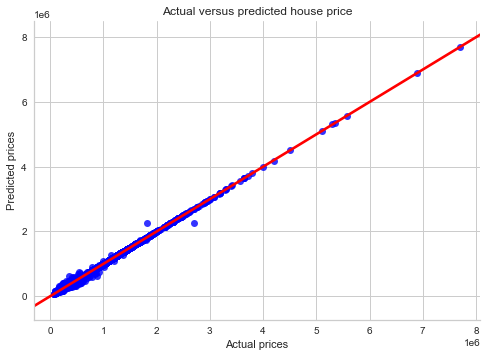

In [371]:
sns.regplot(x=y_train, y=y_pred, data=house, truncate=False, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.despine(left = False, bottom = False)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual versus predicted house price');

### KNN: Checking residuals

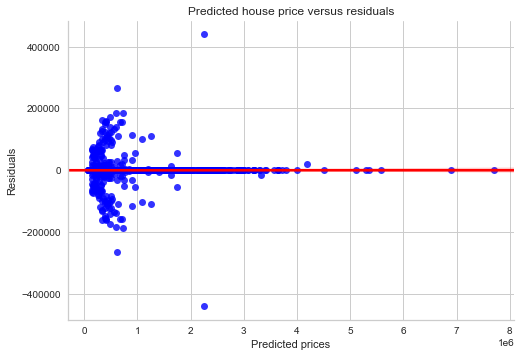

In [372]:
sns.regplot(x=y_pred, y=y_train-y_pred, data=house, truncate=False, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.despine(left = False, bottom = False)
plt.xlabel('Predicted prices')
plt.ylabel('Residuals')
plt.title('Predicted house price versus residuals')
plt.show();

### KNN: Checking for normality of errors

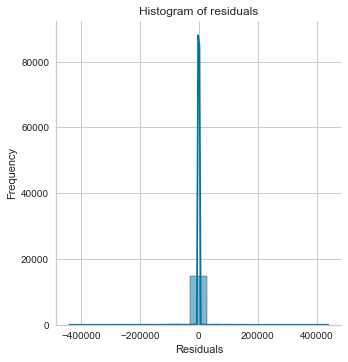

In [377]:
sns.displot(y_train-y_pred, kde=True)
plt.title('Histogram of residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show();

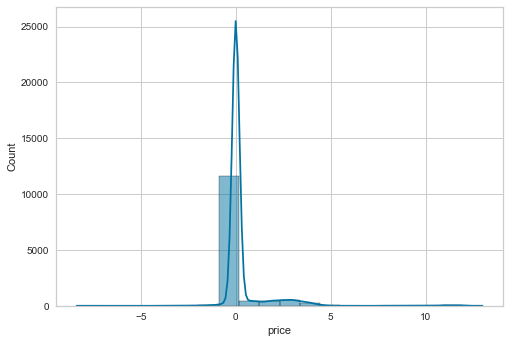

In [376]:
sns.histplot(np.log1p(y_train-y_pred), bins=20, kde=True);

### Predicting the test set with the model

In [378]:
y_test_pred = knn.predict(X_test)

In [379]:
y_test_pred

array([207695.45810395, 971559.1960483 , 483027.71680898, ...,
       555251.64305028, 630885.68867172, 599526.97286489])

In [380]:
#Model evaluation
acc_knn = metrics.r2_score(y_test, y_test_pred)

print('r^2:', acc_knn)
print('Adjusted r^2:', 1 - (1-acc_knn)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('Root mean squared error or RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('Mean absolute percentage error or MAPE:', metrics.mean_absolute_percentage_error(y_test, y_test_pred))

r^2: 0.6942518305589358
Adjusted r^2: 0.6934005595535314
Root mean squared error or RMSE: 210618.963505483
Mean absolute percentage error or MAPE: 0.20979355850654846


In [381]:
ar11t   = 1 - (1-acc_knn)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
RMSE11t = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
MAPE11t = metrics.mean_absolute_percentage_error(y_test, y_test_pred)

In [382]:
# Models compared

models = pd.DataFrame({
    'Model': ['Linear regression', 'Random forest', 'XGBoost', 'Decision tree', 'Bagging', 'Gradient boost', 'XGBoost tuned',
             'Ridge', 'Lasso', 'Support vector', 'KNN'],
    'R-squared train': [r1*100, r2*100, r3*100, r4*100, r5*100, r6*100, r7*100,
                       r8*100, r9*100, r10*100, r11*100],
    'R-squared test': [acc_linreg*100, acc_rf*100, acc_xgb*100, acc_dt*100, acc_bgr*100, acc_gbr*100, acc_xgbt*100,
                      acc_rid*100, acc_las*100, acc_svr*100, acc_knn*100],
    'Adjusted r^2 train': [ar1*100, ar2*100, ar3*100, ar4*100, ar5*100, ar6*100, ar7*100,
                          ar8*100, ar9*100, ar10*100, ar11*100],
    'Adjusted r^2 test': [ar1t*100, ar2t*100, ar3t*100, ar4t*100, ar5t*100, ar6t*100, ar7t*100,
                         ar8t*100, ar9t*100, ar10t*100, ar11t*100],
    'RMSE train': [RMSE1, RMSE2, RMSE3, RMSE4, RMSE5, RMSE6, RMSE7,
                  RMSE8, RMSE9, RMSE10, RMSE11],
    'RMSE test': [RMSE1t, RMSE2t, RMSE3t, RMSE4t, RMSE5t, RMSE6t, RMSE7t,
                 RMSE8t, RMSE9t, RMSE10t, RMSE11t],
    'MAPE train': [MAPE1*100, MAPE2*100, MAPE3*100, MAPE4*100, MAPE5*100, MAPE6*100, MAPE7*100,
                  MAPE8*100, MAPE9*100, MAPE10*100, MAPE11*100],
    'MAPE test': [MAPE1t*100, MAPE2t*100, MAPE3t*100, MAPE4t*100, MAPE5t*100, MAPE6t*100, MAPE7t*100,
                 MAPE8t*100, MAPE9t*100, MAPE10t*100, MAPE11t*100]})
models.sort_values(by='R-squared test', ascending=False)

Model  R-squared train  R-squared test  Adjusted r^2 train  \
6       XGBoost tuned        91.377945       81.597213           91.367673   
2             XGBoost        94.046928       80.815587           94.039836   
1       Random forest        96.799378       79.849331           96.795565   
4             Bagging        95.569198       78.732251           95.563919   
5      Gradient boost        78.748101       76.125344           78.722785   
10                KNN        99.901419       69.425183           99.901302   
3       Decision tree        99.901457       66.194141           99.901339   
0   Linear regression        62.735288       63.985875           62.690896   
8               Lasso        62.735288       63.985872           62.690896   
7               Ridge        62.735288       63.985833           62.690896   
9      Support vector        -5.585952       -5.055077           -5.711733   

    Adjusted r^2 test    RMSE train     RMSE test  MAPE train  MAPE test  
6           81.497322 106116.399784 163401.989883   14.431561  17.035787  
2           80.711453  88175.448577 166836.011069   12.933240  17.678436  
1           79.793227  64653.833797 170985.890579    6.634334  17.288556  
4           78.673037  76070.854405 175661.384969    7.456070  18.082261  
5           76.058872 166600.373692 186116.165598   20.453600  20.705725  
10          69.340056  11346.809687 210618.963505    0.286007  20.979356  
3           66.100018  11344.647799 221468.277568    0.285083  23.775299  
0           63.885604 220610.403879 228587.232400   24.434118  24.803116  
8           63.885601 220610.403880 228587.242060   24.434111  24.803109  
7           63.885562 220610.403936 228587.365746   24.434026  24.803032  
9           -5.347573 371347.217633 390412.811279   42.459051  43.341094

### Elastic Net: Importing ElasticNet regressor

In [383]:
from sklearn.linear_model import ElasticNet

In [384]:
# Create an Elastic Net regressor
en = ElasticNet()

# Train the model using train sets
en.fit(X_train, y_train)

ElasticNet()

In [385]:
# Model prediction on train set
y_pred = en.predict(X_train)

In [386]:
# Model evaluation

print('r^2:', metrics.r2_score(y_train, y_pred))
print('Adjusted r^2:', 1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('Root mean squared error or RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('Mean absolute percentage error or MAPE:', metrics.mean_absolute_percentage_error(y_train, y_pred))

r^2: 0.6253153750629636
Adjusted r^2: 0.6248690267341174
Root mean squared error or RMSE: 221212.69153222992
Mean absolute percentage error or MAPE: 0.24330046865225075


In [387]:
r12    = metrics.r2_score(y_train, y_pred)
ar12   = 1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
RMSE12 = np.sqrt(metrics.mean_squared_error(y_train, y_pred))
MAPE12 = metrics.mean_absolute_percentage_error(y_train, y_pred)

### Elastic Net: Visualising the difference between actual and predicted house prices

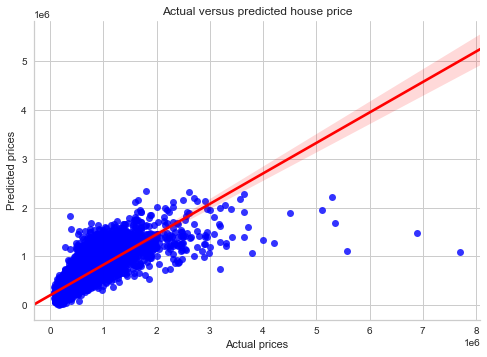

In [388]:
sns.regplot(x=y_train, y=y_pred, data=house, truncate=False, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.despine(left = False, bottom = False)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual versus predicted house price');

### Elastic Net: Checking residuals

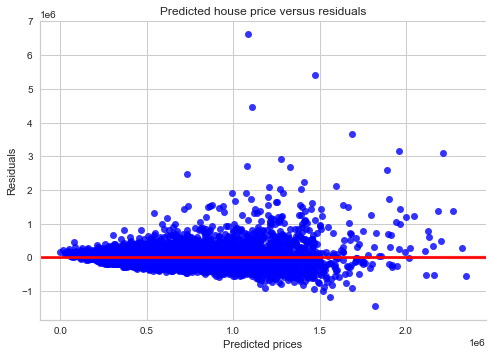

In [389]:
sns.regplot(x=y_pred, y=y_train-y_pred, data=house, truncate=False, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.despine(left = False, bottom = False)
plt.xlabel('Predicted prices')
plt.ylabel('Residuals')
plt.title('Predicted house price versus residuals')
plt.show();

### Elastic Net: Checking for normality of errors

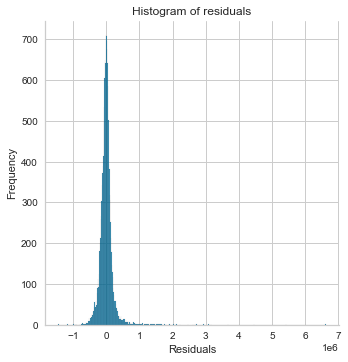

In [390]:
sns.displot(y_train-y_pred)
plt.title('Histogram of residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show();

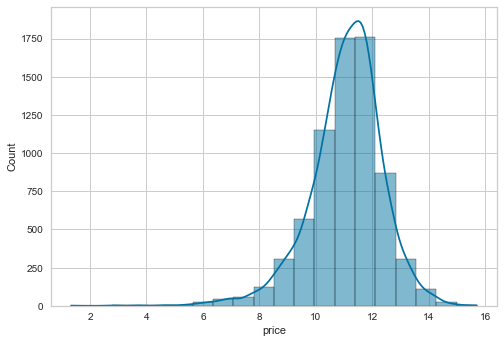

In [391]:
sns.histplot(np.log(y_train-y_pred), bins=20, kde=True);

### Elastic Net: Predicting the test set with the model

In [392]:
y_test_pred = en.predict(X_test)

In [393]:
y_test_pred

array([166878.79580494, 848527.92926496, 633863.314887  , ...,
       591570.71286372, 500110.83797378, 549696.80129374])

In [394]:
#Model evaluation
acc_en = metrics.r2_score(y_test, y_test_pred)

print('r^2:', acc_en)
print('Adjusted r^2:', 1 - (1-acc_en)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('Root mean squared error or RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('Mean absolute percentage error or MAPE:', metrics.mean_absolute_percentage_error(y_test, y_test_pred))

r^2: 0.6366379006220471
Adjusted r^2: 0.6356262196028972
Root mean squared error or RMSE: 229607.1201503086
Mean absolute percentage error or MAPE: 0.24743567528379723


In [395]:
ar12t   = 1 - (1-acc_en)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
RMSE12t = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
MAPE12t = metrics.mean_absolute_percentage_error(y_test, y_test_pred)

In [396]:
# Models compared

models = pd.DataFrame({
    'Model': ['Linear regression', 'Random forest', 'XGBoost', 'Decision tree', 'Bagging', 'Gradient boost', 'XGBoost tuned',
             'Ridge', 'Lasso', 'Support vector', 'KNN', 'Elastic net'],
    'R-squared train': [r1*100, r2*100, r3*100, r4*100, r5*100, r6*100, r7*100,
                       r8*100, r9*100, r10*100, r11*100, r12*100],
    'R-squared test': [acc_linreg*100, acc_rf*100, acc_xgb*100, acc_dt*100, acc_bgr*100, acc_gbr*100, acc_xgbt*100,
                      acc_rid*100, acc_las*100, acc_svr*100, acc_knn*100, acc_en*100],
    'Adjusted r^2 train': [ar1*100, ar2*100, ar3*100, ar4*100, ar5*100, ar6*100, ar7*100,
                          ar8*100, ar9*100, ar10*100, ar11*100, ar12*100],
    'Adjusted r^2 test': [ar1t*100, ar2t*100, ar3t*100, ar4t*100, ar5t*100, ar6t*100, ar7t*100,
                         ar8t*100, ar9t*100, ar10t*100, ar11t*100, ar12t*100],
    'RMSE train': [RMSE1, RMSE2, RMSE3, RMSE4, RMSE5, RMSE6, RMSE7,
                  RMSE8, RMSE9, RMSE10, RMSE11, RMSE12],
    'RMSE test': [RMSE1t, RMSE2t, RMSE3t, RMSE4t, RMSE5t, RMSE6t, RMSE7t,
                 RMSE8t, RMSE9t, RMSE10t, RMSE11t, RMSE12t],
    'MAPE train': [MAPE1*100, MAPE2*100, MAPE3*100, MAPE4*100, MAPE5*100, MAPE6*100, MAPE7*100,
                  MAPE8*100, MAPE9*100, MAPE10*100, MAPE11*100, MAPE12*100],
    'MAPE test': [MAPE1t*100, MAPE2t*100, MAPE3t*100, MAPE4t*100, MAPE5t*100, MAPE6t*100, MAPE7t*100,
                 MAPE8t*100, MAPE9t*100, MAPE10t*100, MAPE11t*100, MAPE12t*100]})
models.sort_values(by='R-squared test', ascending=False)

Model  R-squared train  R-squared test  Adjusted r^2 train  \
6       XGBoost tuned        91.377945       81.597213           91.367673   
2             XGBoost        94.046928       80.815587           94.039836   
1       Random forest        96.799378       79.849331           96.795565   
4             Bagging        95.569198       78.732251           95.563919   
5      Gradient boost        78.748101       76.125344           78.722785   
10                KNN        99.901419       69.425183           99.901302   
3       Decision tree        99.901457       66.194141           99.901339   
0   Linear regression        62.735288       63.985875           62.690896   
8               Lasso        62.735288       63.985872           62.690896   
7               Ridge        62.735288       63.985833           62.690896   
11        Elastic net        62.531538       63.663790           62.486903   
9      Support vector        -5.585952       -5.055077           -5.711733   

    Adjusted r^2 test    RMSE train     RMSE test  MAPE train  MAPE test  
6           81.497322 106116.399784 163401.989883   14.431561  17.035787  
2           80.711453  88175.448577 166836.011069   12.933240  17.678436  
1           79.793227  64653.833797 170985.890579    6.634334  17.288556  
4           78.673037  76070.854405 175661.384969    7.456070  18.082261  
5           76.058872 166600.373692 186116.165598   20.453600  20.705725  
10          69.340056  11346.809687 210618.963505    0.286007  20.979356  
3           66.100018  11344.647799 221468.277568    0.285083  23.775299  
0           63.885604 220610.403879 228587.232400   24.434118  24.803116  
8           63.885601 220610.403880 228587.242060   24.434111  24.803109  
7           63.885562 220610.403936 228587.365746   24.434026  24.803032  
11          63.562622 221212.691532 229607.120150   24.330047  24.743568  
9           -5.347573 371347.217633 390412.811279   42.459051  43.341094

# Models on scaled data 

In [397]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   price              21613 non-null  int64   
 1   house_in_sqft      21613 non-null  float64 
 2   lot_in_sqft        21613 non-null  float64 
 3   basement_size      21613 non-null  float64 
 4   yr_renovated       21613 non-null  int64   
 5   total_area         21613 non-null  float64 
 6   house_age          21613 non-null  int32   
 7   has_basement       21613 non-null  int32   
 8   diff_living        21613 non-null  float64 
 9   bedrooms_bin_enc   21613 non-null  category
 10  bathrooms_bin_enc  21613 non-null  category
 11  quality_bin_enc    21613 non-null  float64 
 12  floors_bin_enc     21613 non-null  category
 13  viewed_bin_enc     21613 non-null  category
 14  house_age_bin_enc  21613 non-null  category
 15  zipcode_enc        21613 non-null  float64 
 16  Regi

In [398]:
house.columns

Index(['price', 'house_in_sqft', 'lot_in_sqft', 'basement_size',
       'yr_renovated', 'total_area', 'house_age', 'has_basement',
       'diff_living', 'bedrooms_bin_enc', 'bathrooms_bin_enc',
       'quality_bin_enc', 'floors_bin_enc', 'viewed_bin_enc',
       'house_age_bin_enc', 'zipcode_enc', 'Region_name_enc', 'furnished_enc',
       'coast_enc'],
      dtype='object')

In [399]:
df_cat = house[['bedrooms_bin_enc', 'bathrooms_bin_enc', 'floors_bin_enc', 'viewed_bin_enc', 'house_age_bin_enc']].copy()
df_num = house[['price', 'house_in_sqft', 'lot_in_sqft', 'basement_size', 'yr_renovated', 'total_area', 'house_age', 
             'has_basement', 'diff_living', 'quality_bin_enc', 'zipcode_enc', 
             'Region_name_enc', 'furnished_enc', 'coast_enc']].copy()

In [400]:
df_cat.columns

Index(['bedrooms_bin_enc', 'bathrooms_bin_enc', 'floors_bin_enc',
       'viewed_bin_enc', 'house_age_bin_enc'],
      dtype='object')

In [401]:
df_num.columns

Index(['price', 'house_in_sqft', 'lot_in_sqft', 'basement_size',
       'yr_renovated', 'total_area', 'house_age', 'has_basement',
       'diff_living', 'quality_bin_enc', 'zipcode_enc', 'Region_name_enc',
       'furnished_enc', 'coast_enc'],
      dtype='object')

In [402]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [403]:
X_train_std = pd.DataFrame(std.fit_transform(X_train))
X_test_std  = pd.DataFrame(std.transform(X_test))

### Scaled train set

In [404]:
X_train_std

0         1         2         3         4         5         6   \
0     -0.636615 -0.268199  0.722608 -0.207925 -0.375347  0.444542  1.236563   
1     -0.281026 -0.606782  1.271653 -0.207925 -0.615531  0.682942  1.236563   
2      0.759403  0.004654  1.820697 -0.207925  0.163381  0.274256  1.236563   
3     -0.741975 -1.056960 -0.663077 -0.207925 -1.126430 -1.156145 -0.808693   
4      0.680383  1.676243  1.951422 -0.207925  1.693106 -0.270659  1.236563   
...         ...       ...       ...       ...       ...       ...       ...   
15124  2.313461 -0.630445  0.722608 -0.207925 -0.105172 -1.053974  1.236563   
15125  1.720812  0.058406 -0.663077 -0.207925  0.044774 -1.019917 -0.808693   
15126 -0.794655  0.038541 -0.663077 -0.207925 -0.124085  0.614828 -0.808693   
15127 -0.315268  2.390218 -0.663077 -0.207925  2.149160  0.989457 -0.808693   
15128 -0.412725  0.668966 -0.663077 -0.207925  0.537301  0.580771 -0.808693   

             7        8         9         10        11        12        13  \
0      0.004337 0.000091 -1.055994 -0.157354 -0.836817 -0.279621 -1.275236   
1      0.596984 0.000091 -1.055994 -0.157354 -0.836817 -0.279621 -1.045968   
2      1.653441 0.000091  0.359859 -0.157354 -0.836817 -0.279621 -1.275236   
3     -1.206723 0.000091  0.359859 -0.157354  1.229028 -0.279621  1.182184   
4      1.163863 0.000091  0.359859 -0.157354 -0.836817 -0.279621 -0.765359   
...         ...      ...       ...       ...       ...       ...       ...   
15124 -0.047197 0.000091  0.359859 -0.157354  1.229028 -0.279621  1.182184   
15125 -0.150266 0.000091  0.359859 -0.157354  1.229028 -0.279621  1.182184   
15126 -0.897516 0.000091 -1.055994 -0.157354 -0.836817 -0.279621 -1.045968   
15127  0.658825 0.000091  0.359859 -0.157354 -0.836817 -0.279621 -0.226294   
15128  0.262010 0.000091 -1.055994 -0.157354 -0.836817 -0.279621 -1.045968   

             14        15        16        17  
0     -0.031179 -1.839683 -0.498574 -0.084397  
1     -0.031179  0.349670 -0.498574 -0.084397  
2     -0.031179  0.049700 -0.498574 -0.084397  
3     -0.999350 -1.722651 -0.498574 -0.084397  
4      0.731677  1.238302 -0.498574 -0.084397  
...         ...       ...       ...       ...  
15124  0.449073  0.530936  2.005719 -0.084397  
15125  0.731677  0.610621  2.005719 -0.084397  
15126 -0.031179  0.049700 -0.498574 -0.084397  
15127 -0.867234 -1.722651 -0.498574 -0.084397  
15128  2.265687  1.238302 -0.498574 -0.084397  

[15129 rows x 18 columns]

### Scaled test set

In [405]:
X_test_std

0         1         2         3         4         5         6   \
0    -0.939525 -0.248918 -0.663077 -0.207925 -0.419655 -0.168487 -0.808693   
1     1.733982  1.670985 -0.663077 -0.207925  1.904382  0.240199  1.236563   
2    -0.386385  0.446652 -0.663077 -0.207925  0.337102  0.512656 -0.808693   
3     1.544334  1.744895  0.513448 -0.207925  1.933831 -0.475002  1.236563   
4    -0.320536 -0.985095  1.428523 -0.207925 -0.973512  1.364086  1.236563   
...        ...       ...       ...       ...       ...       ...       ...   
6479 -0.909234 -1.115387 -0.663077  4.848745 -1.214777  2.283629 -0.808693   
6480 -1.137075 -1.260285 -0.663077 -0.207925 -1.395524 -0.577173 -0.808693   
6481 -0.439065 -0.297412 -0.663077 -0.207925 -0.361838  1.772772 -0.808693   
6482 -0.610275 -0.437637 -0.663077 -0.207925 -0.526644  1.227857 -0.808693   
6483  1.378392  0.590674  2.605047 -0.207925  0.832331  0.172085  1.236563   

            7         8         9         10        11        12        13  \
0    -1.077887  0.000091 -1.055994 -0.157354 -0.836817 -0.279621 -0.765359   
1     1.241165  2.954403  0.359859 -0.157354 -0.836817  2.484486 -1.275236   
2     0.854656  0.000091 -1.055994 -0.157354 -0.836817 -0.279621 -1.275236   
3    -0.804754  0.000091  0.359859 -0.157354  1.229028  2.484486  0.014419   
4     0.622751  0.000091  0.359859 -0.157354 -0.836817 -0.279621 -0.226294   
...        ...       ...       ...       ...       ...       ...       ...   
6479  0.553180 -1.691875  0.359859 -0.157354 -0.836817 -0.279621  0.972263   
6480 -0.072964  0.000091 -1.055994 -0.157354  1.229028 -0.279621  0.014419   
6481 -0.665611  2.954403 -1.055994 -0.157354 -0.836817 -0.279621  0.972263   
6482 -0.279102  0.000091  0.359859 -0.157354 -0.836817 -0.279621 -0.226294   
6483  2.606829  0.000091 -1.055994 -0.157354 -0.836817 -0.279621 -1.244322   

            14        15        16        17  
0    -1.500371 -1.839683 -0.498574 -0.084397  
1    -0.385292  0.049700  2.005719 -0.084397  
2     2.265687  1.238302 -0.498574 -0.084397  
3    -0.031179 -1.839683  2.005719 -0.084397  
4    -0.031179  0.049700 -0.498574 -0.084397  
...        ...       ...       ...       ...  
6479 -0.031179  0.349670 -0.498574 -0.084397  
6480  0.449073  0.530936 -0.498574 -0.084397  
6481 -0.031179  0.349670 -0.498574 -0.084397  
6482 -0.031179  0.049700 -0.498574 -0.084397  
6483  0.655660  0.610621 -0.498574 -0.084397  

[6484 rows x 18 columns]

### Linear regression scaled

In [406]:
lr1 = lr.fit(X_train_std, y_train)
lr1

LinearRegression()

### Linear Regression scaled: Model Prediction on train data

In [407]:
y_pred = lr1.predict(X_train_std)

In [408]:
# Model evaluation
print('r^2:', metrics.r2_score(y_train, y_pred))
print('Adjusted r^2:', 1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train_std.shape[1]-1))
print('Root mean squared error or RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('Mean absolute percentage error or MAPE:', metrics.mean_absolute_percentage_error(y_train, y_pred))

r^2: 0.6273528776391732
Adjusted r^2: 0.6269089565139254
Root mean squared error or RMSE: 220610.4038793652
Mean absolute percentage error or MAPE: 0.24434118200225677


In [409]:
r13    = metrics.r2_score(y_train, y_pred)
ar13   = 1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train_std.shape[1]-1)
RMSE13 = np.sqrt(metrics.mean_squared_error(y_train, y_pred))
MAPE13 = metrics.mean_absolute_percentage_error(y_train, y_pred)

### Linear regression scaled: Visualising the differencce between actual and predicted prices

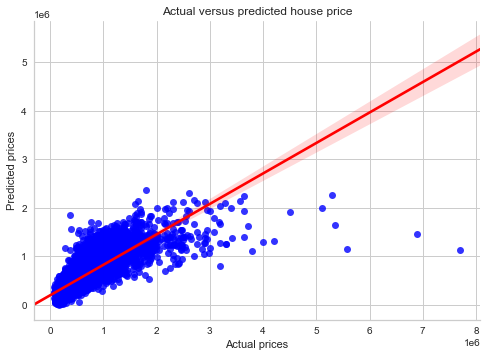

In [410]:
sns.regplot(x=y_train, y=y_pred, data=house, truncate=False, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.despine(left = False, bottom = False)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual versus predicted house price');

### Linear regression: Inspecting residuals

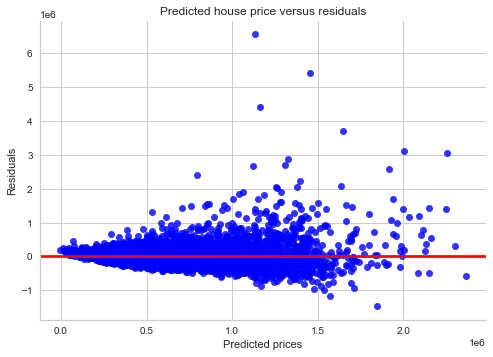

In [411]:
sns.regplot(x=y_pred, y=y_train-y_pred, data=house, truncate=False, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.despine(left = False, bottom = False)
plt.xlabel('Predicted prices')
plt.ylabel('Residuals')
plt.title('Predicted house price versus residuals')
plt.show();

### Linear regression: Checking normality of errors

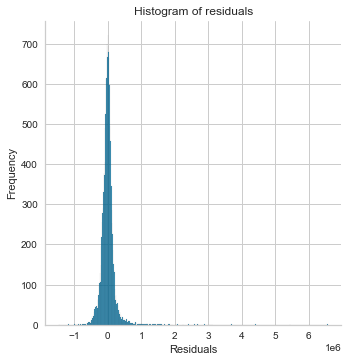

In [412]:
sns.displot(y_train-y_pred)
plt.title('Histogram of residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show();

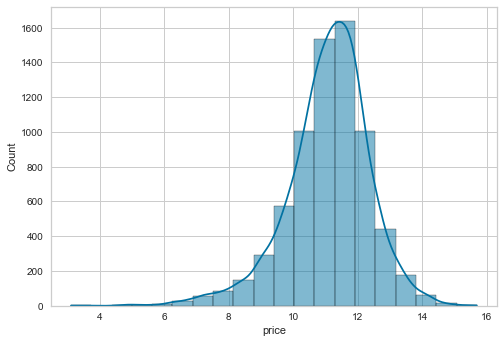

In [413]:
sns.histplot(np.log(y_train-y_pred), bins=20, kde=True);

### Linear regression: Model evaluation for OLS

In [415]:
# Predicting test data with the model
y_test_pred = lr1.predict(X_test_std)

In [416]:
y_test_pred

array([158674.00455793, 899510.10388912, 624153.9243871 , ...,
       582938.99497766, 487499.72962199, 527472.40151343])

In [417]:
# Model evaluation
acc_linregs = metrics.r2_score(y_test, y_test_pred)
print('r^2:', acc_linregs)
print('Adjusted r^2:', 1 - (1-acc_linregs)*(len(y_test)-1)/(len(y_test)-X_test_std.shape[1]-1))
print('Root mean squared error or RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('Mean absolute percentage error or MAPE:', metrics.mean_absolute_percentage_error(y_test, y_test_pred))

r^2: 0.6398587545622838
Adjusted r^2: 0.6388560411179096
Root mean squared error or RMSE: 228587.23239981677
Mean absolute percentage error or MAPE: 0.24803115635729867


In [418]:
ar13t   = 1 - (1-acc_linregs)*(len(y_test)-1)/(len(y_test)-X_test_std.shape[1]-1)
RMSE13t = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
MAPE13t = metrics.mean_absolute_percentage_error(y_test, y_test_pred)

In [419]:
# Models compared

models = pd.DataFrame({
    'Model': ['Linear regression', 'Random forest', 'XGBoost', 'Decision tree', 'Bagging', 'Gradient boost', 'XGBoost tuned',
             'Ridge', 'Lasso', 'Support vector', 'KNN', 'Elastic net', 'LR scaled'],
    'R-squared train': [r1*100, r2*100, r3*100, r4*100, r5*100, r6*100, r7*100,
                       r8*100, r9*100, r10*100, r11*100, r12*100, r13*100],
    'R-squared test': [acc_linreg*100, acc_rf*100, acc_xgb*100, acc_dt*100, acc_bgr*100, acc_gbr*100, acc_xgbt*100,
                      acc_rid*100, acc_las*100, acc_svr*100, acc_knn*100, acc_en*100, acc_linregs*100],
    'Adjusted r^2 train': [ar1*100, ar2*100, ar3*100, ar4*100, ar5*100, ar6*100, ar7*100,
                          ar8*100, ar9*100, ar10*100, ar11*100, ar12*100, ar13*100],
    'Adjusted r^2 test': [ar1t*100, ar2t*100, ar3t*100, ar4t*100, ar5t*100, ar6t*100, ar7t*100,
                         ar8t*100, ar9t*100, ar10t*100, ar11t*100, ar12t*100, ar13t*100],
    'RMSE train': [RMSE1, RMSE2, RMSE3, RMSE4, RMSE5, RMSE6, RMSE7,
                  RMSE8, RMSE9, RMSE10, RMSE11, RMSE12, RMSE13],
    'RMSE test': [RMSE1t, RMSE2t, RMSE3t, RMSE4t, RMSE5t, RMSE6t, RMSE7t,
                 RMSE8t, RMSE9t, RMSE10t, RMSE11t, RMSE12t, RMSE13t],
    'MAPE train': [MAPE1*100, MAPE2*100, MAPE3*100, MAPE4*100, MAPE5*100, MAPE6*100, MAPE7*100,
                  MAPE8*100, MAPE9*100, MAPE10*100, MAPE11*100, MAPE12*100, MAPE13*100],
    'MAPE test': [MAPE1t*100, MAPE2t*100, MAPE3t*100, MAPE4t*100, MAPE5t*100, MAPE6t*100, MAPE7t*100,
                 MAPE8t*100, MAPE9t*100, MAPE10t*100, MAPE11t*100, MAPE12t*100, MAPE13t*100]})
models.sort_values(by='R-squared test', ascending=False)

Model  R-squared train  R-squared test  Adjusted r^2 train  \
6       XGBoost tuned        91.377945       81.597213           91.367673   
2             XGBoost        94.046928       80.815587           94.039836   
1       Random forest        96.799378       79.849331           96.795565   
4             Bagging        95.569198       78.732251           95.563919   
5      Gradient boost        78.748101       76.125344           78.722785   
10                KNN        99.901419       69.425183           99.901302   
3       Decision tree        99.901457       66.194141           99.901339   
0   Linear regression        62.735288       63.985875           62.690896   
12          LR scaled        62.735288       63.985875           62.690896   
8               Lasso        62.735288       63.985872           62.690896   
7               Ridge        62.735288       63.985833           62.690896   
11        Elastic net        62.531538       63.663790           62.486903   
9      Support vector        -5.585952       -5.055077           -5.711733   

    Adjusted r^2 test    RMSE train     RMSE test  MAPE train  MAPE test  
6           81.497322 106116.399784 163401.989883   14.431561  17.035787  
2           80.711453  88175.448577 166836.011069   12.933240  17.678436  
1           79.793227  64653.833797 170985.890579    6.634334  17.288556  
4           78.673037  76070.854405 175661.384969    7.456070  18.082261  
5           76.058872 166600.373692 186116.165598   20.453600  20.705725  
10          69.340056  11346.809687 210618.963505    0.286007  20.979356  
3           66.100018  11344.647799 221468.277568    0.285083  23.775299  
0           63.885604 220610.403879 228587.232400   24.434118  24.803116  
12          63.885604 220610.403879 228587.232400   24.434118  24.803116  
8           63.885601 220610.403880 228587.242060   24.434111  24.803109  
7           63.885562 220610.403936 228587.365746   24.434026  24.803032  
11          63.562622 221212.691532 229607.120150   24.330047  24.743568  
9           -5.347573 371347.217633 390412.811279   42.459051  43.341094

### Random forest scaled

In [420]:
rf1 = rf.fit(X_train_std, y_train)
rf1

RandomForestRegressor()

### Random forest scaled: Model Prediction on train data

In [421]:
y_pred = rf1.predict(X_train_std)

In [422]:
print('r^2:', metrics.r2_score(y_train, y_pred))
print('Adjusted r^2:', 1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train_std.shape[1]-1))
print('Root mean squared error or RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('Mean absolute percentage error or MAPE:', metrics.mean_absolute_percentage_error(y_train, y_pred))

r^2: 0.9687602745348279
Adjusted r^2: 0.9687230597725266
Root mean squared error or RMSE: 63874.969839739075
Mean absolute percentage error or MAPE: 0.06613304227321411


In [423]:
r14    = metrics.r2_score(y_train, y_pred)
ar14   = 1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train_std.shape[1]-1)
RMSE14 = np.sqrt(metrics.mean_squared_error(y_train, y_pred))
MAPE14 = metrics.mean_absolute_percentage_error(y_train, y_pred)

### Random forest scaled: Visualising the differencce between actual and predicted prices

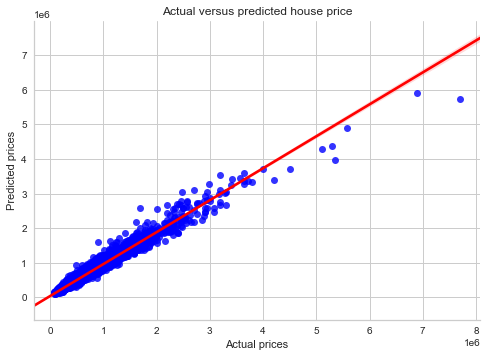

In [424]:
sns.regplot(x=y_train, y=y_pred, data=house, truncate=False, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.despine(left = False, bottom = False)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual versus predicted house price');

### Random forest scaled: Inspecting residuals

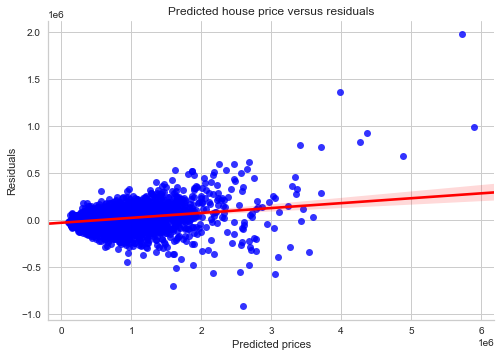

In [425]:
sns.regplot(x=y_pred, y=y_train-y_pred, data=house, truncate=False, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.despine(left = False, bottom = False)
plt.xlabel('Predicted prices')
plt.ylabel('Residuals')
plt.title('Predicted house price versus residuals')
plt.show();

### Random forest scaled: Checking normality of errors

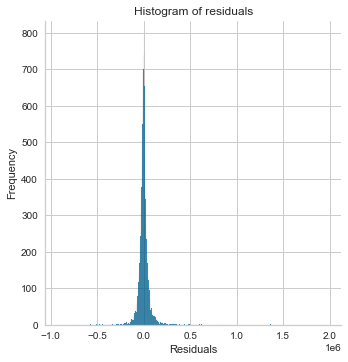

In [426]:
sns.displot(y_train-y_pred)
plt.title('Histogram of residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show();

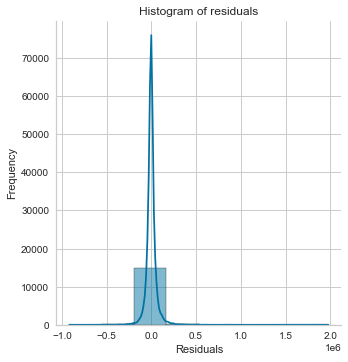

In [437]:
sns.displot(y_train-y_pred, bins=8, kde=True)
plt.title('Histogram of residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show();

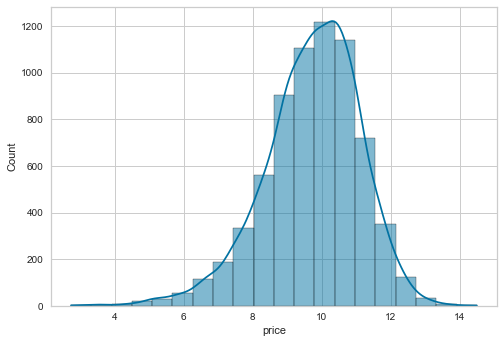

In [438]:
sns.histplot(np.log(y_train-y_pred), bins=20, kde=True);

### Random forest scaled: Model evaluation

In [439]:
# Predicting test data with the model

In [440]:
y_test_pred = rf1.predict(X_test_std)

In [441]:
y_test_pred

array([229845.38, 805809.7 , 482332.4 , ..., 606685.5 , 589840.5 ,
       525432.7 ])

In [442]:
# Model evaluation
acc_rfs = metrics.r2_score(y_test, y_test_pred)
print('r^2:', acc_rfs)
print('Adjusted r^2:', 1 - (1-acc_rfs)*(len(y_test)-1)/(len(y_test)-X_test_std.shape[1]-1))
print('Root mean squared error or RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('Mean absolute percentage error or MAPE:', metrics.mean_absolute_percentage_error(y_test, y_test_pred))

r^2: 0.8024368937255288
Adjusted r^2: 0.8018868340328853
Root mean squared error or RMSE: 169304.48435838133
Mean absolute percentage error or MAPE: 0.17272222745612195


In [443]:
ar14t   = 1 - (1-acc_rfs)*(len(y_test)-1)/(len(y_test)-X_test_std.shape[1]-1)
RMSE14t = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
MAPE14t = metrics.mean_absolute_percentage_error(y_test, y_test_pred)

In [444]:
# Models compared

models = pd.DataFrame({
    'Model': ['Linear regression', 'Random forest', 'XGBoost', 'Decision tree', 'Bagging', 'Gradient boost', 'XGBoost tuned',
             'Ridge', 'Lasso', 'Support vector', 'KNN', 'Elastic net', 'LR scaled', 'RF scaled'],
    'R-squared train': [r1*100, r2*100, r3*100, r4*100, r5*100, r6*100, r7*100,
                       r8*100, r9*100, r10*100, r11*100, r12*100, r13*100, r14*100],
    'R-squared test': [acc_linreg*100, acc_rf*100, acc_xgb*100, acc_dt*100, acc_bgr*100, acc_gbr*100, acc_xgbt*100,
                      acc_rid*100, acc_las*100, acc_svr*100, acc_knn*100, acc_en*100, acc_linregs*100, acc_rfs*100],
    'Adjusted r^2 train': [ar1*100, ar2*100, ar3*100, ar4*100, ar5*100, ar6*100, ar7*100,
                          ar8*100, ar9*100, ar10*100, ar11*100, ar12*100, ar13*100, ar14*100],
    'Adjusted r^2 test': [ar1t*100, ar2t*100, ar3t*100, ar4t*100, ar5t*100, ar6t*100, ar7t*100,
                         ar8t*100, ar9t*100, ar10t*100, ar11t*100, ar12t*100, ar13t*100, ar14t*100],
    'RMSE train': [RMSE1, RMSE2, RMSE3, RMSE4, RMSE5, RMSE6, RMSE7,
                  RMSE8, RMSE9, RMSE10, RMSE11, RMSE12, RMSE13, RMSE14],
    'RMSE test': [RMSE1t, RMSE2t, RMSE3t, RMSE4t, RMSE5t, RMSE6t, RMSE7t,
                 RMSE8t, RMSE9t, RMSE10t, RMSE11t, RMSE12t, RMSE13t, RMSE14t],
    'MAPE train': [MAPE1*100, MAPE2*100, MAPE3*100, MAPE4*100, MAPE5*100, MAPE6*100, MAPE7*100,
                  MAPE8*100, MAPE9*100, MAPE10*100, MAPE11*100, MAPE12*100, MAPE13*100, MAPE14*100],
    'MAPE test': [MAPE1t*100, MAPE2t*100, MAPE3t*100, MAPE4t*100, MAPE5t*100, MAPE6t*100, MAPE7t*100,
                 MAPE8t*100, MAPE9t*100, MAPE10t*100, MAPE11t*100, MAPE12t*100, MAPE13t*100, MAPE14t*100]})
models.sort_values(by='R-squared test', ascending=False)

Model  R-squared train  R-squared test  Adjusted r^2 train  \
6       XGBoost tuned        91.377945       81.597213           91.367673   
2             XGBoost        94.046928       80.815587           94.039836   
13          RF scaled        96.876027       80.243689           96.872306   
1       Random forest        96.799378       79.849331           96.795565   
4             Bagging        95.569198       78.732251           95.563919   
5      Gradient boost        78.748101       76.125344           78.722785   
10                KNN        99.901419       69.425183           99.901302   
3       Decision tree        99.901457       66.194141           99.901339   
0   Linear regression        62.735288       63.985875           62.690896   
12          LR scaled        62.735288       63.985875           62.690896   
8               Lasso        62.735288       63.985872           62.690896   
7               Ridge        62.735288       63.985833           62.690896   
11        Elastic net        62.531538       63.663790           62.486903   
9      Support vector        -5.585952       -5.055077           -5.711733   

    Adjusted r^2 test    RMSE train     RMSE test  MAPE train  MAPE test  
6           81.497322 106116.399784 163401.989883   14.431561  17.035787  
2           80.711453  88175.448577 166836.011069   12.933240  17.678436  
13          80.188683  63874.969840 169304.484358    6.613304  17.272223  
1           79.793227  64653.833797 170985.890579    6.634334  17.288556  
4           78.673037  76070.854405 175661.384969    7.456070  18.082261  
5           76.058872 166600.373692 186116.165598   20.453600  20.705725  
10          69.340056  11346.809687 210618.963505    0.286007  20.979356  
3           66.100018  11344.647799 221468.277568    0.285083  23.775299  
0           63.885604 220610.403879 228587.232400   24.434118  24.803116  
12          63.885604 220610.403879 228587.232400   24.434118  24.803116  
8           63.885601 220610.403880 228587.242060   24.434111  24.803109  
7           63.885562 220610.403936 228587.365746   24.434026  24.803032  
11          63.562622 221212.691532 229607.120150   24.330047  24.743568  
9           -5.347573 371347.217633 390412.811279   42.459051  43.341094

### XGBoost scaled

In [445]:
# We'll make this on a copy

# Make copy of dataset
house4 = house.copy()

# Splitting data
X1= house4.drop(['price'], axis=1)
y1= house4['price']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=5)

# one-hot encode the categorical features
cat_attribs = ['bedrooms_bin_enc', 'bathrooms_bin_enc', 'floors_bin_enc', 'viewed_bin_enc', 'house_age_bin_enc']
full_pipeline = ColumnTransformer([('cat', OneHotEncoder(handle_unknown='ignore'), cat_attribs)], remainder='passthrough')

encoder = full_pipeline.fit(X1_train)
X1_train = encoder.transform(X1_train)
X1_test = encoder.transform(X1_test)

X1_train_std = std.fit_transform(X1_train)
X1_test_std  = std.transform(X1_test)

# Create an XGBoost regressor
xreg = XGBRegressor()

xregs = xreg.fit(X1_train_std, y1_train)
xregs

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

### XGBoost scaled: Model Prediction on train data

In [446]:
y_pred = xregs.predict(X1_train_std)

In [447]:
print('r^2:', metrics.r2_score(y1_train, y_pred))
print('Adjusted r^2:', 1 - (1-metrics.r2_score(y1_train, y_pred))*(len(y1_train)-1)/(len(y1_train)-X1_train_std.shape[1]-1))
print('Root mean squared error or RMSE:', np.sqrt(metrics.mean_squared_error(y1_train, y_pred)))
print('Mean absolute percentage error or MAPE:', metrics.mean_absolute_percentage_error(y1_train, y_pred))

r^2: 0.9404692782499442
Adjusted r^2: 0.9403312291370275
Root mean squared error or RMSE: 88175.44857718151
Mean absolute percentage error or MAPE: 0.1293323960730077


In [448]:
r15    = metrics.r2_score(y1_train, y_pred)
ar15   = 1 - (1-metrics.r2_score(y1_train, y_pred))*(len(y1_train)-1)/(len(y1_train)-X1_train_std.shape[1]-1)
RMSE15 = np.sqrt(metrics.mean_squared_error(y1_train, y_pred))
MAPE15 = metrics.mean_absolute_percentage_error(y1_train, y_pred)

### XGBoost scaled: Visualising the differencce between actual and predicted prices

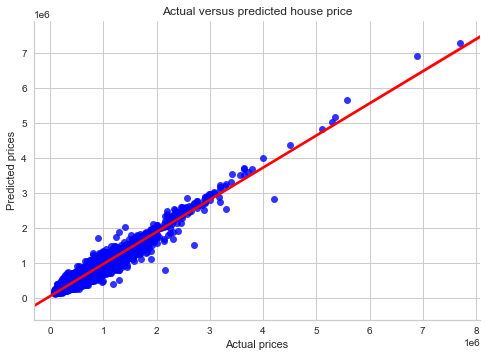

In [449]:
sns.regplot(x=y1_train, y=y_pred, data=house, truncate=False, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.despine(left = False, bottom = False)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual versus predicted house price');

### XGBoost: Inspecting residuals

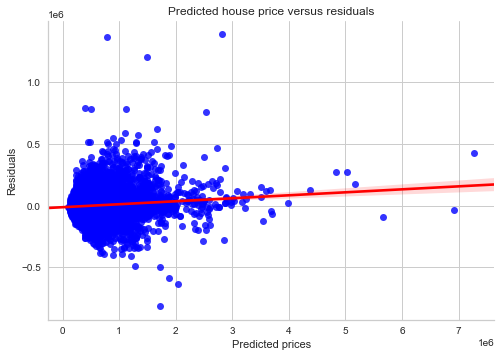

In [450]:
sns.regplot(x=y_pred, y=y_train-y_pred, data=house, truncate=False, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.despine(left = False, bottom = False)
plt.xlabel('Predicted prices')
plt.ylabel('Residuals')
plt.title('Predicted house price versus residuals')
plt.show();

### XGBoost: Checking normality of errors

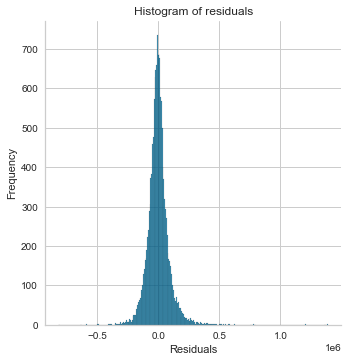

In [451]:
sns.displot(y1_train-y_pred)
plt.title('Histogram of residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show();

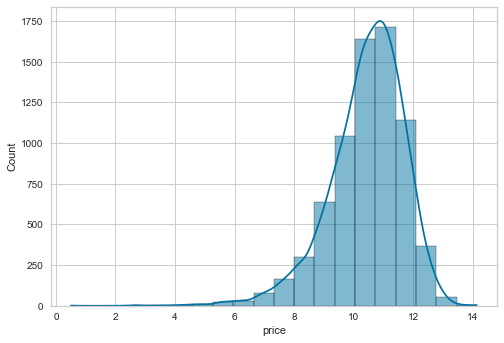

In [452]:
sns.histplot(np.log1p(y1_train-y_pred), bins=20, kde=True);

### XGBoost: Model evaluation

In [453]:
# Predicting test data with the model
y_test_pred = xregs.predict(X1_test_std)

In [457]:
y_test_pred

array([220115.25, 675279.9 , 532188.56, ..., 549291.44, 612289.1 ,
       495391.94], dtype=float32)

In [454]:
# Model evaluation
acc_xgbs = metrics.r2_score(y1_test, y_test_pred)
print('r^2:', acc_xgbs)
print('Adjusted r^2:', 1 - (1-acc_xgbs)*(len(y1_test)-1)/(len(y1_test)-X1_test_std.shape[1]-1))
print('Root mean squared error or RMSE:', np.sqrt(metrics.mean_squared_error(y1_test, y_test_pred)))
print('Mean absolute percentage error or MAPE:', metrics.mean_absolute_percentage_error(y1_test, y_test_pred))

r^2: 0.8080835517387697
Adjusted r^2: 0.8070418216380961
Root mean squared error or RMSE: 166867.45306724054
Mean absolute percentage error or MAPE: 0.17677506195663434


In [455]:
ar15t   = 1 - (1-acc_xgbs)*(len(y1_test)-1)/(len(y1_test)-X1_test_std.shape[1]-1)
RMSE15t = np.sqrt(metrics.mean_squared_error(y1_test, y_test_pred))
MAPE15t = metrics.mean_absolute_percentage_error(y1_test, y_test_pred)

In [456]:
# Models compared

models = pd.DataFrame({
    'Model': ['Linear regression', 'Random forest', 'XGBoost', 'Decision tree', 'Bagging', 'Gradient boost', 'XGBoost tuned',
             'Ridge', 'Lasso', 'Support vector', 'KNN', 'Elastic net', 'LR scaled', 'RF scaled',
             'XGB scaled'],
    'R-squared train': [r1*100, r2*100, r3*100, r4*100, r5*100, r6*100, r7*100,
                       r8*100, r9*100, r10*100, r11*100, r12*100, r13*100, r14*100,
                       r15*100],
    'R-squared test': [acc_linreg*100, acc_rf*100, acc_xgb*100, acc_dt*100, acc_bgr*100, acc_gbr*100, acc_xgbt*100,
                      acc_rid*100, acc_las*100, acc_svr*100, acc_knn*100, acc_en*100, acc_linregs*100, acc_rfs*100,
                      acc_xgbs*100],
    'Adjusted r^2 train': [ar1*100, ar2*100, ar3*100, ar4*100, ar5*100, ar6*100, ar7*100,
                          ar8*100, ar9*100, ar10*100, ar11*100, ar12*100, ar13*100, ar14*100, ar15*100],
    'Adjusted r^2 test': [ar1t*100, ar2t*100, ar3t*100, ar4t*100, ar5t*100, ar6t*100, ar7t*100,
                         ar8t*100, ar9t*100, ar10t*100, ar11t*100, ar12t*100, ar13t*100, ar14t*100, 
                          ar15t*100],
    'RMSE train': [RMSE1, RMSE2, RMSE3, RMSE4, RMSE5, RMSE6, RMSE7,
                  RMSE8, RMSE9, RMSE10, RMSE11, RMSE12, RMSE13, RMSE14, 
                   RMSE15],
    'RMSE test': [RMSE1t, RMSE2t, RMSE3t, RMSE4t, RMSE5t, RMSE6t, RMSE7t,
                 RMSE8t, RMSE9t, RMSE10t, RMSE11t, RMSE12t, RMSE13t, RMSE14t, 
                  RMSE15t],
    'MAPE train': [MAPE1*100, MAPE2*100, MAPE3*100, MAPE4*100, MAPE5*100, MAPE6*100, MAPE7*100,
                  MAPE8*100, MAPE9*100, MAPE10*100, MAPE11*100, MAPE12*100, MAPE13*100, MAPE14*100, 
                   MAPE15*100],
    'MAPE test': [MAPE1t*100, MAPE2t*100, MAPE3t*100, MAPE4t*100, MAPE5t*100, MAPE6t*100, MAPE7t*100,
                 MAPE8t*100, MAPE9t*100, MAPE10t*100, MAPE11t*100, MAPE12t*100, MAPE13t*100, MAPE14t*100,
                 MAPE15t*100]})
models.sort_values(by='R-squared test', ascending=False)

Model  R-squared train  R-squared test  Adjusted r^2 train  \
6       XGBoost tuned        91.377945       81.597213           91.367673   
2             XGBoost        94.046928       80.815587           94.039836   
14         XGB scaled        94.046928       80.808355           94.033123   
13          RF scaled        96.876027       80.243689           96.872306   
1       Random forest        96.799378       79.849331           96.795565   
4             Bagging        95.569198       78.732251           95.563919   
5      Gradient boost        78.748101       76.125344           78.722785   
10                KNN        99.901419       69.425183           99.901302   
3       Decision tree        99.901457       66.194141           99.901339   
0   Linear regression        62.735288       63.985875           62.690896   
12          LR scaled        62.735288       63.985875           62.690896   
8               Lasso        62.735288       63.985872           62.690896   
7               Ridge        62.735288       63.985833           62.690896   
11        Elastic net        62.531538       63.663790           62.486903   
9      Support vector        -5.585952       -5.055077           -5.711733   

    Adjusted r^2 test    RMSE train     RMSE test  MAPE train  MAPE test  
6           81.497322 106116.399784 163401.989883   14.431561  17.035787  
2           80.711453  88175.448577 166836.011069   12.933240  17.678436  
14          80.704182  88175.448577 166867.453067   12.933240  17.677506  
13          80.188683  63874.969840 169304.484358    6.613304  17.272223  
1           79.793227  64653.833797 170985.890579    6.634334  17.288556  
4           78.673037  76070.854405 175661.384969    7.456070  18.082261  
5           76.058872 166600.373692 186116.165598   20.453600  20.705725  
10          69.340056  11346.809687 210618.963505    0.286007  20.979356  
3           66.100018  11344.647799 221468.277568    0.285083  23.775299  
0           63.885604 220610.403879 228587.232400   24.434118  24.803116  
12          63.885604 220610.403879 228587.232400   24.434118  24.803116  
8           63.885601 220610.403880 228587.242060   24.434111  24.803109  
7           63.885562 220610.403936 228587.365746   24.434026  24.803032  
11          63.562622 221212.691532 229607.120150   24.330047  24.743568  
9           -5.347573 371347.217633 390412.811279   42.459051  43.341094

### Decision tree scaled

In [458]:
dt1= dt.fit(X_train_std, y_train)
dt1

DecisionTreeRegressor()

### Decision tree scaled: Model evaluation

In [459]:
# Model prediction on train set
y_pred = dt1.predict(X_train_std)

### Model evaluation

In [460]:
print('r^2:', metrics.r2_score(y_train, y_pred))
print('Adjusted r^2:', 1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train_std.shape[1]-1))
print('Root mean squared error or RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('Mean absolute percentage error or MAPE:', metrics.mean_absolute_percentage_error(y_train, y_pred))

r^2: 0.999014565353217
Adjusted r^2: 0.9990133914403353
Root mean squared error or RMSE: 11344.647799122395
Mean absolute percentage error or MAPE: 0.002850832910236522


In [461]:
r16    = metrics.r2_score(y_train, y_pred)
ar16   = 1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train_std.shape[1]-1)
RMSE16 = np.sqrt(metrics.mean_squared_error(y_train, y_pred))
MAPE16 = metrics.mean_absolute_percentage_error(y_train, y_pred)

### Decision tree scaled: Visualising the difference between actual and predicted house prices

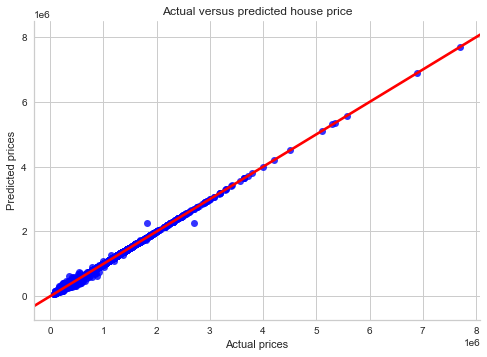

In [462]:
sns.regplot(x=y_train, y=y_pred, data=house, truncate=False, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.despine(left = False, bottom = False)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual versus predicted house price');

### Decision tree scaled: Checking residuals

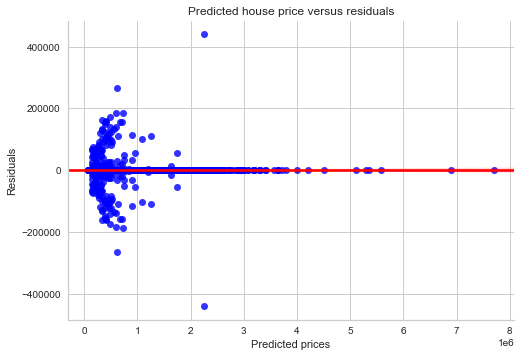

In [463]:
sns.regplot(x=y_pred, y=y_train-y_pred, data=house, truncate=False, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.despine(left = False, bottom = False)
plt.xlabel('Predicted prices')
plt.ylabel('Residuals')
plt.title('Predicted house price versus residuals')
plt.show();

### Decision tree scaled: Checking normality of errors

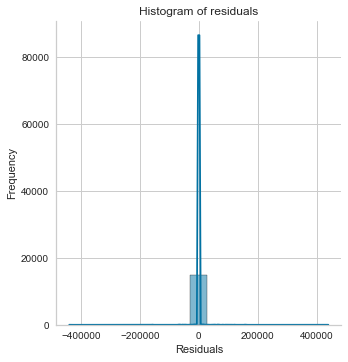

In [478]:
sns.displot(y_train-y_pred, kde=True)
plt.title('Histogram of residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show();

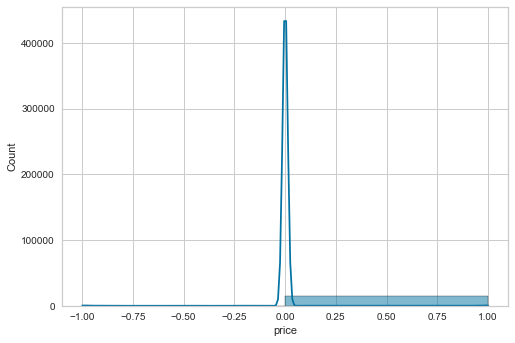

In [477]:
sns.histplot(np.sin(y_train-y_pred), bins=2, kde=True);

### Decision tree scaled: Predicting test data with the model

In [483]:
y_test_pred = dt1.predict(X_test_std)

In [484]:
y_test_pred

array([222000., 910000., 472000., ..., 705000., 607000., 517850.])

In [485]:
#Model evaluation
acc_dts = metrics.r2_score(y_test, y_test_pred)

In [486]:
print('r^2:', acc_dts)
print('Adjusted r^2:', 1 - (1-acc_dts)*(len(y_test)-1)/(len(y_test)-X_test_std.shape[1]-1))
print('Root mean squared error or RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('Mean absolute percentage error or MAPE:', metrics.mean_absolute_percentage_error(y_test, y_test_pred))

r^2: 0.6558814958645935
Adjusted r^2: 0.6549233933008756
Root mean squared error or RMSE: 223444.4395361564
Mean absolute percentage error or MAPE: 0.23884683985456692


In [487]:
ar16t   = 1 - (1-acc_dts)*(len(y_test)-1)/(len(y_test)-X_test_std.shape[1]-1)
RMSE16t = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
MAPE16t = metrics.mean_absolute_percentage_error(y_test, y_test_pred)

In [488]:
# Models compared

models = pd.DataFrame({
    'Model': ['Linear regression', 'Random forest', 'XGBoost', 'Decision tree', 'Bagging', 'Gradient boost', 'XGBoost tuned',
             'Ridge', 'Lasso', 'Support vector', 'KNN', 'Elastic net', 'LR scaled', 'RF scaled',
             'XGB scaled', 'DT scaled'],
    'R-squared train': [r1*100, r2*100, r3*100, r4*100, r5*100, r6*100, r7*100,
                       r8*100, r9*100, r10*100, r11*100, r12*100, r13*100, r14*100,
                       r15*100, r16*100],
    'R-squared test': [acc_linreg*100, acc_rf*100, acc_xgb*100, acc_dt*100, acc_bgr*100, acc_gbr*100, acc_xgbt*100,
                      acc_rid*100, acc_las*100, acc_svr*100, acc_knn*100, acc_en*100, acc_linregs*100, acc_rfs*100,
                      acc_xgbs*100, acc_dts*100],
    'Adjusted r^2 train': [ar1*100, ar2*100, ar3*100, ar4*100, ar5*100, ar6*100, ar7*100,
                          ar8*100, ar9*100, ar10*100, ar11*100, ar12*100, ar13*100, ar14*100, 
                           ar15*100, ar16*100],
    'Adjusted r^2 test': [ar1t*100, ar2t*100, ar3t*100, ar4t*100, ar5t*100, ar6t*100, ar7t*100,
                         ar8t*100, ar9t*100, ar10t*100, ar11t*100, ar12t*100, ar13t*100, ar14t*100, 
                          ar15t*100, ar16t*100],
    'RMSE train': [RMSE1, RMSE2, RMSE3, RMSE4, RMSE5, RMSE6, RMSE7,
                  RMSE8, RMSE9, RMSE10, RMSE11, RMSE12, RMSE13, RMSE14, 
                   RMSE15, RMSE16],
    'RMSE test': [RMSE1t, RMSE2t, RMSE3t, RMSE4t, RMSE5t, RMSE6t, RMSE7t,
                 RMSE8t, RMSE9t, RMSE10t, RMSE11t, RMSE12t, RMSE13t, RMSE14t, 
                  RMSE15t, RMSE16t],
    'MAPE train': [MAPE1*100, MAPE2*100, MAPE3*100, MAPE4*100, MAPE5*100, MAPE6*100, MAPE7*100,
                  MAPE8*100, MAPE9*100, MAPE10*100, MAPE11*100, MAPE12*100, MAPE13*100, MAPE14*100, 
                   MAPE15*100, MAPE16*100,],
    'MAPE test': [MAPE1t*100, MAPE2t*100, MAPE3t*100, MAPE4t*100, MAPE5t*100, MAPE6t*100, MAPE7t*100,
                 MAPE8t*100, MAPE9t*100, MAPE10t*100, MAPE11t*100, MAPE12t*100, MAPE13t*100, MAPE14t*100,
                 MAPE15t*100, MAPE16t*100]})
models.sort_values(by='R-squared test', ascending=False)

Model  R-squared train  R-squared test  Adjusted r^2 train  \
6       XGBoost tuned        91.377945       81.597213           91.367673   
2             XGBoost        94.046928       80.815587           94.039836   
14         XGB scaled        94.046928       80.808355           94.033123   
13          RF scaled        96.876027       80.243689           96.872306   
1       Random forest        96.799378       79.849331           96.795565   
4             Bagging        95.569198       78.732251           95.563919   
5      Gradient boost        78.748101       76.125344           78.722785   
10                KNN        99.901419       69.425183           99.901302   
3       Decision tree        99.901457       66.194141           99.901339   
15          DT scaled        99.901457       65.588150           99.901339   
0   Linear regression        62.735288       63.985875           62.690896   
12          LR scaled        62.735288       63.985875           62.690896   
8               Lasso        62.735288       63.985872           62.690896   
7               Ridge        62.735288       63.985833           62.690896   
11        Elastic net        62.531538       63.663790           62.486903   
9      Support vector        -5.585952       -5.055077           -5.711733   

    Adjusted r^2 test    RMSE train     RMSE test  MAPE train  MAPE test  
6           81.497322 106116.399784 163401.989883   14.431561  17.035787  
2           80.711453  88175.448577 166836.011069   12.933240  17.678436  
14          80.704182  88175.448577 166867.453067   12.933240  17.677506  
13          80.188683  63874.969840 169304.484358    6.613304  17.272223  
1           79.793227  64653.833797 170985.890579    6.634334  17.288556  
4           78.673037  76070.854405 175661.384969    7.456070  18.082261  
5           76.058872 166600.373692 186116.165598   20.453600  20.705725  
10          69.340056  11346.809687 210618.963505    0.286007  20.979356  
3           66.100018  11344.647799 221468.277568    0.285083  23.775299  
15          65.492339  11344.647799 223444.439536    0.285083  23.884684  
0           63.885604 220610.403879 228587.232400   24.434118  24.803116  
12          63.885604 220610.403879 228587.232400   24.434118  24.803116  
8           63.885601 220610.403880 228587.242060   24.434111  24.803109  
7           63.885562 220610.403936 228587.365746   24.434026  24.803032  
11          63.562622 221212.691532 229607.120150   24.330047  24.743568  
9           -5.347573 371347.217633 390412.811279   42.459051  43.341094

### Bagging scaled

In [489]:
bgr1= bgr.fit(X_train_std, y_train)
bgr1

BaggingRegressor()

### Bagging scaled: Model evaluation

In [490]:
# Model prediction on train set
y_pred = bgr1.predict(X_train_std)

In [491]:
# Model evaluation

print('r^2:', metrics.r2_score(y_train, y_pred))
print('Adjusted r^2:', 1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train_std.shape[1]-1))
print('Root mean squared error or RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('Mean absolute percentage error or MAPE:', metrics.mean_absolute_percentage_error(y_train, y_pred))

r^2: 0.9594069323096693
Adjusted r^2: 0.9593585752469013
Root mean squared error or RMSE: 72812.01338308836
Mean absolute percentage error or MAPE: 0.0744497213786455


In [492]:
r17    = metrics.r2_score(y_train, y_pred)
ar17   = 1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train_std.shape[1]-1)
RMSE17 = np.sqrt(metrics.mean_squared_error(y_train, y_pred))
MAPE17 = metrics.mean_absolute_percentage_error(y_train, y_pred)

### Bagging scaled: Visualising the difference between actual and predicted house prices

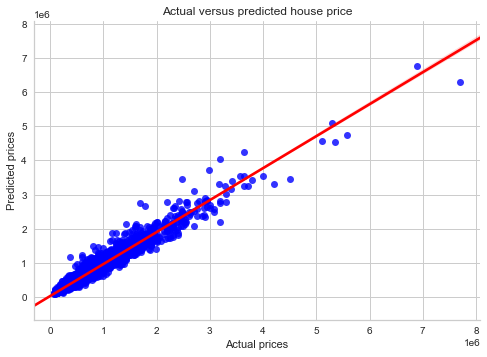

In [493]:
sns.regplot(x=y_train, y=y_pred, data=house, truncate=False, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.despine(left = False, bottom = False)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual versus predicted house price');

### Bagging scaled: Checking residuals

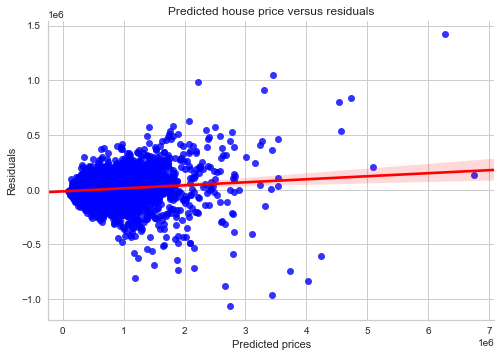

In [494]:
sns.regplot(x=y_pred, y=y_train-y_pred, data=house, truncate=False, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.despine(left = False, bottom = False)
plt.xlabel('Predicted prices')
plt.ylabel('Residuals')
plt.title('Predicted house price versus residuals')
plt.show();

### Bagging scaled: Checking normality of errors

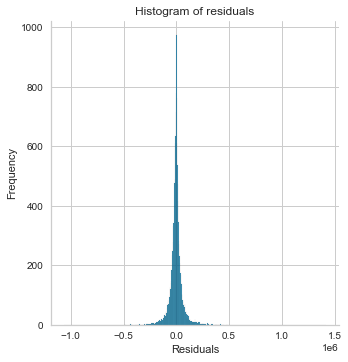

In [495]:
sns.displot(y_train-y_pred)
plt.title('Histogram of residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show();

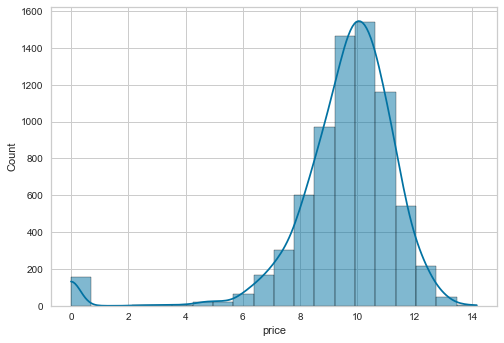

In [501]:
sns.histplot(np.log1p(y_train-y_pred), bins=20, kde=True);

### Bagging scaled: Predicting test data with the model

In [502]:
y_test_pred = bgr1.predict(X_test_std)

In [503]:
y_test_pred

array([233575. , 767999.5, 522280. , ..., 594300. , 628260. , 532285. ])

In [504]:
#Model evaluation
acc_bgrs = metrics.r2_score(y_test, y_test_pred)

print('r^2:', acc_bgrs)
print('Adjusted r^2:', 1 - (1-acc_bgrs)*(len(y_test)-1)/(len(y_test)-X_test_std.shape[1]-1))
print('Root mean squared error or RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('Mean absolute percentage error or MAPE:', metrics.mean_absolute_percentage_error(y_test, y_test_pred))

r^2: 0.7943997305628357
Adjusted r^2: 0.793827293617767
Root mean squared error or RMSE: 172713.93467947657
Mean absolute percentage error or MAPE: 0.18318549321672964


In [505]:
ar17t   = 1 - (1-acc_bgrs)*(len(y_test)-1)/(len(y_test)-X_test_std.shape[1]-1)
RMSE17t = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
MAPE17t = metrics.mean_absolute_percentage_error(y_test, y_test_pred)

In [506]:
# Models compared

models = pd.DataFrame({
    'Model': ['Linear regression', 'Random forest', 'XGBoost', 'Decision tree', 'Bagging', 'Gradient boost', 'XGBoost tuned',
             'Ridge', 'Lasso', 'Support vector', 'KNN', 'Elastic net', 'LR scaled', 'RF scaled',
             'XGB scaled', 'DT scaled', 'Bagging scaled'],
    'R-squared train': [r1*100, r2*100, r3*100, r4*100, r5*100, r6*100, r7*100,
                       r8*100, r9*100, r10*100, r11*100, r12*100, r13*100, r14*100,
                       r15*100, r16*100, r17*100],
    'R-squared test': [acc_linreg*100, acc_rf*100, acc_xgb*100, acc_dt*100, acc_bgr*100, acc_gbr*100, acc_xgbt*100,
                      acc_rid*100, acc_las*100, acc_svr*100, acc_knn*100, acc_en*100, acc_linregs*100, acc_rfs*100,
                      acc_xgbs*100, acc_dts*100, acc_bgrs*100],
    'Adjusted r^2 train': [ar1*100, ar2*100, ar3*100, ar4*100, ar5*100, ar6*100, ar7*100,
                          ar8*100, ar9*100, ar10*100, ar11*100, ar12*100, ar13*100, ar14*100, 
                           ar15*100, ar16*100, ar17*100],
    'Adjusted r^2 test': [ar1t*100, ar2t*100, ar3t*100, ar4t*100, ar5t*100, ar6t*100, ar7t*100,
                         ar8t*100, ar9t*100, ar10t*100, ar11t*100, ar12t*100, ar13t*100, ar14t*100, 
                          ar15t*100, ar16t*100, ar17t*100],
    'RMSE train': [RMSE1, RMSE2, RMSE3, RMSE4, RMSE5, RMSE6, RMSE7,
                  RMSE8, RMSE9, RMSE10, RMSE11, RMSE12, RMSE13, RMSE14, 
                   RMSE15, RMSE16, RMSE17],
    'RMSE test': [RMSE1t, RMSE2t, RMSE3t, RMSE4t, RMSE5t, RMSE6t, RMSE7t,
                 RMSE8t, RMSE9t, RMSE10t, RMSE11t, RMSE12t, RMSE13t, RMSE14t, 
                  RMSE15t, RMSE16t, RMSE17t],
    'MAPE train': [MAPE1*100, MAPE2*100, MAPE3*100, MAPE4*100, MAPE5*100, MAPE6*100, MAPE7*100,
                  MAPE8*100, MAPE9*100, MAPE10*100, MAPE11*100, MAPE12*100, MAPE13*100, MAPE14*100, 
                   MAPE15*100, MAPE16*100, MAPE17*100,],
    'MAPE test': [MAPE1t*100, MAPE2t*100, MAPE3t*100, MAPE4t*100, MAPE5t*100, MAPE6t*100, MAPE7t*100,
                 MAPE8t*100, MAPE9t*100, MAPE10t*100, MAPE11t*100, MAPE12t*100, MAPE13t*100, MAPE14t*100,
                 MAPE15t*100, MAPE16t*100, MAPE17t*100]})
models.sort_values(by='R-squared test', ascending=False)

Model  R-squared train  R-squared test  Adjusted r^2 train  \
6       XGBoost tuned        91.377945       81.597213           91.367673   
2             XGBoost        94.046928       80.815587           94.039836   
14         XGB scaled        94.046928       80.808355           94.033123   
13          RF scaled        96.876027       80.243689           96.872306   
1       Random forest        96.799378       79.849331           96.795565   
16     Bagging scaled        95.940693       79.439973           95.935858   
4             Bagging        95.569198       78.732251           95.563919   
5      Gradient boost        78.748101       76.125344           78.722785   
10                KNN        99.901419       69.425183           99.901302   
3       Decision tree        99.901457       66.194141           99.901339   
15          DT scaled        99.901457       65.588150           99.901339   
0   Linear regression        62.735288       63.985875           62.690896   
12          LR scaled        62.735288       63.985875           62.690896   
8               Lasso        62.735288       63.985872           62.690896   
7               Ridge        62.735288       63.985833           62.690896   
11        Elastic net        62.531538       63.663790           62.486903   
9      Support vector        -5.585952       -5.055077           -5.711733   

    Adjusted r^2 test    RMSE train     RMSE test  MAPE train  MAPE test  
6           81.497322 106116.399784 163401.989883   14.431561  17.035787  
2           80.711453  88175.448577 166836.011069   12.933240  17.678436  
14          80.704182  88175.448577 166867.453067   12.933240  17.677506  
13          80.188683  63874.969840 169304.484358    6.613304  17.272223  
1           79.793227  64653.833797 170985.890579    6.634334  17.288556  
16          79.382729  72812.013383 172713.934679    7.444972  18.318549  
4           78.673037  76070.854405 175661.384969    7.456070  18.082261  
5           76.058872 166600.373692 186116.165598   20.453600  20.705725  
10          69.340056  11346.809687 210618.963505    0.286007  20.979356  
3           66.100018  11344.647799 221468.277568    0.285083  23.775299  
15          65.492339  11344.647799 223444.439536    0.285083  23.884684  
0           63.885604 220610.403879 228587.232400   24.434118  24.803116  
12          63.885604 220610.403879 228587.232400   24.434118  24.803116  
8           63.885601 220610.403880 228587.242060   24.434111  24.803109  
7           63.885562 220610.403936 228587.365746   24.434026  24.803032  
11          63.562622 221212.691532 229607.120150   24.330047  24.743568  
9           -5.347573 371347.217633 390412.811279   42.459051  43.341094

### Gradient Boost scaled

In [507]:
gbr1= gbr.fit(X_train_std, y_train)
gbr1

GradientBoostingRegressor(n_estimators=50)

### Gradient Boost scaled: Model evaluation

In [508]:
# Model prediction on train set
y_pred = gbr1.predict(X_train_std)

In [509]:
# Model evaluation

In [510]:
print('r^2:', metrics.r2_score(y_train, y_pred))
print('Adjusted r^2:', 1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train_std.shape[1]-1))
print('Root mean squared error or RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('Mean absolute percentage error or MAPE:', metrics.mean_absolute_percentage_error(y_train, y_pred))

r^2: 0.7874810140823862
Adjusted r^2: 0.7872278478516439
Root mean squared error or RMSE: 166600.37369182028
Mean absolute percentage error or MAPE: 0.20453600225516577


In [511]:
r18    = metrics.r2_score(y_train, y_pred)
ar18   = 1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train_std.shape[1]-1)
RMSE18 = np.sqrt(metrics.mean_squared_error(y_train, y_pred))
MAPE18 = metrics.mean_absolute_percentage_error(y_train, y_pred)

### Gradient Boost scaled: Visualising the difference between actual and predicted house prices

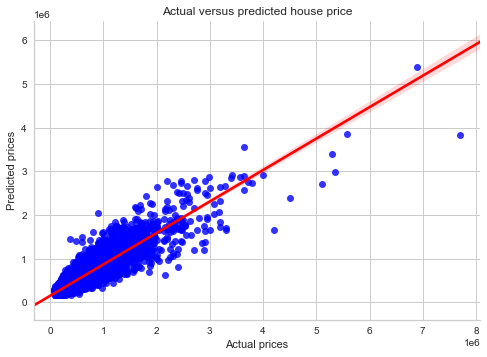

In [512]:
sns.regplot(x=y_train, y=y_pred, data=house, truncate=False, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.despine(left = False, bottom = False)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual versus predicted house price');

### Gradient Boost scaled: Checking residuals

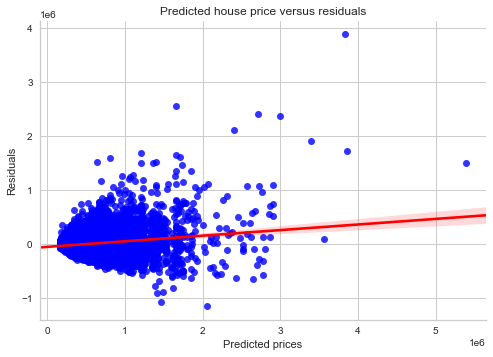

In [513]:
sns.regplot(x=y_pred, y=y_train-y_pred, data=house, truncate=False, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.despine(left = False, bottom = False)
plt.xlabel('Predicted prices')
plt.ylabel('Residuals')
plt.title('Predicted house price versus residuals')
plt.show();

### Gradient Boost scaled: Checking normality of errors

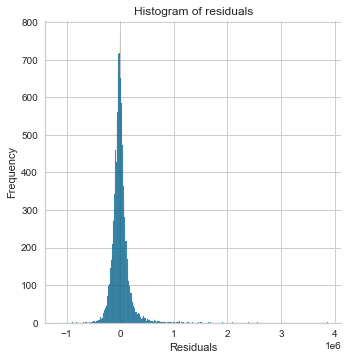

In [514]:
sns.displot(y_train-y_pred)
plt.title('Histogram of residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show();

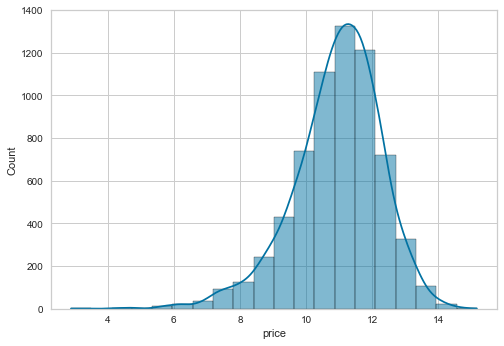

In [515]:
sns.histplot(np.log1p(y_train-y_pred), bins=20, kde=True);

### Gradient Boost scaled: Predicting test data with the model

In [516]:
y_test_pred = gbr1.predict(X_test_std)

In [517]:
y_test_pred

array([247906.40931035, 700787.48633888, 564975.14307358, ...,
       544619.5001364 , 515162.9989759 , 635527.08772533])

In [518]:
# Model evaluation
acc_gbrs = metrics.r2_score(y_test, y_test_pred)

print('r^2:', acc_gbrs)
print('Adjusted r^2:', 1 - (1-acc_gbrs)*(len(y_test)-1)/(len(y_test)-X_test_std.shape[1]-1))
print('Root mean squared error or RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('Mean absolute percentage error or MAPE:', metrics.mean_absolute_percentage_error(y_test, y_test_pred))

r^2: 0.7611685145817534
Adjusted r^2: 0.7605035545295449
Root mean squared error or RMSE: 186149.26608629737
Mean absolute percentage error or MAPE: 0.20706332644643013


In [519]:
ar18t   = 1 - (1-acc_gbrs)*(len(y_test)-1)/(len(y_test)-X_test_std.shape[1]-1)
RMSE18t = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
MAPE18t = metrics.mean_absolute_percentage_error(y_test, y_test_pred)

In [520]:
# Models compared

models = pd.DataFrame({
    'Model': ['Linear regression', 'Random forest', 'XGBoost', 'Decision tree', 'Bagging', 'Gradient boost', 'XGBoost tuned',
             'Ridge', 'Lasso', 'Support vector', 'KNN', 'Elastic net', 'LR scaled', 'RF scaled',
             'XGB scaled', 'DT scaled', 'Bagging scaled', 'GBR scaled'],
    'R-squared train': [r1*100, r2*100, r3*100, r4*100, r5*100, r6*100, r7*100,
                       r8*100, r9*100, r10*100, r11*100, r12*100, r13*100, r14*100,
                       r15*100, r16*100, r17*100, r18*100],
    'R-squared test': [acc_linreg*100, acc_rf*100, acc_xgb*100, acc_dt*100, acc_bgr*100, acc_gbr*100, acc_xgbt*100,
                      acc_rid*100, acc_las*100, acc_svr*100, acc_knn*100, acc_en*100, acc_linregs*100, acc_rfs*100,
                      acc_xgbs*100, acc_dts*100, acc_bgrs*100, acc_gbrs*100],
    'Adjusted r^2 train': [ar1*100, ar2*100, ar3*100, ar4*100, ar5*100, ar6*100, ar7*100,
                          ar8*100, ar9*100, ar10*100, ar11*100, ar12*100, ar13*100, ar14*100, 
                           ar15*100, ar16*100, ar17*100, ar18*100],
    'Adjusted r^2 test': [ar1t*100, ar2t*100, ar3t*100, ar4t*100, ar5t*100, ar6t*100, ar7t*100,
                         ar8t*100, ar9t*100, ar10t*100, ar11t*100, ar12t*100, ar13t*100, ar14t*100, 
                          ar15t*100, ar16t*100, ar17t*100, ar18t*100],
    'RMSE train': [RMSE1, RMSE2, RMSE3, RMSE4, RMSE5, RMSE6, RMSE7,
                  RMSE8, RMSE9, RMSE10, RMSE11, RMSE12, RMSE13, RMSE14, 
                   RMSE15, RMSE16, RMSE17, RMSE18],
    'RMSE test': [RMSE1t, RMSE2t, RMSE3t, RMSE4t, RMSE5t, RMSE6t, RMSE7t,
                 RMSE8t, RMSE9t, RMSE10t, RMSE11t, RMSE12t, RMSE13t, RMSE14t, 
                  RMSE15t, RMSE16t, RMSE17t, RMSE18t],
    'MAPE train': [MAPE1*100, MAPE2*100, MAPE3*100, MAPE4*100, MAPE5*100, MAPE6*100, MAPE7*100,
                  MAPE8*100, MAPE9*100, MAPE10*100, MAPE11*100, MAPE12*100, MAPE13*100, MAPE14*100, 
                   MAPE15*100, MAPE16*100, MAPE17*100, MAPE18*100],
    'MAPE test': [MAPE1t*100, MAPE2t*100, MAPE3t*100, MAPE4t*100, MAPE5t*100, MAPE6t*100, MAPE7t*100,
                 MAPE8t*100, MAPE9t*100, MAPE10t*100, MAPE11t*100, MAPE12t*100, MAPE13t*100, MAPE14t*100,
                 MAPE15t*100, MAPE16t*100, MAPE17t*100,MAPE18t*100]})
models.sort_values(by='R-squared test', ascending=False)

Model  R-squared train  R-squared test  Adjusted r^2 train  \
6       XGBoost tuned        91.377945       81.597213           91.367673   
2             XGBoost        94.046928       80.815587           94.039836   
14         XGB scaled        94.046928       80.808355           94.033123   
13          RF scaled        96.876027       80.243689           96.872306   
1       Random forest        96.799378       79.849331           96.795565   
16     Bagging scaled        95.940693       79.439973           95.935858   
4             Bagging        95.569198       78.732251           95.563919   
5      Gradient boost        78.748101       76.125344           78.722785   
17         GBR scaled        78.748101       76.116851           78.722785   
10                KNN        99.901419       69.425183           99.901302   
3       Decision tree        99.901457       66.194141           99.901339   
15          DT scaled        99.901457       65.588150           99.901339   
0   Linear regression        62.735288       63.985875           62.690896   
12          LR scaled        62.735288       63.985875           62.690896   
8               Lasso        62.735288       63.985872           62.690896   
7               Ridge        62.735288       63.985833           62.690896   
11        Elastic net        62.531538       63.663790           62.486903   
9      Support vector        -5.585952       -5.055077           -5.711733   

    Adjusted r^2 test    RMSE train     RMSE test  MAPE train  MAPE test  
6           81.497322 106116.399784 163401.989883   14.431561  17.035787  
2           80.711453  88175.448577 166836.011069   12.933240  17.678436  
14          80.704182  88175.448577 166867.453067   12.933240  17.677506  
13          80.188683  63874.969840 169304.484358    6.613304  17.272223  
1           79.793227  64653.833797 170985.890579    6.634334  17.288556  
16          79.382729  72812.013383 172713.934679    7.444972  18.318549  
4           78.673037  76070.854405 175661.384969    7.456070  18.082261  
5           76.058872 166600.373692 186116.165598   20.453600  20.705725  
17          76.050355 166600.373692 186149.266086   20.453600  20.706333  
10          69.340056  11346.809687 210618.963505    0.286007  20.979356  
3           66.100018  11344.647799 221468.277568    0.285083  23.775299  
15          65.492339  11344.647799 223444.439536    0.285083  23.884684  
0           63.885604 220610.403879 228587.232400   24.434118  24.803116  
12          63.885604 220610.403879 228587.232400   24.434118  24.803116  
8           63.885601 220610.403880 228587.242060   24.434111  24.803109  
7           63.885562 220610.403936 228587.365746   24.434026  24.803032  
11          63.562622 221212.691532 229607.120150   24.330047  24.743568  
9           -5.347573 371347.217633 390412.811279   42.459051  43.341094

### XGBoost tuned scaled

In [521]:
xgbt1 = xgbt.fit(X1_train_std, y1_train)
xgbt1

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
             tree_method='exact', validate_parameters=1, verbosity=None)

### XGBoost tuned scaled: Model Prediction on train data

In [522]:
y_pred = xgbt1.predict(X1_train_std)

In [523]:
print('r^2:', metrics.r2_score(y1_train, y_pred))
print('Adjusted r^2:', 1 - (1-metrics.r2_score(y1_train, y_pred))*(len(y1_train)-1)/(len(y1_train)-X1_train_std.shape[1]-1))
print('Root mean squared error or RMSE:', np.sqrt(metrics.mean_squared_error(y1_train, y_pred)))
print('Mean absolute percentage error or MAPE:', metrics.mean_absolute_percentage_error(y1_train, y_pred))

r^2: 0.9136373498833467
Adjusted r^2: 0.9134370787143224
Root mean squared error or RMSE: 106203.80681264914
Mean absolute percentage error or MAPE: 0.14443566085297666


In [524]:
r19    = metrics.r2_score(y1_train, y_pred)
ar19   = 1 - (1-metrics.r2_score(y1_train, y_pred))*(len(y1_train)-1)/(len(y1_train)-X1_train_std.shape[1]-1)
RMSE19 = np.sqrt(metrics.mean_squared_error(y1_train, y_pred))
MAPE19 = metrics.mean_absolute_percentage_error(y1_train, y_pred)

### XGBoost tuned scaled: Visualising the differencce between actual and predicted prices

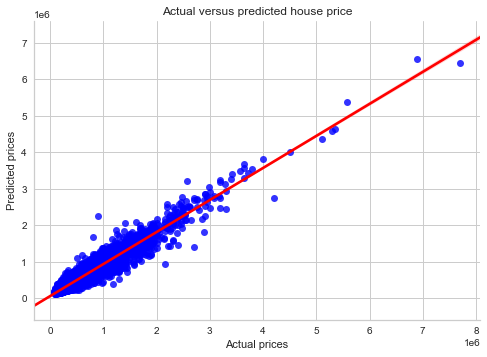

In [525]:
sns.regplot(x=y1_train, y=y_pred, data=house, truncate=False, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.despine(left = False, bottom = False)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual versus predicted house price');

### XGBoost tuned scaled: Inspecting residuals

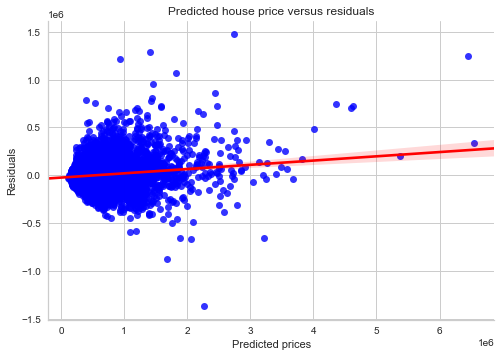

In [526]:
sns.regplot(x=y_pred, y=y_train-y_pred, data=house, truncate=False, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.despine(left = False, bottom = False)
plt.xlabel('Predicted prices')
plt.ylabel('Residuals')
plt.title('Predicted house price versus residuals')
plt.show();

### XGBoost: Checking normality of errors

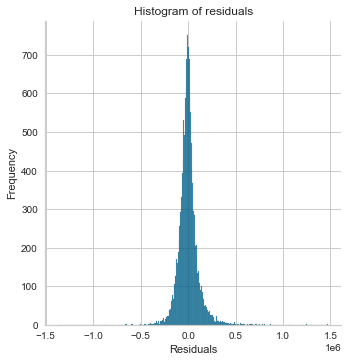

In [527]:
sns.displot(y1_train-y_pred)
plt.title('Histogram of residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show();

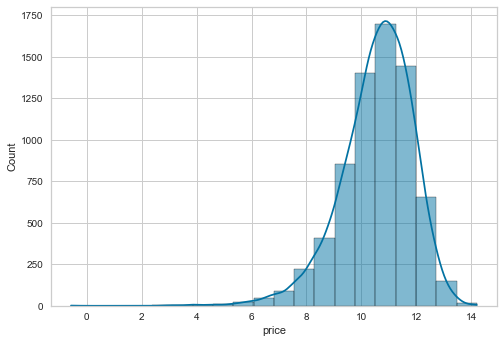

In [530]:
sns.histplot(np.log1p(y1_train-y_pred), bins=20, kde=True);

### XGBoost: Model evaluation

In [531]:
# Predicting test data with the model
y_test_pred = xgbt1.predict(X1_test_std)

In [532]:
y_test_pred

array([215909.02, 840401.56, 515706.44, ..., 543231.56, 574695.06,
       540054.6 ], dtype=float32)

In [533]:
# Model evaluation
acc_xgbts = metrics.r2_score(y1_test, y_test_pred)
print('r^2:', acc_xgbts)
print('Adjusted r^2:', 1 - (1-acc_xgbts)*(len(y1_test)-1)/(len(y1_test)-X1_test_std.shape[1]-1))
print('Root mean squared error or RMSE:', np.sqrt(metrics.mean_squared_error(y1_test, y_test_pred)))
print('Mean absolute percentage error or MAPE:', metrics.mean_absolute_percentage_error(y1_test, y_test_pred))

r^2: 0.8161917488058963
Adjusted r^2: 0.8151940303208166
Root mean squared error or RMSE: 163304.45776926583
Mean absolute percentage error or MAPE: 0.17030197582140608


In [534]:
ar19t   = 1 - (1-acc_xgbts)*(len(y1_test)-1)/(len(y1_test)-X1_test_std.shape[1]-1)
RMSE19t = np.sqrt(metrics.mean_squared_error(y1_test, y_test_pred))
MAPE19t = metrics.mean_absolute_percentage_error(y1_test, y_test_pred)

In [535]:
# Models compared

models = pd.DataFrame({
    'Model': ['Linear regression', 'Random forest', 'XGBoost', 'Decision tree', 'Bagging', 'Gradient boost', 'XGBoost tuned',
             'Ridge', 'Lasso', 'Support vector', 'KNN', 'Elastic net', 'LR scaled', 'RF scaled',
             'XGB scaled', 'DT scaled', 'Bagging scaled', 'GBR scaled', 'XGB tuned scaled'],
    'R-squared train': [r1*100, r2*100, r3*100, r4*100, r5*100, r6*100, r7*100,
                       r8*100, r9*100, r10*100, r11*100, r12*100, r13*100, r14*100,
                       r15*100, r16*100, r17*100, r18*100, r19*100],
    'R-squared test': [acc_linreg*100, acc_rf*100, acc_xgb*100, acc_dt*100, acc_bgr*100, acc_gbr*100, acc_xgbt*100,
                      acc_rid*100, acc_las*100, acc_svr*100, acc_knn*100, acc_en*100, acc_linregs*100, acc_rfs*100,
                      acc_xgbs*100, acc_dts*100, acc_bgrs*100, acc_gbrs*100, acc_xgbts*100],
    'Adjusted r^2 train': [ar1*100, ar2*100, ar3*100, ar4*100, ar5*100, ar6*100, ar7*100,
                          ar8*100, ar9*100, ar10*100, ar11*100, ar12*100, ar13*100, ar14*100, 
                           ar15*100, ar16*100, ar17*100, ar18*100, ar19*100],
    'Adjusted r^2 test': [ar1t*100, ar2t*100, ar3t*100, ar4t*100, ar5t*100, ar6t*100, ar7t*100,
                         ar8t*100, ar9t*100, ar10t*100, ar11t*100, ar12t*100, ar13t*100, ar14t*100, 
                          ar15t*100, ar16t*100, ar17t*100, ar18t*100, ar19t*100],
    'RMSE train': [RMSE1, RMSE2, RMSE3, RMSE4, RMSE5, RMSE6, RMSE7,
                  RMSE8, RMSE9, RMSE10, RMSE11, RMSE12, RMSE13, RMSE14, 
                   RMSE15, RMSE16, RMSE17, RMSE18, RMSE19],
    'RMSE test': [RMSE1t, RMSE2t, RMSE3t, RMSE4t, RMSE5t, RMSE6t, RMSE7t,
                 RMSE8t, RMSE9t, RMSE10t, RMSE11t, RMSE12t, RMSE13t, RMSE14t, 
                  RMSE15t, RMSE16t, RMSE17t, RMSE18t, RMSE19t],
    'MAPE train': [MAPE1*100, MAPE2*100, MAPE3*100, MAPE4*100, MAPE5*100, MAPE6*100, MAPE7*100,
                  MAPE8*100, MAPE9*100, MAPE10*100, MAPE11*100, MAPE12*100, MAPE13*100, MAPE14*100, 
                   MAPE15*100, MAPE16*100, MAPE17*100, MAPE18*100, MAPE19*100],
    'MAPE test': [MAPE1t*100, MAPE2t*100, MAPE3t*100, MAPE4t*100, MAPE5t*100, MAPE6t*100, MAPE7t*100,
                 MAPE8t*100, MAPE9t*100, MAPE10t*100, MAPE11t*100, MAPE12t*100, MAPE13t*100, MAPE14t*100,
                 MAPE15t*100, MAPE16t*100, MAPE17t*100,MAPE18t*100, MAPE19t*100]})
models.sort_values(by='R-squared test', ascending=False)

Model  R-squared train  R-squared test  Adjusted r^2 train  \
18   XGB tuned scaled        91.363735       81.619175           91.343708   
6       XGBoost tuned        91.377945       81.597213           91.367673   
2             XGBoost        94.046928       80.815587           94.039836   
14         XGB scaled        94.046928       80.808355           94.033123   
13          RF scaled        96.876027       80.243689           96.872306   
1       Random forest        96.799378       79.849331           96.795565   
16     Bagging scaled        95.940693       79.439973           95.935858   
4             Bagging        95.569198       78.732251           95.563919   
5      Gradient boost        78.748101       76.125344           78.722785   
17         GBR scaled        78.748101       76.116851           78.722785   
10                KNN        99.901419       69.425183           99.901302   
3       Decision tree        99.901457       66.194141           99.901339   
15          DT scaled        99.901457       65.588150           99.901339   
0   Linear regression        62.735288       63.985875           62.690896   
12          LR scaled        62.735288       63.985875           62.690896   
8               Lasso        62.735288       63.985872           62.690896   
7               Ridge        62.735288       63.985833           62.690896   
11        Elastic net        62.531538       63.663790           62.486903   
9      Support vector        -5.585952       -5.055077           -5.711733   

    Adjusted r^2 test    RMSE train     RMSE test  MAPE train  MAPE test  
18          81.519403 106203.806813 163304.457769   14.443566  17.030198  
6           81.497322 106116.399784 163401.989883   14.431561  17.035787  
2           80.711453  88175.448577 166836.011069   12.933240  17.678436  
14          80.704182  88175.448577 166867.453067   12.933240  17.677506  
13          80.188683  63874.969840 169304.484358    6.613304  17.272223  
1           79.793227  64653.833797 170985.890579    6.634334  17.288556  
16          79.382729  72812.013383 172713.934679    7.444972  18.318549  
4           78.673037  76070.854405 175661.384969    7.456070  18.082261  
5           76.058872 166600.373692 186116.165598   20.453600  20.705725  
17          76.050355 166600.373692 186149.266086   20.453600  20.706333  
10          69.340056  11346.809687 210618.963505    0.286007  20.979356  
3           66.100018  11344.647799 221468.277568    0.285083  23.775299  
15          65.492339  11344.647799 223444.439536    0.285083  23.884684  
0           63.885604 220610.403879 228587.232400   24.434118  24.803116  
12          63.885604 220610.403879 228587.232400   24.434118  24.803116  
8           63.885601 220610.403880 228587.242060   24.434111  24.803109  
7           63.885562 220610.403936 228587.365746   24.434026  24.803032  
11          63.562622 221212.691532 229607.120150   24.330047  24.743568  
9           -5.347573 371347.217633 390412.811279   42.459051  43.341094

### Ridge scaled

In [536]:
ridge1= ridge.fit(X_train_std, y_train)
ridge1

Ridge(alpha=0.3)

### Ridge scaled: Model evaluation

In [537]:
# Model prediction on train set
y_pred = ridge1.predict(X_train_std)

In [538]:
# Model evaluation

In [539]:
print('r^2:', metrics.r2_score(y_train, y_pred))
print('Adjusted r^2:', 1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train_std.shape[1]-1))
print('Root mean squared error or RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('Mean absolute percentage error or MAPE:', metrics.mean_absolute_percentage_error(y_train, y_pred))

r^2: 0.627352877411266
Adjusted r^2: 0.6269089562857466
Root mean squared error or RMSE: 220610.40394682676
Mean absolute percentage error or MAPE: 0.24433931695632244


In [540]:
r20    = metrics.r2_score(y_train, y_pred)
ar20   = 1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train_std.shape[1]-1)
RMSE20 = np.sqrt(metrics.mean_squared_error(y_train, y_pred))
MAPE20 = metrics.mean_absolute_percentage_error(y_train, y_pred)

### Ridge scaled: Visualising the difference between actual and predicted house prices

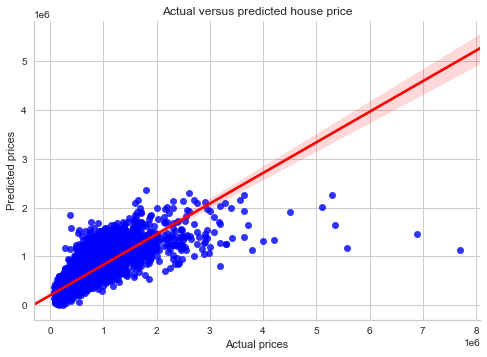

In [541]:
sns.regplot(x=y_train, y=y_pred, data=house, truncate=False, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.despine(left = False, bottom = False)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual versus predicted house price');

### Ridge scaled: Checking residuals

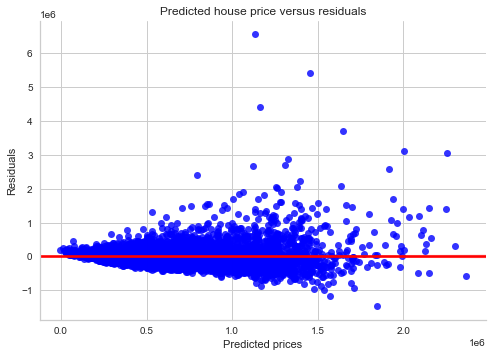

In [542]:
sns.regplot(x=y_pred, y=y_train-y_pred, data=house, truncate=False, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.despine(left = False, bottom = False)
plt.xlabel('Predicted prices')
plt.ylabel('Residuals')
plt.title('Predicted house price versus residuals')
plt.show();

### Ridge scaled: Checking normality of errors

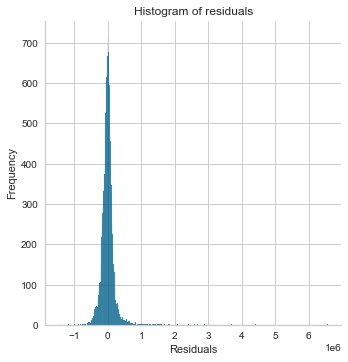

In [543]:
sns.displot(y_train-y_pred)
plt.title('Histogram of residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show();

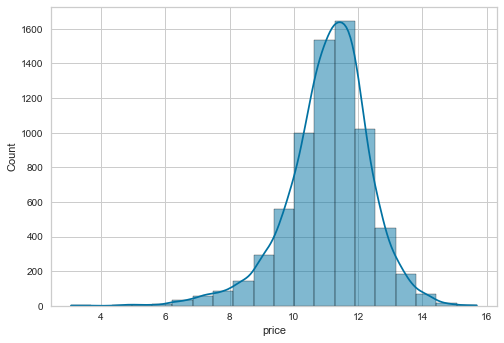

In [549]:
sns.histplot(np.log(y_train-y_pred), bins=20, kde=True);

### Ridge scaled: Predicting test data with the model

In [550]:
y_test_pred = ridge1.predict(X_test_std)

In [552]:
y_test_pred

array([158676.54049992, 899505.98995492, 624150.21209798, ...,
       582935.18742207, 487497.58179227, 527476.69020038])

In [553]:
# Model evaluation
acc_rids = metrics.r2_score(y_test, y_test_pred)

print('r^2:', acc_rids)
print('Adjusted r^2:', 1 - (1-acc_rids)*(len(y_test)-1)/(len(y_test)-X_test_std.shape[1]-1))
print('Root mean squared error or RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('Mean absolute percentage error or MAPE:', metrics.mean_absolute_percentage_error(y_test, y_test_pred))

r^2: 0.639858303015848
Adjusted r^2: 0.6388555883142679
Root mean squared error or RMSE: 228587.37570153383
Mean absolute percentage error or MAPE: 0.24802930953676197


In [554]:
ar20t   = 1 - (1-acc_rids)*(len(y_test)-1)/(len(y_test)-X_test_std.shape[1]-1)
RMSE20t = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
MAPE20t = metrics.mean_absolute_percentage_error(y_test, y_test_pred)

In [555]:
# Models compared

models = pd.DataFrame({
    'Model': ['Linear regression', 'Random forest', 'XGBoost', 'Decision tree', 'Bagging', 'Gradient boost', 'XGBoost tuned',
             'Ridge', 'Lasso', 'Support vector', 'KNN', 'Elastic net', 'LR scaled', 'RF scaled',
             'XGB scaled', 'DT scaled', 'Bagging scaled', 'GBR scaled', 'XGB tuned scaled', 'Ridge scaled'],
    'R-squared train': [r1*100, r2*100, r3*100, r4*100, r5*100, r6*100, r7*100,
                       r8*100, r9*100, r10*100, r11*100, r12*100, r13*100, r14*100,
                       r15*100, r16*100, r17*100, r18*100, r19*100, r20*100],
    'R-squared test': [acc_linreg*100, acc_rf*100, acc_xgb*100, acc_dt*100, acc_bgr*100, acc_gbr*100, acc_xgbt*100,
                      acc_rid*100, acc_las*100, acc_svr*100, acc_knn*100, acc_en*100, acc_linregs*100, acc_rfs*100,
                      acc_xgbs*100, acc_dts*100, acc_bgrs*100, acc_gbrs*100, acc_xgbts*100, acc_rids*100],
    'Adjusted r^2 train': [ar1*100, ar2*100, ar3*100, ar4*100, ar5*100, ar6*100, ar7*100,
                          ar8*100, ar9*100, ar10*100, ar11*100, ar12*100, ar13*100, ar14*100, 
                           ar15*100, ar16*100, ar17*100, ar18*100, ar19*100, ar20*100],
    'Adjusted r^2 test': [ar1t*100, ar2t*100, ar3t*100, ar4t*100, ar5t*100, ar6t*100, ar7t*100,
                         ar8t*100, ar9t*100, ar10t*100, ar11t*100, ar12t*100, ar13t*100, ar14t*100, 
                          ar15t*100, ar16t*100, ar17t*100, ar18t*100, ar19t*100, ar20t*100],
    'RMSE train': [RMSE1, RMSE2, RMSE3, RMSE4, RMSE5, RMSE6, RMSE7,
                  RMSE8, RMSE9, RMSE10, RMSE11, RMSE12, RMSE13, RMSE14, 
                   RMSE15, RMSE16, RMSE17, RMSE18, RMSE19, RMSE20],
    'RMSE test': [RMSE1t, RMSE2t, RMSE3t, RMSE4t, RMSE5t, RMSE6t, RMSE7t,
                 RMSE8t, RMSE9t, RMSE10t, RMSE11t, RMSE12t, RMSE13t, RMSE14t, 
                  RMSE15t, RMSE16t, RMSE17t, RMSE18t, RMSE19t, RMSE20t],
    'MAPE train': [MAPE1*100, MAPE2*100, MAPE3*100, MAPE4*100, MAPE5*100, MAPE6*100, MAPE7*100,
                  MAPE8*100, MAPE9*100, MAPE10*100, MAPE11*100, MAPE12*100, MAPE13*100, MAPE14*100, 
                   MAPE15*100, MAPE16*100, MAPE17*100, MAPE18*100, MAPE19*100, MAPE20*100],
    'MAPE test': [MAPE1t*100, MAPE2t*100, MAPE3t*100, MAPE4t*100, MAPE5t*100, MAPE6t*100, MAPE7t*100,
                 MAPE8t*100, MAPE9t*100, MAPE10t*100, MAPE11t*100, MAPE12t*100, MAPE13t*100, MAPE14t*100,
                 MAPE15t*100, MAPE16t*100, MAPE17t*100,MAPE18t*100, MAPE19t*100, MAPE20t*100]})
models.sort_values(by='R-squared test', ascending=False)

Model  R-squared train  R-squared test  Adjusted r^2 train  \
18   XGB tuned scaled        91.363735       81.619175           91.343708   
6       XGBoost tuned        91.377945       81.597213           91.367673   
2             XGBoost        94.046928       80.815587           94.039836   
14         XGB scaled        94.046928       80.808355           94.033123   
13          RF scaled        96.876027       80.243689           96.872306   
1       Random forest        96.799378       79.849331           96.795565   
16     Bagging scaled        95.940693       79.439973           95.935858   
4             Bagging        95.569198       78.732251           95.563919   
5      Gradient boost        78.748101       76.125344           78.722785   
17         GBR scaled        78.748101       76.116851           78.722785   
10                KNN        99.901419       69.425183           99.901302   
3       Decision tree        99.901457       66.194141           99.901339   
15          DT scaled        99.901457       65.588150           99.901339   
0   Linear regression        62.735288       63.985875           62.690896   
12          LR scaled        62.735288       63.985875           62.690896   
8               Lasso        62.735288       63.985872           62.690896   
7               Ridge        62.735288       63.985833           62.690896   
19       Ridge scaled        62.735288       63.985830           62.690896   
11        Elastic net        62.531538       63.663790           62.486903   
9      Support vector        -5.585952       -5.055077           -5.711733   

    Adjusted r^2 test    RMSE train     RMSE test  MAPE train  MAPE test  
18          81.519403 106203.806813 163304.457769   14.443566  17.030198  
6           81.497322 106116.399784 163401.989883   14.431561  17.035787  
2           80.711453  88175.448577 166836.011069   12.933240  17.678436  
14          80.704182  88175.448577 166867.453067   12.933240  17.677506  
13          80.188683  63874.969840 169304.484358    6.613304  17.272223  
1           79.793227  64653.833797 170985.890579    6.634334  17.288556  
16          79.382729  72812.013383 172713.934679    7.444972  18.318549  
4           78.673037  76070.854405 175661.384969    7.456070  18.082261  
5           76.058872 166600.373692 186116.165598   20.453600  20.705725  
17          76.050355 166600.373692 186149.266086   20.453600  20.706333  
10          69.340056  11346.809687 210618.963505    0.286007  20.979356  
3           66.100018  11344.647799 221468.277568    0.285083  23.775299  
15          65.492339  11344.647799 223444.439536    0.285083  23.884684  
0           63.885604 220610.403879 228587.232400   24.434118  24.803116  
12          63.885604 220610.403879 228587.232400   24.434118  24.803116  
8           63.885601 220610.403880 228587.242060   24.434111  24.803109  
7           63.885562 220610.403936 228587.365746   24.434026  24.803032  
19          63.885559 220610.403947 228587.375702   24.433932  24.802931  
11          63.562622 221212.691532 229607.120150   24.330047  24.743568  
9           -5.347573 371347.217633 390412.811279   42.459051  43.341094

### Lasso scaled

In [556]:
lasso1= lasso.fit(X_train_std, y_train)
lasso1

Lasso(alpha=0.1)

### Lasso scaled: Model evaluation

In [557]:
# Model prediction on train set

In [558]:
y_pred = lasso1.predict(X_train_std)

In [559]:
# Model evaluation

In [560]:
print('r^2:', metrics.r2_score(y_train, y_pred))
print('Adjusted r^2:', 1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train_std.shape[1]-1))
print('Root mean squared error or RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('Mean absolute percentage error or MAPE:', metrics.mean_absolute_percentage_error(y_train, y_pred))

r^2: 0.6273528776339805
Adjusted r^2: 0.6269089565087265
Root mean squared error or RMSE: 220610.40388090227
Mean absolute percentage error or MAPE: 0.24434101143333417


In [561]:
r21    = metrics.r2_score(y_train, y_pred)
ar21   = 1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train_std.shape[1]-1)
RMSE21 = np.sqrt(metrics.mean_squared_error(y_train, y_pred))
MAPE21 = metrics.mean_absolute_percentage_error(y_train, y_pred)

### Lasso scaled: Visualising the difference between actual and predicted house prices

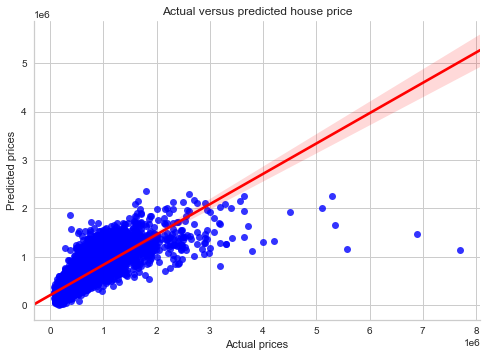

In [562]:
sns.regplot(x=y_train, y=y_pred, data=house, truncate=False, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.despine(left = False, bottom = False)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual versus predicted house price');

### Lasso scaled: Checking residuals

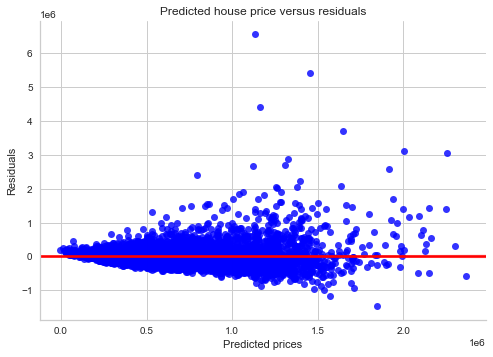

In [563]:
sns.regplot(x=y_pred, y=y_train-y_pred, data=house, truncate=False, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.despine(left = False, bottom = False)
plt.xlabel('Predicted prices')
plt.ylabel('Residuals')
plt.title('Predicted house price versus residuals')
plt.show();

### Lasso scaled: Checking normality of errors

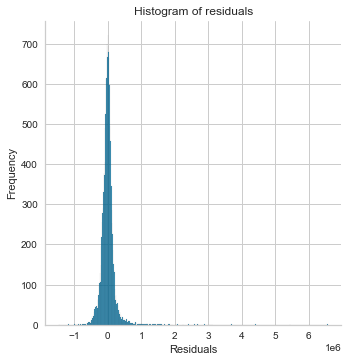

In [564]:
sns.displot(y_train-y_pred)
plt.title('Histogram of residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show();

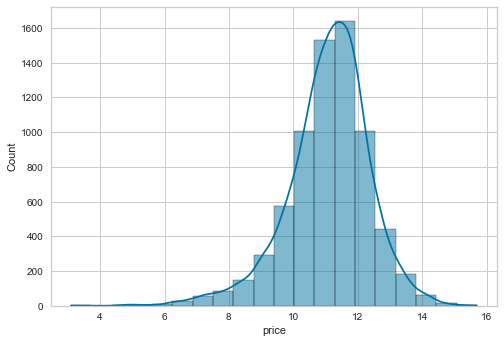

In [565]:
sns.histplot(np.log(y_train-y_pred), bins=20, kde=True);

### Lasso scaled: Predicting test data with the model

In [566]:
y_test_pred = lasso1.predict(X_test_std)

In [567]:
y_test_pred

array([158674.56860057, 899508.41074931, 624153.77083011, ...,
       582938.57360028, 487499.61757378, 527472.973253  ])

In [568]:
# Model evaluation
acc_lass = metrics.r2_score(y_test, y_test_pred)

print('r^2:', acc_lass)
print('Adjusted r^2:', 1 - (1-acc_lass)*(len(y_test)-1)/(len(y_test)-X_test_std.shape[1]-1))
print('Root mean squared error or RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('Mean absolute percentage error or MAPE:', metrics.mean_absolute_percentage_error(y_test, y_test_pred))

r^2: 0.6398587258915132
Adjusted r^2: 0.6388560123673133
Root mean squared error or RMSE: 228587.24149870794
Mean absolute percentage error or MAPE: 0.24803098275369945


In [569]:
ar21t   = 1 - (1-acc_lass)*(len(y_test)-1)/(len(y_test)-X_test_std.shape[1]-1)
RMSE21t = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
MAPE21t = metrics.mean_absolute_percentage_error(y_test, y_test_pred)

In [570]:
# Models compared

models = pd.DataFrame({
    'Model': ['Linear regression', 'Random forest', 'XGBoost', 'Decision tree', 'Bagging', 'Gradient boost', 'XGBoost tuned',
             'Ridge', 'Lasso', 'Support vector', 'KNN', 'Elastic net', 'LR scaled', 'RF scaled',
             'XGB scaled', 'DT scaled', 'Bagging scaled', 'GBR scaled', 'XGB tuned scaled', 'Ridge scaled', 'Lasso scaled'],
    'R-squared train': [r1*100, r2*100, r3*100, r4*100, r5*100, r6*100, r7*100,
                       r8*100, r9*100, r10*100, r11*100, r12*100, r13*100, r14*100,
                       r15*100, r16*100, r17*100, r18*100, r19*100, r20*100, r21*100],
    'R-squared test': [acc_linreg*100, acc_rf*100, acc_xgb*100, acc_dt*100, acc_bgr*100, acc_gbr*100, acc_xgbt*100,
                      acc_rid*100, acc_las*100, acc_svr*100, acc_knn*100, acc_en*100, acc_linregs*100, acc_rfs*100,
                      acc_xgbs*100, acc_dts*100, acc_bgrs*100, acc_gbrs*100, acc_xgbts*100, acc_rids*100, acc_lass*100],
    'Adjusted r^2 train': [ar1*100, ar2*100, ar3*100, ar4*100, ar5*100, ar6*100, ar7*100,
                          ar8*100, ar9*100, ar10*100, ar11*100, ar12*100, ar13*100, ar14*100, 
                           ar15*100, ar16*100, ar17*100, ar18*100, ar19*100, ar20*100, ar21*100],
    'Adjusted r^2 test': [ar1t*100, ar2t*100, ar3t*100, ar4t*100, ar5t*100, ar6t*100, ar7t*100,
                         ar8t*100, ar9t*100, ar10t*100, ar11t*100, ar12t*100, ar13t*100, ar14t*100, 
                          ar15t*100, ar16t*100, ar17t*100, ar18t*100, ar19t*100, ar20t*100, ar21t*100],
    'RMSE train': [RMSE1, RMSE2, RMSE3, RMSE4, RMSE5, RMSE6, RMSE7,
                  RMSE8, RMSE9, RMSE10, RMSE11, RMSE12, RMSE13, RMSE14, 
                   RMSE15, RMSE16, RMSE17, RMSE18, RMSE19, RMSE20, RMSE21],
    'RMSE test': [RMSE1t, RMSE2t, RMSE3t, RMSE4t, RMSE5t, RMSE6t, RMSE7t,
                 RMSE8t, RMSE9t, RMSE10t, RMSE11t, RMSE12t, RMSE13t, RMSE14t, 
                  RMSE15t, RMSE16t, RMSE17t, RMSE18t, RMSE19t, RMSE20t, RMSE21t],
    'MAPE train': [MAPE1*100, MAPE2*100, MAPE3*100, MAPE4*100, MAPE5*100, MAPE6*100, MAPE7*100,
                  MAPE8*100, MAPE9*100, MAPE10*100, MAPE11*100, MAPE12*100, MAPE13*100, MAPE14*100, 
                   MAPE15*100, MAPE16*100, MAPE17*100, MAPE18*100, MAPE19*100, MAPE20*100, MAPE21*100],
    'MAPE test': [MAPE1t*100, MAPE2t*100, MAPE3t*100, MAPE4t*100, MAPE5t*100, MAPE6t*100, MAPE7t*100,
                 MAPE8t*100, MAPE9t*100, MAPE10t*100, MAPE11t*100, MAPE12t*100, MAPE13t*100, MAPE14t*100,
                 MAPE15t*100, MAPE16t*100, MAPE17t*100,MAPE18t*100, MAPE19t*100, MAPE20t*100, MAPE21t*100]})
models.sort_values(by='R-squared test', ascending=False)

Model  R-squared train  R-squared test  Adjusted r^2 train  \
18   XGB tuned scaled        91.363735       81.619175           91.343708   
6       XGBoost tuned        91.377945       81.597213           91.367673   
2             XGBoost        94.046928       80.815587           94.039836   
14         XGB scaled        94.046928       80.808355           94.033123   
13          RF scaled        96.876027       80.243689           96.872306   
1       Random forest        96.799378       79.849331           96.795565   
16     Bagging scaled        95.940693       79.439973           95.935858   
4             Bagging        95.569198       78.732251           95.563919   
5      Gradient boost        78.748101       76.125344           78.722785   
17         GBR scaled        78.748101       76.116851           78.722785   
10                KNN        99.901419       69.425183           99.901302   
3       Decision tree        99.901457       66.194141           99.901339   
15          DT scaled        99.901457       65.588150           99.901339   
0   Linear regression        62.735288       63.985875           62.690896   
12          LR scaled        62.735288       63.985875           62.690896   
20       Lasso scaled        62.735288       63.985873           62.690896   
8               Lasso        62.735288       63.985872           62.690896   
7               Ridge        62.735288       63.985833           62.690896   
19       Ridge scaled        62.735288       63.985830           62.690896   
11        Elastic net        62.531538       63.663790           62.486903   
9      Support vector        -5.585952       -5.055077           -5.711733   

    Adjusted r^2 test    RMSE train     RMSE test  MAPE train  MAPE test  
18          81.519403 106203.806813 163304.457769   14.443566  17.030198  
6           81.497322 106116.399784 163401.989883   14.431561  17.035787  
2           80.711453  88175.448577 166836.011069   12.933240  17.678436  
14          80.704182  88175.448577 166867.453067   12.933240  17.677506  
13          80.188683  63874.969840 169304.484358    6.613304  17.272223  
1           79.793227  64653.833797 170985.890579    6.634334  17.288556  
16          79.382729  72812.013383 172713.934679    7.444972  18.318549  
4           78.673037  76070.854405 175661.384969    7.456070  18.082261  
5           76.058872 166600.373692 186116.165598   20.453600  20.705725  
17          76.050355 166600.373692 186149.266086   20.453600  20.706333  
10          69.340056  11346.809687 210618.963505    0.286007  20.979356  
3           66.100018  11344.647799 221468.277568    0.285083  23.775299  
15          65.492339  11344.647799 223444.439536    0.285083  23.884684  
0           63.885604 220610.403879 228587.232400   24.434118  24.803116  
12          63.885604 220610.403879 228587.232400   24.434118  24.803116  
20          63.885601 220610.403881 228587.241499   24.434101  24.803098  
8           63.885601 220610.403880 228587.242060   24.434111  24.803109  
7           63.885562 220610.403936 228587.365746   24.434026  24.803032  
19          63.885559 220610.403947 228587.375702   24.433932  24.802931  
11          63.562622 221212.691532 229607.120150   24.330047  24.743568  
9           -5.347573 371347.217633 390412.811279   42.459051  43.341094

### Support vector scaled

In [571]:
svr1= svr.fit(X_train_std, y_train)
svr1

SVR()

### Support vector scaled: Model evaluation

In [572]:
# Model prediction on train set
y_pred = svr1.predict(X_train_std)

In [573]:
# Model evaluation

print('r^2:', metrics.r2_score(y_train, y_pred))
print('Adjusted r^2:', 1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train_std.shape[1]-1))
print('Root mean squared error or RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('Mean absolute percentage error or MAPE:', metrics.mean_absolute_percentage_error(y_train, y_pred))

r^2: -0.05608353617401507
Adjusted r^2: -0.0573416105387492
Root mean squared error or RMSE: 371386.6085257349
Mean absolute percentage error or MAPE: 0.42425141945516726


In [574]:
r22    = metrics.r2_score(y_train, y_pred)
ar22   = 1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train_std.shape[1]-1)
RMSE22 = np.sqrt(metrics.mean_squared_error(y_train, y_pred))
MAPE22 = metrics.mean_absolute_percentage_error(y_train, y_pred)

### Support vector scaled: Visualising the difference between actual and predicted house prices

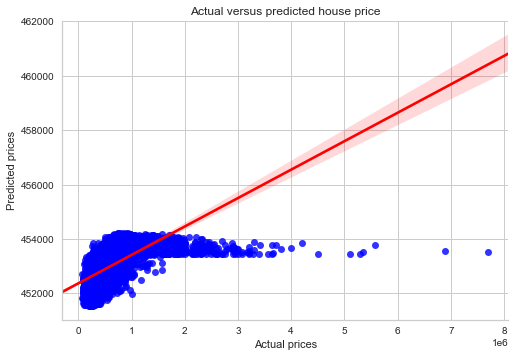

In [575]:
sns.regplot(x=y_train, y=y_pred, data=house, truncate=False, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.despine(left = False, bottom = False)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual versus predicted house price');

### Support vector scaled: Checking residuals

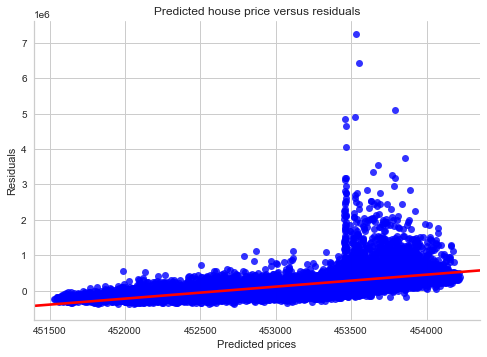

In [576]:
sns.regplot(x=y_pred, y=y_train-y_pred, data=house, truncate=False, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.despine(left = False, bottom = False)
plt.xlabel('Predicted prices')
plt.ylabel('Residuals')
plt.title('Predicted house price versus residuals')
plt.show();

### Support vector scaled: Checking normality of errors

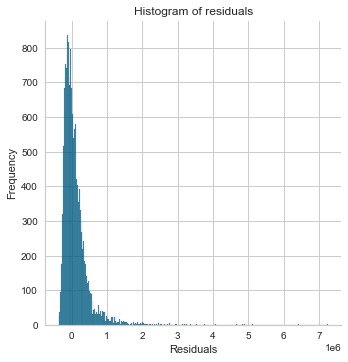

In [577]:
sns.displot(y_train-y_pred)
plt.title('Histogram of residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show();

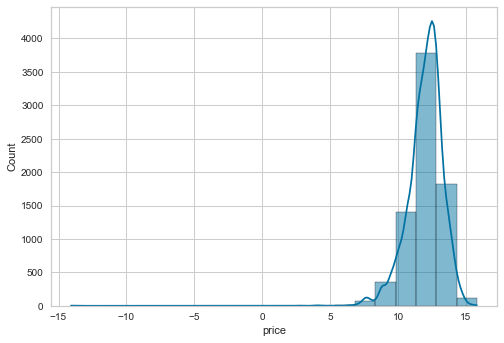

In [578]:
sns.histplot(np.log(y_train-y_pred), bins=20, kde=True);

### Support vector scaled: Predicting test data with the model

In [579]:
y_test_pred = svr1.predict(X_test_std)

In [581]:
y_test_pred

array([451621.56843291, 453541.64400482, 453107.24278453, ...,
       452991.41433698, 452306.41097456, 453488.50719699])

In [582]:
# Model evaluation
acc_svrs = metrics.r2_score(y_test, y_test_pred)

print('r^2:', acc_svrs)
print('Adjusted r^2:', 1 - (1-acc_svrs)*(len(y_test)-1)/(len(y_test)-X_test_std.shape[1]-1))
print('Root mean squared error or RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('Mean absolute percentage error or MAPE:', metrics.mean_absolute_percentage_error(y_test, y_test_pred))

r^2: -0.05078395605228225
Adjusted r^2: -0.05370957263525855
Root mean squared error or RMSE: 390456.1385633087
Mean absolute percentage error or MAPE: 0.43304212525276164


In [583]:
ar22t   = 1 - (1-acc_svrs)*(len(y_test)-1)/(len(y_test)-X_test_std.shape[1]-1)
RMSE22t = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
MAPE22t = metrics.mean_absolute_percentage_error(y_test, y_test_pred)

In [584]:
# Models compared

models = pd.DataFrame({
    'Model': ['Linear regression', 'Random forest', 'XGBoost', 'Decision tree', 'Bagging', 'Gradient boost', 'XGBoost tuned',
             'Ridge', 'Lasso', 'Support vector', 'KNN', 'Elastic net', 'LR scaled', 'RF scaled',
             'XGB scaled', 'DT scaled', 'Bagging scaled', 'GBR scaled', 'XGB tuned scaled', 'Ridge scaled', 'Lasso scaled',
             'SV scaled'],
    'R-squared train': [r1*100, r2*100, r3*100, r4*100, r5*100, r6*100, r7*100,
                       r8*100, r9*100, r10*100, r11*100, r12*100, r13*100, r14*100,
                       r15*100, r16*100, r17*100, r18*100, r19*100, r20*100, r21*100,
                       r22*100,],
    'R-squared test': [acc_linreg*100, acc_rf*100, acc_xgb*100, acc_dt*100, acc_bgr*100, acc_gbr*100, acc_xgbt*100,
                      acc_rid*100, acc_las*100, acc_svr*100, acc_knn*100, acc_en*100, acc_linregs*100, acc_rfs*100,
                      acc_xgbs*100, acc_dts*100, acc_bgrs*100, acc_gbrs*100, acc_xgbts*100, acc_rids*100, acc_lass*100,
                      acc_svrs*100],
    'Adjusted r^2 train': [ar1*100, ar2*100, ar3*100, ar4*100, ar5*100, ar6*100, ar7*100,
                          ar8*100, ar9*100, ar10*100, ar11*100, ar12*100, ar13*100, ar14*100, 
                           ar15*100, ar16*100, ar17*100, ar18*100, ar19*100, ar20*100, ar21*100,
                          ar22*100],
    'Adjusted r^2 test': [ar1t*100, ar2t*100, ar3t*100, ar4t*100, ar5t*100, ar6t*100, ar7t*100,
                         ar8t*100, ar9t*100, ar10t*100, ar11t*100, ar12t*100, ar13t*100, ar14t*100, 
                          ar15t*100, ar16t*100, ar17t*100, ar18t*100, ar19t*100, ar20t*100, ar21t*100,
                         ar22t*100],
    'RMSE train': [RMSE1, RMSE2, RMSE3, RMSE4, RMSE5, RMSE6, RMSE7,
                  RMSE8, RMSE9, RMSE10, RMSE11, RMSE12, RMSE13, RMSE14, 
                   RMSE15, RMSE16, RMSE17, RMSE18, RMSE19, RMSE20, RMSE21,
                  RMSE22],
    'RMSE test': [RMSE1t, RMSE2t, RMSE3t, RMSE4t, RMSE5t, RMSE6t, RMSE7t,
                 RMSE8t, RMSE9t, RMSE10t, RMSE11t, RMSE12t, RMSE13t, RMSE14t, 
                  RMSE15t, RMSE16t, RMSE17t, RMSE18t, RMSE19t, RMSE20t, RMSE21t,
                 RMSE22t],
    'MAPE train': [MAPE1*100, MAPE2*100, MAPE3*100, MAPE4*100, MAPE5*100, MAPE6*100, MAPE7*100,
                  MAPE8*100, MAPE9*100, MAPE10*100, MAPE11*100, MAPE12*100, MAPE13*100, MAPE14*100, 
                   MAPE15*100, MAPE16*100, MAPE17*100, MAPE18*100, MAPE19*100, MAPE20*100, MAPE21*100,
                  MAPE22*100],
    'MAPE test': [MAPE1t*100, MAPE2t*100, MAPE3t*100, MAPE4t*100, MAPE5t*100, MAPE6t*100, MAPE7t*100,
                 MAPE8t*100, MAPE9t*100, MAPE10t*100, MAPE11t*100, MAPE12t*100, MAPE13t*100, MAPE14t*100,
                 MAPE15t*100, MAPE16t*100, MAPE17t*100,MAPE18t*100, MAPE19t*100, MAPE20t*100, MAPE21t*100,
                 MAPE22t*100]})
models.sort_values(by='R-squared test', ascending=False)

Model  R-squared train  R-squared test  Adjusted r^2 train  \
18   XGB tuned scaled        91.363735       81.619175           91.343708   
6       XGBoost tuned        91.377945       81.597213           91.367673   
2             XGBoost        94.046928       80.815587           94.039836   
14         XGB scaled        94.046928       80.808355           94.033123   
13          RF scaled        96.876027       80.243689           96.872306   
1       Random forest        96.799378       79.849331           96.795565   
16     Bagging scaled        95.940693       79.439973           95.935858   
4             Bagging        95.569198       78.732251           95.563919   
5      Gradient boost        78.748101       76.125344           78.722785   
17         GBR scaled        78.748101       76.116851           78.722785   
10                KNN        99.901419       69.425183           99.901302   
3       Decision tree        99.901457       66.194141           99.901339   
15          DT scaled        99.901457       65.588150           99.901339   
0   Linear regression        62.735288       63.985875           62.690896   
12          LR scaled        62.735288       63.985875           62.690896   
20       Lasso scaled        62.735288       63.985873           62.690896   
8               Lasso        62.735288       63.985872           62.690896   
7               Ridge        62.735288       63.985833           62.690896   
19       Ridge scaled        62.735288       63.985830           62.690896   
11        Elastic net        62.531538       63.663790           62.486903   
9      Support vector        -5.585952       -5.055077           -5.711733   
21          SV scaled        -5.608354       -5.078396           -5.734161   

    Adjusted r^2 test    RMSE train     RMSE test  MAPE train  MAPE test  
18          81.519403 106203.806813 163304.457769   14.443566  17.030198  
6           81.497322 106116.399784 163401.989883   14.431561  17.035787  
2           80.711453  88175.448577 166836.011069   12.933240  17.678436  
14          80.704182  88175.448577 166867.453067   12.933240  17.677506  
13          80.188683  63874.969840 169304.484358    6.613304  17.272223  
1           79.793227  64653.833797 170985.890579    6.634334  17.288556  
16          79.382729  72812.013383 172713.934679    7.444972  18.318549  
4           78.673037  76070.854405 175661.384969    7.456070  18.082261  
5           76.058872 166600.373692 186116.165598   20.453600  20.705725  
17          76.050355 166600.373692 186149.266086   20.453600  20.706333  
10          69.340056  11346.809687 210618.963505    0.286007  20.979356  
3           66.100018  11344.647799 221468.277568    0.285083  23.775299  
15          65.492339  11344.647799 223444.439536    0.285083  23.884684  
0           63.885604 220610.403879 228587.232400   24.434118  24.803116  
12          63.885604 220610.403879 228587.232400   24.434118  24.803116  
20          63.885601 220610.403881 228587.241499   24.434101  24.803098  
8           63.885601 220610.403880 228587.242060   24.434111  24.803109  
7           63.885562 220610.403936 228587.365746   24.434026  24.803032  
19          63.885559 220610.403947 228587.375702   24.433932  24.802931  
11          63.562622 221212.691532 229607.120150   24.330047  24.743568  
9           -5.347573 371347.217633 390412.811279   42.459051  43.341094  
21          -5.370957 371386.608526 390456.138563   42.425142  43.304213

### KNN scaled

In [585]:
knn1= knn.fit(X_train_std, y_train)
knn1

KNeighborsRegressor(n_neighbors=4, weights='distance')

### KNN scaled: Model evaluation

In [586]:
# Model prediction on train set
y_pred = knn1.predict(X_train_std)

In [587]:
# Model evaluation

print('r^2:', metrics.r2_score(y_train, y_pred))
print('Adjusted r^2:', 1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train_std.shape[1]-1))
print('Root mean squared error or RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('Mean absolute percentage error or MAPE:', metrics.mean_absolute_percentage_error(y_train, y_pred))

r^2: 0.9990145653532138
Adjusted r^2: 0.9990133914403321
Root mean squared error or RMSE: 11344.64779914104
Mean absolute percentage error or MAPE: 0.002850841259216476


In [588]:
r23    = metrics.r2_score(y_train, y_pred)
ar23   = 1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train_std.shape[1]-1)
RMSE23 = np.sqrt(metrics.mean_squared_error(y_train, y_pred))
MAPE23 = metrics.mean_absolute_percentage_error(y_train, y_pred)

### KNN scaled: Visualising the difference between actual and predicted house prices

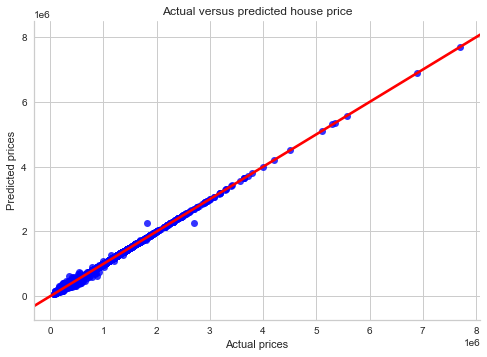

In [589]:
sns.regplot(x=y_train, y=y_pred, data=house, truncate=False, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.despine(left = False, bottom = False)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual versus predicted house price');

### KNN scaled: Checking residuals

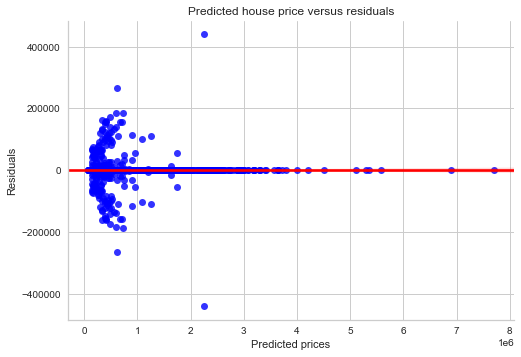

In [590]:
sns.regplot(x=y_pred, y=y_train-y_pred, data=house, truncate=False, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.despine(left = False, bottom = False)
plt.xlabel('Predicted prices')
plt.ylabel('Residuals')
plt.title('Predicted house price versus residuals')
plt.show();

### KNN scaled: Checking normality of errors

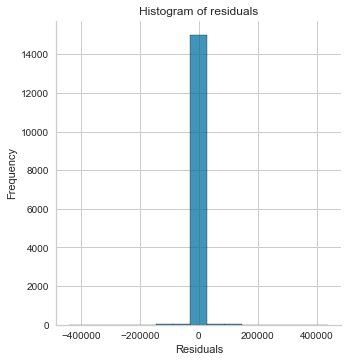

In [591]:
sns.displot(y_train-y_pred)
plt.title('Histogram of residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show();

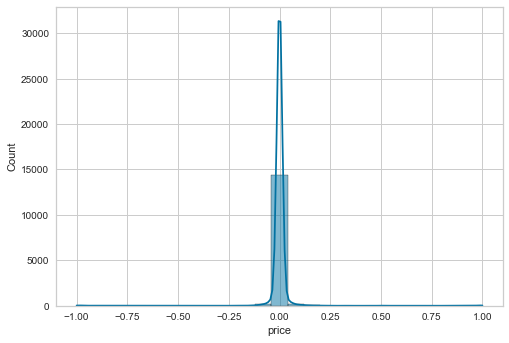

In [597]:
sns.histplot(np.sin(y_train-y_pred), bins=25, kde=True);

### KNN scaled: Predicting test data with the model

In [598]:
y_test_pred = knn1.predict(X_test_std)

In [599]:
y_test_pred

array([ 234910.90481295, 1092372.25926639,  430699.7333463 , ...,
        687153.51121736,  548561.72872192,  438829.05624961])

In [600]:
# Model evaluation
acc_knns = metrics.r2_score(y_test, y_test_pred)

print('r^2:', acc_knns)
print('Adjusted r^2:', 1 - (1-acc_knns)*(len(y_test)-1)/(len(y_test)-X_test_std.shape[1]-1))
print('Root mean squared error or RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('Mean absolute percentage error or MAPE:', metrics.mean_absolute_percentage_error(y_test, y_test_pred))

r^2: 0.6792358178376651
Adjusted r^2: 0.6783427389082108
Root mean squared error or RMSE: 215728.97104624554
Mean absolute percentage error or MAPE: 0.20949292954113602


In [601]:
ar23t   = 1 - (1-acc_knns)*(len(y_test)-1)/(len(y_test)-X_test_std.shape[1]-1)
RMSE23t = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
MAPE23t = metrics.mean_absolute_percentage_error(y_test, y_test_pred)

In [602]:
# Models compared

models = pd.DataFrame({
    'Model': ['Linear regression', 'Random forest', 'XGBoost', 'Decision tree', 'Bagging', 'Gradient boost', 'XGBoost tuned',
             'Ridge', 'Lasso', 'Support vector', 'KNN', 'Elastic net', 'LR scaled', 'RF scaled',
             'XGB scaled', 'DT scaled', 'Bagging scaled', 'GBR scaled', 'XGB tuned scaled', 'Ridge scaled', 'Lasso scaled',
             'SV scaled', 'KNN scaled'],
    'R-squared train': [r1*100, r2*100, r3*100, r4*100, r5*100, r6*100, r7*100,
                       r8*100, r9*100, r10*100, r11*100, r12*100, r13*100, r14*100,
                       r15*100, r16*100, r17*100, r18*100, r19*100, r20*100, r21*100,
                       r22*100, r23*100],
    'R-squared test': [acc_linreg*100, acc_rf*100, acc_xgb*100, acc_dt*100, acc_bgr*100, acc_gbr*100, acc_xgbt*100,
                      acc_rid*100, acc_las*100, acc_svr*100, acc_knn*100, acc_en*100, acc_linregs*100, acc_rfs*100,
                      acc_xgbs*100, acc_dts*100, acc_bgrs*100, acc_gbrs*100, acc_xgbts*100, acc_rids*100, acc_lass*100,
                      acc_svrs*100, acc_knns*100],
    'Adjusted r^2 train': [ar1*100, ar2*100, ar3*100, ar4*100, ar5*100, ar6*100, ar7*100,
                          ar8*100, ar9*100, ar10*100, ar11*100, ar12*100, ar13*100, ar14*100, 
                           ar15*100, ar16*100, ar17*100, ar18*100, ar19*100, ar20*100, ar21*100,
                          ar22*100, ar23*100],
    'Adjusted r^2 test': [ar1t*100, ar2t*100, ar3t*100, ar4t*100, ar5t*100, ar6t*100, ar7t*100,
                         ar8t*100, ar9t*100, ar10t*100, ar11t*100, ar12t*100, ar13t*100, ar14t*100, 
                          ar15t*100, ar16t*100, ar17t*100, ar18t*100, ar19t*100, ar20t*100, ar21t*100,
                         ar22t*100, ar23t*100],
    'RMSE train': [RMSE1, RMSE2, RMSE3, RMSE4, RMSE5, RMSE6, RMSE7,
                  RMSE8, RMSE9, RMSE10, RMSE11, RMSE12, RMSE13, RMSE14, 
                   RMSE15, RMSE16, RMSE17, RMSE18, RMSE19, RMSE20, RMSE21,
                  RMSE22, RMSE23],
    'RMSE test': [RMSE1t, RMSE2t, RMSE3t, RMSE4t, RMSE5t, RMSE6t, RMSE7t,
                 RMSE8t, RMSE9t, RMSE10t, RMSE11t, RMSE12t, RMSE13t, RMSE14t, 
                  RMSE15t, RMSE16t, RMSE17t, RMSE18t, RMSE19t, RMSE20t, RMSE21t,
                 RMSE22t, RMSE23t],
    'MAPE train': [MAPE1*100, MAPE2*100, MAPE3*100, MAPE4*100, MAPE5*100, MAPE6*100, MAPE7*100,
                  MAPE8*100, MAPE9*100, MAPE10*100, MAPE11*100, MAPE12*100, MAPE13*100, MAPE14*100, 
                   MAPE15*100, MAPE16*100, MAPE17*100, MAPE18*100, MAPE19*100, MAPE20*100, MAPE21*100,
                  MAPE22*100, MAPE23*100],
    'MAPE test': [MAPE1t*100, MAPE2t*100, MAPE3t*100, MAPE4t*100, MAPE5t*100, MAPE6t*100, MAPE7t*100,
                 MAPE8t*100, MAPE9t*100, MAPE10t*100, MAPE11t*100, MAPE12t*100, MAPE13t*100, MAPE14t*100,
                 MAPE15t*100, MAPE16t*100, MAPE17t*100,MAPE18t*100, MAPE19t*100, MAPE20t*100, MAPE21t*100,
                 MAPE22t*100, MAPE23t*100]})
models.sort_values(by='R-squared test', ascending=False)

Model  R-squared train  R-squared test  Adjusted r^2 train  \
18   XGB tuned scaled        91.363735       81.619175           91.343708   
6       XGBoost tuned        91.377945       81.597213           91.367673   
2             XGBoost        94.046928       80.815587           94.039836   
14         XGB scaled        94.046928       80.808355           94.033123   
13          RF scaled        96.876027       80.243689           96.872306   
1       Random forest        96.799378       79.849331           96.795565   
16     Bagging scaled        95.940693       79.439973           95.935858   
4             Bagging        95.569198       78.732251           95.563919   
5      Gradient boost        78.748101       76.125344           78.722785   
17         GBR scaled        78.748101       76.116851           78.722785   
10                KNN        99.901419       69.425183           99.901302   
22         KNN scaled        99.901457       67.923582           99.901339   
3       Decision tree        99.901457       66.194141           99.901339   
15          DT scaled        99.901457       65.588150           99.901339   
0   Linear regression        62.735288       63.985875           62.690896   
12          LR scaled        62.735288       63.985875           62.690896   
20       Lasso scaled        62.735288       63.985873           62.690896   
8               Lasso        62.735288       63.985872           62.690896   
7               Ridge        62.735288       63.985833           62.690896   
19       Ridge scaled        62.735288       63.985830           62.690896   
11        Elastic net        62.531538       63.663790           62.486903   
9      Support vector        -5.585952       -5.055077           -5.711733   
21          SV scaled        -5.608354       -5.078396           -5.734161   

    Adjusted r^2 test    RMSE train     RMSE test  MAPE train  MAPE test  
18          81.519403 106203.806813 163304.457769   14.443566  17.030198  
6           81.497322 106116.399784 163401.989883   14.431561  17.035787  
2           80.711453  88175.448577 166836.011069   12.933240  17.678436  
14          80.704182  88175.448577 166867.453067   12.933240  17.677506  
13          80.188683  63874.969840 169304.484358    6.613304  17.272223  
1           79.793227  64653.833797 170985.890579    6.634334  17.288556  
16          79.382729  72812.013383 172713.934679    7.444972  18.318549  
4           78.673037  76070.854405 175661.384969    7.456070  18.082261  
5           76.058872 166600.373692 186116.165598   20.453600  20.705725  
17          76.050355 166600.373692 186149.266086   20.453600  20.706333  
10          69.340056  11346.809687 210618.963505    0.286007  20.979356  
22          67.834274  11344.647799 215728.971046    0.285084  20.949293  
3           66.100018  11344.647799 221468.277568    0.285083  23.775299  
15          65.492339  11344.647799 223444.439536    0.285083  23.884684  
0           63.885604 220610.403879 228587.232400   24.434118  24.803116  
12          63.885604 220610.403879 228587.232400   24.434118  24.803116  
20          63.885601 220610.403881 228587.241499   24.434101  24.803098  
8           63.885601 220610.403880 228587.242060   24.434111  24.803109  
7           63.885562 220610.403936 228587.365746   24.434026  24.803032  
19          63.885559 220610.403947 228587.375702   24.433932  24.802931  
11          63.562622 221212.691532 229607.120150   24.330047  24.743568  
9           -5.347573 371347.217633 390412.811279   42.459051  43.341094  
21          -5.370957 371386.608526 390456.138563   42.425142  43.304213

### Elastic Net scaled

In [603]:
en1= en.fit(X_train_std, y_train)
en1

ElasticNet()

### Elastic Net scaled: Model evaluation

In [604]:
# Model prediction on train set
y_pred = en1.predict(X_train_std)

In [605]:
# Model evaluation

print('r^2:', metrics.r2_score(y_train, y_pred))
print('Adjusted r^2:', 1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train_std.shape[1]-1))
print('Root mean squared error or RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('Mean absolute percentage error or MAPE:', metrics.mean_absolute_percentage_error(y_train, y_pred))

r^2: 0.6001734652347371
Adjusted r^2: 0.5996971662522239
Root mean squared error or RMSE: 228514.05146624992
Mean absolute percentage error or MAPE: 0.244319728832206


In [606]:
r24    = metrics.r2_score(y_train, y_pred)
ar24   = 1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train_std.shape[1]-1)
RMSE24 = np.sqrt(metrics.mean_squared_error(y_train, y_pred))
MAPE24 = metrics.mean_absolute_percentage_error(y_train, y_pred)

### Elastic Net scaled: Visualising the difference between actual and predicted house prices

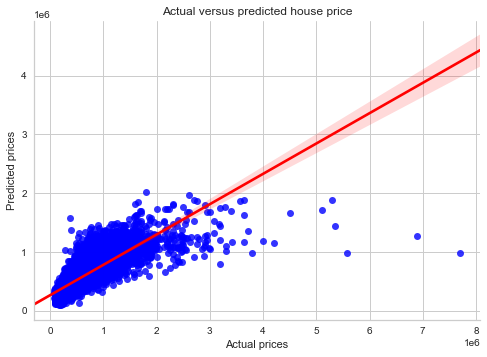

In [607]:
sns.regplot(x=y_train, y=y_pred, data=house, truncate=False, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.despine(left = False, bottom = False)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual versus predicted house price');

### Elastic Net scaled: Checking residuals

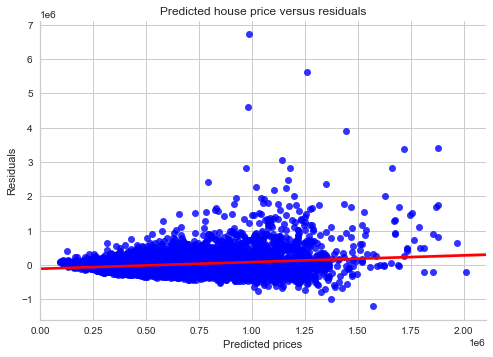

In [608]:
sns.regplot(x=y_pred, y=y_train-y_pred, data=house, truncate=False, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.despine(left = False, bottom = False)
plt.xlabel('Predicted prices')
plt.ylabel('Residuals')
plt.title('Predicted house price versus residuals')
plt.show();

### Elastic Net scaled: Checking normality of errors

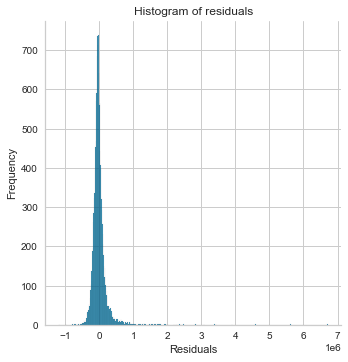

In [609]:
sns.displot(y_train-y_pred)
plt.title('Histogram of residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show();

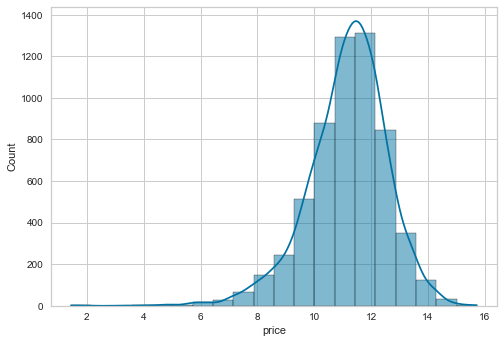

In [610]:
sns.histplot(np.log(y_train-y_pred), bins=20, kde=True);

### Elastic Net scaled: Predicting test data with the model

In [611]:
y_test_pred = en1.predict(X_test_std)

In [612]:
y_test_pred

array([208309.10716676, 852622.59312573, 587009.5043051 , ...,
       526983.20331558, 463895.1774389 , 576023.56816591])

In [613]:
# Model evaluation
acc_ens = metrics.r2_score(y_test, y_test_pred)

print('r^2:', acc_ens)
print('Adjusted r^2:', 1 - (1-acc_ens)*(len(y_test)-1)/(len(y_test)-X_test_std.shape[1]-1))
print('Root mean squared error or RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('Mean absolute percentage error or MAPE:', metrics.mean_absolute_percentage_error(y_test, y_test_pred))

r^2: 0.6041035022634971
Adjusted r^2: 0.6030012382326762
Root mean squared error or RMSE: 239665.967291215
Mean absolute percentage error or MAPE: 0.24893063268187854


In [614]:
ar24t   = 1 - (1-acc_ens)*(len(y_test)-1)/(len(y_test)-X_test_std.shape[1]-1)
RMSE24t = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
MAPE24t = metrics.mean_absolute_percentage_error(y_test, y_test_pred)

In [615]:
# Models compared

models = pd.DataFrame({
    'Model': ['Linear regression', 'Random forest', 'XGBoost', 'Decision tree', 'Bagging', 'Gradient boost', 'XGBoost tuned',
             'Ridge', 'Lasso', 'Support vector', 'KNN', 'Elastic net', 'LR scaled', 'RF scaled',
             'XGB scaled', 'DT scaled', 'Bagging scaled', 'GBR scaled', 'XGB tuned scaled', 'Ridge scaled', 'Lasso scaled',
             'SV scaled', 'KNN scaled', 'Elastic Net scaled'],
    'R-squared train': [r1*100, r2*100, r3*100, r4*100, r5*100, r6*100, r7*100,
                       r8*100, r9*100, r10*100, r11*100, r12*100, r13*100, r14*100,
                       r15*100, r16*100, r17*100, r18*100, r19*100, r20*100, r21*100,
                       r22*100, r23*100, r24*100],
    'R-squared test': [acc_linreg*100, acc_rf*100, acc_xgb*100, acc_dt*100, acc_bgr*100, acc_gbr*100, acc_xgbt*100,
                      acc_rid*100, acc_las*100, acc_svr*100, acc_knn*100, acc_en*100, acc_linregs*100, acc_rfs*100,
                      acc_xgbs*100, acc_dts*100, acc_bgrs*100, acc_gbrs*100, acc_xgbts*100, acc_rids*100, acc_lass*100,
                      acc_svrs*100, acc_knns*100, acc_ens*100],
    'Adjusted r^2 train': [ar1*100, ar2*100, ar3*100, ar4*100, ar5*100, ar6*100, ar7*100,
                          ar8*100, ar9*100, ar10*100, ar11*100, ar12*100, ar13*100, ar14*100, 
                           ar15*100, ar16*100, ar17*100, ar18*100, ar19*100, ar20*100, ar21*100,
                          ar22*100, ar23*100, ar24*100],
    'Adjusted r^2 test': [ar1t*100, ar2t*100, ar3t*100, ar4t*100, ar5t*100, ar6t*100, ar7t*100,
                         ar8t*100, ar9t*100, ar10t*100, ar11t*100, ar12t*100, ar13t*100, ar14t*100, 
                          ar15t*100, ar16t*100, ar17t*100, ar18t*100, ar19t*100, ar20t*100, ar21t*100,
                         ar22t*100, ar23t*100, ar24t*100],
    'RMSE train': [RMSE1, RMSE2, RMSE3, RMSE4, RMSE5, RMSE6, RMSE7,
                  RMSE8, RMSE9, RMSE10, RMSE11, RMSE12, RMSE13, RMSE14, 
                   RMSE15, RMSE16, RMSE17, RMSE18, RMSE19, RMSE20, RMSE21,
                  RMSE22, RMSE23, RMSE24],
    'RMSE test': [RMSE1t, RMSE2t, RMSE3t, RMSE4t, RMSE5t, RMSE6t, RMSE7t,
                 RMSE8t, RMSE9t, RMSE10t, RMSE11t, RMSE12t, RMSE13t, RMSE14t, 
                  RMSE15t, RMSE16t, RMSE17t, RMSE18t, RMSE19t, RMSE20t, RMSE21t,
                 RMSE22t, RMSE23t, RMSE24t],
    'MAPE train': [MAPE1*100, MAPE2*100, MAPE3*100, MAPE4*100, MAPE5*100, MAPE6*100, MAPE7*100,
                  MAPE8*100, MAPE9*100, MAPE10*100, MAPE11*100, MAPE12*100, MAPE13*100, MAPE14*100, 
                   MAPE15*100, MAPE16*100, MAPE17*100, MAPE18*100, MAPE19*100, MAPE20*100, MAPE21*100,
                  MAPE22*100, MAPE23*100, MAPE24*100],
    'MAPE test': [MAPE1t*100, MAPE2t*100, MAPE3t*100, MAPE4t*100, MAPE5t*100, MAPE6t*100, MAPE7t*100,
                 MAPE8t*100, MAPE9t*100, MAPE10t*100, MAPE11t*100, MAPE12t*100, MAPE13t*100, MAPE14t*100,
                 MAPE15t*100, MAPE16t*100, MAPE17t*100,MAPE18t*100, MAPE19t*100, MAPE20t*100, MAPE21t*100,
                 MAPE22t*100, MAPE23t*100, MAPE24t*100]})
models.sort_values(by='R-squared test', ascending=False)

Model  R-squared train  R-squared test  Adjusted r^2 train  \
18    XGB tuned scaled        91.363735       81.619175           91.343708   
6        XGBoost tuned        91.377945       81.597213           91.367673   
2              XGBoost        94.046928       80.815587           94.039836   
14          XGB scaled        94.046928       80.808355           94.033123   
13           RF scaled        96.876027       80.243689           96.872306   
1        Random forest        96.799378       79.849331           96.795565   
16      Bagging scaled        95.940693       79.439973           95.935858   
4              Bagging        95.569198       78.732251           95.563919   
5       Gradient boost        78.748101       76.125344           78.722785   
17          GBR scaled        78.748101       76.116851           78.722785   
10                 KNN        99.901419       69.425183           99.901302   
22          KNN scaled        99.901457       67.923582           99.901339   
3        Decision tree        99.901457       66.194141           99.901339   
15           DT scaled        99.901457       65.588150           99.901339   
0    Linear regression        62.735288       63.985875           62.690896   
12           LR scaled        62.735288       63.985875           62.690896   
20        Lasso scaled        62.735288       63.985873           62.690896   
8                Lasso        62.735288       63.985872           62.690896   
7                Ridge        62.735288       63.985833           62.690896   
19        Ridge scaled        62.735288       63.985830           62.690896   
11         Elastic net        62.531538       63.663790           62.486903   
23  Elastic Net scaled        60.017347       60.410350           59.969717   
9       Support vector        -5.585952       -5.055077           -5.711733   
21           SV scaled        -5.608354       -5.078396           -5.734161   

    Adjusted r^2 test    RMSE train     RMSE test  MAPE train  MAPE test  
18          81.519403 106203.806813 163304.457769   14.443566  17.030198  
6           81.497322 106116.399784 163401.989883   14.431561  17.035787  
2           80.711453  88175.448577 166836.011069   12.933240  17.678436  
14          80.704182  88175.448577 166867.453067   12.933240  17.677506  
13          80.188683  63874.969840 169304.484358    6.613304  17.272223  
1           79.793227  64653.833797 170985.890579    6.634334  17.288556  
16          79.382729  72812.013383 172713.934679    7.444972  18.318549  
4           78.673037  76070.854405 175661.384969    7.456070  18.082261  
5           76.058872 166600.373692 186116.165598   20.453600  20.705725  
17          76.050355 166600.373692 186149.266086   20.453600  20.706333  
10          69.340056  11346.809687 210618.963505    0.286007  20.979356  
22          67.834274  11344.647799 215728.971046    0.285084  20.949293  
3           66.100018  11344.647799 221468.277568    0.285083  23.775299  
15          65.492339  11344.647799 223444.439536    0.285083  23.884684  
0           63.885604 220610.403879 228587.232400   24.434118  24.803116  
12          63.885604 220610.403879 228587.232400   24.434118  24.803116  
20          63.885601 220610.403881 228587.241499   24.434101  24.803098  
8           63.885601 220610.403880 228587.242060   24.434111  24.803109  
7           63.885562 220610.403936 228587.365746   24.434026  24.803032  
19          63.885559 220610.403947 228587.375702   24.433932  24.802931  
11          63.562622 221212.691532 229607.120150   24.330047  24.743568  
23          60.300124 228514.051466 239665.967291   24.431973  24.893063  
9           -5.347573 371347.217633 390412.811279   42.459051  43.341094  
21          -5.370957 371386.608526 390456.138563   42.425142  43.304213

### Hypertuning with Gridsearch CV

In [640]:
import sklearn
print(sklearn.__version__)

0.24.2


In [624]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

Since we have best performance from XGB0oost models but most robust performance from the gradient boosting model, we will hypertune the gradient boosting model for improving the score

Following are the parameters we tune for the gradient boosting model: -

In [632]:
param_grid = {
    'loss':['ls','lad','huber'],
    'bootstrap': ['True','False'],
    'max_depth': range(5,11,1),
    'max_features': ['auto','sqrt'],
    'learning_rate': [0.05,0.1,0.2,0.25],
    'min_samples_leaf': [4,10,20],
    'min_samples_split': [5,10,1000],
    'n_estimators': [10,50,100,150,200],
    'subsample':[0.8,1]
}

In [633]:
GBR_test = GradientBoostingRegressor(random_state=22)

First will tune each parameter separately

In [634]:
param_grid1 = {'n_estimators': range(50,401,50)}

In [637]:
grid_search1 = GridSearchCV(estimator = GBR_test, param_grid = param_grid1, 
                          cv = 3, n_jobs = 1, verbose = 1)

In [638]:
grid_search1.fit(X1_train, y1_train)
grid_search1.best_params_

Fitting 3 folds for each of 8 candidates, totalling 24 fits


{'n_estimators': 350}

In [641]:
grid_search1.best_params_, grid_search1.best_score_

({'n_estimators': 350}, 0.7911938376336124)

n_estimators of 350 is best in range 50 to 400. Will test same until 1000

In [643]:
param_grid2 = {'n_estimators': range(350,1001,200)}
GBR_test=GradientBoostingRegressor(random_state=22)

grid_search2 = GridSearchCV(estimator = GBR_test, param_grid = param_grid2, 
                          cv = 3, n_jobs = 1, verbose = 1)
grid_search2.fit(X_train,y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=22),
             n_jobs=1, param_grid={'n_estimators': range(350, 1001, 200)},
             verbose=1)

In [644]:
grid_search2.cv_results_,grid_search2.best_params_, grid_search2.best_score_

({'mean_fit_time': array([3.47326382, 5.53280131, 7.62775739, 9.87500111]),
  'std_fit_time': array([0.03819394, 0.0372006 , 0.0216942 , 0.09012051]),
  'mean_score_time': array([0.01727533, 0.02525051, 0.03389057, 0.04186249]),
  'std_score_time': array([4.69853077e-04, 4.69293380e-04, 6.02003634e-06, 8.13911188e-04]),
  'param_n_estimators': masked_array(data=[350, 550, 750, 950],
               mask=[False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'n_estimators': 350},
   {'n_estimators': 550},
   {'n_estimators': 750},
   {'n_estimators': 950}],
  'split0_test_score': array([0.78262488, 0.78334418, 0.78215807, 0.78283862]),
  'split1_test_score': array([0.79624642, 0.79567716, 0.79376807, 0.79209017]),
  'split2_test_score': array([0.79725401, 0.7998864 , 0.79795696, 0.79684853]),
  'mean_test_score': array([0.79204177, 0.79296924, 0.79129437, 0.79059244]),
  'std_test_score': array([0.00667144, 0.00701954, 0.00668285, 0.00581675]),


In [646]:
param_grid2 = {'n_estimators': range(1000,2000,300)}
GBR_test=GradientBoostingRegressor(random_state=22)

grid_search2 = GridSearchCV(estimator = GBR_test, param_grid = param_grid2, 
                          cv = 5, n_jobs = 1, verbose = 1)
grid_search2.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=22),
             n_jobs=1, param_grid={'n_estimators': range(1000, 2000, 300)},
             verbose=1)

In [647]:
grid_search2.best_params_, grid_search2.best_score_

({'n_estimators': 1000}, 0.7989234256247523)

n_estimators of 1000 has given the best result in the range 350 to 1000

In [648]:
param_grid3 = {
    'learning_rate': [0.1,0.2],
    'min_samples_leaf': [5,10,20],
    'min_samples_split': [5,10,20],
    'n_estimators': [500,1000],
}

In [650]:
GBR_test=GradientBoostingRegressor(random_state=22)

grid_search3 = GridSearchCV(estimator = GBR_test, param_grid = param_grid3, 
                          cv = 5, n_jobs = 1, verbose = 1)
grid_search3.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=22),
             n_jobs=1,
             param_grid={'learning_rate': [0.1, 0.2],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [5, 10, 20],
                         'n_estimators': [500, 1000]},
             verbose=1)

In [651]:
grid_search3.best_params_, grid_search3.best_score_

({'learning_rate': 0.1,
  'min_samples_leaf': 5,
  'min_samples_split': 5,
  'n_estimators': 500},
 0.7996279352013775)

The four above parameters in combination have given us the best result, and we see that n_estimators of 500 is the best. Now, we will change the ranges of other three parameters.

In [652]:
param_grid4 = {
    'learning_rate': [0.1,0.15],
    'max_depth': [5,10],
    'min_samples_leaf': [5,8],
    'min_samples_split': [20,30],
    'n_estimators': [500],
}

In [653]:
GBR_test=GradientBoostingRegressor(random_state=22)

grid_search4 = GridSearchCV(estimator = GBR_test, param_grid = param_grid4, 
                          cv = 5, n_jobs = 1, verbose = 1)
grid_search4.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=22),
             n_jobs=1,
             param_grid={'learning_rate': [0.1, 0.15], 'max_depth': [5, 10],
                         'min_samples_leaf': [5, 8],
                         'min_samples_split': [20, 30], 'n_estimators': [500]},
             verbose=1)

In [654]:
grid_search4.best_params_, grid_search4.best_score_

({'learning_rate': 0.1,
  'max_depth': 5,
  'min_samples_leaf': 5,
  'min_samples_split': 30,
  'n_estimators': 500},
 0.7988132303037425)

The score has reduced from the earlier run.

In [655]:
param_grid5 = {
    'learning_rate': [0.1],
    'max_depth': [5],
    'min_samples_leaf': [8,10],
    'min_samples_split': [30,40],
    'n_estimators': [500],
}

GBR_test=GradientBoostingRegressor(random_state=22)

grid_search5 = GridSearchCV(estimator = GBR_test, param_grid = param_grid5, 
                          cv = 5, n_jobs = 1, verbose = 1)
grid_search5.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=22),
             n_jobs=1,
             param_grid={'learning_rate': [0.1], 'max_depth': [5],
                         'min_samples_leaf': [8, 10],
                         'min_samples_split': [30, 40], 'n_estimators': [500]},
             verbose=1)

In [656]:
grid_search5.best_params_, grid_search5.best_score_

({'learning_rate': 0.1,
  'max_depth': 5,
  'min_samples_leaf': 10,
  'min_samples_split': 40,
  'n_estimators': 500},
 0.7938462115497165)

Score has reduced from even the previous run.

In [658]:
param_grid6 = {
    'learning_rate': [0.1],
    'max_depth': [5],
    'min_samples_leaf': [8],
    'min_samples_split': [40,50],
    'n_estimators': [500],
}

GBR_test=GradientBoostingRegressor(random_state=22)

grid_search6 = GridSearchCV(estimator = GBR_test, param_grid = param_grid6, 
                          cv = 5, n_jobs = 1, verbose = 1)
grid_search6.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=22),
             n_jobs=1,
             param_grid={'learning_rate': [0.1], 'max_depth': [5],
                         'min_samples_leaf': [8], 'min_samples_split': [40, 50],
                         'n_estimators': [500]},
             verbose=1)

In [659]:
grid_search6.best_params_, grid_search6.best_score_

({'learning_rate': 0.1,
  'max_depth': 5,
  'min_samples_leaf': 8,
  'min_samples_split': 50,
  'n_estimators': 500},
 0.7926601351242532)

Score has dropped further. The best score is at min_samples_split of 5 among 5,10,20, so we will tune the final set of parameters along those finalized lines.

In [660]:
param_grid7 = {
    'loss':['ls','lad','huber'],
    'max_features': ['auto','sqrt'],
    'learning_rate': [0.1],
    'max_depth': [5],
    'min_samples_leaf': [5],
    'min_samples_split': [5],
    'n_estimators': [500],
    'subsample':[0.8,1]
}

GBR_test=GradientBoostingRegressor(random_state=22)

grid_search7 = GridSearchCV(estimator = GBR_test, param_grid = param_grid7, 
                          cv = 5, n_jobs = 1, verbose = 1)
grid_search7.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=22),
             n_jobs=1,
             param_grid={'learning_rate': [0.1], 'loss': ['ls', 'lad', 'huber'],
                         'max_depth': [5], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [5], 'min_samples_split': [5],
                         'n_estimators': [500], 'subsample': [0.8, 1]},
             verbose=1)

In [661]:
grid_search7.best_params_, grid_search7.best_score_

({'learning_rate': 0.1,
  'loss': 'huber',
  'max_depth': 5,
  'max_features': 'auto',
  'min_samples_leaf': 5,
  'min_samples_split': 5,
  'n_estimators': 500,
  'subsample': 0.8},
 0.8058864269240585)

Our best score has improved, so will try one more iteration by changing other parameters.

In [664]:
param_gridF = {
    'loss':['huber'],
    'max_features': ['sqrt'],
    'learning_rate': [0.1,0.2],
    'max_depth': [5,8],
    'min_samples_leaf': [5],
    'min_samples_split': [5],
    'n_estimators': [1000],
    'subsample':[1]
}

GBR_test=GradientBoostingRegressor(random_state=22)

grid_searchF = GridSearchCV(estimator = GBR_test, param_grid = param_gridF, 
                          cv = 5, n_jobs = 1, verbose = 1)
grid_searchF.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=22),
             n_jobs=1,
             param_grid={'learning_rate': [0.1, 0.2], 'loss': ['huber'],
                         'max_depth': [5, 8], 'max_features': ['sqrt'],
                         'min_samples_leaf': [5], 'min_samples_split': [5],
                         'n_estimators': [1000], 'subsample': [1]},
             verbose=1)

In [665]:
grid_searchF.best_params_,grid_searchF.best_score_

({'learning_rate': 0.1,
  'loss': 'huber',
  'max_depth': 5,
  'max_features': 'sqrt',
  'min_samples_leaf': 5,
  'min_samples_split': 5,
  'n_estimators': 1000,
  'subsample': 1},
 0.807302321993196)

There is an improvement in the score. The final parameters that have given us the best result on training set are loss as huber, max_features as sqrt, learning_rate as 0.1, max_depth as 5, min_samples_leaf as 5, min_samples_split as 5, 'n_estimators as 1000, and subsample as 1.

In [666]:
GBR_bestparam=GradientBoostingRegressor(
        loss='huber',
        learning_rate=0.1,
        n_estimators=1000,
        subsample=1.0,
        min_samples_split=5,
        min_samples_leaf=5,
        max_depth=5,
        random_state=22,
        alpha=0.9,
        )

In [667]:
GBR_bestparam

GradientBoostingRegressor(loss='huber', max_depth=5, min_samples_leaf=5,
                          min_samples_split=5, n_estimators=1000,
                          random_state=22)

In [668]:
gbrp = GBR_bestparam.fit(X_train_std, y_train)

In [669]:
gbrp

GradientBoostingRegressor(loss='huber', max_depth=5, min_samples_leaf=5,
                          min_samples_split=5, n_estimators=1000,
                          random_state=22)

### Grid search CV: Model evaluation

In [670]:
# Model prediction on train set
y_pred = gbrp.predict(X_train_std)

In [671]:
# Model evaluation

print('r^2:', metrics.r2_score(y_train, y_pred))
print('Adjusted r^2:', 1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train_std.shape[1]-1))
print('Root mean squared error or RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('Mean absolute percentage error or MAPE:', metrics.mean_absolute_percentage_error(y_train, y_pred))

r^2: 0.9081392608293641
Adjusted r^2: 0.9080298304319405
Root mean squared error or RMSE: 109532.26579338525
Mean absolute percentage error or MAPE: 0.10577620590237073


In [672]:
r25    = metrics.r2_score(y_train, y_pred)
ar25   = 1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train_std.shape[1]-1)
RMSE25 = np.sqrt(metrics.mean_squared_error(y_train, y_pred))
MAPE25 = metrics.mean_absolute_percentage_error(y_train, y_pred)

### Grid-search CV: Visualising the difference between actual and predicted house prices

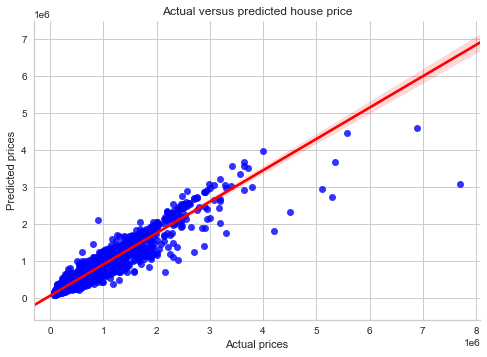

In [673]:
sns.regplot(x=y_train, y=y_pred, data=house, truncate=False, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.despine(left = False, bottom = False)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual versus predicted house price');

### Grid search: Checking residuals

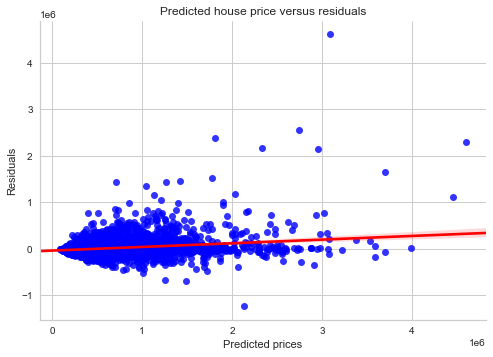

In [674]:
sns.regplot(x=y_pred, y=y_train-y_pred, data=house, truncate=False, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.despine(left = False, bottom = False)
plt.xlabel('Predicted prices')
plt.ylabel('Residuals')
plt.title('Predicted house price versus residuals')
plt.show();

### Grid search: Checking normality of errors

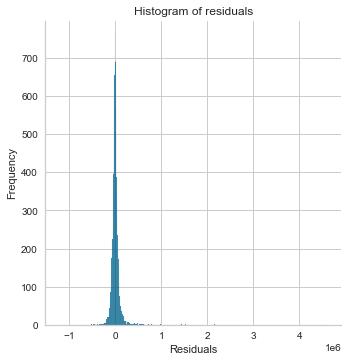

In [675]:
sns.displot(y_train-y_pred)
plt.title('Histogram of residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show();

<AxesSubplot:xlabel='price', ylabel='Count'>

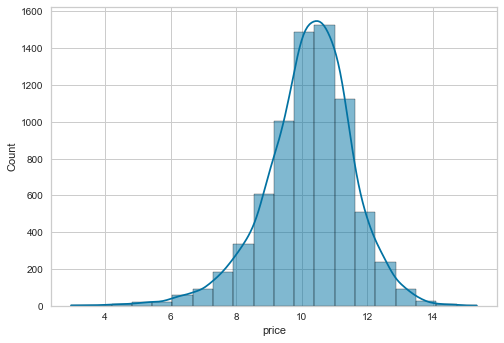

In [677]:
sns.histplot(np.log(y_train-y_pred), bins=20, kde=True)

### Grid  search scaled: Predicting test data with the model

In [678]:
y_test_pred = gbrp.predict(X_test_std)

In [679]:
y_test_pred

array([201552.26911745, 721766.4759111 , 498499.74408127, ...,
       582043.57733   , 524786.99990768, 553640.5270066 ])

In [680]:
# Model evaluation
acc_gbrp = metrics.r2_score(y_test, y_test_pred)

print('r^2:', acc_gbrp)
print('Adjusted r^2:', 1 - (1-acc_gbrp)*(len(y_test)-1)/(len(y_test)-X_test_std.shape[1]-1))
print('Root mean squared error or RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('Mean absolute percentage error or MAPE:', metrics.mean_absolute_percentage_error(y_test, y_test_pred))

r^2: 0.8076307949147785
Adjusted r^2: 0.8070951961999241
Root mean squared error or RMSE: 167064.16854644497
Mean absolute percentage error or MAPE: 0.16795887512524255


In [681]:
ar25t   = 1 - (1-acc_gbrp)*(len(y_test)-1)/(len(y_test)-X_test_std.shape[1]-1)
RMSE25t = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
MAPE25t = metrics.mean_absolute_percentage_error(y_test, y_test_pred)

In [682]:
# Models compared

models = pd.DataFrame({
    'Model': ['Linear regression', 'Random forest', 'XGBoost', 'Decision tree', 'Bagging', 'Gradient boost', 'XGBoost tuned',
             'Ridge', 'Lasso', 'Support vector', 'KNN', 'Elastic net', 'LR scaled', 'RF scaled',
             'XGB scaled', 'DT scaled', 'Bagging scaled', 'GBR scaled', 'XGB tuned scaled', 'Ridge scaled', 'Lasso scaled',
             'SV scaled', 'KNN scaled', 'Elastic Net scaled', 'GBR grid search'],
    'R-squared train': [r1*100, r2*100, r3*100, r4*100, r5*100, r6*100, r7*100,
                       r8*100, r9*100, r10*100, r11*100, r12*100, r13*100, r14*100,
                       r15*100, r16*100, r17*100, r18*100, r19*100, r20*100, r21*100,
                       r22*100, r23*100, r24*100, r25*100],
    'R-squared test': [acc_linreg*100, acc_rf*100, acc_xgb*100, acc_dt*100, acc_bgr*100, acc_gbr*100, acc_xgbt*100,
                      acc_rid*100, acc_las*100, acc_svr*100, acc_knn*100, acc_en*100, acc_linregs*100, acc_rfs*100,
                      acc_xgbs*100, acc_dts*100, acc_bgrs*100, acc_gbrs*100, acc_xgbts*100, acc_rids*100, acc_lass*100,
                      acc_svrs*100, acc_knns*100, acc_ens*100, acc_gbrp*100],
    'Adjusted r^2 train': [ar1*100, ar2*100, ar3*100, ar4*100, ar5*100, ar6*100, ar7*100,
                          ar8*100, ar9*100, ar10*100, ar11*100, ar12*100, ar13*100, ar14*100, 
                           ar15*100, ar16*100, ar17*100, ar18*100, ar19*100, ar20*100, ar21*100,
                          ar22*100, ar23*100, ar24*100, ar25*100],
    'Adjusted r^2 test': [ar1t*100, ar2t*100, ar3t*100, ar4t*100, ar5t*100, ar6t*100, ar7t*100,
                         ar8t*100, ar9t*100, ar10t*100, ar11t*100, ar12t*100, ar13t*100, ar14t*100, 
                          ar15t*100, ar16t*100, ar17t*100, ar18t*100, ar19t*100, ar20t*100, ar21t*100,
                         ar22t*100, ar23t*100, ar24t*100, ar25t*100],
    'RMSE train': [RMSE1, RMSE2, RMSE3, RMSE4, RMSE5, RMSE6, RMSE7,
                  RMSE8, RMSE9, RMSE10, RMSE11, RMSE12, RMSE13, RMSE14, 
                   RMSE15, RMSE16, RMSE17, RMSE18, RMSE19, RMSE20, RMSE21,
                  RMSE22, RMSE23, RMSE24, RMSE25],
    'RMSE test': [RMSE1t, RMSE2t, RMSE3t, RMSE4t, RMSE5t, RMSE6t, RMSE7t,
                 RMSE8t, RMSE9t, RMSE10t, RMSE11t, RMSE12t, RMSE13t, RMSE14t, 
                  RMSE15t, RMSE16t, RMSE17t, RMSE18t, RMSE19t, RMSE20t, RMSE21t,
                 RMSE22t, RMSE23t, RMSE24t, RMSE25t],
    'MAPE train': [MAPE1*100, MAPE2*100, MAPE3*100, MAPE4*100, MAPE5*100, MAPE6*100, MAPE7*100,
                  MAPE8*100, MAPE9*100, MAPE10*100, MAPE11*100, MAPE12*100, MAPE13*100, MAPE14*100, 
                   MAPE15*100, MAPE16*100, MAPE17*100, MAPE18*100, MAPE19*100, MAPE20*100, MAPE21*100,
                  MAPE22*100, MAPE23*100, MAPE24*100, MAPE25*100],
    'MAPE test': [MAPE1t*100, MAPE2t*100, MAPE3t*100, MAPE4t*100, MAPE5t*100, MAPE6t*100, MAPE7t*100,
                 MAPE8t*100, MAPE9t*100, MAPE10t*100, MAPE11t*100, MAPE12t*100, MAPE13t*100, MAPE14t*100,
                 MAPE15t*100, MAPE16t*100, MAPE17t*100,MAPE18t*100, MAPE19t*100, MAPE20t*100, MAPE21t*100,
                 MAPE22t*100, MAPE23t*100, MAPE24t*100, MAPE25t*100]})
models.sort_values(by='R-squared test', ascending=False)

Model  R-squared train  R-squared test  Adjusted r^2 train  \
18    XGB tuned scaled        91.363735       81.619175           91.343708   
6        XGBoost tuned        91.377945       81.597213           91.367673   
2              XGBoost        94.046928       80.815587           94.039836   
14          XGB scaled        94.046928       80.808355           94.033123   
24     GBR grid search        90.813926       80.763079           90.802983   
13           RF scaled        96.876027       80.243689           96.872306   
1        Random forest        96.799378       79.849331           96.795565   
16      Bagging scaled        95.940693       79.439973           95.935858   
4              Bagging        95.569198       78.732251           95.563919   
5       Gradient boost        78.748101       76.125344           78.722785   
17          GBR scaled        78.748101       76.116851           78.722785   
10                 KNN        99.901419       69.425183           99.901302   
22          KNN scaled        99.901457       67.923582           99.901339   
3        Decision tree        99.901457       66.194141           99.901339   
15           DT scaled        99.901457       65.588150           99.901339   
0    Linear regression        62.735288       63.985875           62.690896   
12           LR scaled        62.735288       63.985875           62.690896   
20        Lasso scaled        62.735288       63.985873           62.690896   
8                Lasso        62.735288       63.985872           62.690896   
7                Ridge        62.735288       63.985833           62.690896   
19        Ridge scaled        62.735288       63.985830           62.690896   
11         Elastic net        62.531538       63.663790           62.486903   
23  Elastic Net scaled        60.017347       60.410350           59.969717   
9       Support vector        -5.585952       -5.055077           -5.711733   
21           SV scaled        -5.608354       -5.078396           -5.734161   

    Adjusted r^2 test    RMSE train     RMSE test  MAPE train  MAPE test  
18          81.519403 106203.806813 163304.457769   14.443566  17.030198  
6           81.497322 106116.399784 163401.989883   14.431561  17.035787  
2           80.711453  88175.448577 166836.011069   12.933240  17.678436  
14          80.704182  88175.448577 166867.453067   12.933240  17.677506  
24          80.709520 109532.265793 167064.168546   10.577621  16.795888  
13          80.188683  63874.969840 169304.484358    6.613304  17.272223  
1           79.793227  64653.833797 170985.890579    6.634334  17.288556  
16          79.382729  72812.013383 172713.934679    7.444972  18.318549  
4           78.673037  76070.854405 175661.384969    7.456070  18.082261  
5           76.058872 166600.373692 186116.165598   20.453600  20.705725  
17          76.050355 166600.373692 186149.266086   20.453600  20.706333  
10          69.340056  11346.809687 210618.963505    0.286007  20.979356  
22          67.834274  11344.647799 215728.971046    0.285084  20.949293  
3           66.100018  11344.647799 221468.277568    0.285083  23.775299  
15          65.492339  11344.647799 223444.439536    0.285083  23.884684  
0           63.885604 220610.403879 228587.232400   24.434118  24.803116  
12          63.885604 220610.403879 228587.232400   24.434118  24.803116  
20          63.885601 220610.403881 228587.241499   24.434101  24.803098  
8           63.885601 220610.403880 228587.242060   24.434111  24.803109  
7           63.885562 220610.403936 228587.365746   24.434026  24.803032  
19          63.885559 220610.403947 228587.375702   24.433932  24.802931  
11          63.562622 221212.691532 229607.120150   24.330047  24.743568  
23          60.300124 228514.051466 239665.967291   24.431973  24.893063  
9           -5.347573 371347.217633 390412.811279   42.459051  43.341094  
21          -5.370957 371386.608526 390456.138563   42.425142  43.304213

Similarly, we'll try iterative proccess to improve the score of the XGBoost model

### Regularization using GridSearchCV - 1st Iteration 

In [684]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
skf = KFold(n_splits=5)

XGB_ht_1=XGBRegressor(objective='reg:squarederror', booster='gbtree')
params1 = {
    "colsample_bytree": [i/100.0 for i in range(66,74,2)],
    "learning_rate": [0.2,0.22,0.24], 
    "n_estimators": [185,188,1],
    "subsample": [i/100.0 for i in range(62,68,1)]
}
XGB_GV_1 = GridSearchCV(estimator = XGB_ht_1, param_grid = params1, 
                        cv=skf,
                        verbose = 1,
                       return_train_score=True,n_jobs=1) 
XGB_GV_1.fit(X1_train, y1_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=XGBRegressor(base_score=None, booster='gbtree',
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=na...
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
                          

In [685]:
# results of grid search CV
XGB_results_1 = pd.DataFrame(XGB_GV_1.cv_results_)
#parameters best value
best_score_xgb_1 = XGB_GV_1.best_score_
best_xgb_1 = XGB_GV_1.best_params_
best_xgb_1

{'colsample_bytree': 0.7,
 'learning_rate': 0.22,
 'n_estimators': 185,
 'subsample': 0.65}

In [687]:
#Choosing best parameter from 1st Iteration
xgb_best_1 = XGBRegressor(colsample_bytree=0.7,learning_rate=0.22,n_estimators=185,subsample=0.65,objective='reg:squarederror', booster='gbtree')

In [834]:
# xgb_best_1.fit(X1_train, y1_train)

In [832]:
#Feature importance function
# def feat_imp(model,X1_train):
#    imp_feature_1=pd.DataFrame(model.feature_importances_, columns = ["Imp"], index = X1_train.columns)
#    imp_feature_1=imp_feature_1.sort_values(by="Imp",ascending=False)
#    print(imp_feature_1)
    
#    #feature importance
#    plt.figure(figsize=(10,10))
#    imp_feature_1[:30].plot.bar(figsize=(15,5))

#    #First 20 and 30 feature importance sum
#    print("\nFirst 8 feature importance:\t",(imp_feature_1[:8].sum())*100)
#    print("\nFirst 12 feature importance:\t",(imp_feature_1[:12].sum())*100)

In [835]:
#Feature importance
#feat_imp(xgb_best_1,X1_train)

### Regularization using GridSearchCV - 2nd Iteration

In [688]:
params2 = {
    'min_child_weight':[6,7,8,9,10],"max_depth": [3,4,5],
}

xgb_best_2 = GridSearchCV(estimator = xgb_best_1, param_grid = params2, 
                        cv=skf,
                        verbose = 1,
                       return_train_score=True,n_jobs=1) 

xgb_best_2.fit(X1_train, y1_train) 

# results of grid search CV
XGB_results_2 = pd.DataFrame(xgb_best_2.cv_results_)
XGB_results_2

#parameters best value
best_score_xgb_2 = xgb_best_2.best_score_
best_xgb_2 = xgb_best_2.best_params_
best_xgb_2

Fitting 5 folds for each of 15 candidates, totalling 75 fits


{'max_depth': 4, 'min_child_weight': 6}

In [689]:
#Choosing best parameter from 2nd Iteration
xgb_best_2 = XGBRegressor(colsample_bytree=0.7,learning_rate=0.22,n_estimators=185,subsample=0.65,objective='reg:squarederror', max_depth=4,min_child_weight=6)

### Regularization using GridSearchCV - 3rd Iteration

In [691]:
params3 = {
    'gamma':[i/1.0 for i in range(50,55,1)]
}

xgb_best_3 = GridSearchCV(estimator = xgb_best_2, param_grid = params3, 
                        cv=skf,
                        verbose = 1,
                       return_train_score=True) 

xgb_best_3.fit(X1_train, y1_train) 

# results of grid search CV
XGB_results_3 = pd.DataFrame(xgb_best_3.cv_results_)
XGB_results_3

#parameters best value
best_score_xgb_3 = xgb_best_3.best_score_
best_xgb_3 = xgb_best_3.best_params_
best_xgb_3

Fitting 5 folds for each of 5 candidates, totalling 25 fits


{'gamma': 50.0}

In [692]:
#Choosing best parameter from 3rd Iteration
xgb_best_3 = XGBRegressor(colsample_bytree=0.7,learning_rate=0.22,n_estimators=185,subsample=0.65,objective='reg:squarederror', max_depth=4,min_child_weight=6,gamma=50)

In [693]:
xgb_best_3

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=0.7, gamma=50, gpu_id=None,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.22, max_delta_step=None, max_depth=4,
             min_child_weight=6, missing=nan, monotone_constraints=None,
             n_estimators=185, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=0.65, tree_method=None,
             validate_parameters=None, verbosity=None)

In [694]:
xgp =  xgb_best_3.fit(X1_train_std, y1_train)

In [695]:
xgp

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=50, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.22, max_delta_step=0, max_depth=4,
             min_child_weight=6, missing=nan, monotone_constraints='()',
             n_estimators=185, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.65,
             tree_method='exact', validate_parameters=1, verbosity=None)

### XGBoost grid: Model Prediction on train data

In [696]:
y_pred = xgp.predict(X1_train_std)

In [697]:
print('r^2:', metrics.r2_score(y1_train, y_pred))
print('Adjusted r^2:', 1 - (1-metrics.r2_score(y1_train, y_pred))*(len(y1_train)-1)/(len(y1_train)-X1_train_std.shape[1]-1))
print('Root mean squared error or RMSE:', np.sqrt(metrics.mean_squared_error(y1_train, y_pred)))
print('Mean absolute percentage error or MAPE:', metrics.mean_absolute_percentage_error(y1_train, y_pred))

r^2: 0.880691449332203
Adjusted r^2: 0.8804147780757681
Root mean squared error or RMSE: 124828.25192784295
Mean absolute percentage error or MAPE: 0.16226620385280202


In [698]:
r26    = metrics.r2_score(y1_train, y_pred)
ar26   = 1 - (1-metrics.r2_score(y1_train, y_pred))*(len(y1_train)-1)/(len(y1_train)-X1_train_std.shape[1]-1)
RMSE26 = np.sqrt(metrics.mean_squared_error(y1_train, y_pred))
MAPE26 = metrics.mean_absolute_percentage_error(y1_train, y_pred)

### XGBoost grid: Visualising the differencce between actual and predicted prices

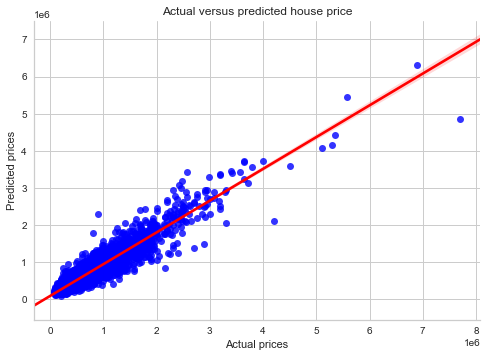

In [699]:
sns.regplot(x=y1_train, y=y_pred, data=house, truncate=False, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.despine(left = False, bottom = False)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual versus predicted house price');

### XGBoost grid: Inspecting residuals

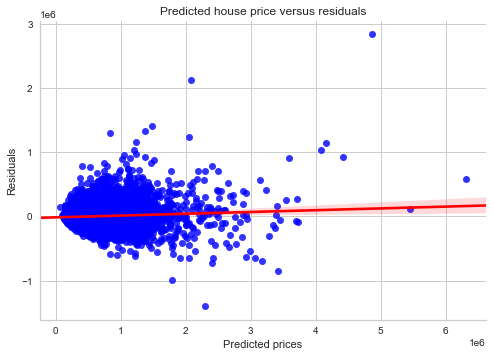

In [700]:
sns.regplot(x=y_pred, y=y1_train-y_pred, data=house, truncate=False, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.despine(left = False, bottom = False)
plt.xlabel('Predicted prices')
plt.ylabel('Residuals')
plt.title('Predicted house price versus residuals')
plt.show();

### XGBoost grid: Checking normality of errors

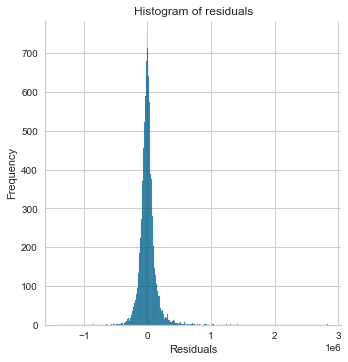

In [701]:
sns.displot(y1_train-y_pred)
plt.title('Histogram of residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show();

<AxesSubplot:xlabel='price', ylabel='Count'>

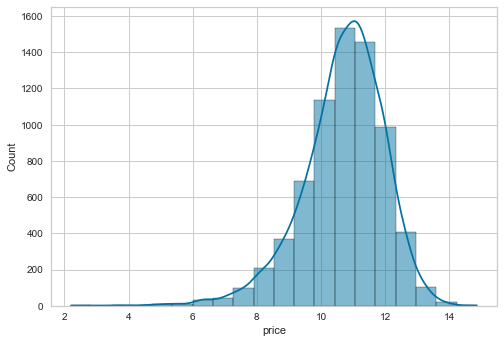

In [710]:
sns.histplot(np.log1p(y1_train-y_pred), bins=20, kde=True) 

### XGBoost: Model evaluation

In [711]:
# Predicting test data with the model
y_test_pred = xgp.predict(X1_test_std)

In [712]:
y_test_pred

array([225153.72, 867071.75, 527496.25, ..., 544955.06, 555536.2 ,
       519326.5 ], dtype=float32)

In [713]:
# Model evaluation
acc_xgp = metrics.r2_score(y1_test, y_test_pred)
print('r^2:', acc_xgp)
print('Adjusted r^2:', 1 - (1-acc_xgp)*(len(y1_test)-1)/(len(y1_test)-X1_test_std.shape[1]-1))
print('Root mean squared error or RMSE:', np.sqrt(metrics.mean_squared_error(y1_test, y_test_pred)))
print('Mean absolute percentage error or MAPE:', metrics.mean_absolute_percentage_error(y1_test, y_test_pred))

r^2: 0.8083257867513514
Adjusted r^2: 0.8072853715119434
Root mean squared error or RMSE: 166762.11060492313
Mean absolute percentage error or MAPE: 0.18133831573078638


In [714]:
ar26t   = 1 - (1-acc_xgp)*(len(y1_test)-1)/(len(y1_test)-X1_test_std.shape[1]-1)
RMSE26t = np.sqrt(metrics.mean_squared_error(y1_test, y_test_pred))
MAPE26t = metrics.mean_absolute_percentage_error(y1_test, y_test_pred)

In [715]:
# Models compared

models = pd.DataFrame({
    'Model': ['Linear regression', 'Random forest', 'XGBoost', 'Decision tree', 'Bagging', 'Gradient boost', 'XGBoost tuned',
             'Ridge', 'Lasso', 'Support vector', 'KNN', 'Elastic net', 'LR scaled', 'RF scaled',
             'XGB scaled', 'DT scaled', 'Bagging scaled', 'GBR scaled', 'XGB tuned scaled', 'Ridge scaled', 'Lasso scaled',
             'SV scaled', 'KNN scaled', 'Elastic Net scaled', 'GBR grid search', 'XGB grid1'],
    'R-squared train': [r1*100, r2*100, r3*100, r4*100, r5*100, r6*100, r7*100,
                       r8*100, r9*100, r10*100, r11*100, r12*100, r13*100, r14*100,
                       r15*100, r16*100, r17*100, r18*100, r19*100, r20*100, r21*100,
                       r22*100, r23*100, r24*100, r25*100, r26*100],
    'R-squared test': [acc_linreg*100, acc_rf*100, acc_xgb*100, acc_dt*100, acc_bgr*100, acc_gbr*100, acc_xgbt*100,
                      acc_rid*100, acc_las*100, acc_svr*100, acc_knn*100, acc_en*100, acc_linregs*100, acc_rfs*100,
                      acc_xgbs*100, acc_dts*100, acc_bgrs*100, acc_gbrs*100, acc_xgbts*100, acc_rids*100, acc_lass*100,
                      acc_svrs*100, acc_knns*100, acc_ens*100, acc_gbrp*100, acc_xgp*100],
    'Adjusted r^2 train': [ar1*100, ar2*100, ar3*100, ar4*100, ar5*100, ar6*100, ar7*100,
                          ar8*100, ar9*100, ar10*100, ar11*100, ar12*100, ar13*100, ar14*100, 
                           ar15*100, ar16*100, ar17*100, ar18*100, ar19*100, ar20*100, ar21*100,
                          ar22*100, ar23*100, ar24*100, ar25*100, ar26*100],
    'Adjusted r^2 test': [ar1t*100, ar2t*100, ar3t*100, ar4t*100, ar5t*100, ar6t*100, ar7t*100,
                         ar8t*100, ar9t*100, ar10t*100, ar11t*100, ar12t*100, ar13t*100, ar14t*100, 
                          ar15t*100, ar16t*100, ar17t*100, ar18t*100, ar19t*100, ar20t*100, ar21t*100,
                         ar22t*100, ar23t*100, ar24t*100, ar25t*100, ar26t*100],
    'RMSE train': [RMSE1, RMSE2, RMSE3, RMSE4, RMSE5, RMSE6, RMSE7,
                  RMSE8, RMSE9, RMSE10, RMSE11, RMSE12, RMSE13, RMSE14, 
                   RMSE15, RMSE16, RMSE17, RMSE18, RMSE19, RMSE20, RMSE21,
                  RMSE22, RMSE23, RMSE24, RMSE25, RMSE26],
    'RMSE test': [RMSE1t, RMSE2t, RMSE3t, RMSE4t, RMSE5t, RMSE6t, RMSE7t,
                 RMSE8t, RMSE9t, RMSE10t, RMSE11t, RMSE12t, RMSE13t, RMSE14t, 
                  RMSE15t, RMSE16t, RMSE17t, RMSE18t, RMSE19t, RMSE20t, RMSE21t,
                 RMSE22t, RMSE23t, RMSE24t, RMSE25t, RMSE26t],
    'MAPE train': [MAPE1*100, MAPE2*100, MAPE3*100, MAPE4*100, MAPE5*100, MAPE6*100, MAPE7*100,
                  MAPE8*100, MAPE9*100, MAPE10*100, MAPE11*100, MAPE12*100, MAPE13*100, MAPE14*100, 
                   MAPE15*100, MAPE16*100, MAPE17*100, MAPE18*100, MAPE19*100, MAPE20*100, MAPE21*100,
                  MAPE22*100, MAPE23*100, MAPE24*100, MAPE25*100, MAPE26*100],
    'MAPE test': [MAPE1t*100, MAPE2t*100, MAPE3t*100, MAPE4t*100, MAPE5t*100, MAPE6t*100, MAPE7t*100,
                 MAPE8t*100, MAPE9t*100, MAPE10t*100, MAPE11t*100, MAPE12t*100, MAPE13t*100, MAPE14t*100,
                 MAPE15t*100, MAPE16t*100, MAPE17t*100,MAPE18t*100, MAPE19t*100, MAPE20t*100, MAPE21t*100,
                 MAPE22t*100, MAPE23t*100, MAPE24t*100, MAPE25t*100, MAPE26t*100]})
models.sort_values(by='R-squared test', ascending=False)

Model  R-squared train  R-squared test  Adjusted r^2 train  \
18    XGB tuned scaled        91.363735       81.619175           91.343708   
6        XGBoost tuned        91.377945       81.597213           91.367673   
25           XGB grid1        88.069145       80.832579           88.041478   
2              XGBoost        94.046928       80.815587           94.039836   
14          XGB scaled        94.046928       80.808355           94.033123   
24     GBR grid search        90.813926       80.763079           90.802983   
13           RF scaled        96.876027       80.243689           96.872306   
1        Random forest        96.799378       79.849331           96.795565   
16      Bagging scaled        95.940693       79.439973           95.935858   
4              Bagging        95.569198       78.732251           95.563919   
5       Gradient boost        78.748101       76.125344           78.722785   
17          GBR scaled        78.748101       76.116851           78.722785   
10                 KNN        99.901419       69.425183           99.901302   
22          KNN scaled        99.901457       67.923582           99.901339   
3        Decision tree        99.901457       66.194141           99.901339   
15           DT scaled        99.901457       65.588150           99.901339   
0    Linear regression        62.735288       63.985875           62.690896   
12           LR scaled        62.735288       63.985875           62.690896   
20        Lasso scaled        62.735288       63.985873           62.690896   
8                Lasso        62.735288       63.985872           62.690896   
7                Ridge        62.735288       63.985833           62.690896   
19        Ridge scaled        62.735288       63.985830           62.690896   
11         Elastic net        62.531538       63.663790           62.486903   
23  Elastic Net scaled        60.017347       60.410350           59.969717   
9       Support vector        -5.585952       -5.055077           -5.711733   
21           SV scaled        -5.608354       -5.078396           -5.734161   

    Adjusted r^2 test    RMSE train     RMSE test  MAPE train  MAPE test  
18          81.519403 106203.806813 163304.457769   14.443566  17.030198  
6           81.497322 106116.399784 163401.989883   14.431561  17.035787  
25          80.728537 124828.251928 166762.110605   16.226620  18.133832  
2           80.711453  88175.448577 166836.011069   12.933240  17.678436  
14          80.704182  88175.448577 166867.453067   12.933240  17.677506  
24          80.709520 109532.265793 167064.168546   10.577621  16.795888  
13          80.188683  63874.969840 169304.484358    6.613304  17.272223  
1           79.793227  64653.833797 170985.890579    6.634334  17.288556  
16          79.382729  72812.013383 172713.934679    7.444972  18.318549  
4           78.673037  76070.854405 175661.384969    7.456070  18.082261  
5           76.058872 166600.373692 186116.165598   20.453600  20.705725  
17          76.050355 166600.373692 186149.266086   20.453600  20.706333  
10          69.340056  11346.809687 210618.963505    0.286007  20.979356  
22          67.834274  11344.647799 215728.971046    0.285084  20.949293  
3           66.100018  11344.647799 221468.277568    0.285083  23.775299  
15          65.492339  11344.647799 223444.439536    0.285083  23.884684  
0           63.885604 220610.403879 228587.232400   24.434118  24.803116  
12          63.885604 220610.403879 228587.232400   24.434118  24.803116  
20          63.885601 220610.403881 228587.241499   24.434101  24.803098  
8           63.885601 220610.403880 228587.242060   24.434111  24.803109  
7           63.885562 220610.403936 228587.365746   24.434026  24.803032  
19          63.885559 220610.403947 228587.375702   24.433932  24.802931  
11          63.562622 221212.691532 229607.120150   24.330047  24.743568  
23          60.300124 228514.051466 239665.967291   24.431973  24.893063  
9       

### XG Boost grid2

In [716]:
xgb_best_2

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=0.7, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=0.22, max_delta_step=None, max_depth=4,
             min_child_weight=6, missing=nan, monotone_constraints=None,
             n_estimators=185, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=0.65, tree_method=None,
             validate_parameters=None, verbosity=None)

In [717]:
xgp1 =  xgb_best_2.fit(X1_train_std, y1_train)

In [718]:
xgp1

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.22, max_delta_step=0, max_depth=4,
             min_child_weight=6, missing=nan, monotone_constraints='()',
             n_estimators=185, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.65,
             tree_method='exact', validate_parameters=1, verbosity=None)

### XGBoost grid 2: Model Prediction on train data

In [719]:
y_pred = xgp1.predict(X1_train_std)

In [720]:
print('r^2:', metrics.r2_score(y1_train, y_pred))
print('Adjusted r^2:', 1 - (1-metrics.r2_score(y1_train, y_pred))*(len(y1_train)-1)/(len(y1_train)-X1_train_std.shape[1]-1))
print('Root mean squared error or RMSE:', np.sqrt(metrics.mean_squared_error(y1_train, y_pred)))
print('Mean absolute percentage error or MAPE:', metrics.mean_absolute_percentage_error(y1_train, y_pred))

r^2: 0.880691449332203
Adjusted r^2: 0.8804147780757681
Root mean squared error or RMSE: 124828.25192784295
Mean absolute percentage error or MAPE: 0.16226620385280202


In [721]:
r27    = metrics.r2_score(y1_train, y_pred)
ar27   = 1 - (1-metrics.r2_score(y1_train, y_pred))*(len(y1_train)-1)/(len(y1_train)-X1_train_std.shape[1]-1)
RMSE27 = np.sqrt(metrics.mean_squared_error(y1_train, y_pred))
MAPE27 = metrics.mean_absolute_percentage_error(y1_train, y_pred)

### XGBoost grid2: Visualising the differencce between actual and predicted prices

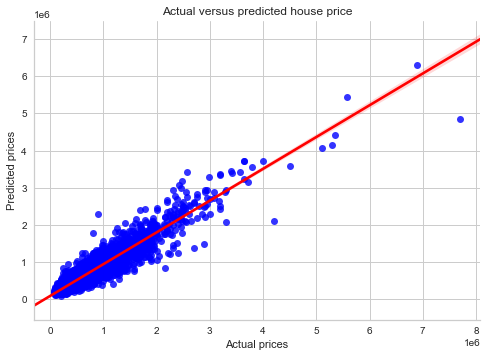

In [722]:
sns.regplot(x=y1_train, y=y_pred, data=house, truncate=False, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.despine(left = False, bottom = False)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual versus predicted house price');

### XGBoost grid2: Inspecting residuals

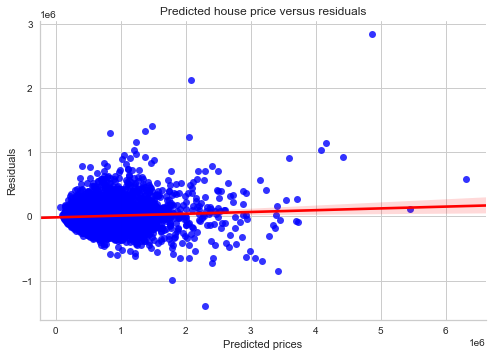

In [723]:
sns.regplot(x=y_pred, y=y1_train-y_pred, data=house, truncate=False, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.despine(left = False, bottom = False)
plt.xlabel('Predicted prices')
plt.ylabel('Residuals')
plt.title('Predicted house price versus residuals')
plt.show();

### XGBoost grid2: Checking normality of errors

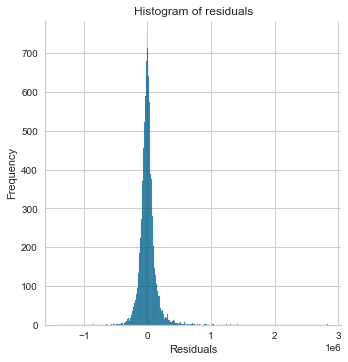

In [724]:
sns.displot(y1_train-y_pred)
plt.title('Histogram of residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show();

<AxesSubplot:xlabel='price', ylabel='Count'>

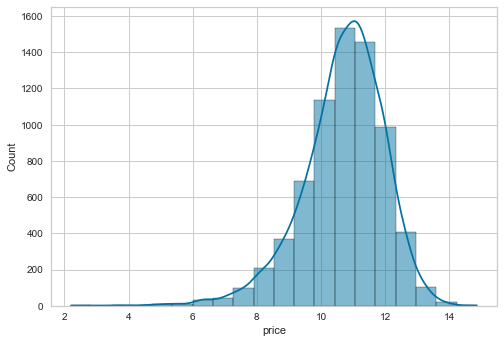

In [728]:
sns.histplot(np.log1p(y1_train-y_pred), bins=20, kde=True)

### XGBoost grid2: Model evaluation

In [729]:
# Predicting test data with the model
y_test_pred = xgp1.predict(X1_test_std)

In [730]:
y_test_pred

array([225153.72, 867071.75, 527496.25, ..., 544955.06, 555536.2 ,
       519326.5 ], dtype=float32)

In [731]:
# Model evaluation
acc_xgp1 = metrics.r2_score(y1_test, y_test_pred)
print('r^2:', acc_xgp1)
print('Adjusted r^2:', 1 - (1-acc_xgp1)*(len(y1_test)-1)/(len(y1_test)-X1_test_std.shape[1]-1))
print('Root mean squared error or RMSE:', np.sqrt(metrics.mean_squared_error(y1_test, y_test_pred)))
print('Mean absolute percentage error or MAPE:', metrics.mean_absolute_percentage_error(y1_test, y_test_pred))

r^2: 0.8083257867513514
Adjusted r^2: 0.8072853715119434
Root mean squared error or RMSE: 166762.11060492313
Mean absolute percentage error or MAPE: 0.18133831573078638


In [732]:
ar27t   = 1 - (1-acc_xgp1)*(len(y1_test)-1)/(len(y1_test)-X1_test_std.shape[1]-1)
RMSE27t = np.sqrt(metrics.mean_squared_error(y1_test, y_test_pred))
MAPE27t = metrics.mean_absolute_percentage_error(y1_test, y_test_pred)

In [733]:
# Models compared

models = pd.DataFrame({
    'Model': ['Linear regression', 'Random forest', 'XGBoost', 'Decision tree', 'Bagging', 'Gradient boost', 'XGBoost tuned',
             'Ridge', 'Lasso', 'Support vector', 'KNN', 'Elastic net', 'LR scaled', 'RF scaled',
             'XGB scaled', 'DT scaled', 'Bagging scaled', 'GBR scaled', 'XGB tuned scaled', 'Ridge scaled', 'Lasso scaled',
             'SV scaled', 'KNN scaled', 'Elastic Net scaled', 'GBR grid search', 'XGB grid1', 'XGB grid2'],
    'R-squared train': [r1*100, r2*100, r3*100, r4*100, r5*100, r6*100, r7*100,
                       r8*100, r9*100, r10*100, r11*100, r12*100, r13*100, r14*100,
                       r15*100, r16*100, r17*100, r18*100, r19*100, r20*100, r21*100,
                       r22*100, r23*100, r24*100, r25*100, r26*100, r27*100],
    'R-squared test': [acc_linreg*100, acc_rf*100, acc_xgb*100, acc_dt*100, acc_bgr*100, acc_gbr*100, acc_xgbt*100,
                      acc_rid*100, acc_las*100, acc_svr*100, acc_knn*100, acc_en*100, acc_linregs*100, acc_rfs*100,
                      acc_xgbs*100, acc_dts*100, acc_bgrs*100, acc_gbrs*100, acc_xgbts*100, acc_rids*100, acc_lass*100,
                      acc_svrs*100, acc_knns*100, acc_ens*100, acc_gbrp*100, acc_xgp*100, acc_xgp1*100],
    'Adjusted r^2 train': [ar1*100, ar2*100, ar3*100, ar4*100, ar5*100, ar6*100, ar7*100,
                          ar8*100, ar9*100, ar10*100, ar11*100, ar12*100, ar13*100, ar14*100, 
                           ar15*100, ar16*100, ar17*100, ar18*100, ar19*100, ar20*100, ar21*100,
                          ar22*100, ar23*100, ar24*100, ar25*100, ar26*100, ar27*100],
    'Adjusted r^2 test': [ar1t*100, ar2t*100, ar3t*100, ar4t*100, ar5t*100, ar6t*100, ar7t*100,
                         ar8t*100, ar9t*100, ar10t*100, ar11t*100, ar12t*100, ar13t*100, ar14t*100, 
                          ar15t*100, ar16t*100, ar17t*100, ar18t*100, ar19t*100, ar20t*100, ar21t*100,
                         ar22t*100, ar23t*100, ar24t*100, ar25t*100, ar26t*100, ar27t*100],
    'RMSE train': [RMSE1, RMSE2, RMSE3, RMSE4, RMSE5, RMSE6, RMSE7,
                  RMSE8, RMSE9, RMSE10, RMSE11, RMSE12, RMSE13, RMSE14, 
                   RMSE15, RMSE16, RMSE17, RMSE18, RMSE19, RMSE20, RMSE21,
                  RMSE22, RMSE23, RMSE24, RMSE25, RMSE26, RMSE27],
    'RMSE test': [RMSE1t, RMSE2t, RMSE3t, RMSE4t, RMSE5t, RMSE6t, RMSE7t,
                 RMSE8t, RMSE9t, RMSE10t, RMSE11t, RMSE12t, RMSE13t, RMSE14t, 
                  RMSE15t, RMSE16t, RMSE17t, RMSE18t, RMSE19t, RMSE20t, RMSE21t,
                 RMSE22t, RMSE23t, RMSE24t, RMSE25t, RMSE26t, RMSE27t],
    'MAPE train': [MAPE1*100, MAPE2*100, MAPE3*100, MAPE4*100, MAPE5*100, MAPE6*100, MAPE7*100,
                  MAPE8*100, MAPE9*100, MAPE10*100, MAPE11*100, MAPE12*100, MAPE13*100, MAPE14*100, 
                   MAPE15*100, MAPE16*100, MAPE17*100, MAPE18*100, MAPE19*100, MAPE20*100, MAPE21*100,
                  MAPE22*100, MAPE23*100, MAPE24*100, MAPE25*100, MAPE26*100, MAPE27*100],
    'MAPE test': [MAPE1t*100, MAPE2t*100, MAPE3t*100, MAPE4t*100, MAPE5t*100, MAPE6t*100, MAPE7t*100,
                 MAPE8t*100, MAPE9t*100, MAPE10t*100, MAPE11t*100, MAPE12t*100, MAPE13t*100, MAPE14t*100,
                 MAPE15t*100, MAPE16t*100, MAPE17t*100,MAPE18t*100, MAPE19t*100, MAPE20t*100, MAPE21t*100,
                 MAPE22t*100, MAPE23t*100, MAPE24t*100, MAPE25t*100, MAPE26t*100, MAPE27t*100]})
models.sort_values(by='R-squared test', ascending=False)

Model  R-squared train  R-squared test  Adjusted r^2 train  \
18    XGB tuned scaled        91.363735       81.619175           91.343708   
6        XGBoost tuned        91.377945       81.597213           91.367673   
26           XGB grid2        88.069145       80.832579           88.041478   
25           XGB grid1        88.069145       80.832579           88.041478   
2              XGBoost        94.046928       80.815587           94.039836   
14          XGB scaled        94.046928       80.808355           94.033123   
24     GBR grid search        90.813926       80.763079           90.802983   
13           RF scaled        96.876027       80.243689           96.872306   
1        Random forest        96.799378       79.849331           96.795565   
16      Bagging scaled        95.940693       79.439973           95.935858   
4              Bagging        95.569198       78.732251           95.563919   
5       Gradient boost        78.748101       76.125344           78.722785   
17          GBR scaled        78.748101       76.116851           78.722785   
10                 KNN        99.901419       69.425183           99.901302   
22          KNN scaled        99.901457       67.923582           99.901339   
3        Decision tree        99.901457       66.194141           99.901339   
15           DT scaled        99.901457       65.588150           99.901339   
0    Linear regression        62.735288       63.985875           62.690896   
12           LR scaled        62.735288       63.985875           62.690896   
20        Lasso scaled        62.735288       63.985873           62.690896   
8                Lasso        62.735288       63.985872           62.690896   
7                Ridge        62.735288       63.985833           62.690896   
19        Ridge scaled        62.735288       63.985830           62.690896   
11         Elastic net        62.531538       63.663790           62.486903   
23  Elastic Net scaled        60.017347       60.410350           59.969717   
9       Support vector        -5.585952       -5.055077           -5.711733   
21           SV scaled        -5.608354       -5.078396           -5.734161   

    Adjusted r^2 test    RMSE train     RMSE test  MAPE train  MAPE test  
18          81.519403 106203.806813 163304.457769   14.443566  17.030198  
6           81.497322 106116.399784 163401.989883   14.431561  17.035787  
26          80.728537 124828.251928 166762.110605   16.226620  18.133832  
25          80.728537 124828.251928 166762.110605   16.226620  18.133832  
2           80.711453  88175.448577 166836.011069   12.933240  17.678436  
14          80.704182  88175.448577 166867.453067   12.933240  17.677506  
24          80.709520 109532.265793 167064.168546   10.577621  16.795888  
13          80.188683  63874.969840 169304.484358    6.613304  17.272223  
1           79.793227  64653.833797 170985.890579    6.634334  17.288556  
16          79.382729  72812.013383 172713.934679    7.444972  18.318549  
4           78.673037  76070.854405 175661.384969    7.456070  18.082261  
5           76.058872 166600.373692 186116.165598   20.453600  20.705725  
17          76.050355 166600.373692 186149.266086   20.453600  20.706333  
10          69.340056  11346.809687 210618.963505    0.286007  20.979356  
22          67.834274  11344.647799 215728.971046    0.285084  20.949293  
3           66.100018  11344.647799 221468.277568    0.285083  23.775299  
15          65.492339  11344.647799 223444.439536    0.285083  23.884684  
0           63.885604 220610.403879 228587.232400   24.434118  24.803116  
12          63.885604 220610.403879 228587.232400   24.434118  24.803116  
20          63.885601 220610.403881 228587.241499   24.434101  24.803098  
8           63.885601 220610.403880 228587.242060   24.434111  24.803109  
7           63.885562 220610.403936 228587.365746   24.434026  24.803032  
19          63.885559 220610.403947 228587.375702   24.433932  24.802931  
11  

### XGBoost grid3

In [734]:
xgb_best_1

XGBRegressor(base_score=None, booster='gbtree', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=0.7, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=0.22, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=185, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=0.65, tree_method=None,
             validate_parameters=None, verbosity=None)

In [735]:
xgp2 =  xgb_best_1.fit(X1_train_std, y1_train)

In [736]:
xgp2

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.22, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=185, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.65,
             tree_method='exact', validate_parameters=1, verbosity=None)

### XGBoost grid 2: Model Prediction on train data

In [737]:
y_pred = xgp2.predict(X1_train_std)

In [876]:
print('r^2:', metrics.r2_score(y1_train, y_pred))
print('Adjusted r^2:', 1 - (1-metrics.r2_score(y1_train, y_pred))*(len(y1_train)-1)/(len(y1_train)-X1_train_std.shape[1]-1))
print('Root mean squared error or RMSE:', np.sqrt(metrics.mean_squared_error(y1_train, y_pred)))
print('Mean absolute percentage error or MAPE:', metrics.mean_absolute_percentage_error(y1_train, y_pred))

r^2: 0.949477215516367
Adjusted r^2: 0.9493600554118863
Root mean squared error or RMSE: 81230.8023121788
Mean absolute percentage error or MAPE: 0.1246893977425414


In [738]:
r28    = metrics.r2_score(y1_train, y_pred)
ar28   = 1 - (1-metrics.r2_score(y1_train, y_pred))*(len(y1_train)-1)/(len(y1_train)-X1_train_std.shape[1]-1)
RMSE28 = np.sqrt(metrics.mean_squared_error(y1_train, y_pred))
MAPE28 = metrics.mean_absolute_percentage_error(y1_train, y_pred)

### XGBoost grid2: Visualising the differencce between actual and predicted prices

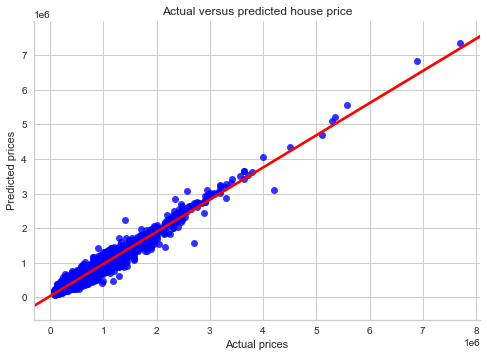

In [739]:
sns.regplot(x=y1_train, y=y_pred, data=house, truncate=False, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.despine(left = False, bottom = False)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual versus predicted house price');

### XGBoost grid2: Inspecting residuals

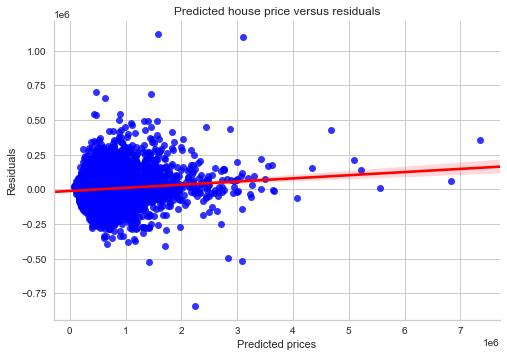

In [740]:
sns.regplot(x=y_pred, y=y1_train-y_pred, data=house, truncate=False, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.despine(left = False, bottom = False)
plt.xlabel('Predicted prices')
plt.ylabel('Residuals')
plt.title('Predicted house price versus residuals')
plt.show();

### XGBoost grid2: Checking normality of errors

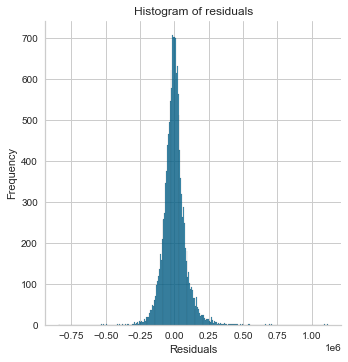

In [741]:
sns.displot(y1_train-y_pred)
plt.title('Histogram of residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show();

<AxesSubplot:xlabel='price', ylabel='Count'>

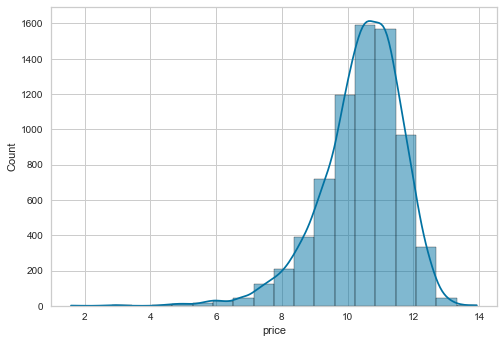

In [742]:
sns.histplot(np.log1p(y1_train-y_pred), bins=20,  kde=True)

### XGBoost grid2: Model evaluation

In [744]:
# Predicting test data with the model
y_test_pred = xgp2.predict(X1_test_std)

In [745]:
y_test_pred

array([226558.98, 774862.2 , 446262.5 , ..., 554687.3 , 544902.44,
       593101.6 ], dtype=float32)

In [746]:
# Model evaluation
acc_xgp2 = metrics.r2_score(y1_test, y_test_pred)

print('r^2:', acc_xgp2)
print('Adjusted r^2:', 1 - (1-acc_xgp2)*(len(y1_test)-1)/(len(y1_test)-X1_test_std.shape[1]-1))
print('Root mean squared error or RMSE:', np.sqrt(metrics.mean_squared_error(y1_test, y_test_pred)))
print('Mean absolute percentage error or MAPE:', metrics.mean_absolute_percentage_error(y1_test, y_test_pred))

r^2: 0.797288954589753
Adjusted r^2: 0.796188630987185
Root mean squared error or RMSE: 171496.09878825894
Mean absolute percentage error or MAPE: 0.1774863221205069


In [747]:
ar28t   = 1 - (1-acc_xgp2)*(len(y1_test)-1)/(len(y1_test)-X1_test_std.shape[1]-1)
RMSE28t = np.sqrt(metrics.mean_squared_error(y1_test, y_test_pred))
MAPE28t = metrics.mean_absolute_percentage_error(y1_test, y_test_pred)

In [748]:
# Models compared

models = pd.DataFrame({
    'Model': ['Linear regression', 'Random forest', 'XGBoost', 'Decision tree', 'Bagging', 'Gradient boost', 'XGBoost tuned',
             'Ridge', 'Lasso', 'Support vector', 'KNN', 'Elastic net', 'LR scaled', 'RF scaled',
             'XGB scaled', 'DT scaled', 'Bagging scaled', 'GBR scaled', 'XGB tuned scaled', 'Ridge scaled', 'Lasso scaled',
             'SV scaled', 'KNN scaled', 'Elastic Net scaled', 'GBR grid search', 'XGB grid1', 'XGB grid2', 'XGB grid3'],
    'R-squared train': [r1*100, r2*100, r3*100, r4*100, r5*100, r6*100, r7*100,
                       r8*100, r9*100, r10*100, r11*100, r12*100, r13*100, r14*100,
                       r15*100, r16*100, r17*100, r18*100, r19*100, r20*100, r21*100,
                       r22*100, r23*100, r24*100, r25*100, r26*100, r27*100, r28*100],
    'R-squared test': [acc_linreg*100, acc_rf*100, acc_xgb*100, acc_dt*100, acc_bgr*100, acc_gbr*100, acc_xgbt*100,
                      acc_rid*100, acc_las*100, acc_svr*100, acc_knn*100, acc_en*100, acc_linregs*100, acc_rfs*100,
                      acc_xgbs*100, acc_dts*100, acc_bgrs*100, acc_gbrs*100, acc_xgbts*100, acc_rids*100, acc_lass*100,
                      acc_svrs*100, acc_knns*100, acc_ens*100, acc_gbrp*100, acc_xgp*100, acc_xgp1*100, acc_xgp2*100],
    'Adjusted r^2 train': [ar1*100, ar2*100, ar3*100, ar4*100, ar5*100, ar6*100, ar7*100,
                          ar8*100, ar9*100, ar10*100, ar11*100, ar12*100, ar13*100, ar14*100, 
                           ar15*100, ar16*100, ar17*100, ar18*100, ar19*100, ar20*100, ar21*100,
                          ar22*100, ar23*100, ar24*100, ar25*100, ar26*100, ar27*100, ar28*100],
    'Adjusted r^2 test': [ar1t*100, ar2t*100, ar3t*100, ar4t*100, ar5t*100, ar6t*100, ar7t*100,
                         ar8t*100, ar9t*100, ar10t*100, ar11t*100, ar12t*100, ar13t*100, ar14t*100, 
                          ar15t*100, ar16t*100, ar17t*100, ar18t*100, ar19t*100, ar20t*100, ar21t*100,
                         ar22t*100, ar23t*100, ar24t*100, ar25t*100, ar26t*100, ar27t*100, ar28t*100],
    'RMSE train': [RMSE1, RMSE2, RMSE3, RMSE4, RMSE5, RMSE6, RMSE7,
                  RMSE8, RMSE9, RMSE10, RMSE11, RMSE12, RMSE13, RMSE14, 
                   RMSE15, RMSE16, RMSE17, RMSE18, RMSE19, RMSE20, RMSE21,
                  RMSE22, RMSE23, RMSE24, RMSE25, RMSE26, RMSE27, RMSE28],
    'RMSE test': [RMSE1t, RMSE2t, RMSE3t, RMSE4t, RMSE5t, RMSE6t, RMSE7t,
                 RMSE8t, RMSE9t, RMSE10t, RMSE11t, RMSE12t, RMSE13t, RMSE14t, 
                  RMSE15t, RMSE16t, RMSE17t, RMSE18t, RMSE19t, RMSE20t, RMSE21t,
                 RMSE22t, RMSE23t, RMSE24t, RMSE25t, RMSE26t, RMSE27t, RMSE28t],
    'MAPE train': [MAPE1*100, MAPE2*100, MAPE3*100, MAPE4*100, MAPE5*100, MAPE6*100, MAPE7*100,
                  MAPE8*100, MAPE9*100, MAPE10*100, MAPE11*100, MAPE12*100, MAPE13*100, MAPE14*100, 
                   MAPE15*100, MAPE16*100, MAPE17*100, MAPE18*100, MAPE19*100, MAPE20*100, MAPE21*100,
                  MAPE22*100, MAPE23*100, MAPE24*100, MAPE25*100, MAPE26*100, MAPE27*100, MAPE28*100],
    'MAPE test': [MAPE1t*100, MAPE2t*100, MAPE3t*100, MAPE4t*100, MAPE5t*100, MAPE6t*100, MAPE7t*100,
                 MAPE8t*100, MAPE9t*100, MAPE10t*100, MAPE11t*100, MAPE12t*100, MAPE13t*100, MAPE14t*100,
                 MAPE15t*100, MAPE16t*100, MAPE17t*100,MAPE18t*100, MAPE19t*100, MAPE20t*100, MAPE21t*100,
                 MAPE22t*100, MAPE23t*100, MAPE24t*100, MAPE25t*100, MAPE26t*100, MAPE27t*100, MAPE28t*100]})
models.sort_values(by='R-squared test', ascending=False)

Model  R-squared train  R-squared test  Adjusted r^2 train  \
18    XGB tuned scaled        91.363735       81.619175           91.343708   
6        XGBoost tuned        91.377945       81.597213           91.367673   
26           XGB grid2        88.069145       80.832579           88.041478   
25           XGB grid1        88.069145       80.832579           88.041478   
2              XGBoost        94.046928       80.815587           94.039836   
14          XGB scaled        94.046928       80.808355           94.033123   
24     GBR grid search        90.813926       80.763079           90.802983   
13           RF scaled        96.876027       80.243689           96.872306   
1        Random forest        96.799378       79.849331           96.795565   
27           XGB grid3        94.947722       79.728895           94.936006   
16      Bagging scaled        95.940693       79.439973           95.935858   
4              Bagging        95.569198       78.732251           95.563919   
5       Gradient boost        78.748101       76.125344           78.722785   
17          GBR scaled        78.748101       76.116851           78.722785   
10                 KNN        99.901419       69.425183           99.901302   
22          KNN scaled        99.901457       67.923582           99.901339   
3        Decision tree        99.901457       66.194141           99.901339   
15           DT scaled        99.901457       65.588150           99.901339   
0    Linear regression        62.735288       63.985875           62.690896   
12           LR scaled        62.735288       63.985875           62.690896   
20        Lasso scaled        62.735288       63.985873           62.690896   
8                Lasso        62.735288       63.985872           62.690896   
7                Ridge        62.735288       63.985833           62.690896   
19        Ridge scaled        62.735288       63.985830           62.690896   
11         Elastic net        62.531538       63.663790           62.486903   
23  Elastic Net scaled        60.017347       60.410350           59.969717   
9       Support vector        -5.585952       -5.055077           -5.711733   
21           SV scaled        -5.608354       -5.078396           -5.734161   

    Adjusted r^2 test    RMSE train     RMSE test  MAPE train  MAPE test  
18          81.519403 106203.806813 163304.457769   14.443566  17.030198  
6           81.497322 106116.399784 163401.989883   14.431561  17.035787  
26          80.728537 124828.251928 166762.110605   16.226620  18.133832  
25          80.728537 124828.251928 166762.110605   16.226620  18.133832  
2           80.711453  88175.448577 166836.011069   12.933240  17.678436  
14          80.704182  88175.448577 166867.453067   12.933240  17.677506  
24          80.709520 109532.265793 167064.168546   10.577621  16.795888  
13          80.188683  63874.969840 169304.484358    6.613304  17.272223  
1           79.793227  64653.833797 170985.890579    6.634334  17.288556  
27          79.618863  81230.802312 171496.098788   12.468940  17.748632  
16          79.382729  72812.013383 172713.934679    7.444972  18.318549  
4           78.673037  76070.854405 175661.384969    7.456070  18.082261  
5           76.058872 166600.373692 186116.165598   20.453600  20.705725  
17          76.050355 166600.373692 186149.266086   20.453600  20.706333  
10          69.340056  11346.809687 210618.963505    0.286007  20.979356  
22          67.834274  11344.647799 215728.971046    0.285084  20.949293  
3           66.100018  11344.647799 221468.277568    0.285083  23.775299  
15          65.492339  11344.647799 223444.439536    0.285083  23.884684  
0           63.885604 220610.403879 228587.232400   24.434118  24.803116  
12          63.885604 220610.403879 228587.232400   24.434118  24.803116  
20          63.885601 220610.403881 228587.241499   24.434101  24.803098  
8           63.885601 220610.403880 228587.242060   24.434111  24.803109  


### Sorting models by MAPE

In [749]:
models.sort_values(by='MAPE test', ascending=True)

Model  R-squared train  R-squared test  Adjusted r^2 train  \
24     GBR grid search        90.813926       80.763079           90.802983   
18    XGB tuned scaled        91.363735       81.619175           91.343708   
6        XGBoost tuned        91.377945       81.597213           91.367673   
13           RF scaled        96.876027       80.243689           96.872306   
1        Random forest        96.799378       79.849331           96.795565   
14          XGB scaled        94.046928       80.808355           94.033123   
2              XGBoost        94.046928       80.815587           94.039836   
27           XGB grid3        94.947722       79.728895           94.936006   
4              Bagging        95.569198       78.732251           95.563919   
25           XGB grid1        88.069145       80.832579           88.041478   
26           XGB grid2        88.069145       80.832579           88.041478   
16      Bagging scaled        95.940693       79.439973           95.935858   
5       Gradient boost        78.748101       76.125344           78.722785   
17          GBR scaled        78.748101       76.116851           78.722785   
22          KNN scaled        99.901457       67.923582           99.901339   
10                 KNN        99.901419       69.425183           99.901302   
3        Decision tree        99.901457       66.194141           99.901339   
15           DT scaled        99.901457       65.588150           99.901339   
11         Elastic net        62.531538       63.663790           62.486903   
19        Ridge scaled        62.735288       63.985830           62.690896   
7                Ridge        62.735288       63.985833           62.690896   
20        Lasso scaled        62.735288       63.985873           62.690896   
8                Lasso        62.735288       63.985872           62.690896   
0    Linear regression        62.735288       63.985875           62.690896   
12           LR scaled        62.735288       63.985875           62.690896   
23  Elastic Net scaled        60.017347       60.410350           59.969717   
21           SV scaled        -5.608354       -5.078396           -5.734161   
9       Support vector        -5.585952       -5.055077           -5.711733   

    Adjusted r^2 test    RMSE train     RMSE test  MAPE train  MAPE test  
24          80.709520 109532.265793 167064.168546   10.577621  16.795888  
18          81.519403 106203.806813 163304.457769   14.443566  17.030198  
6           81.497322 106116.399784 163401.989883   14.431561  17.035787  
13          80.188683  63874.969840 169304.484358    6.613304  17.272223  
1           79.793227  64653.833797 170985.890579    6.634334  17.288556  
14          80.704182  88175.448577 166867.453067   12.933240  17.677506  
2           80.711453  88175.448577 166836.011069   12.933240  17.678436  
27          79.618863  81230.802312 171496.098788   12.468940  17.748632  
4           78.673037  76070.854405 175661.384969    7.456070  18.082261  
25          80.728537 124828.251928 166762.110605   16.226620  18.133832  
26          80.728537 124828.251928 166762.110605   16.226620  18.133832  
16          79.382729  72812.013383 172713.934679    7.444972  18.318549  
5           76.058872 166600.373692 186116.165598   20.453600  20.705725  
17          76.050355 166600.373692 186149.266086   20.453600  20.706333  
22          67.834274  11344.647799 215728.971046    0.285084  20.949293  
10          69.340056  11346.809687 210618.963505    0.286007  20.979356  
3           66.100018  11344.647799 221468.277568    0.285083  23.775299  
15          65.492339  11344.647799 223444.439536    0.285083  23.884684  
11          63.562622 221212.691532 229607.120150   24.330047  24.743568  
19          63.885559 220610.403947 228587.375702   24.433932  24.802931  
7           63.885562 220610.403936 228587.365746   24.434026  24.803032  
20          63.885601 220610.403881 228587.241499   24.434101  24.803098  


For business use, MAPE is often preferred because apparently managers understand percentages better than squared errors. 

R-squared is a goodness-of-fit measure for linear regression models. This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively. R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale.

### Sorting models by Adjusted r^2

In [750]:
models.sort_values(by='Adjusted r^2 test', ascending=False)

Model  R-squared train  R-squared test  Adjusted r^2 train  \
18    XGB tuned scaled        91.363735       81.619175           91.343708   
6        XGBoost tuned        91.377945       81.597213           91.367673   
26           XGB grid2        88.069145       80.832579           88.041478   
25           XGB grid1        88.069145       80.832579           88.041478   
2              XGBoost        94.046928       80.815587           94.039836   
24     GBR grid search        90.813926       80.763079           90.802983   
14          XGB scaled        94.046928       80.808355           94.033123   
13           RF scaled        96.876027       80.243689           96.872306   
1        Random forest        96.799378       79.849331           96.795565   
27           XGB grid3        94.947722       79.728895           94.936006   
16      Bagging scaled        95.940693       79.439973           95.935858   
4              Bagging        95.569198       78.732251           95.563919   
5       Gradient boost        78.748101       76.125344           78.722785   
17          GBR scaled        78.748101       76.116851           78.722785   
10                 KNN        99.901419       69.425183           99.901302   
22          KNN scaled        99.901457       67.923582           99.901339   
3        Decision tree        99.901457       66.194141           99.901339   
15           DT scaled        99.901457       65.588150           99.901339   
0    Linear regression        62.735288       63.985875           62.690896   
12           LR scaled        62.735288       63.985875           62.690896   
20        Lasso scaled        62.735288       63.985873           62.690896   
8                Lasso        62.735288       63.985872           62.690896   
7                Ridge        62.735288       63.985833           62.690896   
19        Ridge scaled        62.735288       63.985830           62.690896   
11         Elastic net        62.531538       63.663790           62.486903   
23  Elastic Net scaled        60.017347       60.410350           59.969717   
9       Support vector        -5.585952       -5.055077           -5.711733   
21           SV scaled        -5.608354       -5.078396           -5.734161   

    Adjusted r^2 test    RMSE train     RMSE test  MAPE train  MAPE test  
18          81.519403 106203.806813 163304.457769   14.443566  17.030198  
6           81.497322 106116.399784 163401.989883   14.431561  17.035787  
26          80.728537 124828.251928 166762.110605   16.226620  18.133832  
25          80.728537 124828.251928 166762.110605   16.226620  18.133832  
2           80.711453  88175.448577 166836.011069   12.933240  17.678436  
24          80.709520 109532.265793 167064.168546   10.577621  16.795888  
14          80.704182  88175.448577 166867.453067   12.933240  17.677506  
13          80.188683  63874.969840 169304.484358    6.613304  17.272223  
1           79.793227  64653.833797 170985.890579    6.634334  17.288556  
27          79.618863  81230.802312 171496.098788   12.468940  17.748632  
16          79.382729  72812.013383 172713.934679    7.444972  18.318549  
4           78.673037  76070.854405 175661.384969    7.456070  18.082261  
5           76.058872 166600.373692 186116.165598   20.453600  20.705725  
17          76.050355 166600.373692 186149.266086   20.453600  20.706333  
10          69.340056  11346.809687 210618.963505    0.286007  20.979356  
22          67.834274  11344.647799 215728.971046    0.285084  20.949293  
3           66.100018  11344.647799 221468.277568    0.285083  23.775299  
15          65.492339  11344.647799 223444.439536    0.285083  23.884684  
0           63.885604 220610.403879 228587.232400   24.434118  24.803116  
12          63.885604 220610.403879 228587.232400   24.434118  24.803116  
20          63.885601 220610.403881 228587.241499   24.434101  24.803098  
8           63.885601 220610.403880 228587.242060   24.434111  24.803109  


In [776]:
#Feature importance
#feat_imp(pd.DataFrame[xgb_best_3,X1_test])

In [777]:
list(X1_test_std)

[array([-0.38182346,  0.50012393, -0.28029051,  1.26453073, -1.04040862,
        -0.32483379,  0.84380468, -0.17042203, -0.79567321,  0.3014135 ,
        -0.27183207, -0.12119459, -0.33456825, -0.32892138, -0.33273323,
         2.99111109, -0.33224286, -0.32246587, -0.33700563, -0.32793332,
        -0.34341511, -0.33943262, -0.9395248 , -0.24891823, -0.66307664,
        -0.20792507, -0.41965506, -0.16848722, -0.80869334, -1.07788685,
        -0.15735404, -1.50037053, -1.83968265, -0.49857435, -0.08439719]),
 array([-0.38182346, -1.9995044 ,  3.56772689, -0.7908072 ,  0.96116081,
        -0.32483379,  0.84380468, -0.17042203, -0.79567321, -3.31770144,
         3.6787418 , -0.12119459,  2.98892682, -0.32892138, -0.33273323,
        -0.33432392, -0.33224286, -0.32246587, -0.33700563, -0.32793332,
        -0.34341511, -0.33943262,  1.73398182,  1.67098479, -0.66307664,
        -0.20792507,  1.90438197,  0.24019885,  1.23656268,  1.24116488,
        -0.15735404, -0.38529214,  0.0496996 ,  2

In [803]:
fint=pd.DataFrame(X1_test_std)
fint

0         1         2         3         4         5         6   \
0    -0.381823  0.500124 -0.280291  1.264531 -1.040409 -0.324834  0.843805   
1    -0.381823 -1.999504  3.567727 -0.790807  0.961161 -0.324834  0.843805   
2    -0.381823  0.500124 -0.280291  1.264531 -1.040409 -0.324834  0.843805   
3    -0.381823  0.500124 -0.280291 -0.790807  0.961161 -0.324834 -1.185108   
4    -0.381823  0.500124 -0.280291 -0.790807  0.961161 -0.324834  0.843805   
...        ...       ...       ...       ...       ...       ...       ...   
6479  2.619011 -1.999504 -0.280291 -0.790807  0.961161 -0.324834  0.843805   
6480 -0.381823  0.500124 -0.280291  1.264531 -1.040409 -0.324834 -1.185108   
6481 -0.381823 -1.999504  3.567727  1.264531 -1.040409 -0.324834  0.843805   
6482 -0.381823  0.500124 -0.280291 -0.790807  0.961161 -0.324834  0.843805   
6483 -0.381823  0.500124 -0.280291  1.264531 -1.040409 -0.324834  0.843805   

            7         8         9         10        11        12        13  \
0    -0.170422 -0.795673  0.301413 -0.271832 -0.121195 -0.334568 -0.328921   
1    -0.170422 -0.795673 -3.317701  3.678742 -0.121195  2.988927 -0.328921   
2    -0.170422 -0.795673  0.301413 -0.271832 -0.121195  2.988927 -0.328921   
3    -0.170422  1.256797 -3.317701  3.678742 -0.121195 -0.334568 -0.328921   
4    -0.170422 -0.795673  0.301413 -0.271832 -0.121195 -0.334568 -0.328921   
...        ...       ...       ...       ...       ...       ...       ...   
6479 -0.170422 -0.795673  0.301413 -0.271832 -0.121195 -0.334568 -0.328921   
6480 -0.170422  1.256797  0.301413 -0.271832 -0.121195 -0.334568 -0.328921   
6481 -0.170422 -0.795673  0.301413 -0.271832 -0.121195 -0.334568 -0.328921   
6482 -0.170422 -0.795673  0.301413 -0.271832 -0.121195 -0.334568 -0.328921   
6483 -0.170422 -0.795673  0.301413 -0.271832 -0.121195 -0.334568  3.040240   

            14        15        16        17        18        19        20  \
0    -0.332733  2.991111 -0.332243 -0.322466 -0.337006 -0.327933 -0.343415   
1    -0.332733 -0.334324 -0.332243 -0.322466 -0.337006 -0.327933 -0.343415   
2    -0.332733 -0.334324 -0.332243 -0.322466 -0.337006 -0.327933 -0.343415   
3    -0.332733 -0.334324 -0.332243  3.101103 -0.337006 -0.327933 -0.343415   
4    -0.332733 -0.334324  3.009846 -0.322466 -0.337006 -0.327933 -0.343415   
...        ...       ...       ...       ...       ...       ...       ...   
6479 -0.332733 -0.334324 -0.332243 -0.322466 -0.337006  3.049400 -0.343415   
6480 -0.332733 -0.334324 -0.332243  3.101103 -0.337006 -0.327933 -0.343415   
6481 -0.332733 -0.334324 -0.332243 -0.322466 -0.337006  3.049400 -0.343415   
6482 -0.332733 -0.334324  3.009846 -0.322466 -0.337006 -0.327933 -0.343415   
6483 -0.332733 -0.334324 -0.332243 -0.322466 -0.337006 -0.327933 -0.343415   

            21        22        23        24        25        26        27  \
0    -0.339433 -0.939525 -0.248918 -0.663077 -0.207925 -0.419655 -0.168487   
1    -0.339433  1.733982  1.670985 -0.663077 -0.207925  1.904382  0.240199   
2    -0.339433 -0.386385  0.446652 -0.663077 -0.207925  0.337102  0.512656   
3    -0.339433  1.544334  1.744895  0.513448 -0.207925  1.933831 -0.475002   
4    -0.339433 -0.320536 -0.985095  1.428523 -0.207925 -0.973512  1.364086   
...        ...       ...       ...       ...       ...       ...       ...   
6479 -0.339433 -0.909234 -1.115387 -0.663077  4.848745 -1.214777  2.283629   
6480 -0.339433 -1.137075 -1.260285 -0.663077 -0.207925 -1.395524 -0.577173   
6481 -0.339433 -0.439065 -0.297412 -0.663077 -0.207925 -0.361838  1.772772   
6482 -0.339433 -0.610275 -0.437637 -0.663077 -0.207925 -0.526644  1.227857   
6483 -0.339433  1.378392  0.590674  2.605047 -0.207925  0.832331  0.172085   

            28        29        30        31        32        33        34  
0    -0.808693 -1.077887 -0.157354 -1.500371 -1.839683 -0.498574 -0.084397  
1     1.236563  1.241165 -0.157354 -0.385292  0.049700  2.005719 -0.084397  
2    -0.808693  0.854656 -0.15735

In [848]:
housen=house.copy()

In [849]:
housen

price  house_in_sqft  lot_in_sqft  basement_size  yr_renovated  \
0       600000    3050.000000  9440.000000    1250.000000             0   
1       190000     670.000000  3101.000000       0.000000             0   
2       735000    3040.000000  2415.000000       0.000000             0   
3       257000    1740.000000  3721.000000       0.000000             0   
4       450000    1120.000000  4590.000000       0.000000             0   
...        ...            ...          ...            ...           ...   
21608   685530    3130.000000  7618.000000       0.000000             0   
21609   535000    1030.000000  4841.000000     110.000000             0   
21610   998000    3710.000000  7618.000000     800.000000             0   
21611   262000    1560.000000  7800.000000       0.000000             0   
21612  1150000    1940.000000  4875.000000       0.000000             0   

        total_area  house_age  has_basement  diff_living bedrooms_bin_enc  \
0     12490.000000         56             1  1030.000000    539497.326342   
1      3771.000000         74             0  -990.000000    406233.367713   
2      5455.000000         56             0   420.000000    539497.326342   
3      5461.000000         13             0  -290.000000    539497.326342   
4      5710.000000         98             0     0.000000    406233.367713   
...            ...        ...           ...          ...              ...   
21608  9575.000000         26             0   350.000000    539497.326342   
21609  5871.000000         83             1  -500.000000    406233.367713   
21610  9575.000000         44             1     0.000000    539497.326342   
21611  9360.000000         25             0   400.000000    539497.326342   
21612  6815.000000         97             0   150.000000    539497.326342   

      bathrooms_bin_enc  quality_bin_enc floors_bin_enc viewed_bin_enc  \
0         398297.614373    505929.081563  460994.144128  502221.096250   
1         398297.614373    305198.109357  460994.144128  502221.096250   
2         587948.493201    505929.081563  655663.596728 1244933.973396   
3         587948.493201    505929.081563  655663.596728  502221.096250   
4         398297.614373    505929.081563  460994.144128  502221.096250   
...                 ...              ...            ...            ...   
21608     587948.493201    505929.081563  655663.596728  502221.096250   
21609     398297.614373    505929.081563  460994.144128  502221.096250   
21610     587948.493201   1198493.559419  655663.596728  502221.096250   
21611     587948.493201    505929.081563  655663.596728  502221.096250   
21612     587948.493201    505929.081563  655663.596728  502221.096250   

      house_age_bin_enc   zipcode_enc  Region_name_enc  furnished_enc  \
0         469222.879572 636667.184660    618337.728882  437992.387123   
1         480564.783164 535125.845971    586292.650521  437992.387123   
2         469222.879572 535125.845971    586292.650521  437992.387123   
3         616675.901818 316056.650078    331809.121868  437992.387123   
4         595967.919220 535125.845971    586292.650521  437992.387123   
...                 ...           ...              ...            ...   
21608     593758.022755 493369.365533    532039.573488  950892.867897   
21609     527434.017843 535125.845971    549455.883688  437992.387123   
21610     496610.116050 711416.690977    695417.642081  950892.867897   
21611     593758.022755 535125.845971    586292.650521  437992.387123   
21612     595967.919220 535125.845971    586292.650521  950892.867897   

           coast_enc  
0      531754.768554  
1      531754.768554  
2     1236071.486128  
3      531754.768554  
4      531754.768554  
...              ...  
21608  531754.768554  
21609  531754.768554  
21610  531754.768554  
21611  531754.768554  
21612  531754.768554  

[21613 rows x 19 columns]

In [858]:
housem=pd.DataFrame(housen)

In [859]:
df2=housem.drop('price', axis=1)

In [860]:
df2.head()

house_in_sqft  lot_in_sqft  basement_size  yr_renovated   total_area  \
0    3050.000000  9440.000000    1250.000000             0 12490.000000   
1     670.000000  3101.000000       0.000000             0  3771.000000   
2    3040.000000  2415.000000       0.000000             0  5455.000000   
3    1740.000000  3721.000000       0.000000             0  5461.000000   
4    1120.000000  4590.000000       0.000000             0  5710.000000   

   house_age  has_basement  diff_living bedrooms_bin_enc bathrooms_bin_enc  \
0         56             1  1030.000000    539497.326342     398297.614373   
1         74             0  -990.000000    406233.367713     398297.614373   
2         56             0   420.000000    539497.326342     587948.493201   
3         13             0  -290.000000    539497.326342     587948.493201   
4         98             0     0.000000    406233.367713     398297.614373   

   quality_bin_enc floors_bin_enc viewed_bin_enc house_age_bin_enc  \
0    505929.081563  460994.144128  502221.096250     469222.879572   
1    305198.109357  460994.144128  502221.096250     480564.783164   
2    505929.081563  655663.596728 1244933.973396     469222.879572   
3    505929.081563  655663.596728  502221.096250     616675.901818   
4    505929.081563  460994.144128  502221.096250     595967.919220   

    zipcode_enc  Region_name_enc  furnished_enc      coast_enc  
0 636667.184660    618337.728882  437992.387123  531754.768554  
1 535125.845971    586292.650521  437992.387123  531754.768554  
2 535125.845971    586292.650521  437992.387123 1236071.486128  
3 316056.650078    331809.121868  437992.387123  531754.768554  
4 535125.845971    586292.650521  437992.387123  531754.768554

In [861]:
df = pd.get_dummies(df2, columns = {'bedrooms_bin_enc', 'bathrooms_bin_enc', 'floors_bin_enc', 'viewed_bin_enc', 'house_age_bin_enc'} ,drop_first=False)

In [862]:
saved_col=df.columns

In [863]:
df

house_in_sqft  lot_in_sqft  basement_size  yr_renovated   total_area  \
0        3050.000000  9440.000000    1250.000000             0 12490.000000   
1         670.000000  3101.000000       0.000000             0  3771.000000   
2        3040.000000  2415.000000       0.000000             0  5455.000000   
3        1740.000000  3721.000000       0.000000             0  5461.000000   
4        1120.000000  4590.000000       0.000000             0  5710.000000   
...              ...          ...            ...           ...          ...   
21608    3130.000000  7618.000000       0.000000             0  9575.000000   
21609    1030.000000  4841.000000     110.000000             0  5871.000000   
21610    3710.000000  7618.000000     800.000000             0  9575.000000   
21611    1560.000000  7800.000000       0.000000             0  9360.000000   
21612    1940.000000  4875.000000       0.000000             0  6815.000000   

       house_age  has_basement  diff_living  quality_bin_enc   zipcode_enc  \
0             56             1  1030.000000    505929.081563 636667.184660   
1             74             0  -990.000000    305198.109357 535125.845971   
2             56             0   420.000000    505929.081563 535125.845971   
3             13             0  -290.000000    505929.081563 316056.650078   
4             98             0     0.000000    505929.081563 535125.845971   
...          ...           ...          ...              ...           ...   
21608         26             0   350.000000    505929.081563 493369.365533   
21609         83             1  -500.000000    505929.081563 535125.845971   
21610         44             1     0.000000   1198493.559419 711416.690977   
21611         25             0   400.000000    505929.081563 535125.845971   
21612         97             0   150.000000    505929.081563 535125.845971   

       Region_name_enc  furnished_enc      coast_enc  \
0        618337.728882  437992.387123  531754.768554   
1        586292.650521  437992.387123  531754.768554   
2        586292.650521  437992.387123 1236071.486128   
3        331809.121868  437992.387123  531754.768554   
4        586292.650521  437992.387123  531754.768554   
...                ...            ...            ...   
21608    532039.573488  950892.867897  531754.768554   
21609    549455.883688  437992.387123  531754.768554   
21610    695417.642081  950892.867897  531754.768554   
21611    586292.650521  437992.387123  531754.768554   
21612    586292.650521  950892.867897  531754.768554   

       floors_bin_enc_460994.1441275803  floors_bin_enc_655663.5967275802  \
0                                     1                                 0   
1                                     1                                 0   
2                                     0                                 1   
3                                     0                                 1   
4                                     1                                 0   
...                                 ...                               ...   
21608                                 0                                 1   
21609                                 1                                 0   
21610                                 0                                 1   
21611                                 0                                 1   
21612                                 0                                 1   

       floors_bin_enc_581052.6850687073  bathrooms_bin_enc_398297.61437256273  \
0                                     0                                     1   
1                                     0                                     1   
2                                     0                                     0   
3                                     0                                     0   
4                                     0                                     1   
...                                 .

In [864]:
fint.columns = saved_col

Text(0.5, 0, 'Feature Importance Score')

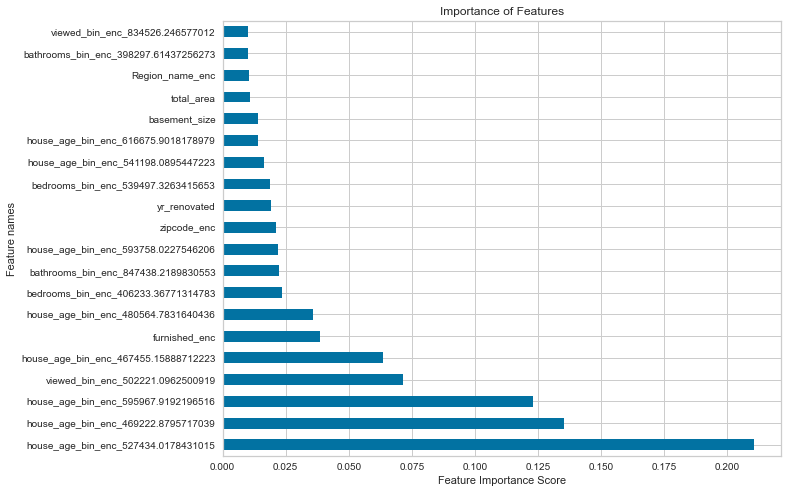

In [866]:
predictors=list(fint)
model = xgp1
model.fit(X1_test_std, y1_test)
plt.rcParams['figure.figsize']=[10,8]
feature_importance = pd.Series(model.feature_importances_, predictors).sort_values(ascending=False)
df=feature_importance.nlargest(20).plot(kind='barh', title='Importance of Features')
plt.ylabel('Feature names')
plt.xlabel('Feature Importance Score')

In [868]:
feature_imp = pd.DataFrame({'Feature': fint.columns, 'Value': model.feature_importances_})
feature_imp.sort_values(by="Value",ascending=False)

Feature    Value
33   house_age_bin_enc_527434.0178431015 0.210782
30   house_age_bin_enc_469222.8795717039 0.135436
34   house_age_bin_enc_595967.9192196516 0.123176
22      viewed_bin_enc_502221.0962500919 0.071547
31  house_age_bin_enc_467455.15888712223 0.063723
11                         furnished_enc 0.038405
32   house_age_bin_enc_480564.7831640436 0.035736
19   bedrooms_bin_enc_406233.36771314783 0.023521
18   bathrooms_bin_enc_847438.2189830553 0.022140
27   house_age_bin_enc_593758.0227546206 0.022102
9                            zipcode_enc 0.021096
3                           yr_renovated 0.018975
20    bedrooms_bin_enc_539497.3263415653 0.018602
28   house_age_bin_enc_541198.0895447223 0.016323
25   house_age_bin_enc_616675.9018178979 0.014190
2                          basement_size 0.013898
4                             total_area 0.010967
10                       Region_name_enc 0.010241
16  bathrooms_bin_enc_398297.61437256273 0.009868
23       viewed_bin_enc_834526.246577012 0.009857
12                             coast_enc 0.008796
26   house_age_bin_enc_607971.2997397617 0.008317
24     viewed_bin_enc_1244933.9733955308 0.008164
5                              house_age 0.008142
13      floors_bin_enc_460994.1441275803 0.007830
29  house_age_bin_enc_496610.11604952486 0.007704
0                          house_in_sqft 0.007423
21    bedrooms_bin_enc_772187.1338521132 0.007351
7                            diff_living 0.007206
14      floors_bin_enc_655663.5967275802 0.006750
17   bathrooms_bin_enc_587948.4932007571 0.006590
8                        quality_bin_enc 0.006577
1                            lot_in_sqft 0.006435
6                           has_basement 0.006392
15      floors_bin_enc_581052.6850687073 0.005738

### Polynomial features

In [869]:
from sklearn.preprocessing import PolynomialFeatures

pr = PolynomialFeatures(degree=2)
X_train_pr = pr.fit_transform(X_train_std)
X_test_pr = pr.fit_transform(X_test_std)

RidgeModel = Ridge(alpha = 0.1)
RidgeModel.fit(X_train_pr, y_train)
yhat = RidgeModel.predict(X_test_pr)

print("The R^2 Score Value for the training data is :" + str(RidgeModel.score(X_train_pr, y_train)))
print("The R^2 Score Value for the testing data is :" + str(RidgeModel.score(X_test_pr, y_test)))

The R^2 Score Value for the training data is :0.7319120267024092
The R^2 Score Value for the testing data is :0.7346131083639942


In [890]:
n_samples, n_features = 10, 5
parameters = {'alpha':[1, 10]}

# define the grid search
Ridge_reg= GridSearchCV(RidgeModel, parameters, scoring='neg_mean_squared_error',cv=5)

#fit the grid search
Ridge_reg.fit(X_train_pr, y_train)

# best estimator
print(Ridge_reg.best_estimator_)

# best model
best_model = Ridge_reg.best_estimator_
best_model.fit(X_train_pr, y_train)

Ridge(alpha=10)


Ridge(alpha=10)

In [891]:
print("The R^2 Score Value for the training data is :" + str(best_model.score(X_train_pr, y_train)))
print("The R^2 Score Value for the testing data is :" + str(best_model.score(X_test_pr, y_test)))

The R^2 Score Value for the training data is :0.7318430082663014
The R^2 Score Value for the testing data is :0.7348301197006004


In [894]:
n_samples, n_features = 10, 5
parameters = {'alpha':[10, 100, 1000, 10000, 100000, 1000000], "fit_intercept": [True, False], "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

# define the grid search
Ridge_reg= GridSearchCV(RidgeModel, parameters, scoring='neg_mean_squared_error',cv=5)

#fit the grid search
Ridge_reg.fit(X_train_pr, y_train)

# best estimator
print(Ridge_reg.best_estimator_)

# best model
best_model2 = Ridge_reg.best_estimator_
best_model2.fit(X_train_pr, y_train)

Ridge(alpha=1000, solver='sparse_cg')


Ridge(alpha=1000, solver='sparse_cg')

In [914]:
print("The R^2 Score Value for the training data is :" + str(best_model2.score(X_train_pr, y_train)))
print("The R^2 Score Value for the testing data is :" + str(best_model2.score(X_test_pr, y_test)))

The R^2 Score Value for the training data is :0.7257897565344158
The R^2 Score Value for the testing data is :0.7380577813538397


In [883]:
print("The R^2 Score Value for the training data is :" + str(best_model2.score(X_train_pr, y_train)))
print("The R^2 Score Value for the testing data is :" + str(best_model2.score(X_test_pr, y_test)))

The R^2 Score Value for the training data is :0.7259005918702697
The R^2 Score Value for the testing data is :0.7383407606639745


In [1012]:
xgp2

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.22, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=185, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.65,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [948]:
import statistics

model1 = xgbt1
model2 = xgbt
model3 = xgp1
model4 = xgp
model5 = xreg
model6 = gbrp
model7 = rf1
model8 = rf
model9 = xgp2
model10 = bgr1


model1.fit(X1_test, y1_test)
model2.fit(X1_test, y1_test)
model3.fit(X1_test, y1_test)
model4.fit(X1_test, y1_test)
model5.fit(X1_test, y1_test)
model6.fit(X_test, y_test)
model7.fit(X_test, y_test)
model8.fit(X_test, y_test)
model9.fit(X1_test, y1_test)
model10.fit(X_test, y_test)


pred1 = model1.predict(X1_test)
pred2 = model2.predict(X1_test)
pred3 = model3.predict(X1_test)
pred4 = model4.predict(X1_test)
pred5 = model5.predict(X1_test)
pred6 = model6.predict(X_test)
pred7 = model7.predict(X_test)
pred8 = model8.predict(X_test)
pred9 = model9.predict(X1_test)
pred10 = model10.predict(X_test)


# final test predictions

final_pred = np.array([])
for i in range(0,len(X_test)):
    final_pred = np.append(final_pred, statistics.mode([pred1[i], pred2[i], pred3[i], 
                                                        pred4[i], pred5[i], pred6[i], 
                                                        pred7[i], pred8[i], pred9[i], pred10[i]]))
    

# scoring on train data   
preda = model1.predict(X1_train)
predb = model2.predict(X1_train)
predc = model3.predict(X1_train)
predd = model4.predict(X1_train)
prede = model5.predict(X1_train)
predf = model6.predict(X_train)
predg = model7.predict(X_train)
predh = model8.predict(X_train)
predi = model9.predict(X1_train)
predj = model10.predict(X_train)

check_pred = np.array([])
for i in range(0,len(X1)):
    check_pred = np.append(check_pred, statistics.mode([preda[i], predb[i], predc[i], 
                                                        predd[i], prede[i], predi[i]]))
    
for i in range(0,len(X)):
    check_pred = np.append(check_pred, statistics.mode([predf[i], 
                                                        predg[i], predh[i], predj[i]]))
 
accuracy_score(y, check_pred)

IndexError: index 15129 is out of bounds for axis 0 with size 15129

### Final model: XGB grid2
The MAPE is not all that much compared with the best MAPE model, while looking at the adjusted R^2, the model is a little bit more robust than the best model in that category

In [955]:
# Predicting test data with the model
y_test_pred = xgp2.predict(X1_test_std)

In [948]:
# Predicted prices
y_test_pred

array([226558.98, 774862.2 , 446262.5 , ..., 554687.3 , 544902.44,
       593101.6 ], dtype=float32)

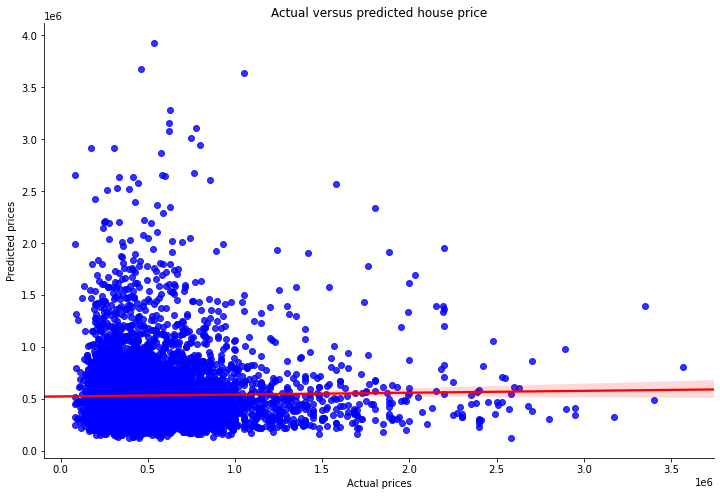

In [956]:
### Final model: Actual versus predicted house prices
sns.regplot(x=y_test, y=y_test_pred, data=house, truncate=False, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.despine(left = False, bottom = False)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual versus predicted house price');

In [958]:
### Checking for normality

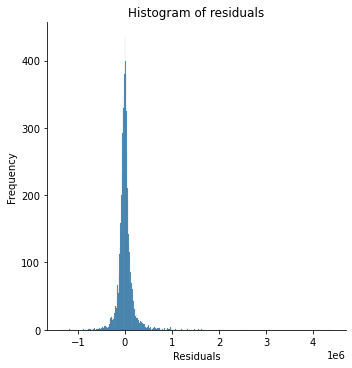

In [957]:
sns.displot(y1_test-y_test_pred)
plt.title('Histogram of residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show();

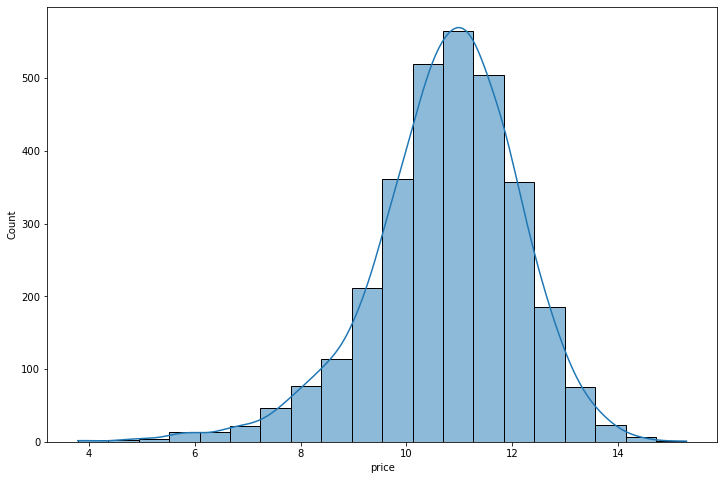

In [960]:
sns.histplot(np.log(y1_test-y_test_pred), bins=20, kde=True);

### Parallel approach, for map based and date-related analysis

In [916]:
import folium
from folium.plugins import FastMarkerCluster
## Let's study Latitude and Longitue features 

lat = house['lat'].tolist()
lon = house['long'].tolist()
locations = list(zip(lat, lon))

# 52.5200° N, 13.4050° E is the latitude and longitude of berlin

map1 = folium.Map(location=[47.722800, -122.183000], zoom_start=12)
FastMarkerCluster(locations).add_to(map1)
map1

In [1029]:
# Heatmap of King County, with respective house prices.
from mpl_toolkits.mplot3d import Axes3D
import folium
from folium.plugins import HeatMap

max_price=house.loc[house['price'].idxmax()]

def generateBaseMap(default_location=[max_price['lat'], max_price['long']]):
    base_map = folium.Map(location=default_location, control_scale=True)
    return base_map

house['count'] = 1
basemap = generateBaseMap()
s=folium.FeatureGroup(name='icon').add_to(basemap)
folium.Marker([max_price['lat'], max_price['long']],popup='Highest Price:'+str(max_price['price']),
              icon=folium.Icon(color='red')).add_to(s)
HeatMap(data=house[['lat','long', 'count']].groupby(['lat','long']).sum().reset_index().values.tolist(),
        radius=8,name='Heat Map').add_to(basemap)
folium.LayerControl(collapsed=False).add_to(basemap)
basemap

In [1060]:
from IPython.display import Image, display
Image(url = "https://areaimages.s3.amazonaws.com/king_county__washington__search_area.png")

### Date
* Make datetime
* Extract year
* Extract month

In [1031]:
house1['sell_date'] = pd.to_datetime(house1['sell_date'])
house1["month"] = house1['sell_date'].dt.month
house1["year"] = house1['sell_date'].dt.year  #only have 2014, 2015

house1['day_week'] = house1['sell_date'].dt.day_name()

In [1033]:
house1[['sell_date','day_week','month','year']].head()

sell_date   day_week  month  year
0 2015-04-27     Monday      4  2015
1 2015-03-17    Tuesday      3  2015
2 2014-08-20  Wednesday      8  2014
3 2014-10-10     Friday     10  2014
4 2015-02-18  Wednesday      2  2015

In [1034]:
## drop date as we have the same info in other columns 
house1.drop("sell_date",axis = 1, inplace = True)

### Month

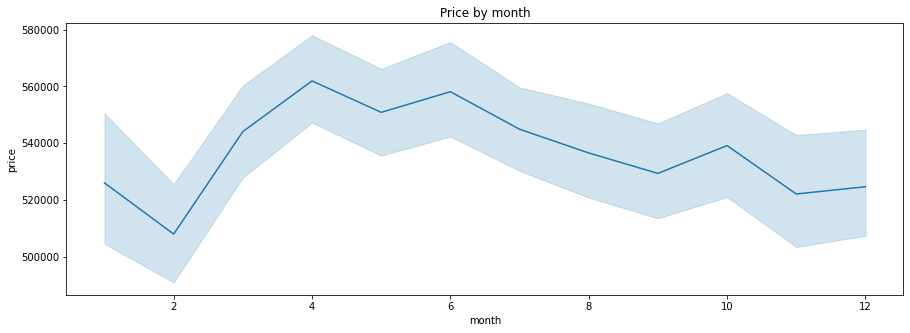

In [1035]:
plt.figure(figsize=(15,5))
plt.title("Price by month")
sns.lineplot(data = house1, x = "month", y = "price" ,palette="Set1")
plt.show()

### Year

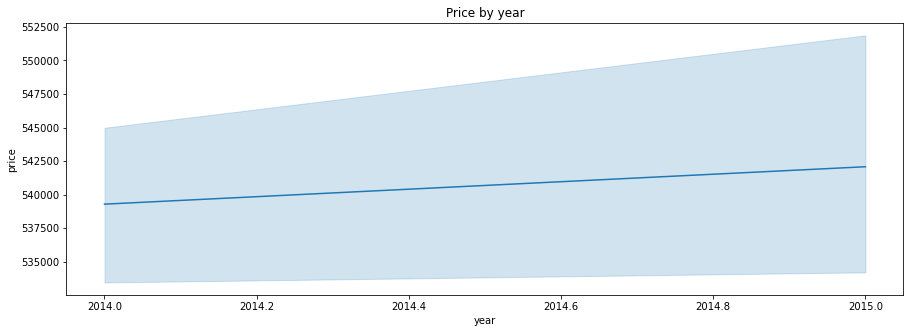

In [1037]:
plt.figure(figsize=(15,5))
plt.title("Price by year")
sns.lineplot(data = house1, x = "year", y = "price" ,palette="Set1")
plt.show()

### Day of the week
We have to order the day_week column to get it in the right order for the graph

In [1038]:
from pandas.api.types import CategoricalDtype

cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
house1['day_week'] = house1['day_week'].astype(cat_type)

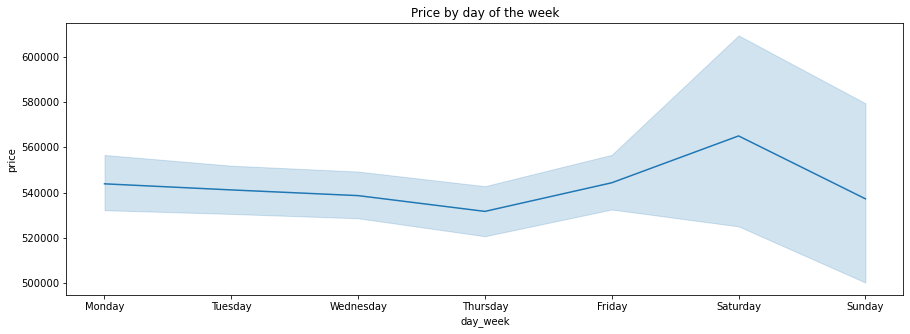

In [1039]:
plt.figure(figsize=(15,5))
plt.title("Price by day of the week")
sns.lineplot(data = house1, x = "day_week", y = "price" ,palette="Set1")
plt.show()

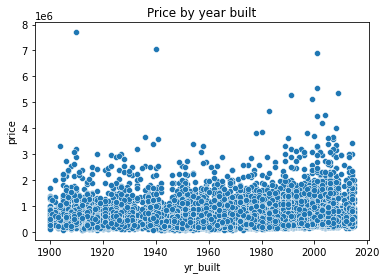

In [1042]:
sns.scatterplot(data = house1 , x = "yr_built", y = "price")
plt.title("Price by year built");

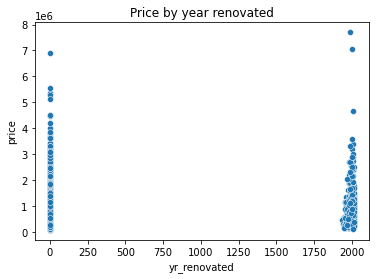

In [1043]:
sns.scatterplot(data = house1 , x = "yr_renovated", y = "price")
plt.title("Price by year renovated");

0 means it was never renovated, so let's check the variable without the zeroes.

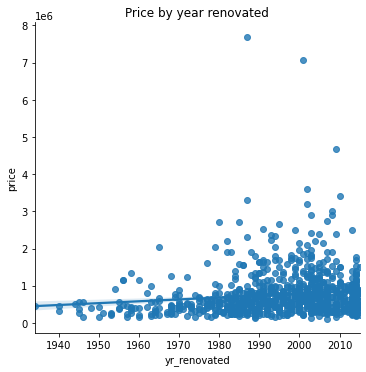

In [1045]:
sns.lmplot(data = house1[house1["yr_renovated"]>0] , x = "yr_renovated", y = "price");
plt.title("Price by year renovated");

Not a significant correlation of renovation year and year it was built to the price

### Zipcode
Categorical versus numerical

As we know the zipcode equates to a specific area in King County, we therefore should consider this a categorical feature and will therefore need to create dummies or else group them into categories

This is a lot of numbers to create dummy variables. we can potentiall group them using external information
* Found a good website called zipdatamaps, which labels the zipcodes by area

In [906]:
import requests
url = requests.get("https://www.zipdatamaps.com/king-wa-county-zipcodes")
tables = pd.read_html(url.text)

zip_re = tables[1]
zip_re= zip_re['List of All Zipcodes in King County, Washington']
zip_re.head()

ZIP Code ZIP Code Name   Population    ZIP Type
0 98001.000000        Auburn 31911.000000  Non-Unique
1 98002.000000        Auburn 31647.000000  Non-Unique
2 98003.000000   Federal Way 44151.000000  Non-Unique
3 98004.000000      Bellevue 27946.000000  Non-Unique
4 98005.000000      Bellevue 17714.000000  Non-Unique

In [907]:
zip_re = zip_re.dropna(axis = 0)
zip_re.isnull().sum()

ZIP Code         0
ZIP Code Name    0
Population       0
ZIP Type         0
dtype: int64

In [908]:
zip_re["ZIP Code"] = zip_re["ZIP Code"].astype(int)

In [909]:
house1 = house1.merge(zip_re,left_on='zipcode', right_on='ZIP Code')

In [910]:
# drop the zipcodes but we can keep a new population column 
house1.drop(["ZIP Code","zipcode","ZIP Type" ], axis = 1, inplace = True)

In [911]:
house1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 0 to 21612
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   sell_date         21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21613 non-null  float64
 4   room_bath         21613 non-null  float64
 5   living_measure    21613 non-null  float64
 6   lot_measure       21613 non-null  float64
 7   ceil              21613 non-null  float64
 8   coast             21613 non-null  int64  
 9   sight             21613 non-null  float64
 10  condition         21613 non-null  int64  
 11  quality           21613 non-null  int64  
 12  ceil_measure      21613 non-null  float64
 13  basement          21613 non-null  float64
 14  yr_built          21613 non-null  int32  
 15  yr_renovated      21613 non-null  int64  
 16  lat               21613 non-null  float6

## Create dummies

### Day column

In [912]:
house1_dum= house1.copy()

In [914]:
house1_dum = pd.concat([house1_dum,pd.get_dummies(house1["sell_date"],drop_first=True)],axis = 1) 

In [915]:
house1 = house1.drop(["sell_date"],axis = 1)
house1_dum = house1_dum.drop(["sell_date"],axis = 1)

### Zip code name
This creates a lot of additional columns

In [916]:
house1_dum = pd.concat([house1_dum,pd.get_dummies(house1["ZIP Code Name"],drop_first=True)],axis = 1) 

In [917]:
house1_dum.drop("ZIP Code Name" ,axis =1, inplace = True) 
house1.drop("ZIP Code Name" ,axis =1, inplace = True)

In [919]:
X= house1.drop("price", axis = 1)
y = house1["price"]

X_dum = house1_dum.drop("price", axis =1)
y_dum = house1_dum["price"]

In [920]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_dum, X_test_dum, y_train_dum, y_test_dum = train_test_split(X_dum, y_dum, test_size=0.3, random_state=42)

### Scaling

In [921]:
from sklearn.preprocessing import MinMaxScaler

In [922]:
scaler = MinMaxScaler()

In [923]:
X_train =scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_dum =scaler.fit_transform(X_train_dum)
X_test_dum = scaler.transform(X_test_dum)

### Neural Network Regression

In [924]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [925]:
model = Sequential()

In [926]:
print('X_train.shape:', X_train.shape)

X_train.shape: (15129, 21)


In [927]:
model.compile(optimizer="adam", loss= "mse")

In [928]:
model.fit(X_train, y_train,validation_data=(X_test,y_test), epochs= 400,batch_size =128)

Epoch 1/400
119/119 [==============================] - 0s 1ms/step - loss: 435578863616.0000 - val_loss: 406133997568.0000
Epoch 2/400
119/119 [==============================] - 0s 497us/step - loss: 435578929152.0000 - val_loss: 406133997568.0000
Epoch 3/400
119/119 [==============================] - 0s 543us/step - loss: 435578863616.0000 - val_loss: 406133997568.0000
Epoch 4/400
119/119 [==============================] - 0s 512us/step - loss: 435578863616.0000 - val_loss: 406133997568.0000
Epoch 5/400
119/119 [==============================] - 0s 500us/step - loss: 435578863616.0000 - val_loss: 406133997568.0000
Epoch 6/400
119/119 [==============================] - 0s 483us/step - loss: 435578863616.0000 - val_loss: 406133997568.0000
Epoch 7/400
119/119 [==============================] - 0s 475us/step - loss: 435578732544.0000 - val_loss: 406133997568.0000
Epoch 8/400
119/119 [==============================] - 0s 559us/step - loss: 435578830848.0000 - val_loss: 406133997568.0000
Ep

Epoch 131/400
119/119 [==============================] - 0s 525us/step - loss: 435578667008.0000 - val_loss: 406133997568.0000
Epoch 132/400
119/119 [==============================] - 0s 503us/step - loss: 435578863616.0000 - val_loss: 406133997568.0000
Epoch 133/400
119/119 [==============================] - 0s 493us/step - loss: 435578798080.0000 - val_loss: 406133997568.0000
Epoch 134/400
119/119 [==============================] - 0s 485us/step - loss: 435578667008.0000 - val_loss: 406133997568.0000
Epoch 135/400
119/119 [==============================] - 0s 476us/step - loss: 435578732544.0000 - val_loss: 406133997568.0000
Epoch 136/400
119/119 [==============================] - 0s 483us/step - loss: 435578863616.0000 - val_loss: 406133997568.0000
Epoch 137/400
119/119 [==============================] - 0s 485us/step - loss: 435578896384.0000 - val_loss: 406133997568.0000
Epoch 138/400
119/119 [==============================] - 0s 559us/step - loss: 435578798080.0000 - val_loss: 40

119/119 [==============================] - 0s 492us/step - loss: 435578830848.0000 - val_loss: 406133997568.0000
Epoch 260/400
119/119 [==============================] - 0s 508us/step - loss: 435578929152.0000 - val_loss: 406133997568.0000
Epoch 261/400
119/119 [==============================] - 0s 517us/step - loss: 435578798080.0000 - val_loss: 406133997568.0000
Epoch 262/400
119/119 [==============================] - 0s 468us/step - loss: 435578830848.0000 - val_loss: 406133997568.0000
Epoch 263/400
119/119 [==============================] - 0s 517us/step - loss: 435578798080.0000 - val_loss: 406133997568.0000
Epoch 264/400
119/119 [==============================] - 0s 466us/step - loss: 435578863616.0000 - val_loss: 406133997568.0000
Epoch 265/400
119/119 [==============================] - 0s 512us/step - loss: 435578601472.0000 - val_loss: 406133997568.0000
Epoch 266/400
119/119 [==============================] - 0s 500us/step - loss: 435578798080.0000 - val_loss: 406133997568.000

119/119 [==============================] - 0s 527us/step - loss: 435578830848.0000 - val_loss: 406133997568.0000
Epoch 388/400
119/119 [==============================] - 0s 553us/step - loss: 435578732544.0000 - val_loss: 406133997568.0000
Epoch 389/400
119/119 [==============================] - 0s 501us/step - loss: 435578929152.0000 - val_loss: 406133997568.0000
Epoch 390/400
119/119 [==============================] - 0s 500us/step - loss: 435578896384.0000 - val_loss: 406133997568.0000
Epoch 391/400
119/119 [==============================] - 0s 493us/step - loss: 435578830848.0000 - val_loss: 406133997568.0000
Epoch 392/400
119/119 [==============================] - 0s 500us/step - loss: 435578699776.0000 - val_loss: 406133997568.0000
Epoch 393/400
119/119 [==============================] - 0s 576us/step - loss: 435578863616.0000 - val_loss: 406133997568.0000
Epoch 394/400
119/119 [==============================] - 0s 517us/step - loss: 435578699776.0000 - val_loss: 406133997568.000

### Evaluation

In [929]:
loss_out = model.history.history
loss_df = pd.DataFrame(loss_out)
loss_df.head()

loss            val_loss
0 435578863616.000000 406133997568.000000
1 435578929152.000000 406133997568.000000
2 435578863616.000000 406133997568.000000
3 435578863616.000000 406133997568.000000
4 435578863616.000000 406133997568.000000

<AxesSubplot:ylabel='loss'>

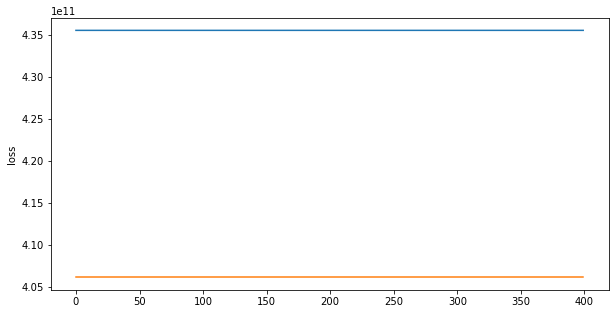

In [930]:
plt.figure(figsize=(10,5))
sns.lineplot(data = loss_df["loss"])
sns.lineplot(data = loss_df["val_loss"])

In [931]:
model.evaluate(X_train,y_train)**0.5

473/473 [==============================] - 0s 299us/step - loss: 435578961920.0000


659984.0618681636

In [ ]:
### with Dummies

In [940]:
X_train_dum.shape

(15129, 415)

In [941]:
model_dum = Sequential()

In [942]:
model_dum.add(Dense(49,activation = "relu"))   
model_dum.add(Dense(49,activation = "relu"))
model_dum.add(Dense(49,activation = "relu"))
model_dum.add(Dense(49,activation = "relu"))
model_dum.add(Dense(1))

In [943]:
model_dum.compile(optimizer="adam", loss= "mse")
model_dum.fit(X_train_dum, y_train_dum, validation_data=(X_test_dum,y_test_dum), epochs= 400,batch_size =128 )

Epoch 1/400
119/119 [==============================] - 1s 2ms/step - loss: 435224444928.0000 - val_loss: 403526746112.0000
Epoch 2/400
119/119 [==============================] - 0s 1ms/step - loss: 389013667840.0000 - val_loss: 253294297088.0000
Epoch 3/400
119/119 [==============================] - 0s 1ms/step - loss: 146657460224.0000 - val_loss: 81437048832.0000
Epoch 4/400
119/119 [==============================] - 0s 1ms/step - loss: 95494504448.0000 - val_loss: 73686917120.0000
Epoch 5/400
119/119 [==============================] - 0s 1ms/step - loss: 87940956160.0000 - val_loss: 67116449792.0000
Epoch 6/400
119/119 [==============================] - 0s 1ms/step - loss: 80796729344.0000 - val_loss: 60652097536.0000
Epoch 7/400
119/119 [==============================] - 0s 1ms/step - loss: 73731358720.0000 - val_loss: 54541115392.0000
Epoch 8/400
119/119 [==============================] - 0s 1ms/step - loss: 66889371648.0000 - val_loss: 48999927808.0000
Epoch 9/400
119/119 [======

Epoch 135/400
119/119 [==============================] - 0s 1ms/step - loss: 16277999616.0000 - val_loss: 26248419328.0000
Epoch 136/400
119/119 [==============================] - 0s 1ms/step - loss: 16289111040.0000 - val_loss: 25768736768.0000
Epoch 137/400
119/119 [==============================] - 0s 1ms/step - loss: 16150563840.0000 - val_loss: 25835599872.0000
Epoch 138/400
119/119 [==============================] - 0s 1ms/step - loss: 16129280000.0000 - val_loss: 26310111232.0000
Epoch 139/400
119/119 [==============================] - 0s 1ms/step - loss: 16138537984.0000 - val_loss: 26118891520.0000
Epoch 140/400
119/119 [==============================] - 0s 1ms/step - loss: 16013880320.0000 - val_loss: 26097510400.0000
Epoch 141/400
119/119 [==============================] - 0s 1ms/step - loss: 16010244096.0000 - val_loss: 26404929536.0000
Epoch 142/400
119/119 [==============================] - 0s 1ms/step - loss: 15880698880.0000 - val_loss: 26424764416.0000
Epoch 143/400
11

119/119 [==============================] - 0s 1ms/step - loss: 11479845888.0000 - val_loss: 28817811456.0000
Epoch 268/400
119/119 [==============================] - 0s 1ms/step - loss: 11437088768.0000 - val_loss: 29850685440.0000
Epoch 269/400
119/119 [==============================] - 0s 1ms/step - loss: 11413555200.0000 - val_loss: 28718508032.0000
Epoch 270/400
119/119 [==============================] - 0s 1ms/step - loss: 11373778944.0000 - val_loss: 28677736448.0000
Epoch 271/400
119/119 [==============================] - 0s 1ms/step - loss: 11398356992.0000 - val_loss: 29388091392.0000
Epoch 272/400
119/119 [==============================] - 0s 1ms/step - loss: 11365869568.0000 - val_loss: 28775821312.0000
Epoch 273/400
119/119 [==============================] - 0s 1ms/step - loss: 11355010048.0000 - val_loss: 29084741632.0000
Epoch 274/400
119/119 [==============================] - 0s 1ms/step - loss: 11299442688.0000 - val_loss: 28766406656.0000
Epoch 275/400
119/119 [=======

Epoch 334/400
119/119 [==============================] - 0s 1ms/step - loss: 9875927040.0000 - val_loss: 31781775360.0000
Epoch 335/400
119/119 [==============================] - 0s 1ms/step - loss: 9807936512.0000 - val_loss: 31691993088.0000
Epoch 336/400
119/119 [==============================] - 0s 1ms/step - loss: 9817532416.0000 - val_loss: 31590213632.0000
Epoch 337/400
119/119 [==============================] - 0s 1ms/step - loss: 9764999168.0000 - val_loss: 31535638528.0000
Epoch 338/400
119/119 [==============================] - 0s 1ms/step - loss: 9755380736.0000 - val_loss: 31806928896.0000
Epoch 339/400
119/119 [==============================] - 0s 1ms/step - loss: 9735481344.0000 - val_loss: 32620357632.0000
Epoch 340/400
119/119 [==============================] - 0s 1ms/step - loss: 9714103296.0000 - val_loss: 31403595776.0000
Epoch 341/400
119/119 [==============================] - 0s 1ms/step - loss: 9665087488.0000 - val_loss: 31978270720.0000
Epoch 342/400
119/119 [=

In [944]:
y_pred_dum = model_dum.predict(X_test_dum)
metrics.r2_score(y_test_dum,y_pred_dum)

0.6970340024972224

In [945]:
explained_variance_score(y_test_dum, y_pred_dum)

0.6985811280993701